# 4E - 14 DAYS

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns
import json
from tensorflow.keras.models import load_model
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

In [2]:
## Change directory to where your scripts and data file is placed ### 
BASE_PATH = "./private/thesisFinalFiles/"
os.chdir(BASE_PATH)
print(os.path.abspath('')) 

from spacetimemodel import spacetimemodel
from preprocessing_exp2 import *

/data/private/thesisFinalFiles


In [3]:
data = pd.read_csv('vietnam_dataMatrix_modelling2.csv', header=0)
idx_dic = {}
for col in data.columns:
    idx_dic[col] = data.columns.get_loc(col)
print(idx_dic)


{'OID_': 0, 'area': 1, 'landslide': 2, 'su_ID': 3, 'eventDate': 4, 'inventory': 5, 'reliefMax': 6, 'reliefSD': 7, 'planCurMax': 8, 'planCurvSD': 9, 'profCurMax': 10, 'profCurSD': 11, 'slopeMax': 12, 'slopeSD': 13, 'faultDiMax': 14, 'faultDiSD': 15, 'litho': 16, 'landcover': 17, 'F1_max': 18, 'F1_sum': 19, 'F2_max': 20, 'F2_sum': 21, 'F3_max': 22, 'F3_sum': 23, 'F4_max': 24, 'F4_sum': 25, 'F5_max': 26, 'F5_sum': 27, 'F6_max': 28, 'F6_sum': 29, 'F7_max': 30, 'F7_sum': 31, 'F8_max': 32, 'F8_sum': 33, 'F9_max': 34, 'F9_sum': 35, 'F10_max': 36, 'F10_sum': 37, 'F11_max': 38, 'F11_sum': 39, 'F12_max': 40, 'F12_sum': 41, 'F13_max': 42, 'F13_sum': 43, 'F14_max': 44, 'F14_sum': 45, 'F15_max': 46, 'F15_sum': 47, 'F16_max': 48, 'F16_sum': 49, 'F17_max': 50, 'F17_sum': 51, 'F18_max': 52, 'F18_sum': 53, 'F19_max': 54, 'F19_sum': 55, 'F20_max': 56, 'F20_sum': 57, 'F21_max': 58, 'F21_sum': 59, 'F22_max': 60, 'F22_sum': 61, 'F23_max': 62, 'F23_sum': 63, 'F24_max': 64, 'F24_sum': 65, 'F25_max': 66, 'F25

# Preparing rainfall data

## difference

In [4]:
# create a new DataFrame to hold the differences
diffMax_df = pd.DataFrame()
diffSum_df = pd.DataFrame()

df_max = data.iloc[:,np.arange(50,78,2)]
df_sum = data.iloc[:,np.arange(51,78,2)]

# iterate over the columns of the original DataFrame
for i in range(1, len(df_max.columns)):
    if i == 1: 
        diffMax_df[f'diff_{1}'] = 0

    # calculate the difference between this column and the previous column
    diff = df_max.iloc[:, i] - df_max.iloc[:, i-1]
    # add the difference as a new column in the diff_df DataFrame
    diffMax_df[f'diff_{i+1}'] = diff

diffMax_df['diff_1'].fillna(value=0,inplace=True)

for i in range(1, len(df_max.columns)):
    if i == 1: 
        diffSum_df[f'diff_{1}'] = 0

    # calculate the difference between this column and the previous column
    diff = df_sum.iloc[:, i] - df_sum.iloc[:, i-1]
    # add the difference as a new column in the diff_df DataFrame
    diffSum_df[f'diff_{i+1}'] = diff

diffSum_df['diff_1'].fillna(value=0,inplace=True)

# # display the resulting DataFrame
diffSum_df.head(10)

diff_1     diff_2     diff_3    diff_4    diff_5     diff_6     diff_7  \
0     0.0   9.710696  16.184493 -3.236900  0.215438 -17.868099   6.540532   
1     0.0   6.144605  10.241009 -2.048202  0.000000 -11.827802   5.151284   
2     0.0  10.557746  17.596243 -3.519248  2.936230 -24.051722   9.780282   
3     0.0   7.531363  11.900925 -4.218611  1.940526 -12.691337   4.967809   
4     0.0  12.447235  19.605534 -7.585746  3.151703 -19.605534   7.085655   
5     0.0   9.887270  16.478782 -3.295755  3.295755 -23.070295  10.147362   
6     0.0   6.512400  10.853999 -2.170801  0.174945 -13.132517   6.057903   
7     0.0   6.507313   3.904389 -2.602926  1.301463  -6.507314   2.755542   
8     0.0   6.983759  11.639598 -2.327920  1.075618 -13.967517   5.718315   
9     0.0   4.594466   7.657443 -1.531489  0.000000  -9.188932   4.311626   

     diff_8     diff_9   diff_10    diff_11    diff_12   diff_13   diff_14  
0  3.848720 -15.394880  0.979931  10.601730   9.434524 -5.588925  2.961902  
1  2.553631 -10.214524  0.255634   6.639711   6.098299 -2.396875  0.772670  
2  4.896277 -15.921331 -1.927152  11.025055   9.234516 -2.575861 -0.362949  
3  2.395039  -8.927871 -1.367964   6.119515   6.849701 -3.851039  2.069589  
4  4.749598 -15.098847 -2.233124  10.065898  10.840843 -5.675763  3.378005  
5  1.360612 -10.574092 -2.114819   8.459274  11.177274 -8.156763  2.718921  
6  2.837765 -11.133694  0.000000   6.849877   6.648347 -1.687277  0.000000  
7  1.786155  -5.358467 -0.893078   3.572312   2.769399  0.000000  0.000000  
8  4.199885 -13.321738  0.000000   6.587186   8.297678 -1.860607  0.000000  
9  1.947706  -7.790820  0.000000   4.869262   4.632146 -1.187675  0.000000

In [5]:
df_cumSumRainfall, df_sumRainfall = cumRainfall(data, 51, 77, 'sum')
df_cumMaxRainfall, df_maxRainfall = cumRainfall(data, 50, 77, 'max')
# df_maxRainfall.head(10)

In [6]:
df_sumRainfall.head(10)

F17_sum    F18_sum    F19_sum    F20_sum    F21_sum   F22_sum    F23_sum  \
0        0   9.710696  25.895189  22.658289  22.873727  5.005628  11.546160   
1        0   6.144605  16.385614  14.337412  14.337412  2.509609   7.660893   
2        0  10.557746  28.153989  24.634741  27.570970  3.519249  13.299530   
3        0   7.531363  19.432288  15.213677  17.154203  4.462866   9.430675   
4        0  12.447235  32.052768  24.467023  27.618726  8.013192  15.098847   
5        0   9.887270  26.366052  23.070297  26.366052  3.295756  13.443118   
6        0   6.512400  17.366399  15.195598  15.370543  2.238026   8.295929   
7        0   6.507313  10.411702   7.808776   9.110239  2.602925   5.358467   
8        0   6.983759  18.623357  16.295437  17.371055  3.403538   9.121853   
9        0   4.594466  12.251909  10.720420  10.720420  1.531489   5.843114   

     F24_sum   F25_sum   F26_sum    F27_sum    F28_sum    F29_sum    F30_sum  
0  15.394880  0.000000  0.979931  11.581661  21.016185  15.427260  18.389162  
1  10.214524  0.000000  0.255634   6.895345  12.993644  10.596769  11.369439  
2  18.195807  2.274476  0.347324  11.372379  20.606895  18.031034  17.668085  
3  11.825714  2.897843  1.529879   7.649394  14.499095  10.648056  12.717645  
4  19.848445  4.749598  2.516475  12.582372  23.423215  17.747452  21.125457  
5  14.803730  4.229637  2.114819  10.574093  21.751367  13.594604  16.313526  
6  11.133694  0.000000  0.000000   6.849877  13.498224  11.810947  11.810947  
7   7.144622  1.786156  0.893078   4.465389   7.234789   7.234789   7.234789  
8  13.321738  0.000000  0.000000   6.587186  14.884865  13.024258  13.024258  
9   7.790820  0.000000  0.000000   4.869262   9.501409   8.313733   8.313733

In [7]:
scaler = MinMaxScaler()

df_sumDiffScaled= scaler.fit_transform(diffSum_df)
df_sumDiffScaled = pd.DataFrame(df_sumDiffScaled, columns=diffSum_df.columns)
df_sumDiffScaled.head(2)

diff_1    diff_2    diff_3    diff_4    diff_5    diff_6    diff_7  \
0     0.0  0.732172  0.773510  0.348107  0.498392  0.158549  0.596939   
1     0.0  0.637948  0.616015  0.379334  0.493465  0.283835  0.559144   

     diff_8    diff_9   diff_10   diff_11   diff_12   diff_13   diff_14  
0  0.432004  0.237318  0.416769  0.866596  0.685095  0.171108  0.533706  
1  0.398977  0.359422  0.379240  0.712965  0.621861  0.250050  0.490652

In [13]:
rainfall_array = rainfallMatrix_4(df_maxRainfall.apply(zscore), df_sumRainfall.apply(zscore), df_cumSumRainfall.apply(zscore), df_sumDiffScaled)

In [14]:
rainfall_array.shape

(2759, 14, 4)

# Processing environmental data

In [15]:
# normalizing continuous static environmental data 
df_staticOnly = data[['litho','landcover',
                    'reliefSD', 'slopeSD', 'cosAspSD', 'sinAspSD', 'faultDiSD',
                     'reliefME', 'plancurME', 'profcurvME', 'slopeME','fautltDiME','sinAspME', 'cosAspME' ]]

catCols = ['landcover','litho']
df_staticOnlyNorm = normCols(df_staticOnly, catCols)
# df_staticOnlyNorm.head(10)

litho          object
landcover      object
reliefSD      float64
slopeSD       float64
cosAspSD      float64
sinAspSD      float64
faultDiSD     float64
reliefME      float64
plancurME     float64
profcurvME    float64
slopeME       float64
fautltDiME    float64
sinAspME      float64
cosAspME      float64
dtype: object 

Index(['reliefSD', 'slopeSD', 'cosAspSD', 'sinAspSD', 'faultDiSD', 'reliefME',
       'plancurME', 'profcurvME', 'slopeME', 'fautltDiME', 'sinAspME',
       'cosAspME'],
      dtype='object')


In [16]:
# one hot encoding the categorical variables in the df 
in_array_env, outDf = catPrep(df_staticOnlyNorm, ['litho','landcover'])

outDf.columns
len(outDf.columns)
env_array = outDf.to_numpy()
env_array.shape

landslide_array = np.array(data['landslide'], dtype=int)
# print(landslide_array)


You have one-hot encoded  2  categorical variables. These are: 

litho 

landcover 



# Space-Time Modelling

In [18]:
#split data first into train and test 
idx=np.arange(0,2759)
idx_tr, idx_ts = train_test_split(idx, test_size=0.25,random_state=42)
idx_tr.sort()
idx_ts.sort()

## actual modelling

In [19]:
from spacetimemodel import * 
import json
params= json.load(open('Exp4E_14days_bay_params.json','r'))
print(params)



{'modelparam': {'gru_depth': 1, 'gru_units': 16, 'no_time_series_param': 4, 'time_series_length': 14, 'gru_activation': 'gelu', 'no_env_param': 26, 'env_depth': 6, 'env_units': 64, 'env_activation': 'tanh', 'comb_depth': 3, 'comb_units': 48, 'comb_activation': 'softmax', 'kernel_initializer': 'he_normal', 'bias_initializer': 'he_normal', 'dropout': True, 'batch_normalization': True, 'gru_dropout_ratio': 0.15, 'env_dropout_ratio': 0.15, 'comb_dropout_ratio': 0.05, 'lr': 1e-05, 'decay_steps': 1000, 'decay_rate': 0.95}, 'trainparam': {'nepoch': 200, 'ckpt': 'checkpoints/', 'batchsize': 17, 'valsplit': 0.3}}


In [39]:
# prepare model
lsmodel = spacetimemodel(params['modelparam'])
comp_lsmodel = lsmodel.preparemodel()
from trainmodelTestData import trainmodel
out = trainmodel(comp_lsmodel, xdata=[env_array[idx_tr],rainfall_array[idx_tr]], ydata=landslide_array[idx_tr], 
                 xtest=[env_array[idx_ts],rainfall_array[idx_ts]], ytest=landslide_array[idx_ts],args=params['trainparam'])
# out = final_model.fit(x=[env_array[idx_tr],rainfall_array[idx_tr]],y=landslide_array[idx_tr],
#           epochs=100, verbose=True, validation_split=0.3, batch_size=10, callbacks=[monitor, WandbMetricsLogger()])

Fit model on training data
Epoch 1/200

Epoch 1: val_loss improved from inf to 0.69298, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 24s - loss: 0.7041 - precision_1: 0.4249 - recall_1: 0.5068 - Accuracy: 0.5007 - auc: 0.5051 - f1_m: 0.4513 - val_loss: 0.6930 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_Accuracy: 0.5710 - val_auc: 0.5000 - val_f1_m: 0.0000e+00 - 24s/epoch - 197ms/step
Epoch 2/200

Epoch 2: val_loss improved from 0.69298 to 0.69254, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.7023 - precision_1: 0.4338 - recall_1: 0.5126 - Accuracy: 0.5104 - auc: 0.5128 - f1_m: 0.4526 - val_loss: 0.6925 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_Accuracy: 0.5710 - val_auc: 0.4920 - val_f1_m: 0.0000e+00 - 16s/epoch - 133ms/step
Epoch 3/200

Epoch 3: val_loss improved from 0.69254 to 0.69214, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6965 - precision_1: 0.4395 - recall_1: 0.5103 - Accuracy: 0.5172 - auc: 0.5306 - f1_m: 0.4612 - val_loss: 0.6921 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_Accuracy: 0.5710 - val_auc: 0.5160 - val_f1_m: 0.0000e+00 - 16s/epoch - 129ms/step
Epoch 4/200

Epoch 4: val_loss improved from 0.69214 to 0.69148, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6960 - precision_1: 0.4433 - recall_1: 0.5137 - Accuracy: 0.5210 - auc: 0.5334 - f1_m: 0.4663 - val_loss: 0.6915 - val_precision_1: 0.5439 - val_recall_1: 0.2095 - val_Accuracy: 0.5855 - val_auc: 0.5522 - val_f1_m: 0.2232 - 17s/epoch - 135ms/step
Epoch 5/200

Epoch 5: val_loss improved from 0.69148 to 0.68951, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6930 - precision_1: 0.4653 - recall_1: 0.5274 - Accuracy: 0.5433 - auc: 0.5483 - f1_m: 0.4795 - val_loss: 0.6895 - val_precision_1: 0.4847 - val_recall_1: 0.4831 - val_Accuracy: 0.5580 - val_auc: 0.5673 - val_f1_m: 0.3997 - 17s/epoch - 139ms/step
Epoch 6/200

Epoch 6: val_loss improved from 0.68951 to 0.68613, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6907 - precision_1: 0.4578 - recall_1: 0.5137 - Accuracy: 0.5365 - auc: 0.5501 - f1_m: 0.4721 - val_loss: 0.6861 - val_precision_1: 0.4718 - val_recall_1: 0.5642 - val_Accuracy: 0.5420 - val_auc: 0.5831 - val_f1_m: 0.4285 - 16s/epoch - 133ms/step
Epoch 7/200

Epoch 7: val_loss improved from 0.68613 to 0.68250, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6861 - precision_1: 0.4779 - recall_1: 0.5308 - Accuracy: 0.5558 - auc: 0.5685 - f1_m: 0.4918 - val_loss: 0.6825 - val_precision_1: 0.4785 - val_recall_1: 0.5642 - val_Accuracy: 0.5493 - val_auc: 0.5940 - val_f1_m: 0.4286 - 17s/epoch - 137ms/step
Epoch 8/200

Epoch 8: val_loss improved from 0.68250 to 0.67863, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6846 - precision_1: 0.4808 - recall_1: 0.5297 - Accuracy: 0.5587 - auc: 0.5726 - f1_m: 0.4894 - val_loss: 0.6786 - val_precision_1: 0.5044 - val_recall_1: 0.5777 - val_Accuracy: 0.5754 - val_auc: 0.6079 - val_f1_m: 0.4395 - 16s/epoch - 134ms/step
Epoch 9/200

Epoch 9: val_loss improved from 0.67863 to 0.67522, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6838 - precision_1: 0.4736 - recall_1: 0.5217 - Accuracy: 0.5520 - auc: 0.5778 - f1_m: 0.4827 - val_loss: 0.6752 - val_precision_1: 0.5166 - val_recall_1: 0.5777 - val_Accuracy: 0.5870 - val_auc: 0.6201 - val_f1_m: 0.4438 - 16s/epoch - 128ms/step
Epoch 10/200

Epoch 10: val_loss improved from 0.67522 to 0.67163, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6787 - precision_1: 0.4908 - recall_1: 0.5148 - Accuracy: 0.5684 - auc: 0.5870 - f1_m: 0.4894 - val_loss: 0.6716 - val_precision_1: 0.5321 - val_recall_1: 0.5878 - val_Accuracy: 0.6014 - val_auc: 0.6313 - val_f1_m: 0.4491 - 17s/epoch - 141ms/step
Epoch 11/200

Epoch 11: val_loss improved from 0.67163 to 0.66903, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6814 - precision_1: 0.4794 - recall_1: 0.5046 - Accuracy: 0.5582 - auc: 0.5772 - f1_m: 0.4826 - val_loss: 0.6690 - val_precision_1: 0.5468 - val_recall_1: 0.6115 - val_Accuracy: 0.6159 - val_auc: 0.6417 - val_f1_m: 0.4607 - 16s/epoch - 129ms/step
Epoch 12/200

Epoch 12: val_loss improved from 0.66903 to 0.66686, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6719 - precision_1: 0.5088 - recall_1: 0.5274 - Accuracy: 0.5843 - auc: 0.6097 - f1_m: 0.5091 - val_loss: 0.6669 - val_precision_1: 0.5525 - val_recall_1: 0.6047 - val_Accuracy: 0.6203 - val_auc: 0.6484 - val_f1_m: 0.4571 - 17s/epoch - 136ms/step
Epoch 13/200

Epoch 13: val_loss improved from 0.66686 to 0.66356, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6739 - precision_1: 0.5157 - recall_1: 0.5263 - Accuracy: 0.5901 - auc: 0.6094 - f1_m: 0.5093 - val_loss: 0.6636 - val_precision_1: 0.5576 - val_recall_1: 0.6047 - val_Accuracy: 0.6246 - val_auc: 0.6577 - val_f1_m: 0.4612 - 16s/epoch - 131ms/step
Epoch 14/200

Epoch 14: val_loss improved from 0.66356 to 0.66101, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6660 - precision_1: 0.5297 - recall_1: 0.5388 - Accuracy: 0.6022 - auc: 0.6290 - f1_m: 0.5242 - val_loss: 0.6610 - val_precision_1: 0.5697 - val_recall_1: 0.6216 - val_Accuracy: 0.6362 - val_auc: 0.6656 - val_f1_m: 0.4706 - 16s/epoch - 134ms/step
Epoch 15/200

Epoch 15: val_loss improved from 0.66101 to 0.65874, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6674 - precision_1: 0.5285 - recall_1: 0.5297 - Accuracy: 0.6008 - auc: 0.6233 - f1_m: 0.5177 - val_loss: 0.6587 - val_precision_1: 0.5772 - val_recall_1: 0.6318 - val_Accuracy: 0.6435 - val_auc: 0.6699 - val_f1_m: 0.4757 - 17s/epoch - 139ms/step
Epoch 16/200

Epoch 16: val_loss improved from 0.65874 to 0.65468, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6688 - precision_1: 0.5201 - recall_1: 0.5171 - Accuracy: 0.5935 - auc: 0.6141 - f1_m: 0.5063 - val_loss: 0.6547 - val_precision_1: 0.5863 - val_recall_1: 0.6081 - val_Accuracy: 0.6478 - val_auc: 0.6780 - val_f1_m: 0.4627 - 17s/epoch - 143ms/step
Epoch 17/200

Epoch 17: val_loss improved from 0.65468 to 0.65293, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6705 - precision_1: 0.5128 - recall_1: 0.5046 - Accuracy: 0.5872 - auc: 0.6173 - f1_m: 0.4955 - val_loss: 0.6529 - val_precision_1: 0.5929 - val_recall_1: 0.6250 - val_Accuracy: 0.6551 - val_auc: 0.6834 - val_f1_m: 0.4762 - 16s/epoch - 134ms/step
Epoch 18/200

Epoch 18: val_loss improved from 0.65293 to 0.64984, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6708 - precision_1: 0.5261 - recall_1: 0.5285 - Accuracy: 0.5988 - auc: 0.6133 - f1_m: 0.5144 - val_loss: 0.6498 - val_precision_1: 0.5993 - val_recall_1: 0.6216 - val_Accuracy: 0.6594 - val_auc: 0.6890 - val_f1_m: 0.4763 - 17s/epoch - 136ms/step
Epoch 19/200

Epoch 19: val_loss improved from 0.64984 to 0.64896, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6664 - precision_1: 0.5359 - recall_1: 0.5285 - Accuracy: 0.6066 - auc: 0.6267 - f1_m: 0.5198 - val_loss: 0.6490 - val_precision_1: 0.5981 - val_recall_1: 0.6385 - val_Accuracy: 0.6609 - val_auc: 0.6937 - val_f1_m: 0.4792 - 17s/epoch - 136ms/step
Epoch 20/200

Epoch 20: val_loss improved from 0.64896 to 0.64635, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6677 - precision_1: 0.5333 - recall_1: 0.5297 - Accuracy: 0.6046 - auc: 0.6179 - f1_m: 0.5225 - val_loss: 0.6464 - val_precision_1: 0.6052 - val_recall_1: 0.6318 - val_Accuracy: 0.6652 - val_auc: 0.6971 - val_f1_m: 0.4837 - 17s/epoch - 137ms/step
Epoch 21/200

Epoch 21: val_loss improved from 0.64635 to 0.64427, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6679 - precision_1: 0.5306 - recall_1: 0.5148 - Accuracy: 0.6017 - auc: 0.6172 - f1_m: 0.5114 - val_loss: 0.6443 - val_precision_1: 0.6091 - val_recall_1: 0.6318 - val_Accuracy: 0.6681 - val_auc: 0.7006 - val_f1_m: 0.4836 - 16s/epoch - 128ms/step
Epoch 22/200

Epoch 22: val_loss improved from 0.64427 to 0.64125, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6588 - precision_1: 0.5355 - recall_1: 0.5080 - Accuracy: 0.6051 - auc: 0.6437 - f1_m: 0.5089 - val_loss: 0.6413 - val_precision_1: 0.6102 - val_recall_1: 0.6453 - val_Accuracy: 0.6710 - val_auc: 0.7048 - val_f1_m: 0.4920 - 16s/epoch - 133ms/step
Epoch 23/200

Epoch 23: val_loss improved from 0.64125 to 0.63959, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6578 - precision_1: 0.5587 - recall_1: 0.5434 - Accuracy: 0.6249 - auc: 0.6464 - f1_m: 0.5425 - val_loss: 0.6396 - val_precision_1: 0.6176 - val_recall_1: 0.6385 - val_Accuracy: 0.6754 - val_auc: 0.7083 - val_f1_m: 0.4923 - 16s/epoch - 131ms/step
Epoch 24/200

Epoch 24: val_loss improved from 0.63959 to 0.63720, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6589 - precision_1: 0.5538 - recall_1: 0.5285 - Accuracy: 0.6201 - auc: 0.6489 - f1_m: 0.5331 - val_loss: 0.6372 - val_precision_1: 0.6201 - val_recall_1: 0.6453 - val_Accuracy: 0.6783 - val_auc: 0.7111 - val_f1_m: 0.4955 - 17s/epoch - 137ms/step
Epoch 25/200

Epoch 25: val_loss improved from 0.63720 to 0.63497, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6521 - precision_1: 0.5630 - recall_1: 0.5308 - Accuracy: 0.6269 - auc: 0.6643 - f1_m: 0.5366 - val_loss: 0.6350 - val_precision_1: 0.6214 - val_recall_1: 0.6486 - val_Accuracy: 0.6797 - val_auc: 0.7146 - val_f1_m: 0.4940 - 17s/epoch - 138ms/step
Epoch 26/200

Epoch 26: val_loss improved from 0.63497 to 0.63356, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6597 - precision_1: 0.5553 - recall_1: 0.5274 - Accuracy: 0.6211 - auc: 0.6422 - f1_m: 0.5303 - val_loss: 0.6336 - val_precision_1: 0.6189 - val_recall_1: 0.6419 - val_Accuracy: 0.6768 - val_auc: 0.7165 - val_f1_m: 0.4888 - 16s/epoch - 127ms/step
Epoch 27/200

Epoch 27: val_loss improved from 0.63356 to 0.63135, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6507 - precision_1: 0.5745 - recall_1: 0.5502 - Accuracy: 0.6370 - auc: 0.6687 - f1_m: 0.5534 - val_loss: 0.6314 - val_precision_1: 0.6217 - val_recall_1: 0.6385 - val_Accuracy: 0.6783 - val_auc: 0.7194 - val_f1_m: 0.4922 - 16s/epoch - 135ms/step
Epoch 28/200

Epoch 28: val_loss improved from 0.63135 to 0.62911, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6530 - precision_1: 0.5675 - recall_1: 0.5422 - Accuracy: 0.6312 - auc: 0.6557 - f1_m: 0.5457 - val_loss: 0.6291 - val_precision_1: 0.6238 - val_recall_1: 0.6554 - val_Accuracy: 0.6826 - val_auc: 0.7220 - val_f1_m: 0.5035 - 16s/epoch - 134ms/step
Epoch 29/200

Epoch 29: val_loss improved from 0.62911 to 0.62734, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6451 - precision_1: 0.5924 - recall_1: 0.5708 - Accuracy: 0.6520 - auc: 0.6756 - f1_m: 0.5703 - val_loss: 0.6273 - val_precision_1: 0.6214 - val_recall_1: 0.6486 - val_Accuracy: 0.6797 - val_auc: 0.7234 - val_f1_m: 0.4938 - 17s/epoch - 137ms/step
Epoch 30/200

Epoch 30: val_loss improved from 0.62734 to 0.62498, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6534 - precision_1: 0.5768 - recall_1: 0.5400 - Accuracy: 0.6375 - auc: 0.6596 - f1_m: 0.5430 - val_loss: 0.6250 - val_precision_1: 0.6189 - val_recall_1: 0.6419 - val_Accuracy: 0.6768 - val_auc: 0.7269 - val_f1_m: 0.4947 - 17s/epoch - 136ms/step
Epoch 31/200

Epoch 31: val_loss improved from 0.62498 to 0.62363, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6465 - precision_1: 0.5524 - recall_1: 0.5354 - Accuracy: 0.6196 - auc: 0.6662 - f1_m: 0.5386 - val_loss: 0.6236 - val_precision_1: 0.6214 - val_recall_1: 0.6486 - val_Accuracy: 0.6797 - val_auc: 0.7275 - val_f1_m: 0.4906 - 17s/epoch - 139ms/step
Epoch 32/200

Epoch 32: val_loss improved from 0.62363 to 0.62191, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6429 - precision_1: 0.5757 - recall_1: 0.5514 - Accuracy: 0.6380 - auc: 0.6812 - f1_m: 0.5511 - val_loss: 0.6219 - val_precision_1: 0.6201 - val_recall_1: 0.6453 - val_Accuracy: 0.6783 - val_auc: 0.7297 - val_f1_m: 0.4880 - 16s/epoch - 132ms/step
Epoch 33/200

Epoch 33: val_loss improved from 0.62191 to 0.61997, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6424 - precision_1: 0.5772 - recall_1: 0.5548 - Accuracy: 0.6394 - auc: 0.6816 - f1_m: 0.5543 - val_loss: 0.6200 - val_precision_1: 0.6246 - val_recall_1: 0.6520 - val_Accuracy: 0.6826 - val_auc: 0.7306 - val_f1_m: 0.4943 - 16s/epoch - 135ms/step
Epoch 34/200

Epoch 34: val_loss improved from 0.61997 to 0.61850, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6450 - precision_1: 0.5652 - recall_1: 0.5445 - Accuracy: 0.6298 - auc: 0.6706 - f1_m: 0.5405 - val_loss: 0.6185 - val_precision_1: 0.6222 - val_recall_1: 0.6622 - val_Accuracy: 0.6826 - val_auc: 0.7323 - val_f1_m: 0.4968 - 17s/epoch - 135ms/step
Epoch 35/200

Epoch 35: val_loss improved from 0.61850 to 0.61712, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6483 - precision_1: 0.5740 - recall_1: 0.5400 - Accuracy: 0.6356 - auc: 0.6660 - f1_m: 0.5493 - val_loss: 0.6171 - val_precision_1: 0.6206 - val_recall_1: 0.6520 - val_Accuracy: 0.6797 - val_auc: 0.7337 - val_f1_m: 0.4905 - 16s/epoch - 135ms/step
Epoch 36/200

Epoch 36: val_loss improved from 0.61712 to 0.61545, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6405 - precision_1: 0.5847 - recall_1: 0.5514 - Accuracy: 0.6443 - auc: 0.6790 - f1_m: 0.5573 - val_loss: 0.6155 - val_precision_1: 0.6218 - val_recall_1: 0.6554 - val_Accuracy: 0.6812 - val_auc: 0.7343 - val_f1_m: 0.4943 - 16s/epoch - 133ms/step
Epoch 37/200

Epoch 37: val_loss improved from 0.61545 to 0.61398, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6379 - precision_1: 0.5783 - recall_1: 0.5525 - Accuracy: 0.6399 - auc: 0.6854 - f1_m: 0.5550 - val_loss: 0.6140 - val_precision_1: 0.6226 - val_recall_1: 0.6520 - val_Accuracy: 0.6812 - val_auc: 0.7347 - val_f1_m: 0.4946 - 17s/epoch - 138ms/step
Epoch 38/200

Epoch 38: val_loss improved from 0.61398 to 0.61258, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6420 - precision_1: 0.5801 - recall_1: 0.5457 - Accuracy: 0.6404 - auc: 0.6769 - f1_m: 0.5492 - val_loss: 0.6126 - val_precision_1: 0.6270 - val_recall_1: 0.6588 - val_Accuracy: 0.6855 - val_auc: 0.7369 - val_f1_m: 0.4963 - 17s/epoch - 138ms/step
Epoch 39/200

Epoch 39: val_loss improved from 0.61258 to 0.61169, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6411 - precision_1: 0.5895 - recall_1: 0.5525 - Accuracy: 0.6477 - auc: 0.6805 - f1_m: 0.5574 - val_loss: 0.6117 - val_precision_1: 0.6238 - val_recall_1: 0.6554 - val_Accuracy: 0.6826 - val_auc: 0.7378 - val_f1_m: 0.4936 - 16s/epoch - 133ms/step
Epoch 40/200

Epoch 40: val_loss improved from 0.61169 to 0.61007, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6338 - precision_1: 0.5986 - recall_1: 0.5685 - Accuracy: 0.6559 - auc: 0.6911 - f1_m: 0.5670 - val_loss: 0.6101 - val_precision_1: 0.6210 - val_recall_1: 0.6588 - val_Accuracy: 0.6812 - val_auc: 0.7397 - val_f1_m: 0.4886 - 17s/epoch - 138ms/step
Epoch 41/200

Epoch 41: val_loss improved from 0.61007 to 0.60882, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6399 - precision_1: 0.5832 - recall_1: 0.5719 - Accuracy: 0.6457 - auc: 0.6807 - f1_m: 0.5671 - val_loss: 0.6088 - val_precision_1: 0.6262 - val_recall_1: 0.6622 - val_Accuracy: 0.6855 - val_auc: 0.7394 - val_f1_m: 0.4965 - 16s/epoch - 134ms/step
Epoch 42/200

Epoch 42: val_loss improved from 0.60882 to 0.60727, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6344 - precision_1: 0.5988 - recall_1: 0.5708 - Accuracy: 0.6564 - auc: 0.6885 - f1_m: 0.5777 - val_loss: 0.6073 - val_precision_1: 0.6238 - val_recall_1: 0.6554 - val_Accuracy: 0.6826 - val_auc: 0.7407 - val_f1_m: 0.4915 - 16s/epoch - 135ms/step
Epoch 43/200

Epoch 43: val_loss improved from 0.60727 to 0.60583, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6337 - precision_1: 0.5838 - recall_1: 0.5605 - Accuracy: 0.6448 - auc: 0.6908 - f1_m: 0.5575 - val_loss: 0.6058 - val_precision_1: 0.6258 - val_recall_1: 0.6554 - val_Accuracy: 0.6841 - val_auc: 0.7420 - val_f1_m: 0.4956 - 17s/epoch - 139ms/step
Epoch 44/200

Epoch 44: val_loss improved from 0.60583 to 0.60418, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6333 - precision_1: 0.5907 - recall_1: 0.5537 - Accuracy: 0.6486 - auc: 0.6871 - f1_m: 0.5612 - val_loss: 0.6042 - val_precision_1: 0.6189 - val_recall_1: 0.6419 - val_Accuracy: 0.6768 - val_auc: 0.7411 - val_f1_m: 0.4846 - 16s/epoch - 132ms/step
Epoch 45/200

Epoch 45: val_loss improved from 0.60418 to 0.60264, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6307 - precision_1: 0.5881 - recall_1: 0.5525 - Accuracy: 0.6467 - auc: 0.6948 - f1_m: 0.5622 - val_loss: 0.6026 - val_precision_1: 0.6267 - val_recall_1: 0.6351 - val_Accuracy: 0.6812 - val_auc: 0.7435 - val_f1_m: 0.4817 - 16s/epoch - 130ms/step
Epoch 46/200

Epoch 46: val_loss improved from 0.60264 to 0.60259, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6367 - precision_1: 0.6007 - recall_1: 0.5548 - Accuracy: 0.6554 - auc: 0.6859 - f1_m: 0.5684 - val_loss: 0.6026 - val_precision_1: 0.6266 - val_recall_1: 0.6520 - val_Accuracy: 0.6841 - val_auc: 0.7425 - val_f1_m: 0.4921 - 16s/epoch - 133ms/step
Epoch 47/200

Epoch 47: val_loss improved from 0.60259 to 0.60167, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6307 - precision_1: 0.6057 - recall_1: 0.5822 - Accuracy: 0.6626 - auc: 0.6956 - f1_m: 0.5864 - val_loss: 0.6017 - val_precision_1: 0.6250 - val_recall_1: 0.6419 - val_Accuracy: 0.6812 - val_auc: 0.7440 - val_f1_m: 0.4843 - 15s/epoch - 126ms/step
Epoch 48/200

Epoch 48: val_loss improved from 0.60167 to 0.60036, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6312 - precision_1: 0.5969 - recall_1: 0.5696 - Accuracy: 0.6549 - auc: 0.6925 - f1_m: 0.5722 - val_loss: 0.6004 - val_precision_1: 0.6254 - val_recall_1: 0.6486 - val_Accuracy: 0.6826 - val_auc: 0.7434 - val_f1_m: 0.4931 - 17s/epoch - 136ms/step
Epoch 49/200

Epoch 49: val_loss improved from 0.60036 to 0.59899, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6331 - precision_1: 0.5864 - recall_1: 0.5502 - Accuracy: 0.6452 - auc: 0.6851 - f1_m: 0.5571 - val_loss: 0.5990 - val_precision_1: 0.6331 - val_recall_1: 0.6588 - val_Accuracy: 0.6899 - val_auc: 0.7453 - val_f1_m: 0.4954 - 17s/epoch - 137ms/step
Epoch 50/200

Epoch 50: val_loss improved from 0.59899 to 0.59842, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6319 - precision_1: 0.5915 - recall_1: 0.5571 - Accuracy: 0.6496 - auc: 0.6873 - f1_m: 0.5625 - val_loss: 0.5984 - val_precision_1: 0.6262 - val_recall_1: 0.6622 - val_Accuracy: 0.6855 - val_auc: 0.7458 - val_f1_m: 0.4917 - 16s/epoch - 134ms/step
Epoch 51/200

Epoch 51: val_loss improved from 0.59842 to 0.59797, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6279 - precision_1: 0.6017 - recall_1: 0.5639 - Accuracy: 0.6573 - auc: 0.7003 - f1_m: 0.5745 - val_loss: 0.5980 - val_precision_1: 0.6321 - val_recall_1: 0.6791 - val_Accuracy: 0.6928 - val_auc: 0.7465 - val_f1_m: 0.5005 - 16s/epoch - 134ms/step
Epoch 52/200

Epoch 52: val_loss improved from 0.59797 to 0.59604, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6290 - precision_1: 0.6024 - recall_1: 0.5708 - Accuracy: 0.6588 - auc: 0.6966 - f1_m: 0.5749 - val_loss: 0.5960 - val_precision_1: 0.6326 - val_recall_1: 0.6689 - val_Accuracy: 0.6913 - val_auc: 0.7483 - val_f1_m: 0.4979 - 17s/epoch - 136ms/step
Epoch 53/200

Epoch 53: val_loss improved from 0.59604 to 0.59553, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6275 - precision_1: 0.6139 - recall_1: 0.5845 - Accuracy: 0.6684 - auc: 0.7006 - f1_m: 0.5928 - val_loss: 0.5955 - val_precision_1: 0.6331 - val_recall_1: 0.6588 - val_Accuracy: 0.6899 - val_auc: 0.7481 - val_f1_m: 0.4990 - 16s/epoch - 133ms/step
Epoch 54/200

Epoch 54: val_loss improved from 0.59553 to 0.59359, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6303 - precision_1: 0.5836 - recall_1: 0.5616 - Accuracy: 0.6448 - auc: 0.6915 - f1_m: 0.5651 - val_loss: 0.5936 - val_precision_1: 0.6408 - val_recall_1: 0.6689 - val_Accuracy: 0.6971 - val_auc: 0.7495 - val_f1_m: 0.5066 - 17s/epoch - 136ms/step
Epoch 55/200

Epoch 55: val_loss improved from 0.59359 to 0.59341, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6264 - precision_1: 0.6058 - recall_1: 0.5685 - Accuracy: 0.6607 - auc: 0.6995 - f1_m: 0.5713 - val_loss: 0.5934 - val_precision_1: 0.6375 - val_recall_1: 0.6655 - val_Accuracy: 0.6942 - val_auc: 0.7494 - val_f1_m: 0.5029 - 17s/epoch - 138ms/step
Epoch 56/200

Epoch 56: val_loss improved from 0.59341 to 0.59216, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6224 - precision_1: 0.6048 - recall_1: 0.5765 - Accuracy: 0.6612 - auc: 0.7074 - f1_m: 0.5790 - val_loss: 0.5922 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7502 - val_f1_m: 0.5063 - 16s/epoch - 128ms/step
Epoch 57/200

Epoch 57: val_loss improved from 0.59216 to 0.59073, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6317 - precision_1: 0.5905 - recall_1: 0.5548 - Accuracy: 0.6486 - auc: 0.6874 - f1_m: 0.5635 - val_loss: 0.5907 - val_precision_1: 0.6419 - val_recall_1: 0.6723 - val_Accuracy: 0.6986 - val_auc: 0.7516 - val_f1_m: 0.5084 - 17s/epoch - 141ms/step
Epoch 58/200

Epoch 58: val_loss improved from 0.59073 to 0.59049, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6264 - precision_1: 0.5821 - recall_1: 0.5582 - Accuracy: 0.6433 - auc: 0.6979 - f1_m: 0.5596 - val_loss: 0.5905 - val_precision_1: 0.6410 - val_recall_1: 0.6757 - val_Accuracy: 0.6986 - val_auc: 0.7518 - val_f1_m: 0.5094 - 16s/epoch - 129ms/step
Epoch 59/200

Epoch 59: val_loss improved from 0.59049 to 0.58946, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6243 - precision_1: 0.6088 - recall_1: 0.5845 - Accuracy: 0.6651 - auc: 0.7035 - f1_m: 0.5902 - val_loss: 0.5895 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7517 - val_f1_m: 0.5072 - 17s/epoch - 137ms/step
Epoch 60/200

Epoch 60: val_loss improved from 0.58946 to 0.58893, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6242 - precision_1: 0.5995 - recall_1: 0.5502 - Accuracy: 0.6539 - auc: 0.6986 - f1_m: 0.5660 - val_loss: 0.5889 - val_precision_1: 0.6364 - val_recall_1: 0.6622 - val_Accuracy: 0.6928 - val_auc: 0.7522 - val_f1_m: 0.4953 - 16s/epoch - 131ms/step
Epoch 61/200

Epoch 61: val_loss improved from 0.58893 to 0.58845, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6313 - precision_1: 0.5889 - recall_1: 0.5674 - Accuracy: 0.6491 - auc: 0.6867 - f1_m: 0.5665 - val_loss: 0.5885 - val_precision_1: 0.6367 - val_recall_1: 0.6689 - val_Accuracy: 0.6942 - val_auc: 0.7520 - val_f1_m: 0.5065 - 16s/epoch - 131ms/step
Epoch 62/200

Epoch 62: val_loss improved from 0.58845 to 0.58773, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6197 - precision_1: 0.6021 - recall_1: 0.5822 - Accuracy: 0.6602 - auc: 0.7069 - f1_m: 0.5795 - val_loss: 0.5877 - val_precision_1: 0.6343 - val_recall_1: 0.6622 - val_Accuracy: 0.6913 - val_auc: 0.7531 - val_f1_m: 0.4953 - 16s/epoch - 134ms/step
Epoch 63/200

Epoch 63: val_loss improved from 0.58773 to 0.58749, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6160 - precision_1: 0.6160 - recall_1: 0.5788 - Accuracy: 0.6689 - auc: 0.7167 - f1_m: 0.5923 - val_loss: 0.5875 - val_precision_1: 0.6334 - val_recall_1: 0.6655 - val_Accuracy: 0.6913 - val_auc: 0.7533 - val_f1_m: 0.4959 - 17s/epoch - 136ms/step
Epoch 64/200

Epoch 64: val_loss improved from 0.58749 to 0.58658, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6183 - precision_1: 0.6057 - recall_1: 0.5856 - Accuracy: 0.6631 - auc: 0.7115 - f1_m: 0.5885 - val_loss: 0.5866 - val_precision_1: 0.6338 - val_recall_1: 0.6723 - val_Accuracy: 0.6928 - val_auc: 0.7532 - val_f1_m: 0.4973 - 16s/epoch - 133ms/step
Epoch 65/200

Epoch 65: val_loss improved from 0.58658 to 0.58561, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6254 - precision_1: 0.5995 - recall_1: 0.5708 - Accuracy: 0.6568 - auc: 0.6993 - f1_m: 0.5733 - val_loss: 0.5856 - val_precision_1: 0.6396 - val_recall_1: 0.6655 - val_Accuracy: 0.6957 - val_auc: 0.7550 - val_f1_m: 0.4955 - 16s/epoch - 134ms/step
Epoch 66/200

Epoch 66: val_loss improved from 0.58561 to 0.58469, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6173 - precision_1: 0.6185 - recall_1: 0.5811 - Accuracy: 0.6709 - auc: 0.7126 - f1_m: 0.5899 - val_loss: 0.5847 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7557 - val_f1_m: 0.4979 - 17s/epoch - 137ms/step
Epoch 67/200

Epoch 67: val_loss improved from 0.58469 to 0.58457, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6183 - precision_1: 0.6085 - recall_1: 0.5731 - Accuracy: 0.6631 - auc: 0.7100 - f1_m: 0.5813 - val_loss: 0.5846 - val_precision_1: 0.6396 - val_recall_1: 0.6655 - val_Accuracy: 0.6957 - val_auc: 0.7552 - val_f1_m: 0.4977 - 16s/epoch - 129ms/step
Epoch 68/200

Epoch 68: val_loss improved from 0.58457 to 0.58394, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6202 - precision_1: 0.5967 - recall_1: 0.5776 - Accuracy: 0.6559 - auc: 0.7056 - f1_m: 0.5806 - val_loss: 0.5839 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7554 - val_f1_m: 0.4986 - 17s/epoch - 139ms/step
Epoch 69/200

Epoch 69: val_loss improved from 0.58394 to 0.58340, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6181 - precision_1: 0.6086 - recall_1: 0.5788 - Accuracy: 0.6641 - auc: 0.7078 - f1_m: 0.5876 - val_loss: 0.5834 - val_precision_1: 0.6358 - val_recall_1: 0.6723 - val_Accuracy: 0.6942 - val_auc: 0.7560 - val_f1_m: 0.4981 - 16s/epoch - 133ms/step
Epoch 70/200

Epoch 70: val_loss improved from 0.58340 to 0.58266, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6172 - precision_1: 0.6066 - recall_1: 0.5845 - Accuracy: 0.6636 - auc: 0.7112 - f1_m: 0.5875 - val_loss: 0.5827 - val_precision_1: 0.6384 - val_recall_1: 0.6622 - val_Accuracy: 0.6942 - val_auc: 0.7565 - val_f1_m: 0.4952 - 16s/epoch - 128ms/step
Epoch 71/200

Epoch 71: val_loss improved from 0.58266 to 0.58184, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6152 - precision_1: 0.6069 - recall_1: 0.5833 - Accuracy: 0.6636 - auc: 0.7149 - f1_m: 0.5874 - val_loss: 0.5818 - val_precision_1: 0.6429 - val_recall_1: 0.6689 - val_Accuracy: 0.6986 - val_auc: 0.7570 - val_f1_m: 0.5004 - 16s/epoch - 134ms/step
Epoch 72/200

Epoch 72: val_loss improved from 0.58184 to 0.58116, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6148 - precision_1: 0.6070 - recall_1: 0.5765 - Accuracy: 0.6626 - auc: 0.7102 - f1_m: 0.5788 - val_loss: 0.5812 - val_precision_1: 0.6413 - val_recall_1: 0.6824 - val_Accuracy: 0.7000 - val_auc: 0.7575 - val_f1_m: 0.5054 - 16s/epoch - 135ms/step
Epoch 73/200

Epoch 73: val_loss did not improve from 0.58116
122/122 - 8s - loss: 0.6107 - precision_1: 0.6172 - recall_1: 0.5890 - Accuracy: 0.6713 - auc: 0.7215 - f1_m: 0.5970 - val_loss: 0.5812 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7577 - val_f1_m: 0.4980 - 8s/epoch - 63ms/step
Epoch 74/200

Epoch 74: val_loss improved from 0.58116 to 0.58057, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6203 - precision_1: 0.5955 - recall_1: 0.5696 - Accuracy: 0.6539 - auc: 0.7036 - f1_m: 0.5649 - val_loss: 0.5806 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7581 - val_f1_m: 0.4977 - 16s/epoch - 128ms/step
Epoch 75/200

Epoch 75: val_loss improved from 0.58057 to 0.58028, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6164 - precision_1: 0.6002 - recall_1: 0.5674 - Accuracy: 0.6568 - auc: 0.7095 - f1_m: 0.5770 - val_loss: 0.5803 - val_precision_1: 0.6396 - val_recall_1: 0.6655 - val_Accuracy: 0.6957 - val_auc: 0.7578 - val_f1_m: 0.4971 - 17s/epoch - 138ms/step
Epoch 76/200

Epoch 76: val_loss improved from 0.58028 to 0.57962, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6148 - precision_1: 0.6101 - recall_1: 0.5788 - Accuracy: 0.6651 - auc: 0.7135 - f1_m: 0.5874 - val_loss: 0.5796 - val_precision_1: 0.6387 - val_recall_1: 0.6689 - val_Accuracy: 0.6957 - val_auc: 0.7588 - val_f1_m: 0.4989 - 16s/epoch - 133ms/step
Epoch 77/200

Epoch 77: val_loss improved from 0.57962 to 0.57940, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6113 - precision_1: 0.6194 - recall_1: 0.5890 - Accuracy: 0.6728 - auc: 0.7176 - f1_m: 0.5938 - val_loss: 0.5794 - val_precision_1: 0.6431 - val_recall_1: 0.6757 - val_Accuracy: 0.7000 - val_auc: 0.7585 - val_f1_m: 0.5013 - 16s/epoch - 128ms/step
Epoch 78/200

Epoch 78: val_loss improved from 0.57940 to 0.57840, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6182 - precision_1: 0.6084 - recall_1: 0.5765 - Accuracy: 0.6636 - auc: 0.7082 - f1_m: 0.5799 - val_loss: 0.5784 - val_precision_1: 0.6396 - val_recall_1: 0.6655 - val_Accuracy: 0.6957 - val_auc: 0.7598 - val_f1_m: 0.4958 - 17s/epoch - 138ms/step
Epoch 79/200

Epoch 79: val_loss improved from 0.57840 to 0.57771, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6207 - precision_1: 0.6034 - recall_1: 0.5696 - Accuracy: 0.6593 - auc: 0.7043 - f1_m: 0.5761 - val_loss: 0.5777 - val_precision_1: 0.6429 - val_recall_1: 0.6689 - val_Accuracy: 0.6986 - val_auc: 0.7596 - val_f1_m: 0.4989 - 17s/epoch - 138ms/step
Epoch 80/200

Epoch 80: val_loss improved from 0.57771 to 0.57681, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6164 - precision_1: 0.6046 - recall_1: 0.5708 - Accuracy: 0.6602 - auc: 0.7081 - f1_m: 0.5761 - val_loss: 0.5768 - val_precision_1: 0.6429 - val_recall_1: 0.6689 - val_Accuracy: 0.6986 - val_auc: 0.7612 - val_f1_m: 0.4993 - 15s/epoch - 127ms/step
Epoch 81/200

Epoch 81: val_loss improved from 0.57681 to 0.57659, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6179 - precision_1: 0.6102 - recall_1: 0.5719 - Accuracy: 0.6641 - auc: 0.7090 - f1_m: 0.5784 - val_loss: 0.5766 - val_precision_1: 0.6429 - val_recall_1: 0.6689 - val_Accuracy: 0.6986 - val_auc: 0.7613 - val_f1_m: 0.4992 - 16s/epoch - 135ms/step
Epoch 82/200

Epoch 82: val_loss improved from 0.57659 to 0.57620, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6100 - precision_1: 0.6271 - recall_1: 0.5856 - Accuracy: 0.6771 - auc: 0.7227 - f1_m: 0.5949 - val_loss: 0.5762 - val_precision_1: 0.6408 - val_recall_1: 0.6689 - val_Accuracy: 0.6971 - val_auc: 0.7618 - val_f1_m: 0.4989 - 16s/epoch - 133ms/step
Epoch 83/200

Epoch 83: val_loss improved from 0.57620 to 0.57579, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6085 - precision_1: 0.6175 - recall_1: 0.5879 - Accuracy: 0.6713 - auc: 0.7212 - f1_m: 0.5930 - val_loss: 0.5758 - val_precision_1: 0.6429 - val_recall_1: 0.6689 - val_Accuracy: 0.6986 - val_auc: 0.7621 - val_f1_m: 0.5000 - 17s/epoch - 138ms/step
Epoch 84/200

Epoch 84: val_loss did not improve from 0.57579
122/122 - 8s - loss: 0.6177 - precision_1: 0.6058 - recall_1: 0.5982 - Accuracy: 0.6651 - auc: 0.7080 - f1_m: 0.5916 - val_loss: 0.5758 - val_precision_1: 0.6431 - val_recall_1: 0.6757 - val_Accuracy: 0.7000 - val_auc: 0.7626 - val_f1_m: 0.5084 - 8s/epoch - 63ms/step
Epoch 85/200

Epoch 85: val_loss improved from 0.57579 to 0.57497, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6170 - precision_1: 0.6043 - recall_1: 0.5753 - Accuracy: 0.6607 - auc: 0.7071 - f1_m: 0.5826 - val_loss: 0.5750 - val_precision_1: 0.6417 - val_recall_1: 0.6655 - val_Accuracy: 0.6971 - val_auc: 0.7628 - val_f1_m: 0.4968 - 15s/epoch - 126ms/step
Epoch 86/200

Epoch 86: val_loss improved from 0.57497 to 0.57494, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6157 - precision_1: 0.6081 - recall_1: 0.5811 - Accuracy: 0.6641 - auc: 0.7096 - f1_m: 0.5841 - val_loss: 0.5749 - val_precision_1: 0.6452 - val_recall_1: 0.6757 - val_Accuracy: 0.7014 - val_auc: 0.7629 - val_f1_m: 0.5065 - 16s/epoch - 134ms/step
Epoch 87/200

Epoch 87: val_loss improved from 0.57494 to 0.57432, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6098 - precision_1: 0.6150 - recall_1: 0.5982 - Accuracy: 0.6713 - auc: 0.7182 - f1_m: 0.5978 - val_loss: 0.5743 - val_precision_1: 0.6484 - val_recall_1: 0.6791 - val_Accuracy: 0.7043 - val_auc: 0.7634 - val_f1_m: 0.5107 - 16s/epoch - 130ms/step
Epoch 88/200

Epoch 88: val_loss improved from 0.57432 to 0.57325, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6095 - precision_1: 0.6209 - recall_1: 0.5776 - Accuracy: 0.6718 - auc: 0.7206 - f1_m: 0.5915 - val_loss: 0.5733 - val_precision_1: 0.6442 - val_recall_1: 0.6791 - val_Accuracy: 0.7014 - val_auc: 0.7644 - val_f1_m: 0.5088 - 16s/epoch - 131ms/step
Epoch 89/200

Epoch 89: val_loss improved from 0.57325 to 0.57297, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6011 - precision_1: 0.6316 - recall_1: 0.5970 - Accuracy: 0.6820 - auc: 0.7349 - f1_m: 0.6069 - val_loss: 0.5730 - val_precision_1: 0.6431 - val_recall_1: 0.6757 - val_Accuracy: 0.7000 - val_auc: 0.7635 - val_f1_m: 0.5084 - 17s/epoch - 136ms/step
Epoch 90/200

Epoch 90: val_loss did not improve from 0.57297
122/122 - 8s - loss: 0.6136 - precision_1: 0.6206 - recall_1: 0.5788 - Accuracy: 0.6718 - auc: 0.7147 - f1_m: 0.5857 - val_loss: 0.5735 - val_precision_1: 0.6442 - val_recall_1: 0.6791 - val_Accuracy: 0.7014 - val_auc: 0.7632 - val_f1_m: 0.5097 - 8s/epoch - 63ms/step
Epoch 91/200

Epoch 91: val_loss improved from 0.57297 to 0.57252, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6084 - precision_1: 0.6197 - recall_1: 0.5822 - Accuracy: 0.6718 - auc: 0.7204 - f1_m: 0.5913 - val_loss: 0.5725 - val_precision_1: 0.6438 - val_recall_1: 0.6655 - val_Accuracy: 0.6986 - val_auc: 0.7644 - val_f1_m: 0.5018 - 15s/epoch - 124ms/step
Epoch 92/200

Epoch 92: val_loss did not improve from 0.57252
122/122 - 8s - loss: 0.6135 - precision_1: 0.6172 - recall_1: 0.5651 - Accuracy: 0.6675 - auc: 0.7124 - f1_m: 0.5802 - val_loss: 0.5730 - val_precision_1: 0.6452 - val_recall_1: 0.6757 - val_Accuracy: 0.7014 - val_auc: 0.7637 - val_f1_m: 0.5087 - 8s/epoch - 64ms/step
Epoch 93/200

Epoch 93: val_loss improved from 0.57252 to 0.57227, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6085 - precision_1: 0.6154 - recall_1: 0.5845 - Accuracy: 0.6694 - auc: 0.7195 - f1_m: 0.5869 - val_loss: 0.5723 - val_precision_1: 0.6495 - val_recall_1: 0.6824 - val_Accuracy: 0.7058 - val_auc: 0.7643 - val_f1_m: 0.5163 - 17s/epoch - 141ms/step
Epoch 94/200

Epoch 94: val_loss improved from 0.57227 to 0.57090, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6084 - precision_1: 0.6153 - recall_1: 0.5788 - Accuracy: 0.6684 - auc: 0.7190 - f1_m: 0.5898 - val_loss: 0.5709 - val_precision_1: 0.6450 - val_recall_1: 0.6689 - val_Accuracy: 0.7000 - val_auc: 0.7655 - val_f1_m: 0.5049 - 16s/epoch - 132ms/step
Epoch 95/200

Epoch 95: val_loss did not improve from 0.57090
122/122 - 8s - loss: 0.6126 - precision_1: 0.6007 - recall_1: 0.5616 - Accuracy: 0.6564 - auc: 0.7137 - f1_m: 0.5696 - val_loss: 0.5715 - val_precision_1: 0.6452 - val_recall_1: 0.6757 - val_Accuracy: 0.7014 - val_auc: 0.7650 - val_f1_m: 0.5095 - 8s/epoch - 63ms/step
Epoch 96/200

Epoch 96: val_loss improved from 0.57090 to 0.57062, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6047 - precision_1: 0.6217 - recall_1: 0.5947 - Accuracy: 0.6752 - auc: 0.7256 - f1_m: 0.5967 - val_loss: 0.5706 - val_precision_1: 0.6484 - val_recall_1: 0.6791 - val_Accuracy: 0.7043 - val_auc: 0.7659 - val_f1_m: 0.5111 - 16s/epoch - 128ms/step
Epoch 97/200

Epoch 97: val_loss improved from 0.57062 to 0.56978, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6131 - precision_1: 0.6122 - recall_1: 0.5822 - Accuracy: 0.6670 - auc: 0.7130 - f1_m: 0.5853 - val_loss: 0.5698 - val_precision_1: 0.6472 - val_recall_1: 0.6757 - val_Accuracy: 0.7029 - val_auc: 0.7666 - val_f1_m: 0.5087 - 16s/epoch - 134ms/step
Epoch 98/200

Epoch 98: val_loss did not improve from 0.56978
122/122 - 8s - loss: 0.6011 - precision_1: 0.6337 - recall_1: 0.6005 - Accuracy: 0.6839 - auc: 0.7309 - f1_m: 0.6073 - val_loss: 0.5702 - val_precision_1: 0.6494 - val_recall_1: 0.6757 - val_Accuracy: 0.7043 - val_auc: 0.7658 - val_f1_m: 0.5098 - 8s/epoch - 63ms/step
Epoch 99/200

Epoch 99: val_loss did not improve from 0.56978
122/122 - 8s - loss: 0.5994 - precision_1: 0.6214 - recall_1: 0.5845 - Accuracy: 0.6733 - auc: 0.7318 - f1_m: 0.5923 - val_loss: 0.5708 - val_precision_1: 0.6494 - val_recall_1: 0.6757 - val_Accuracy: 0.7043 - val_auc: 0.7651 - val_f1_m: 0.5095 - 8s/epoch - 62ms/step
Epoch 100/200

Epoch 100: val_loss did not improve from 0.56978
122/1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6027 - precision_1: 0.6253 - recall_1: 0.5868 - Accuracy: 0.6762 - auc: 0.7290 - f1_m: 0.5934 - val_loss: 0.5694 - val_precision_1: 0.6505 - val_recall_1: 0.6791 - val_Accuracy: 0.7058 - val_auc: 0.7664 - val_f1_m: 0.5101 - 17s/epoch - 139ms/step
Epoch 102/200

Epoch 102: val_loss did not improve from 0.56942
122/122 - 8s - loss: 0.6091 - precision_1: 0.6070 - recall_1: 0.5765 - Accuracy: 0.6626 - auc: 0.7175 - f1_m: 0.5787 - val_loss: 0.5696 - val_precision_1: 0.6494 - val_recall_1: 0.6757 - val_Accuracy: 0.7043 - val_auc: 0.7664 - val_f1_m: 0.5086 - 8s/epoch - 63ms/step
Epoch 103/200

Epoch 103: val_loss improved from 0.56942 to 0.56904, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6096 - precision_1: 0.5889 - recall_1: 0.5708 - Accuracy: 0.6496 - auc: 0.7148 - f1_m: 0.5645 - val_loss: 0.5690 - val_precision_1: 0.6461 - val_recall_1: 0.6723 - val_Accuracy: 0.7014 - val_auc: 0.7666 - val_f1_m: 0.5051 - 17s/epoch - 136ms/step
Epoch 104/200

Epoch 104: val_loss improved from 0.56904 to 0.56816, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6069 - precision_1: 0.6038 - recall_1: 0.5742 - Accuracy: 0.6602 - auc: 0.7224 - f1_m: 0.5777 - val_loss: 0.5682 - val_precision_1: 0.6535 - val_recall_1: 0.6689 - val_Accuracy: 0.7058 - val_auc: 0.7672 - val_f1_m: 0.5054 - 16s/epoch - 128ms/step
Epoch 105/200

Epoch 105: val_loss did not improve from 0.56816
122/122 - 8s - loss: 0.6056 - precision_1: 0.6128 - recall_1: 0.5799 - Accuracy: 0.6670 - auc: 0.7231 - f1_m: 0.5896 - val_loss: 0.5683 - val_precision_1: 0.6526 - val_recall_1: 0.6791 - val_Accuracy: 0.7072 - val_auc: 0.7674 - val_f1_m: 0.5143 - 8s/epoch - 62ms/step
Epoch 106/200

Epoch 106: val_loss did not improve from 0.56816
122/122 - 8s - loss: 0.6063 - precision_1: 0.6285 - recall_1: 0.5947 - Accuracy: 0.6796 - auc: 0.7266 - f1_m: 0.5985 - val_loss: 0.5684 - val_precision_1: 0.6537 - val_recall_1: 0.6824 - val_Accuracy: 0.7087 - val_auc: 0.7672 - val_f1_m: 0.5213 - 8s/epoch - 63ms/step
Epoch 107/200

Epoch 107: val_loss did not improve from 0.56816
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5964 - precision_1: 0.6312 - recall_1: 0.5959 - Accuracy: 0.6815 - auc: 0.7377 - f1_m: 0.6017 - val_loss: 0.5679 - val_precision_1: 0.6525 - val_recall_1: 0.6723 - val_Accuracy: 0.7058 - val_auc: 0.7674 - val_f1_m: 0.5067 - 17s/epoch - 137ms/step
Epoch 109/200

Epoch 109: val_loss improved from 0.56791 to 0.56673, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6059 - precision_1: 0.6118 - recall_1: 0.5936 - Accuracy: 0.6684 - auc: 0.7244 - f1_m: 0.5909 - val_loss: 0.5667 - val_precision_1: 0.6535 - val_recall_1: 0.6689 - val_Accuracy: 0.7058 - val_auc: 0.7687 - val_f1_m: 0.5054 - 15s/epoch - 125ms/step
Epoch 110/200

Epoch 110: val_loss did not improve from 0.56673
122/122 - 8s - loss: 0.6021 - precision_1: 0.6156 - recall_1: 0.5685 - Accuracy: 0.6670 - auc: 0.7278 - f1_m: 0.5796 - val_loss: 0.5670 - val_precision_1: 0.6535 - val_recall_1: 0.6689 - val_Accuracy: 0.7058 - val_auc: 0.7688 - val_f1_m: 0.5076 - 8s/epoch - 63ms/step
Epoch 111/200

Epoch 111: val_loss did not improve from 0.56673
122/122 - 8s - loss: 0.6044 - precision_1: 0.6297 - recall_1: 0.5959 - Accuracy: 0.6805 - auc: 0.7268 - f1_m: 0.6012 - val_loss: 0.5671 - val_precision_1: 0.6525 - val_recall_1: 0.6723 - val_Accuracy: 0.7058 - val_auc: 0.7688 - val_f1_m: 0.5124 - 8s/epoch - 63ms/step
Epoch 112/200

Epoch 112: val_loss did not improve from 0.56673
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6022 - precision_1: 0.6241 - recall_1: 0.5856 - Accuracy: 0.6752 - auc: 0.7294 - f1_m: 0.5949 - val_loss: 0.5663 - val_precision_1: 0.6558 - val_recall_1: 0.6824 - val_Accuracy: 0.7101 - val_auc: 0.7700 - val_f1_m: 0.5106 - 17s/epoch - 136ms/step
Epoch 114/200

Epoch 114: val_loss did not improve from 0.56631
122/122 - 8s - loss: 0.5994 - precision_1: 0.6322 - recall_1: 0.5868 - Accuracy: 0.6805 - auc: 0.7301 - f1_m: 0.5989 - val_loss: 0.5666 - val_precision_1: 0.6580 - val_recall_1: 0.6824 - val_Accuracy: 0.7116 - val_auc: 0.7686 - val_f1_m: 0.5211 - 8s/epoch - 64ms/step
Epoch 115/200

Epoch 115: val_loss did not improve from 0.56631
122/122 - 8s - loss: 0.6024 - precision_1: 0.6152 - recall_1: 0.5822 - Accuracy: 0.6689 - auc: 0.7263 - f1_m: 0.5923 - val_loss: 0.5669 - val_precision_1: 0.6503 - val_recall_1: 0.6723 - val_Accuracy: 0.7043 - val_auc: 0.7686 - val_f1_m: 0.5110 - 8s/epoch - 63ms/step
Epoch 116/200

Epoch 116: val_loss improved from 0.56631 to 0.566

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6002 - precision_1: 0.6119 - recall_1: 0.5868 - Accuracy: 0.6675 - auc: 0.7309 - f1_m: 0.5936 - val_loss: 0.5661 - val_precision_1: 0.6601 - val_recall_1: 0.6757 - val_Accuracy: 0.7116 - val_auc: 0.7695 - val_f1_m: 0.5180 - 17s/epoch - 138ms/step
Epoch 117/200

Epoch 117: val_loss did not improve from 0.56610
122/122 - 8s - loss: 0.6036 - precision_1: 0.6238 - recall_1: 0.5868 - Accuracy: 0.6752 - auc: 0.7271 - f1_m: 0.5940 - val_loss: 0.5664 - val_precision_1: 0.6547 - val_recall_1: 0.6791 - val_Accuracy: 0.7087 - val_auc: 0.7689 - val_f1_m: 0.5193 - 8s/epoch - 63ms/step
Epoch 118/200

Epoch 118: val_loss did not improve from 0.56610
122/122 - 7s - loss: 0.6017 - precision_1: 0.6296 - recall_1: 0.5822 - Accuracy: 0.6781 - auc: 0.7303 - f1_m: 0.5959 - val_loss: 0.5665 - val_precision_1: 0.6526 - val_recall_1: 0.6791 - val_Accuracy: 0.7072 - val_auc: 0.7688 - val_f1_m: 0.5185 - 7s/epoch - 61ms/step
Epoch 119/200

Epoch 119: val_loss improved from 0.56610 to 0.565

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6032 - precision_1: 0.6098 - recall_1: 0.5708 - Accuracy: 0.6636 - auc: 0.7259 - f1_m: 0.5804 - val_loss: 0.5659 - val_precision_1: 0.6526 - val_recall_1: 0.6791 - val_Accuracy: 0.7072 - val_auc: 0.7697 - val_f1_m: 0.5174 - 16s/epoch - 129ms/step
Epoch 120/200

Epoch 120: val_loss improved from 0.56586 to 0.56555, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5980 - precision_1: 0.6185 - recall_1: 0.6016 - Accuracy: 0.6742 - auc: 0.7332 - f1_m: 0.6023 - val_loss: 0.5656 - val_precision_1: 0.6515 - val_recall_1: 0.6757 - val_Accuracy: 0.7058 - val_auc: 0.7701 - val_f1_m: 0.5161 - 17s/epoch - 137ms/step
Epoch 121/200

Epoch 121: val_loss improved from 0.56555 to 0.56515, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6028 - precision_1: 0.6121 - recall_1: 0.5890 - Accuracy: 0.6680 - auc: 0.7254 - f1_m: 0.5952 - val_loss: 0.5651 - val_precision_1: 0.6535 - val_recall_1: 0.6689 - val_Accuracy: 0.7058 - val_auc: 0.7701 - val_f1_m: 0.5088 - 16s/epoch - 134ms/step
Epoch 122/200

Epoch 122: val_loss improved from 0.56515 to 0.56511, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6050 - precision_1: 0.6150 - recall_1: 0.5890 - Accuracy: 0.6699 - auc: 0.7227 - f1_m: 0.5871 - val_loss: 0.5651 - val_precision_1: 0.6471 - val_recall_1: 0.6689 - val_Accuracy: 0.7014 - val_auc: 0.7701 - val_f1_m: 0.5078 - 17s/epoch - 137ms/step
Epoch 123/200

Epoch 123: val_loss improved from 0.56511 to 0.56490, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6012 - precision_1: 0.6298 - recall_1: 0.5982 - Accuracy: 0.6810 - auc: 0.7297 - f1_m: 0.6037 - val_loss: 0.5649 - val_precision_1: 0.6546 - val_recall_1: 0.6723 - val_Accuracy: 0.7072 - val_auc: 0.7703 - val_f1_m: 0.5140 - 17s/epoch - 136ms/step
Epoch 124/200

Epoch 124: val_loss improved from 0.56490 to 0.56454, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6069 - precision_1: 0.6186 - recall_1: 0.5925 - Accuracy: 0.6728 - auc: 0.7211 - f1_m: 0.5939 - val_loss: 0.5645 - val_precision_1: 0.6568 - val_recall_1: 0.6723 - val_Accuracy: 0.7087 - val_auc: 0.7705 - val_f1_m: 0.5148 - 16s/epoch - 135ms/step
Epoch 125/200

Epoch 125: val_loss improved from 0.56454 to 0.56433, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5948 - precision_1: 0.6235 - recall_1: 0.6050 - Accuracy: 0.6781 - auc: 0.7360 - f1_m: 0.6045 - val_loss: 0.5643 - val_precision_1: 0.6536 - val_recall_1: 0.6757 - val_Accuracy: 0.7072 - val_auc: 0.7711 - val_f1_m: 0.5171 - 16s/epoch - 131ms/step
Epoch 126/200

Epoch 126: val_loss did not improve from 0.56433
122/122 - 8s - loss: 0.6021 - precision_1: 0.6224 - recall_1: 0.5890 - Accuracy: 0.6747 - auc: 0.7287 - f1_m: 0.5994 - val_loss: 0.5644 - val_precision_1: 0.6515 - val_recall_1: 0.6757 - val_Accuracy: 0.7058 - val_auc: 0.7711 - val_f1_m: 0.5161 - 8s/epoch - 64ms/step
Epoch 127/200

Epoch 127: val_loss improved from 0.56433 to 0.56411, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6050 - precision_1: 0.6157 - recall_1: 0.5742 - Accuracy: 0.6680 - auc: 0.7203 - f1_m: 0.5858 - val_loss: 0.5641 - val_precision_1: 0.6556 - val_recall_1: 0.6689 - val_Accuracy: 0.7072 - val_auc: 0.7713 - val_f1_m: 0.5095 - 16s/epoch - 135ms/step
Epoch 128/200

Epoch 128: val_loss did not improve from 0.56411
122/122 - 8s - loss: 0.5985 - precision_1: 0.6190 - recall_1: 0.5788 - Accuracy: 0.6709 - auc: 0.7328 - f1_m: 0.5872 - val_loss: 0.5642 - val_precision_1: 0.6538 - val_recall_1: 0.6892 - val_Accuracy: 0.7101 - val_auc: 0.7708 - val_f1_m: 0.5307 - 8s/epoch - 64ms/step
Epoch 129/200

Epoch 129: val_loss improved from 0.56411 to 0.56373, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5977 - precision_1: 0.6226 - recall_1: 0.5856 - Accuracy: 0.6742 - auc: 0.7337 - f1_m: 0.5955 - val_loss: 0.5637 - val_precision_1: 0.6546 - val_recall_1: 0.6723 - val_Accuracy: 0.7072 - val_auc: 0.7711 - val_f1_m: 0.5140 - 17s/epoch - 138ms/step
Epoch 130/200

Epoch 130: val_loss improved from 0.56373 to 0.56346, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.6041 - precision_1: 0.6108 - recall_1: 0.5696 - Accuracy: 0.6641 - auc: 0.7235 - f1_m: 0.5816 - val_loss: 0.5635 - val_precision_1: 0.6600 - val_recall_1: 0.6689 - val_Accuracy: 0.7101 - val_auc: 0.7718 - val_f1_m: 0.5110 - 15s/epoch - 126ms/step
Epoch 131/200

Epoch 131: val_loss improved from 0.56346 to 0.56324, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5988 - precision_1: 0.6245 - recall_1: 0.5868 - Accuracy: 0.6757 - auc: 0.7328 - f1_m: 0.5948 - val_loss: 0.5632 - val_precision_1: 0.6557 - val_recall_1: 0.6757 - val_Accuracy: 0.7087 - val_auc: 0.7718 - val_f1_m: 0.5171 - 17s/epoch - 139ms/step
Epoch 132/200

Epoch 132: val_loss improved from 0.56324 to 0.56321, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6026 - precision_1: 0.6232 - recall_1: 0.5890 - Accuracy: 0.6752 - auc: 0.7268 - f1_m: 0.5982 - val_loss: 0.5632 - val_precision_1: 0.6579 - val_recall_1: 0.6757 - val_Accuracy: 0.7101 - val_auc: 0.7714 - val_f1_m: 0.5238 - 17s/epoch - 139ms/step
Epoch 133/200

Epoch 133: val_loss improved from 0.56321 to 0.56277, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5975 - precision_1: 0.6167 - recall_1: 0.5822 - Accuracy: 0.6699 - auc: 0.7343 - f1_m: 0.5898 - val_loss: 0.5628 - val_precision_1: 0.6589 - val_recall_1: 0.6723 - val_Accuracy: 0.7101 - val_auc: 0.7721 - val_f1_m: 0.5157 - 16s/epoch - 134ms/step
Epoch 134/200

Epoch 134: val_loss improved from 0.56277 to 0.56235, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6014 - precision_1: 0.6225 - recall_1: 0.5799 - Accuracy: 0.6733 - auc: 0.7297 - f1_m: 0.5934 - val_loss: 0.5624 - val_precision_1: 0.6623 - val_recall_1: 0.6757 - val_Accuracy: 0.7130 - val_auc: 0.7729 - val_f1_m: 0.5178 - 17s/epoch - 139ms/step
Epoch 135/200

Epoch 135: val_loss did not improve from 0.56235
122/122 - 8s - loss: 0.5962 - precision_1: 0.6333 - recall_1: 0.5856 - Accuracy: 0.6810 - auc: 0.7357 - f1_m: 0.6015 - val_loss: 0.5625 - val_precision_1: 0.6601 - val_recall_1: 0.6757 - val_Accuracy: 0.7116 - val_auc: 0.7724 - val_f1_m: 0.5249 - 8s/epoch - 65ms/step
Epoch 136/200

Epoch 136: val_loss did not improve from 0.56235
122/122 - 8s - loss: 0.5931 - precision_1: 0.6240 - recall_1: 0.6005 - Accuracy: 0.6776 - auc: 0.7382 - f1_m: 0.6055 - val_loss: 0.5625 - val_precision_1: 0.6569 - val_recall_1: 0.6791 - val_Accuracy: 0.7101 - val_auc: 0.7728 - val_f1_m: 0.5250 - 8s/epoch - 63ms/step
Epoch 137/200

Epoch 137: val_loss did not improve from 0.56235
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5986 - precision_1: 0.6381 - recall_1: 0.6039 - Accuracy: 0.6873 - auc: 0.7333 - f1_m: 0.6105 - val_loss: 0.5614 - val_precision_1: 0.6589 - val_recall_1: 0.6723 - val_Accuracy: 0.7101 - val_auc: 0.7742 - val_f1_m: 0.5213 - 17s/epoch - 136ms/step
Epoch 139/200

Epoch 139: val_loss did not improve from 0.56145
122/122 - 8s - loss: 0.6054 - precision_1: 0.6205 - recall_1: 0.5731 - Accuracy: 0.6709 - auc: 0.7231 - f1_m: 0.5877 - val_loss: 0.5617 - val_precision_1: 0.6579 - val_recall_1: 0.6757 - val_Accuracy: 0.7101 - val_auc: 0.7738 - val_f1_m: 0.5249 - 8s/epoch - 63ms/step
Epoch 140/200

Epoch 140: val_loss did not improve from 0.56145
122/122 - 8s - loss: 0.5870 - precision_1: 0.6366 - recall_1: 0.6039 - Accuracy: 0.6863 - auc: 0.7463 - f1_m: 0.6118 - val_loss: 0.5617 - val_precision_1: 0.6579 - val_recall_1: 0.6757 - val_Accuracy: 0.7101 - val_auc: 0.7734 - val_f1_m: 0.5249 - 8s/epoch - 62ms/step
Epoch 141/200

Epoch 141: val_loss did not improve from 0.56145
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5951 - precision_1: 0.6330 - recall_1: 0.6005 - Accuracy: 0.6834 - auc: 0.7351 - f1_m: 0.6076 - val_loss: 0.5614 - val_precision_1: 0.6612 - val_recall_1: 0.6791 - val_Accuracy: 0.7130 - val_auc: 0.7738 - val_f1_m: 0.5261 - 16s/epoch - 128ms/step
Epoch 146/200

Epoch 146: val_loss improved from 0.56143 to 0.56087, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5929 - precision_1: 0.6439 - recall_1: 0.6130 - Accuracy: 0.6926 - auc: 0.7405 - f1_m: 0.6218 - val_loss: 0.5609 - val_precision_1: 0.6611 - val_recall_1: 0.6723 - val_Accuracy: 0.7116 - val_auc: 0.7742 - val_f1_m: 0.5213 - 17s/epoch - 139ms/step
Epoch 147/200

Epoch 147: val_loss improved from 0.56087 to 0.56034, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6002 - precision_1: 0.6187 - recall_1: 0.5982 - Accuracy: 0.6738 - auc: 0.7283 - f1_m: 0.5992 - val_loss: 0.5603 - val_precision_1: 0.6601 - val_recall_1: 0.6757 - val_Accuracy: 0.7116 - val_auc: 0.7746 - val_f1_m: 0.5222 - 16s/epoch - 134ms/step
Epoch 148/200

Epoch 148: val_loss improved from 0.56034 to 0.56020, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5993 - precision_1: 0.6080 - recall_1: 0.5753 - Accuracy: 0.6631 - auc: 0.7295 - f1_m: 0.5839 - val_loss: 0.5602 - val_precision_1: 0.6589 - val_recall_1: 0.6655 - val_Accuracy: 0.7087 - val_auc: 0.7751 - val_f1_m: 0.5175 - 16s/epoch - 128ms/step
Epoch 149/200

Epoch 149: val_loss did not improve from 0.56020
122/122 - 8s - loss: 0.5954 - precision_1: 0.6259 - recall_1: 0.5788 - Accuracy: 0.6752 - auc: 0.7340 - f1_m: 0.5931 - val_loss: 0.5604 - val_precision_1: 0.6644 - val_recall_1: 0.6689 - val_Accuracy: 0.7130 - val_auc: 0.7753 - val_f1_m: 0.5224 - 8s/epoch - 65ms/step
Epoch 150/200

Epoch 150: val_loss did not improve from 0.56020
122/122 - 8s - loss: 0.5942 - precision_1: 0.6279 - recall_1: 0.5913 - Accuracy: 0.6786 - auc: 0.7382 - f1_m: 0.6025 - val_loss: 0.5613 - val_precision_1: 0.6589 - val_recall_1: 0.6723 - val_Accuracy: 0.7101 - val_auc: 0.7740 - val_f1_m: 0.5204 - 8s/epoch - 62ms/step
Epoch 151/200

Epoch 151: val_loss did not improve from 0.56020
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.6016 - precision_1: 0.6165 - recall_1: 0.5799 - Accuracy: 0.6694 - auc: 0.7273 - f1_m: 0.5867 - val_loss: 0.5596 - val_precision_1: 0.6701 - val_recall_1: 0.6655 - val_Accuracy: 0.7159 - val_auc: 0.7759 - val_f1_m: 0.5221 - 17s/epoch - 140ms/step
Epoch 158/200

Epoch 158: val_loss did not improve from 0.55961
122/122 - 8s - loss: 0.5972 - precision_1: 0.6313 - recall_1: 0.6039 - Accuracy: 0.6829 - auc: 0.7348 - f1_m: 0.6073 - val_loss: 0.5598 - val_precision_1: 0.6689 - val_recall_1: 0.6622 - val_Accuracy: 0.7145 - val_auc: 0.7756 - val_f1_m: 0.5212 - 8s/epoch - 63ms/step
Epoch 159/200

Epoch 159: val_loss improved from 0.55961 to 0.55946, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.6035 - precision_1: 0.6012 - recall_1: 0.5525 - Accuracy: 0.6554 - auc: 0.7260 - f1_m: 0.5677 - val_loss: 0.5595 - val_precision_1: 0.6622 - val_recall_1: 0.6689 - val_Accuracy: 0.7116 - val_auc: 0.7759 - val_f1_m: 0.5197 - 16s/epoch - 129ms/step
Epoch 160/200

Epoch 160: val_loss improved from 0.55946 to 0.55921, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5908 - precision_1: 0.6316 - recall_1: 0.5890 - Accuracy: 0.6805 - auc: 0.7410 - f1_m: 0.5996 - val_loss: 0.5592 - val_precision_1: 0.6633 - val_recall_1: 0.6723 - val_Accuracy: 0.7130 - val_auc: 0.7765 - val_f1_m: 0.5209 - 16s/epoch - 132ms/step
Epoch 161/200

Epoch 161: val_loss did not improve from 0.55921
122/122 - 8s - loss: 0.5987 - precision_1: 0.6286 - recall_1: 0.6027 - Accuracy: 0.6810 - auc: 0.7313 - f1_m: 0.6085 - val_loss: 0.5592 - val_precision_1: 0.6611 - val_recall_1: 0.6655 - val_Accuracy: 0.7101 - val_auc: 0.7766 - val_f1_m: 0.5184 - 8s/epoch - 64ms/step
Epoch 162/200

Epoch 162: val_loss did not improve from 0.55921
122/122 - 7s - loss: 0.5929 - precision_1: 0.6220 - recall_1: 0.5822 - Accuracy: 0.6733 - auc: 0.7404 - f1_m: 0.5918 - val_loss: 0.5595 - val_precision_1: 0.6644 - val_recall_1: 0.6689 - val_Accuracy: 0.7130 - val_auc: 0.7755 - val_f1_m: 0.5197 - 7s/epoch - 61ms/step
Epoch 163/200

Epoch 163: val_loss did not improve from 0.55921
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5984 - precision_1: 0.6189 - recall_1: 0.5765 - Accuracy: 0.6704 - auc: 0.7309 - f1_m: 0.5852 - val_loss: 0.5588 - val_precision_1: 0.6622 - val_recall_1: 0.6689 - val_Accuracy: 0.7116 - val_auc: 0.7772 - val_f1_m: 0.5197 - 16s/epoch - 134ms/step
Epoch 165/200

Epoch 165: val_loss improved from 0.55876 to 0.55836, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5831 - precision_1: 0.6376 - recall_1: 0.6187 - Accuracy: 0.6897 - auc: 0.7542 - f1_m: 0.6190 - val_loss: 0.5584 - val_precision_1: 0.6622 - val_recall_1: 0.6689 - val_Accuracy: 0.7116 - val_auc: 0.7768 - val_f1_m: 0.5197 - 16s/epoch - 135ms/step
Epoch 166/200

Epoch 166: val_loss improved from 0.55836 to 0.55809, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 15s - loss: 0.5994 - precision_1: 0.6360 - recall_1: 0.6005 - Accuracy: 0.6854 - auc: 0.7306 - f1_m: 0.6094 - val_loss: 0.5581 - val_precision_1: 0.6644 - val_recall_1: 0.6689 - val_Accuracy: 0.7130 - val_auc: 0.7770 - val_f1_m: 0.5240 - 15s/epoch - 125ms/step
Epoch 167/200

Epoch 167: val_loss did not improve from 0.55809
122/122 - 8s - loss: 0.5912 - precision_1: 0.6416 - recall_1: 0.6050 - Accuracy: 0.6897 - auc: 0.7423 - f1_m: 0.6177 - val_loss: 0.5583 - val_precision_1: 0.6701 - val_recall_1: 0.6655 - val_Accuracy: 0.7159 - val_auc: 0.7775 - val_f1_m: 0.5216 - 8s/epoch - 63ms/step
Epoch 168/200

Epoch 168: val_loss did not improve from 0.55809
122/122 - 8s - loss: 0.6005 - precision_1: 0.6350 - recall_1: 0.5879 - Accuracy: 0.6825 - auc: 0.7283 - f1_m: 0.6004 - val_loss: 0.5588 - val_precision_1: 0.6633 - val_recall_1: 0.6723 - val_Accuracy: 0.7130 - val_auc: 0.7765 - val_f1_m: 0.5225 - 8s/epoch - 62ms/step
Epoch 169/200

Epoch 169: val_loss did not improve from 0.55809
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5925 - precision_1: 0.6371 - recall_1: 0.6073 - Accuracy: 0.6873 - auc: 0.7405 - f1_m: 0.6130 - val_loss: 0.5581 - val_precision_1: 0.6656 - val_recall_1: 0.6723 - val_Accuracy: 0.7145 - val_auc: 0.7774 - val_f1_m: 0.5220 - 17s/epoch - 140ms/step
Epoch 172/200

Epoch 172: val_loss did not improve from 0.55807
122/122 - 8s - loss: 0.5918 - precision_1: 0.6360 - recall_1: 0.5925 - Accuracy: 0.6839 - auc: 0.7430 - f1_m: 0.6031 - val_loss: 0.5584 - val_precision_1: 0.6633 - val_recall_1: 0.6723 - val_Accuracy: 0.7130 - val_auc: 0.7766 - val_f1_m: 0.5241 - 8s/epoch - 63ms/step
Epoch 173/200

Epoch 173: val_loss did not improve from 0.55807
122/122 - 8s - loss: 0.5982 - precision_1: 0.6435 - recall_1: 0.6016 - Accuracy: 0.6902 - auc: 0.7316 - f1_m: 0.6117 - val_loss: 0.5583 - val_precision_1: 0.6667 - val_recall_1: 0.6757 - val_Accuracy: 0.7159 - val_auc: 0.7773 - val_f1_m: 0.5260 - 8s/epoch - 63ms/step
Epoch 174/200

Epoch 174: val_loss improved from 0.55807 to 0.557

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5988 - precision_1: 0.6233 - recall_1: 0.5856 - Accuracy: 0.6747 - auc: 0.7309 - f1_m: 0.5921 - val_loss: 0.5578 - val_precision_1: 0.6623 - val_recall_1: 0.6757 - val_Accuracy: 0.7130 - val_auc: 0.7779 - val_f1_m: 0.5244 - 17s/epoch - 137ms/step
Epoch 175/200

Epoch 175: val_loss did not improve from 0.55785
122/122 - 8s - loss: 0.5943 - precision_1: 0.6276 - recall_1: 0.5868 - Accuracy: 0.6776 - auc: 0.7380 - f1_m: 0.5965 - val_loss: 0.5582 - val_precision_1: 0.6655 - val_recall_1: 0.6655 - val_Accuracy: 0.7130 - val_auc: 0.7773 - val_f1_m: 0.5206 - 8s/epoch - 63ms/step
Epoch 176/200

Epoch 176: val_loss did not improve from 0.55785
122/122 - 8s - loss: 0.6040 - precision_1: 0.6127 - recall_1: 0.5616 - Accuracy: 0.6641 - auc: 0.7215 - f1_m: 0.5766 - val_loss: 0.5581 - val_precision_1: 0.6667 - val_recall_1: 0.6689 - val_Accuracy: 0.7145 - val_auc: 0.7774 - val_f1_m: 0.5207 - 8s/epoch - 63ms/step
Epoch 177/200

Epoch 177: val_loss did not improve from 0.55785
1

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5918 - precision_1: 0.6265 - recall_1: 0.5936 - Accuracy: 0.6781 - auc: 0.7398 - f1_m: 0.6010 - val_loss: 0.5576 - val_precision_1: 0.6700 - val_recall_1: 0.6723 - val_Accuracy: 0.7174 - val_auc: 0.7783 - val_f1_m: 0.5263 - 16s/epoch - 134ms/step
Epoch 179/200

Epoch 179: val_loss improved from 0.55760 to 0.55746, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5962 - precision_1: 0.6351 - recall_1: 0.5902 - Accuracy: 0.6829 - auc: 0.7360 - f1_m: 0.6023 - val_loss: 0.5575 - val_precision_1: 0.6667 - val_recall_1: 0.6757 - val_Accuracy: 0.7159 - val_auc: 0.7782 - val_f1_m: 0.5263 - 16s/epoch - 133ms/step
Epoch 180/200

Epoch 180: val_loss improved from 0.55746 to 0.55744, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5941 - precision_1: 0.6349 - recall_1: 0.5856 - Accuracy: 0.6820 - auc: 0.7385 - f1_m: 0.5981 - val_loss: 0.5574 - val_precision_1: 0.6667 - val_recall_1: 0.6689 - val_Accuracy: 0.7145 - val_auc: 0.7784 - val_f1_m: 0.5210 - 16s/epoch - 132ms/step
Epoch 181/200

Epoch 181: val_loss did not improve from 0.55744
122/122 - 8s - loss: 0.6023 - precision_1: 0.6208 - recall_1: 0.5868 - Accuracy: 0.6733 - auc: 0.7278 - f1_m: 0.5952 - val_loss: 0.5577 - val_precision_1: 0.6656 - val_recall_1: 0.6723 - val_Accuracy: 0.7145 - val_auc: 0.7781 - val_f1_m: 0.5253 - 8s/epoch - 62ms/step
Epoch 182/200

Epoch 182: val_loss improved from 0.55744 to 0.55728, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5959 - precision_1: 0.6299 - recall_1: 0.5925 - Accuracy: 0.6800 - auc: 0.7352 - f1_m: 0.6028 - val_loss: 0.5573 - val_precision_1: 0.6689 - val_recall_1: 0.6757 - val_Accuracy: 0.7174 - val_auc: 0.7783 - val_f1_m: 0.5263 - 17s/epoch - 136ms/step
Epoch 183/200

Epoch 183: val_loss improved from 0.55728 to 0.55712, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5901 - precision_1: 0.6387 - recall_1: 0.5993 - Accuracy: 0.6868 - auc: 0.7443 - f1_m: 0.6069 - val_loss: 0.5571 - val_precision_1: 0.6689 - val_recall_1: 0.6757 - val_Accuracy: 0.7174 - val_auc: 0.7787 - val_f1_m: 0.5263 - 16s/epoch - 134ms/step
Epoch 184/200

Epoch 184: val_loss did not improve from 0.55712
122/122 - 7s - loss: 0.5977 - precision_1: 0.6273 - recall_1: 0.5822 - Accuracy: 0.6767 - auc: 0.7319 - f1_m: 0.5942 - val_loss: 0.5572 - val_precision_1: 0.6689 - val_recall_1: 0.6757 - val_Accuracy: 0.7174 - val_auc: 0.7787 - val_f1_m: 0.5263 - 7s/epoch - 61ms/step
Epoch 185/200

Epoch 185: val_loss did not improve from 0.55712
122/122 - 8s - loss: 0.5948 - precision_1: 0.6273 - recall_1: 0.5765 - Accuracy: 0.6757 - auc: 0.7348 - f1_m: 0.5922 - val_loss: 0.5574 - val_precision_1: 0.6689 - val_recall_1: 0.6757 - val_Accuracy: 0.7174 - val_auc: 0.7780 - val_f1_m: 0.5263 - 8s/epoch - 63ms/step
Epoch 186/200

Epoch 186: val_loss improved from 0.55712 to 0.556

INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5896 - precision_1: 0.6375 - recall_1: 0.5822 - Accuracy: 0.6829 - auc: 0.7423 - f1_m: 0.5976 - val_loss: 0.5569 - val_precision_1: 0.6700 - val_recall_1: 0.6791 - val_Accuracy: 0.7188 - val_auc: 0.7786 - val_f1_m: 0.5276 - 16s/epoch - 130ms/step
Epoch 187/200

Epoch 187: val_loss did not improve from 0.55686
122/122 - 8s - loss: 0.5884 - precision_1: 0.6307 - recall_1: 0.6005 - Accuracy: 0.6820 - auc: 0.7437 - f1_m: 0.6085 - val_loss: 0.5569 - val_precision_1: 0.6700 - val_recall_1: 0.6723 - val_Accuracy: 0.7174 - val_auc: 0.7789 - val_f1_m: 0.5261 - 8s/epoch - 65ms/step
Epoch 188/200

Epoch 188: val_loss improved from 0.55686 to 0.55675, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5967 - precision_1: 0.6316 - recall_1: 0.6027 - Accuracy: 0.6829 - auc: 0.7344 - f1_m: 0.6107 - val_loss: 0.5567 - val_precision_1: 0.6689 - val_recall_1: 0.6757 - val_Accuracy: 0.7174 - val_auc: 0.7789 - val_f1_m: 0.5265 - 17s/epoch - 139ms/step
Epoch 189/200

Epoch 189: val_loss improved from 0.55675 to 0.55664, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 17s - loss: 0.5904 - precision_1: 0.6423 - recall_1: 0.6107 - Accuracy: 0.6912 - auc: 0.7428 - f1_m: 0.6198 - val_loss: 0.5566 - val_precision_1: 0.6711 - val_recall_1: 0.6757 - val_Accuracy: 0.7188 - val_auc: 0.7785 - val_f1_m: 0.5262 - 17s/epoch - 140ms/step
Epoch 190/200

Epoch 190: val_loss did not improve from 0.55664
122/122 - 8s - loss: 0.5918 - precision_1: 0.6378 - recall_1: 0.5890 - Accuracy: 0.6844 - auc: 0.7388 - f1_m: 0.6051 - val_loss: 0.5567 - val_precision_1: 0.6656 - val_recall_1: 0.6723 - val_Accuracy: 0.7145 - val_auc: 0.7788 - val_f1_m: 0.5241 - 8s/epoch - 63ms/step
Epoch 191/200

Epoch 191: val_loss improved from 0.55664 to 0.55646, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5877 - precision_1: 0.6373 - recall_1: 0.5936 - Accuracy: 0.6849 - auc: 0.7426 - f1_m: 0.6064 - val_loss: 0.5565 - val_precision_1: 0.6633 - val_recall_1: 0.6723 - val_Accuracy: 0.7130 - val_auc: 0.7788 - val_f1_m: 0.5245 - 16s/epoch - 129ms/step
Epoch 192/200

Epoch 192: val_loss did not improve from 0.55646
122/122 - 8s - loss: 0.5934 - precision_1: 0.6182 - recall_1: 0.5822 - Accuracy: 0.6709 - auc: 0.7351 - f1_m: 0.5908 - val_loss: 0.5566 - val_precision_1: 0.6700 - val_recall_1: 0.6791 - val_Accuracy: 0.7188 - val_auc: 0.7789 - val_f1_m: 0.5276 - 8s/epoch - 64ms/step
Epoch 193/200

Epoch 193: val_loss improved from 0.55646 to 0.55599, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5857 - precision_1: 0.6398 - recall_1: 0.5982 - Accuracy: 0.6873 - auc: 0.7483 - f1_m: 0.6052 - val_loss: 0.5560 - val_precision_1: 0.6700 - val_recall_1: 0.6723 - val_Accuracy: 0.7174 - val_auc: 0.7800 - val_f1_m: 0.5259 - 16s/epoch - 129ms/step
Epoch 194/200

Epoch 194: val_loss improved from 0.55599 to 0.55591, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 18s - loss: 0.5856 - precision_1: 0.6322 - recall_1: 0.6005 - Accuracy: 0.6829 - auc: 0.7461 - f1_m: 0.6082 - val_loss: 0.5559 - val_precision_1: 0.6700 - val_recall_1: 0.6723 - val_Accuracy: 0.7174 - val_auc: 0.7798 - val_f1_m: 0.5301 - 18s/epoch - 147ms/step
Epoch 195/200

Epoch 195: val_loss improved from 0.55591 to 0.55549, saving model to checkpoints/
INFO:tensorflow:Assets written to: checkpoints/assets


INFO:tensorflow:Assets written to: checkpoints/assets


122/122 - 16s - loss: 0.5897 - precision_1: 0.6313 - recall_1: 0.5982 - Accuracy: 0.6820 - auc: 0.7415 - f1_m: 0.6042 - val_loss: 0.5555 - val_precision_1: 0.6723 - val_recall_1: 0.6723 - val_Accuracy: 0.7188 - val_auc: 0.7802 - val_f1_m: 0.5315 - 16s/epoch - 131ms/step
Epoch 196/200

Epoch 196: val_loss did not improve from 0.55549
122/122 - 8s - loss: 0.5953 - precision_1: 0.6314 - recall_1: 0.5788 - Accuracy: 0.6786 - auc: 0.7368 - f1_m: 0.5975 - val_loss: 0.5556 - val_precision_1: 0.6723 - val_recall_1: 0.6723 - val_Accuracy: 0.7188 - val_auc: 0.7798 - val_f1_m: 0.5315 - 8s/epoch - 64ms/step
Epoch 197/200

Epoch 197: val_loss did not improve from 0.55549
122/122 - 7s - loss: 0.5884 - precision_1: 0.6407 - recall_1: 0.5925 - Accuracy: 0.6868 - auc: 0.7443 - f1_m: 0.6119 - val_loss: 0.5562 - val_precision_1: 0.6689 - val_recall_1: 0.6689 - val_Accuracy: 0.7159 - val_auc: 0.7794 - val_f1_m: 0.5249 - 7s/epoch - 60ms/step
Epoch 198/200

Epoch 198: val_loss did not improve from 0.55549
1

In [43]:
save_dir = "./Exp4E"
comp_lsmodel.save(os.path.join(save_dir,'Exp4E_14days_bay_model.h5'))

# Random k-fold cross validation

In [19]:
import numpy as np
from sklearn.model_selection import KFold
from kfoldcv import trainmodelCV
from sklearn.metrics import roc_auc_score
from spacetimemodel import * 
import json

params = json.load(open('Exp4E_14days_bay_params.json','r'))

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# indexes 
idx_kcv = np.arange(0,2759)


# Set number of folds
k = 10

# Initialize lists for storing results
scores = []
histories = []
y_preds_list = []

# Split data into k folds and train/evaluate model on each fold
kf = KFold(n_splits=k, shuffle=True)
for train_index, test_index in kf.split(idx_kcv):
    # Define model
    lsmodel = spacetimemodel(params['modelparam'])
    comp_lsmodel_cv = lsmodel.preparemodel()
    history = trainmodelCV(comp_lsmodel_cv, xdata=[env_array[train_index],rainfall_array[train_index]], 
                           ydata=landslide_array[train_index],args=params['trainparam'])
    # Train model on this fold
  
    # Evaluate model on this fold
    y_pred = comp_lsmodel_cv.predict([env_array[test_index],rainfall_array[test_index]])

    score = roc_auc_score(landslide_array[test_index], y_pred)
    
    # Append results to lists
    scores.append(score)
    histories.append(history)
    y_preds_list.append(y_pred)
    del lsmodel

# Print mean and standard deviation of scores
print("Mean score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

2024-01-02 10:50:36.400070: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: spacekatze. Use `wandb login --relogin` to force relogin


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7221 - precision: 0.4008 - recall: 0.4473 - Accuracy: 0.4776 - auc: 0.4661 - f1_m: 0.4084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 17s 59ms/step - loss: 0.7221 - precision: 0.4008 - recall: 0.4473 - Accuracy: 0.4776 - auc: 0.4661 - f1_m: 0.4084
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.7167 - precision: 0.4081 - recall: 0.4539 - Accuracy: 0.4849 - auc: 0.4769 - f1_m: 0.4149WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.7167 - precision: 0.4081 - recall: 0.4539 - Accuracy: 0.4849 - auc: 0.4769 - f1_m: 0.4149
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.7069 - precision: 0.4229 - recall: 0.4652 - Accuracy: 0.4998 - auc: 0.4982 - f1_m: 0.4326WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.7069 - precision: 0.4229 - recall: 0.4652 - Accuracy: 0.4998 - auc: 0.4982 - f1_m: 0.4326
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.7019 - precision: 0.4412 - recall: 0.4906 - Accuracy: 0.5163 - auc: 0.5215 - f1_m: 0.4453WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.7019 - precision: 0.4412 - recall: 0.4906 - Accuracy: 0.5163 - auc: 0.5215 - f1_m: 0.4453
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6966 - precision: 0.4396 - recall: 0.4699 - Accuracy: 0.5171 - auc: 0.5283 - f1_m: 0.4429WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6966 - precision: 0.4396 - recall: 0.4699 - Accuracy: 0.5171 - auc: 0.5283 - f1_m: 0.4429
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6906 - precision: 0.4689 - recall: 0.4972 - Accuracy: 0.5441 - auc: 0.5531 - f1_m: 0.4659WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6906 - precision: 0.4689 - recall: 0.4972 - Accuracy: 0.5441 - auc: 0.5531 - f1_m: 0.4659
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6872 - precision: 0.4718 - recall: 0.4962 - Accuracy: 0.5469 - auc: 0.5600 - f1_m: 0.4660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6872 - precision: 0.4718 - recall: 0.4962 - Accuracy: 0.5469 - auc: 0.5600 - f1_m: 0.4660
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6856 - precision: 0.4778 - recall: 0.4859 - Accuracy: 0.5530 - auc: 0.5687 - f1_m: 0.4692WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6856 - precision: 0.4778 - recall: 0.4859 - Accuracy: 0.5530 - auc: 0.5687 - f1_m: 0.4692
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6841 - precision: 0.4931 - recall: 0.5075 - Accuracy: 0.5663 - auc: 0.5731 - f1_m: 0.4870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6841 - precision: 0.4931 - recall: 0.5075 - Accuracy: 0.5663 - auc: 0.5731 - f1_m: 0.4870
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6775 - precision: 0.5126 - recall: 0.5188 - Accuracy: 0.5832 - auc: 0.5904 - f1_m: 0.5044WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6775 - precision: 0.5126 - recall: 0.5188 - Accuracy: 0.5832 - auc: 0.5904 - f1_m: 0.5044
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6722 - precision: 0.5047 - recall: 0.5094 - Accuracy: 0.5763 - auc: 0.6023 - f1_m: 0.4926WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6722 - precision: 0.5047 - recall: 0.5094 - Accuracy: 0.5763 - auc: 0.6023 - f1_m: 0.4926
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6724 - precision: 0.5072 - recall: 0.4981 - Accuracy: 0.5783 - auc: 0.6033 - f1_m: 0.4903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6724 - precision: 0.5072 - recall: 0.4981 - Accuracy: 0.5783 - auc: 0.6033 - f1_m: 0.4903
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6776 - precision: 0.5009 - recall: 0.5000 - Accuracy: 0.5731 - auc: 0.5924 - f1_m: 0.4874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6776 - precision: 0.5009 - recall: 0.5000 - Accuracy: 0.5731 - auc: 0.5924 - f1_m: 0.4874
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6635 - precision: 0.5252 - recall: 0.5301 - Accuracy: 0.5940 - auc: 0.6269 - f1_m: 0.5138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6635 - precision: 0.5252 - recall: 0.5301 - Accuracy: 0.5940 - auc: 0.6269 - f1_m: 0.5138
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6636 - precision: 0.5458 - recall: 0.5273 - Accuracy: 0.6101 - auc: 0.6317 - f1_m: 0.5200WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6636 - precision: 0.5458 - recall: 0.5273 - Accuracy: 0.6101 - auc: 0.6317 - f1_m: 0.5200
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6685 - precision: 0.5214 - recall: 0.5047 - Accuracy: 0.5900 - auc: 0.6124 - f1_m: 0.4997WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6685 - precision: 0.5214 - recall: 0.5047 - Accuracy: 0.5900 - auc: 0.6124 - f1_m: 0.4997
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6608 - precision: 0.5415 - recall: 0.5217 - Accuracy: 0.6065 - auc: 0.6327 - f1_m: 0.5204WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6608 - precision: 0.5415 - recall: 0.5217 - Accuracy: 0.6065 - auc: 0.6327 - f1_m: 0.5204
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6589 - precision: 0.5421 - recall: 0.5217 - Accuracy: 0.6069 - auc: 0.6383 - f1_m: 0.5213WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6589 - precision: 0.5421 - recall: 0.5217 - Accuracy: 0.6069 - auc: 0.6383 - f1_m: 0.5213
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6586 - precision: 0.5429 - recall: 0.5245 - Accuracy: 0.6077 - auc: 0.6376 - f1_m: 0.5207WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6586 - precision: 0.5429 - recall: 0.5245 - Accuracy: 0.6077 - auc: 0.6376 - f1_m: 0.5207
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6586 - precision: 0.5227 - recall: 0.5104 - Accuracy: 0.5912 - auc: 0.6344 - f1_m: 0.5049WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6586 - precision: 0.5227 - recall: 0.5104 - Accuracy: 0.5912 - auc: 0.6344 - f1_m: 0.5049
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6529 - precision: 0.5457 - recall: 0.5339 - Accuracy: 0.6106 - auc: 0.6485 - f1_m: 0.5257WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6529 - precision: 0.5457 - recall: 0.5339 - Accuracy: 0.6106 - auc: 0.6485 - f1_m: 0.5257
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6587 - precision: 0.5412 - recall: 0.5254 - Accuracy: 0.6065 - auc: 0.6331 - f1_m: 0.5170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6587 - precision: 0.5412 - recall: 0.5254 - Accuracy: 0.6065 - auc: 0.6331 - f1_m: 0.5170
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6552 - precision: 0.5453 - recall: 0.5273 - Accuracy: 0.6097 - auc: 0.6441 - f1_m: 0.5196WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6552 - precision: 0.5453 - recall: 0.5273 - Accuracy: 0.6097 - auc: 0.6441 - f1_m: 0.5196
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6486 - precision: 0.5506 - recall: 0.5273 - Accuracy: 0.6138 - auc: 0.6573 - f1_m: 0.5287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6486 - precision: 0.5506 - recall: 0.5273 - Accuracy: 0.6138 - auc: 0.6573 - f1_m: 0.5287
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6525 - precision: 0.5549 - recall: 0.5518 - Accuracy: 0.6190 - auc: 0.6503 - f1_m: 0.5369WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6525 - precision: 0.5549 - recall: 0.5518 - Accuracy: 0.6190 - auc: 0.6503 - f1_m: 0.5369
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6491 - precision: 0.5429 - recall: 0.5179 - Accuracy: 0.6073 - auc: 0.6553 - f1_m: 0.5171WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6491 - precision: 0.5429 - recall: 0.5179 - Accuracy: 0.6073 - auc: 0.6553 - f1_m: 0.5171
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6452 - precision: 0.5654 - recall: 0.5574 - Accuracy: 0.6275 - auc: 0.6625 - f1_m: 0.5444WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6452 - precision: 0.5654 - recall: 0.5574 - Accuracy: 0.6275 - auc: 0.6625 - f1_m: 0.5444
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6410 - precision: 0.5684 - recall: 0.5631 - Accuracy: 0.6303 - auc: 0.6741 - f1_m: 0.5557WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6410 - precision: 0.5684 - recall: 0.5631 - Accuracy: 0.6303 - auc: 0.6741 - f1_m: 0.5557
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6423 - precision: 0.5710 - recall: 0.5565 - Accuracy: 0.6315 - auc: 0.6697 - f1_m: 0.5501WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6423 - precision: 0.5710 - recall: 0.5565 - Accuracy: 0.6315 - auc: 0.6697 - f1_m: 0.5501
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6411 - precision: 0.5680 - recall: 0.5621 - Accuracy: 0.6299 - auc: 0.6712 - f1_m: 0.5522WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6411 - precision: 0.5680 - recall: 0.5621 - Accuracy: 0.6299 - auc: 0.6712 - f1_m: 0.5522
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6378 - precision: 0.5698 - recall: 0.5499 - Accuracy: 0.6299 - auc: 0.6747 - f1_m: 0.5488WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6378 - precision: 0.5698 - recall: 0.5499 - Accuracy: 0.6299 - auc: 0.6747 - f1_m: 0.5488
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6399 - precision: 0.5751 - recall: 0.5621 - Accuracy: 0.6351 - auc: 0.6717 - f1_m: 0.5544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6399 - precision: 0.5751 - recall: 0.5621 - Accuracy: 0.6351 - auc: 0.6717 - f1_m: 0.5544
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6496 - precision: 0.5540 - recall: 0.5264 - Accuracy: 0.6162 - auc: 0.6509 - f1_m: 0.5287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6496 - precision: 0.5540 - recall: 0.5264 - Accuracy: 0.6162 - auc: 0.6509 - f1_m: 0.5287
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6316 - precision: 0.5910 - recall: 0.5659 - Accuracy: 0.6468 - auc: 0.6906 - f1_m: 0.5653WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6316 - precision: 0.5910 - recall: 0.5659 - Accuracy: 0.6468 - auc: 0.6906 - f1_m: 0.5653
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6368 - precision: 0.5713 - recall: 0.5584 - Accuracy: 0.6319 - auc: 0.6779 - f1_m: 0.5456WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6368 - precision: 0.5713 - recall: 0.5584 - Accuracy: 0.6319 - auc: 0.6779 - f1_m: 0.5456
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6341 - precision: 0.5826 - recall: 0.5678 - Accuracy: 0.6412 - auc: 0.6833 - f1_m: 0.5638WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6341 - precision: 0.5826 - recall: 0.5678 - Accuracy: 0.6412 - auc: 0.6833 - f1_m: 0.5638
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6404 - precision: 0.5695 - recall: 0.5518 - Accuracy: 0.6299 - auc: 0.6697 - f1_m: 0.5477WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6404 - precision: 0.5695 - recall: 0.5518 - Accuracy: 0.6299 - auc: 0.6697 - f1_m: 0.5477
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6353 - precision: 0.5815 - recall: 0.5574 - Accuracy: 0.6391 - auc: 0.6811 - f1_m: 0.5526WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6353 - precision: 0.5815 - recall: 0.5574 - Accuracy: 0.6391 - auc: 0.6811 - f1_m: 0.5526
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6334 - precision: 0.5835 - recall: 0.5527 - Accuracy: 0.6400 - auc: 0.6838 - f1_m: 0.5562WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6334 - precision: 0.5835 - recall: 0.5527 - Accuracy: 0.6400 - auc: 0.6838 - f1_m: 0.5562
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6311 - precision: 0.5903 - recall: 0.5631 - Accuracy: 0.6460 - auc: 0.6885 - f1_m: 0.5621WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6311 - precision: 0.5903 - recall: 0.5631 - Accuracy: 0.6460 - auc: 0.6885 - f1_m: 0.5621
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6275 - precision: 0.5867 - recall: 0.5669 - Accuracy: 0.6440 - auc: 0.6928 - f1_m: 0.5633WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6275 - precision: 0.5867 - recall: 0.5669 - Accuracy: 0.6440 - auc: 0.6928 - f1_m: 0.5633
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6251 - precision: 0.5896 - recall: 0.5546 - Accuracy: 0.6444 - auc: 0.6989 - f1_m: 0.5609WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6251 - precision: 0.5896 - recall: 0.5546 - Accuracy: 0.6444 - auc: 0.6989 - f1_m: 0.5609
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6285 - precision: 0.5949 - recall: 0.5725 - Accuracy: 0.6504 - auc: 0.6903 - f1_m: 0.5670WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6285 - precision: 0.5949 - recall: 0.5725 - Accuracy: 0.6504 - auc: 0.6903 - f1_m: 0.5670
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6226 - precision: 0.6026 - recall: 0.5640 - Accuracy: 0.6545 - auc: 0.7001 - f1_m: 0.5715WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6226 - precision: 0.6026 - recall: 0.5640 - Accuracy: 0.6545 - auc: 0.7001 - f1_m: 0.5715
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6334 - precision: 0.5790 - recall: 0.5452 - Accuracy: 0.6359 - auc: 0.6812 - f1_m: 0.5506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6334 - precision: 0.5790 - recall: 0.5452 - Accuracy: 0.6359 - auc: 0.6812 - f1_m: 0.5506
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6283 - precision: 0.6066 - recall: 0.5734 - Accuracy: 0.6585 - auc: 0.6935 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6283 - precision: 0.6066 - recall: 0.5734 - Accuracy: 0.6585 - auc: 0.6935 - f1_m: 0.5774
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision: 0.5946 - recall: 0.5621 - Accuracy: 0.6488 - auc: 0.7030 - f1_m: 0.5643WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6216 - precision: 0.5946 - recall: 0.5621 - Accuracy: 0.6488 - auc: 0.7030 - f1_m: 0.5643
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6231 - precision: 0.6014 - recall: 0.5725 - Accuracy: 0.6549 - auc: 0.7007 - f1_m: 0.5695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6231 - precision: 0.6014 - recall: 0.5725 - Accuracy: 0.6549 - auc: 0.7007 - f1_m: 0.5695
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6286 - precision: 0.5893 - recall: 0.5621 - Accuracy: 0.6452 - auc: 0.6913 - f1_m: 0.5591WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6286 - precision: 0.5893 - recall: 0.5621 - Accuracy: 0.6452 - auc: 0.6913 - f1_m: 0.5591
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6297 - precision: 0.5972 - recall: 0.5669 - Accuracy: 0.6512 - auc: 0.6899 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6297 - precision: 0.5972 - recall: 0.5669 - Accuracy: 0.6512 - auc: 0.6899 - f1_m: 0.5694
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6239 - precision: 0.5948 - recall: 0.5763 - Accuracy: 0.6508 - auc: 0.6982 - f1_m: 0.5717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6239 - precision: 0.5948 - recall: 0.5763 - Accuracy: 0.6508 - auc: 0.6982 - f1_m: 0.5717
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6199 - precision: 0.6041 - recall: 0.5603 - Accuracy: 0.6549 - auc: 0.7041 - f1_m: 0.5701WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6199 - precision: 0.6041 - recall: 0.5603 - Accuracy: 0.6549 - auc: 0.7041 - f1_m: 0.5701
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6169 - precision: 0.6006 - recall: 0.5847 - Accuracy: 0.6561 - auc: 0.7081 - f1_m: 0.5805WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6169 - precision: 0.6006 - recall: 0.5847 - Accuracy: 0.6561 - auc: 0.7081 - f1_m: 0.5805
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6261 - precision: 0.5797 - recall: 0.5584 - Accuracy: 0.6379 - auc: 0.6890 - f1_m: 0.5565WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6261 - precision: 0.5797 - recall: 0.5584 - Accuracy: 0.6379 - auc: 0.6890 - f1_m: 0.5565
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6247 - precision: 0.5892 - recall: 0.5631 - Accuracy: 0.6452 - auc: 0.6933 - f1_m: 0.5641WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6247 - precision: 0.5892 - recall: 0.5631 - Accuracy: 0.6452 - auc: 0.6933 - f1_m: 0.5641
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6269 - precision: 0.5894 - recall: 0.5650 - Accuracy: 0.6456 - auc: 0.6913 - f1_m: 0.5626WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6269 - precision: 0.5894 - recall: 0.5650 - Accuracy: 0.6456 - auc: 0.6913 - f1_m: 0.5626
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6304 - precision: 0.5930 - recall: 0.5763 - Accuracy: 0.6496 - auc: 0.6835 - f1_m: 0.5733WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6304 - precision: 0.5930 - recall: 0.5763 - Accuracy: 0.6496 - auc: 0.6835 - f1_m: 0.5733
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6221 - precision: 0.6014 - recall: 0.5612 - Accuracy: 0.6532 - auc: 0.6985 - f1_m: 0.5685WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6221 - precision: 0.6014 - recall: 0.5612 - Accuracy: 0.6532 - auc: 0.6985 - f1_m: 0.5685
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6239 - precision: 0.5900 - recall: 0.5556 - Accuracy: 0.6448 - auc: 0.6956 - f1_m: 0.5594WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6239 - precision: 0.5900 - recall: 0.5556 - Accuracy: 0.6448 - auc: 0.6956 - f1_m: 0.5594
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6157 - precision: 0.6107 - recall: 0.5819 - Accuracy: 0.6625 - auc: 0.7100 - f1_m: 0.5821WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6157 - precision: 0.6107 - recall: 0.5819 - Accuracy: 0.6625 - auc: 0.7100 - f1_m: 0.5821
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6205 - precision: 0.5915 - recall: 0.5659 - Accuracy: 0.6472 - auc: 0.7008 - f1_m: 0.5611WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6205 - precision: 0.5915 - recall: 0.5659 - Accuracy: 0.6472 - auc: 0.7008 - f1_m: 0.5611
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6312 - precision: 0.5951 - recall: 0.5537 - Accuracy: 0.6480 - auc: 0.6855 - f1_m: 0.5633WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6312 - precision: 0.5951 - recall: 0.5537 - Accuracy: 0.6480 - auc: 0.6855 - f1_m: 0.5633
Epoch 63/200
146/147 [============================>.] - ETA: 0s - loss: 0.6236 - precision: 0.6026 - recall: 0.5584 - Accuracy: 0.6535 - auc: 0.6976 - f1_m: 0.5740WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6236 - precision: 0.6026 - recall: 0.5584 - Accuracy: 0.6536 - auc: 0.6975 - f1_m: 0.5701
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6359 - precision: 0.5822 - recall: 0.5537 - Accuracy: 0.6391 - auc: 0.6789 - f1_m: 0.5557WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6359 - precision: 0.5822 - recall: 0.5537 - Accuracy: 0.6391 - auc: 0.6789 - f1_m: 0.5557
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6181 - precision: 0.5932 - recall: 0.5574 - Accuracy: 0.6472 - auc: 0.7055 - f1_m: 0.5619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6181 - precision: 0.5932 - recall: 0.5574 - Accuracy: 0.6472 - auc: 0.7055 - f1_m: 0.5619
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6260 - precision: 0.6045 - recall: 0.5612 - Accuracy: 0.6553 - auc: 0.6928 - f1_m: 0.5720WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6260 - precision: 0.6045 - recall: 0.5612 - Accuracy: 0.6553 - auc: 0.6928 - f1_m: 0.5720
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6173 - precision: 0.6044 - recall: 0.5725 - Accuracy: 0.6569 - auc: 0.7082 - f1_m: 0.5755WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6173 - precision: 0.6044 - recall: 0.5725 - Accuracy: 0.6569 - auc: 0.7082 - f1_m: 0.5755
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6186 - precision: 0.6118 - recall: 0.5772 - Accuracy: 0.6625 - auc: 0.7037 - f1_m: 0.5821WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6186 - precision: 0.6118 - recall: 0.5772 - Accuracy: 0.6625 - auc: 0.7037 - f1_m: 0.5821
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6131 - precision: 0.6115 - recall: 0.5603 - Accuracy: 0.6597 - auc: 0.7131 - f1_m: 0.5709WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6131 - precision: 0.6115 - recall: 0.5603 - Accuracy: 0.6597 - auc: 0.7131 - f1_m: 0.5709
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6193 - precision: 0.6039 - recall: 0.5527 - Accuracy: 0.6536 - auc: 0.7040 - f1_m: 0.5616WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6193 - precision: 0.6039 - recall: 0.5527 - Accuracy: 0.6536 - auc: 0.7040 - f1_m: 0.5616
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6182 - precision: 0.6166 - recall: 0.5725 - Accuracy: 0.6649 - auc: 0.7081 - f1_m: 0.5801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6182 - precision: 0.6166 - recall: 0.5725 - Accuracy: 0.6649 - auc: 0.7081 - f1_m: 0.5801
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6200 - precision: 0.6199 - recall: 0.5697 - Accuracy: 0.6665 - auc: 0.7042 - f1_m: 0.5762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6200 - precision: 0.6199 - recall: 0.5697 - Accuracy: 0.6665 - auc: 0.7042 - f1_m: 0.5762
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6118 - precision: 0.6335 - recall: 0.5942 - Accuracy: 0.6794 - auc: 0.7179 - f1_m: 0.5954WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6118 - precision: 0.6335 - recall: 0.5942 - Accuracy: 0.6794 - auc: 0.7179 - f1_m: 0.5954
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6210 - precision: 0.5982 - recall: 0.5621 - Accuracy: 0.6512 - auc: 0.6996 - f1_m: 0.5654WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6210 - precision: 0.5982 - recall: 0.5621 - Accuracy: 0.6512 - auc: 0.6996 - f1_m: 0.5654
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6115 - precision: 0.6181 - recall: 0.5716 - Accuracy: 0.6657 - auc: 0.7151 - f1_m: 0.5823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6115 - precision: 0.6181 - recall: 0.5716 - Accuracy: 0.6657 - auc: 0.7151 - f1_m: 0.5823
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6119 - precision: 0.6150 - recall: 0.5716 - Accuracy: 0.6637 - auc: 0.7144 - f1_m: 0.5809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6119 - precision: 0.6150 - recall: 0.5716 - Accuracy: 0.6637 - auc: 0.7144 - f1_m: 0.5809
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6138 - precision: 0.6058 - recall: 0.5744 - Accuracy: 0.6581 - auc: 0.7099 - f1_m: 0.5783WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6138 - precision: 0.6058 - recall: 0.5744 - Accuracy: 0.6581 - auc: 0.7099 - f1_m: 0.5783
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6157 - precision: 0.6074 - recall: 0.5697 - Accuracy: 0.6585 - auc: 0.7106 - f1_m: 0.5717WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6157 - precision: 0.6074 - recall: 0.5697 - Accuracy: 0.6585 - auc: 0.7106 - f1_m: 0.5717
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6101 - precision: 0.6151 - recall: 0.5659 - Accuracy: 0.6629 - auc: 0.7160 - f1_m: 0.5787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6101 - precision: 0.6151 - recall: 0.5659 - Accuracy: 0.6629 - auc: 0.7160 - f1_m: 0.5787
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6126 - precision: 0.6076 - recall: 0.5744 - Accuracy: 0.6593 - auc: 0.7136 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6126 - precision: 0.6076 - recall: 0.5744 - Accuracy: 0.6593 - auc: 0.7136 - f1_m: 0.5774
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6145 - precision: 0.6002 - recall: 0.5612 - Accuracy: 0.6524 - auc: 0.7091 - f1_m: 0.5673WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6145 - precision: 0.6002 - recall: 0.5612 - Accuracy: 0.6524 - auc: 0.7091 - f1_m: 0.5673
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6162 - precision: 0.5974 - recall: 0.5631 - Accuracy: 0.6508 - auc: 0.7047 - f1_m: 0.5611WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6162 - precision: 0.5974 - recall: 0.5631 - Accuracy: 0.6508 - auc: 0.7047 - f1_m: 0.5611
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6200 - precision: 0.6037 - recall: 0.5508 - Accuracy: 0.6532 - auc: 0.7017 - f1_m: 0.5595WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6200 - precision: 0.6037 - recall: 0.5508 - Accuracy: 0.6532 - auc: 0.7017 - f1_m: 0.5595
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision: 0.6179 - recall: 0.5800 - Accuracy: 0.6669 - auc: 0.7144 - f1_m: 0.5852WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6110 - precision: 0.6179 - recall: 0.5800 - Accuracy: 0.6669 - auc: 0.7144 - f1_m: 0.5852
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6127 - precision: 0.6120 - recall: 0.5659 - Accuracy: 0.6609 - auc: 0.7135 - f1_m: 0.5760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6127 - precision: 0.6120 - recall: 0.5659 - Accuracy: 0.6609 - auc: 0.7135 - f1_m: 0.5760
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6142 - precision: 0.5911 - recall: 0.5621 - Accuracy: 0.6464 - auc: 0.7095 - f1_m: 0.5650WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6142 - precision: 0.5911 - recall: 0.5621 - Accuracy: 0.6464 - auc: 0.7095 - f1_m: 0.5650
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6153 - precision: 0.6108 - recall: 0.5734 - Accuracy: 0.6613 - auc: 0.7096 - f1_m: 0.5782WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6153 - precision: 0.6108 - recall: 0.5734 - Accuracy: 0.6613 - auc: 0.7096 - f1_m: 0.5782
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6149 - precision: 0.6071 - recall: 0.5659 - Accuracy: 0.6577 - auc: 0.7068 - f1_m: 0.5755WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6149 - precision: 0.6071 - recall: 0.5659 - Accuracy: 0.6577 - auc: 0.7068 - f1_m: 0.5755
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6076 - precision: 0.6191 - recall: 0.5800 - Accuracy: 0.6677 - auc: 0.7201 - f1_m: 0.5830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6076 - precision: 0.6191 - recall: 0.5800 - Accuracy: 0.6677 - auc: 0.7201 - f1_m: 0.5830
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6185 - precision: 0.6148 - recall: 0.5697 - Accuracy: 0.6633 - auc: 0.7049 - f1_m: 0.5743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6185 - precision: 0.6148 - recall: 0.5697 - Accuracy: 0.6633 - auc: 0.7049 - f1_m: 0.5743
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision: 0.6379 - recall: 0.5857 - Accuracy: 0.6806 - auc: 0.7284 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6030 - precision: 0.6379 - recall: 0.5857 - Accuracy: 0.6806 - auc: 0.7284 - f1_m: 0.5993
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.6083 - precision: 0.6174 - recall: 0.5744 - Accuracy: 0.6657 - auc: 0.7189 - f1_m: 0.5807WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6083 - precision: 0.6174 - recall: 0.5744 - Accuracy: 0.6657 - auc: 0.7189 - f1_m: 0.5807
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.6175 - precision: 0.6087 - recall: 0.5565 - Accuracy: 0.6573 - auc: 0.7060 - f1_m: 0.5671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6175 - precision: 0.6087 - recall: 0.5565 - Accuracy: 0.6573 - auc: 0.7060 - f1_m: 0.5671
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision: 0.6178 - recall: 0.5678 - Accuracy: 0.6649 - auc: 0.7203 - f1_m: 0.5801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6056 - precision: 0.6178 - recall: 0.5678 - Accuracy: 0.6649 - auc: 0.7203 - f1_m: 0.5801
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6171 - precision: 0.6134 - recall: 0.5706 - Accuracy: 0.6625 - auc: 0.7069 - f1_m: 0.5754WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6171 - precision: 0.6134 - recall: 0.5706 - Accuracy: 0.6625 - auc: 0.7069 - f1_m: 0.5754
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6129 - precision: 0.6086 - recall: 0.5593 - Accuracy: 0.6577 - auc: 0.7110 - f1_m: 0.5699WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6129 - precision: 0.6086 - recall: 0.5593 - Accuracy: 0.6577 - auc: 0.7110 - f1_m: 0.5699
Epoch 97/200
146/147 [============================>.] - ETA: 0s - loss: 0.6055 - precision: 0.6200 - recall: 0.5791 - Accuracy: 0.6680 - auc: 0.7224 - f1_m: 0.5886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6054 - precision: 0.6200 - recall: 0.5791 - Accuracy: 0.6681 - auc: 0.7224 - f1_m: 0.5846
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6062 - precision: 0.6226 - recall: 0.5763 - Accuracy: 0.6694 - auc: 0.7227 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6062 - precision: 0.6226 - recall: 0.5763 - Accuracy: 0.6694 - auc: 0.7227 - f1_m: 0.5877
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.6104 - precision: 0.6102 - recall: 0.5734 - Accuracy: 0.6609 - auc: 0.7157 - f1_m: 0.5806WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6104 - precision: 0.6102 - recall: 0.5734 - Accuracy: 0.6609 - auc: 0.7157 - f1_m: 0.5806
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6101 - precision: 0.6086 - recall: 0.5621 - Accuracy: 0.6581 - auc: 0.7149 - f1_m: 0.5712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6101 - precision: 0.6086 - recall: 0.5621 - Accuracy: 0.6581 - auc: 0.7149 - f1_m: 0.5712
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6036 - precision: 0.6152 - recall: 0.5734 - Accuracy: 0.6641 - auc: 0.7250 - f1_m: 0.5792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6036 - precision: 0.6152 - recall: 0.5734 - Accuracy: 0.6641 - auc: 0.7250 - f1_m: 0.5792
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6071 - precision: 0.6070 - recall: 0.5527 - Accuracy: 0.6557 - auc: 0.7184 - f1_m: 0.5660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6071 - precision: 0.6070 - recall: 0.5527 - Accuracy: 0.6557 - auc: 0.7184 - f1_m: 0.5660
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6106 - precision: 0.6136 - recall: 0.5593 - Accuracy: 0.6609 - auc: 0.7148 - f1_m: 0.5756WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6106 - precision: 0.6136 - recall: 0.5593 - Accuracy: 0.6609 - auc: 0.7148 - f1_m: 0.5756
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.6071 - precision: 0.6200 - recall: 0.5716 - Accuracy: 0.6669 - auc: 0.7193 - f1_m: 0.5822WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6071 - precision: 0.6200 - recall: 0.5716 - Accuracy: 0.6669 - auc: 0.7193 - f1_m: 0.5822
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision: 0.6292 - recall: 0.5753 - Accuracy: 0.6734 - auc: 0.7249 - f1_m: 0.5836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6045 - precision: 0.6292 - recall: 0.5753 - Accuracy: 0.6734 - auc: 0.7249 - f1_m: 0.5836
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision: 0.6303 - recall: 0.5829 - Accuracy: 0.6754 - auc: 0.7256 - f1_m: 0.5953WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6056 - precision: 0.6303 - recall: 0.5829 - Accuracy: 0.6754 - auc: 0.7256 - f1_m: 0.5953
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.6145 - precision: 0.6116 - recall: 0.5678 - Accuracy: 0.6609 - auc: 0.7106 - f1_m: 0.5722WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6145 - precision: 0.6116 - recall: 0.5678 - Accuracy: 0.6609 - auc: 0.7106 - f1_m: 0.5722
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.6096 - precision: 0.6059 - recall: 0.5631 - Accuracy: 0.6565 - auc: 0.7157 - f1_m: 0.5688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6096 - precision: 0.6059 - recall: 0.5631 - Accuracy: 0.6565 - auc: 0.7157 - f1_m: 0.5688
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision: 0.6157 - recall: 0.5687 - Accuracy: 0.6637 - auc: 0.7189 - f1_m: 0.5770WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6077 - precision: 0.6157 - recall: 0.5687 - Accuracy: 0.6637 - auc: 0.7189 - f1_m: 0.5770
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision: 0.6186 - recall: 0.5772 - Accuracy: 0.6669 - auc: 0.7271 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6022 - precision: 0.6186 - recall: 0.5772 - Accuracy: 0.6669 - auc: 0.7271 - f1_m: 0.5840
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6027 - precision: 0.6245 - recall: 0.5574 - Accuracy: 0.6673 - auc: 0.7252 - f1_m: 0.5780WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6027 - precision: 0.6245 - recall: 0.5574 - Accuracy: 0.6673 - auc: 0.7252 - f1_m: 0.5780
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision: 0.6258 - recall: 0.5669 - Accuracy: 0.6698 - auc: 0.7246 - f1_m: 0.5833WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6040 - precision: 0.6258 - recall: 0.5669 - Accuracy: 0.6698 - auc: 0.7246 - f1_m: 0.5833
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.6050 - precision: 0.6200 - recall: 0.5669 - Accuracy: 0.6661 - auc: 0.7228 - f1_m: 0.5806WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6050 - precision: 0.6200 - recall: 0.5669 - Accuracy: 0.6661 - auc: 0.7228 - f1_m: 0.5806
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.6123 - precision: 0.6195 - recall: 0.5810 - Accuracy: 0.6681 - auc: 0.7135 - f1_m: 0.5851WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6123 - precision: 0.6195 - recall: 0.5810 - Accuracy: 0.6681 - auc: 0.7135 - f1_m: 0.5851
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.6097 - precision: 0.6125 - recall: 0.5716 - Accuracy: 0.6621 - auc: 0.7156 - f1_m: 0.5796WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6097 - precision: 0.6125 - recall: 0.5716 - Accuracy: 0.6621 - auc: 0.7156 - f1_m: 0.5796
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.6076 - precision: 0.6160 - recall: 0.5725 - Accuracy: 0.6645 - auc: 0.7195 - f1_m: 0.5785WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6076 - precision: 0.6160 - recall: 0.5725 - Accuracy: 0.6645 - auc: 0.7195 - f1_m: 0.5785
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.6075 - precision: 0.6220 - recall: 0.5763 - Accuracy: 0.6689 - auc: 0.7212 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6075 - precision: 0.6220 - recall: 0.5763 - Accuracy: 0.6689 - auc: 0.7212 - f1_m: 0.5885
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision: 0.6261 - recall: 0.5866 - Accuracy: 0.6734 - auc: 0.7285 - f1_m: 0.5948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6016 - precision: 0.6261 - recall: 0.5866 - Accuracy: 0.6734 - auc: 0.7285 - f1_m: 0.5948
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.6114 - precision: 0.6039 - recall: 0.5527 - Accuracy: 0.6536 - auc: 0.7134 - f1_m: 0.5636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6114 - precision: 0.6039 - recall: 0.5527 - Accuracy: 0.6536 - auc: 0.7134 - f1_m: 0.5636
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.6048 - precision: 0.6275 - recall: 0.5631 - Accuracy: 0.6702 - auc: 0.7238 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6048 - precision: 0.6275 - recall: 0.5631 - Accuracy: 0.6702 - auc: 0.7238 - f1_m: 0.5832
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision: 0.6234 - recall: 0.5612 - Accuracy: 0.6673 - auc: 0.7225 - f1_m: 0.5768WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6057 - precision: 0.6234 - recall: 0.5612 - Accuracy: 0.6673 - auc: 0.7225 - f1_m: 0.5768
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.6052 - precision: 0.6204 - recall: 0.5556 - Accuracy: 0.6645 - auc: 0.7210 - f1_m: 0.5745WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6052 - precision: 0.6204 - recall: 0.5556 - Accuracy: 0.6645 - auc: 0.7210 - f1_m: 0.5745
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision: 0.6331 - recall: 0.5913 - Accuracy: 0.6786 - auc: 0.7347 - f1_m: 0.5982WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5974 - precision: 0.6331 - recall: 0.5913 - Accuracy: 0.6786 - auc: 0.7347 - f1_m: 0.5982
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.6052 - precision: 0.6145 - recall: 0.5659 - Accuracy: 0.6625 - auc: 0.7221 - f1_m: 0.5761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6052 - precision: 0.6145 - recall: 0.5659 - Accuracy: 0.6625 - auc: 0.7221 - f1_m: 0.5761
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision: 0.6163 - recall: 0.5687 - Accuracy: 0.6641 - auc: 0.7229 - f1_m: 0.5746WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6045 - precision: 0.6163 - recall: 0.5687 - Accuracy: 0.6641 - auc: 0.7229 - f1_m: 0.5746
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision: 0.6251 - recall: 0.5810 - Accuracy: 0.6718 - auc: 0.7298 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5991 - precision: 0.6251 - recall: 0.5810 - Accuracy: 0.6718 - auc: 0.7298 - f1_m: 0.5925
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.6122 - precision: 0.6218 - recall: 0.5697 - Accuracy: 0.6677 - auc: 0.7136 - f1_m: 0.5798WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6122 - precision: 0.6218 - recall: 0.5697 - Accuracy: 0.6677 - auc: 0.7136 - f1_m: 0.5798
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.6041 - precision: 0.6276 - recall: 0.5697 - Accuracy: 0.6714 - auc: 0.7245 - f1_m: 0.5813WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6041 - precision: 0.6276 - recall: 0.5697 - Accuracy: 0.6714 - auc: 0.7245 - f1_m: 0.5813
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision: 0.6228 - recall: 0.5706 - Accuracy: 0.6685 - auc: 0.7241 - f1_m: 0.5786WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6040 - precision: 0.6228 - recall: 0.5706 - Accuracy: 0.6685 - auc: 0.7241 - f1_m: 0.5786
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision: 0.6246 - recall: 0.5876 - Accuracy: 0.6726 - auc: 0.7259 - f1_m: 0.5901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6038 - precision: 0.6246 - recall: 0.5876 - Accuracy: 0.6726 - auc: 0.7259 - f1_m: 0.5901
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5987 - precision: 0.6241 - recall: 0.5659 - Accuracy: 0.6685 - auc: 0.7292 - f1_m: 0.5841WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5987 - precision: 0.6241 - recall: 0.5659 - Accuracy: 0.6685 - auc: 0.7292 - f1_m: 0.5841
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5978 - precision: 0.6280 - recall: 0.5960 - Accuracy: 0.6762 - auc: 0.7318 - f1_m: 0.5959WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5978 - precision: 0.6280 - recall: 0.5960 - Accuracy: 0.6762 - auc: 0.7318 - f1_m: 0.5959
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5980 - precision: 0.6377 - recall: 0.5932 - Accuracy: 0.6818 - auc: 0.7337 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5980 - precision: 0.6377 - recall: 0.5932 - Accuracy: 0.6818 - auc: 0.7337 - f1_m: 0.6043
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.6041 - precision: 0.6155 - recall: 0.5669 - Accuracy: 0.6633 - auc: 0.7212 - f1_m: 0.5827WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6041 - precision: 0.6155 - recall: 0.5669 - Accuracy: 0.6633 - auc: 0.7212 - f1_m: 0.5827
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.6039 - precision: 0.6138 - recall: 0.5612 - Accuracy: 0.6613 - auc: 0.7238 - f1_m: 0.5750WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6039 - precision: 0.6138 - recall: 0.5612 - Accuracy: 0.6613 - auc: 0.7238 - f1_m: 0.5750
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.6039 - precision: 0.6212 - recall: 0.5744 - Accuracy: 0.6681 - auc: 0.7238 - f1_m: 0.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6039 - precision: 0.6212 - recall: 0.5744 - Accuracy: 0.6681 - auc: 0.7238 - f1_m: 0.5869
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision: 0.6161 - recall: 0.5621 - Accuracy: 0.6629 - auc: 0.7195 - f1_m: 0.5718WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6057 - precision: 0.6161 - recall: 0.5621 - Accuracy: 0.6629 - auc: 0.7195 - f1_m: 0.5718
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision: 0.6260 - recall: 0.5706 - Accuracy: 0.6706 - auc: 0.7370 - f1_m: 0.5831WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5949 - precision: 0.6260 - recall: 0.5706 - Accuracy: 0.6706 - auc: 0.7370 - f1_m: 0.5831
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.6084 - precision: 0.6151 - recall: 0.5612 - Accuracy: 0.6621 - auc: 0.7193 - f1_m: 0.5726WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6084 - precision: 0.6151 - recall: 0.5612 - Accuracy: 0.6621 - auc: 0.7193 - f1_m: 0.5726
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision: 0.6378 - recall: 0.5970 - Accuracy: 0.6826 - auc: 0.7343 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5968 - precision: 0.6378 - recall: 0.5970 - Accuracy: 0.6826 - auc: 0.7343 - f1_m: 0.6075
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision: 0.6311 - recall: 0.6008 - Accuracy: 0.6790 - auc: 0.7373 - f1_m: 0.5977WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5945 - precision: 0.6311 - recall: 0.6008 - Accuracy: 0.6790 - auc: 0.7373 - f1_m: 0.5977
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision: 0.6244 - recall: 0.5744 - Accuracy: 0.6702 - auc: 0.7318 - f1_m: 0.5850WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5983 - precision: 0.6244 - recall: 0.5744 - Accuracy: 0.6702 - auc: 0.7318 - f1_m: 0.5850
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5951 - precision: 0.6387 - recall: 0.5942 - Accuracy: 0.6826 - auc: 0.7369 - f1_m: 0.6035WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5951 - precision: 0.6387 - recall: 0.5942 - Accuracy: 0.6826 - auc: 0.7369 - f1_m: 0.6035
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision: 0.6215 - recall: 0.5923 - Accuracy: 0.6714 - auc: 0.7299 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5983 - precision: 0.6215 - recall: 0.5923 - Accuracy: 0.6714 - auc: 0.7299 - f1_m: 0.5942
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5965 - precision: 0.6334 - recall: 0.5923 - Accuracy: 0.6790 - auc: 0.7340 - f1_m: 0.6016WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5965 - precision: 0.6334 - recall: 0.5923 - Accuracy: 0.6790 - auc: 0.7340 - f1_m: 0.6016
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5971 - precision: 0.6318 - recall: 0.5800 - Accuracy: 0.6758 - auc: 0.7352 - f1_m: 0.5916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5971 - precision: 0.6318 - recall: 0.5800 - Accuracy: 0.6758 - auc: 0.7352 - f1_m: 0.5916
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision: 0.6228 - recall: 0.5612 - Accuracy: 0.6669 - auc: 0.7268 - f1_m: 0.5757WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6021 - precision: 0.6228 - recall: 0.5612 - Accuracy: 0.6669 - auc: 0.7268 - f1_m: 0.5757
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision: 0.6190 - recall: 0.5829 - Accuracy: 0.6681 - auc: 0.7368 - f1_m: 0.5873WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5954 - precision: 0.6190 - recall: 0.5829 - Accuracy: 0.6681 - auc: 0.7368 - f1_m: 0.5873
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.6070 - precision: 0.6164 - recall: 0.5734 - Accuracy: 0.6649 - auc: 0.7204 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6070 - precision: 0.6164 - recall: 0.5734 - Accuracy: 0.6649 - auc: 0.7204 - f1_m: 0.5840
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5957 - precision: 0.6556 - recall: 0.5772 - Accuracy: 0.6895 - auc: 0.7380 - f1_m: 0.6048WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5957 - precision: 0.6556 - recall: 0.5772 - Accuracy: 0.6895 - auc: 0.7380 - f1_m: 0.6048
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5967 - precision: 0.6255 - recall: 0.5725 - Accuracy: 0.6706 - auc: 0.7323 - f1_m: 0.5828WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5967 - precision: 0.6255 - recall: 0.5725 - Accuracy: 0.6706 - auc: 0.7323 - f1_m: 0.5828
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5989 - precision: 0.6326 - recall: 0.5706 - Accuracy: 0.6746 - auc: 0.7286 - f1_m: 0.5865WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5989 - precision: 0.6326 - recall: 0.5706 - Accuracy: 0.6746 - auc: 0.7286 - f1_m: 0.5865
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.6035 - precision: 0.6242 - recall: 0.5772 - Accuracy: 0.6706 - auc: 0.7254 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6035 - precision: 0.6242 - recall: 0.5772 - Accuracy: 0.6706 - auc: 0.7254 - f1_m: 0.5846
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision: 0.6281 - recall: 0.5725 - Accuracy: 0.6722 - auc: 0.7280 - f1_m: 0.5865WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6004 - precision: 0.6281 - recall: 0.5725 - Accuracy: 0.6722 - auc: 0.7280 - f1_m: 0.5865
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision: 0.6272 - recall: 0.5734 - Accuracy: 0.6718 - auc: 0.7314 - f1_m: 0.5861WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5986 - precision: 0.6272 - recall: 0.5734 - Accuracy: 0.6718 - auc: 0.7314 - f1_m: 0.5861
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision: 0.6388 - recall: 0.5829 - Accuracy: 0.6806 - auc: 0.7375 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5934 - precision: 0.6388 - recall: 0.5829 - Accuracy: 0.6806 - auc: 0.7375 - f1_m: 0.5952
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision: 0.6316 - recall: 0.5829 - Accuracy: 0.6762 - auc: 0.7362 - f1_m: 0.5963WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5968 - precision: 0.6316 - recall: 0.5829 - Accuracy: 0.6762 - auc: 0.7362 - f1_m: 0.5963
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision: 0.6242 - recall: 0.5772 - Accuracy: 0.6706 - auc: 0.7222 - f1_m: 0.5867WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6057 - precision: 0.6242 - recall: 0.5772 - Accuracy: 0.6706 - auc: 0.7222 - f1_m: 0.5867
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision: 0.6505 - recall: 0.5923 - Accuracy: 0.6895 - auc: 0.7343 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5986 - precision: 0.6505 - recall: 0.5923 - Accuracy: 0.6895 - auc: 0.7343 - f1_m: 0.6065
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision: 0.6339 - recall: 0.5885 - Accuracy: 0.6786 - auc: 0.7393 - f1_m: 0.5945WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5924 - precision: 0.6339 - recall: 0.5885 - Accuracy: 0.6786 - auc: 0.7393 - f1_m: 0.5945
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5967 - precision: 0.6312 - recall: 0.5753 - Accuracy: 0.6746 - auc: 0.7336 - f1_m: 0.5906WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5967 - precision: 0.6312 - recall: 0.5753 - Accuracy: 0.6746 - auc: 0.7336 - f1_m: 0.5906
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision: 0.6256 - recall: 0.5697 - Accuracy: 0.6702 - auc: 0.7337 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5968 - precision: 0.6256 - recall: 0.5697 - Accuracy: 0.6702 - auc: 0.7337 - f1_m: 0.5832
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision: 0.6278 - recall: 0.5829 - Accuracy: 0.6738 - auc: 0.7353 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5949 - precision: 0.6278 - recall: 0.5829 - Accuracy: 0.6738 - auc: 0.7353 - f1_m: 0.5925
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.6020 - precision: 0.6132 - recall: 0.5687 - Accuracy: 0.6621 - auc: 0.7261 - f1_m: 0.5783WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6020 - precision: 0.6132 - recall: 0.5687 - Accuracy: 0.6621 - auc: 0.7261 - f1_m: 0.5783
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5984 - precision: 0.6418 - recall: 0.5989 - Accuracy: 0.6855 - auc: 0.7325 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5984 - precision: 0.6418 - recall: 0.5989 - Accuracy: 0.6855 - auc: 0.7325 - f1_m: 0.6065
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5939 - precision: 0.6318 - recall: 0.5687 - Accuracy: 0.6738 - auc: 0.7350 - f1_m: 0.5870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5939 - precision: 0.6318 - recall: 0.5687 - Accuracy: 0.6738 - auc: 0.7350 - f1_m: 0.5870
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.6007 - precision: 0.6238 - recall: 0.5716 - Accuracy: 0.6694 - auc: 0.7301 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6007 - precision: 0.6238 - recall: 0.5716 - Accuracy: 0.6694 - auc: 0.7301 - f1_m: 0.5885
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision: 0.6487 - recall: 0.5895 - Accuracy: 0.6879 - auc: 0.7412 - f1_m: 0.6030WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5910 - precision: 0.6487 - recall: 0.5895 - Accuracy: 0.6879 - auc: 0.7412 - f1_m: 0.6030
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5926 - precision: 0.6322 - recall: 0.5810 - Accuracy: 0.6762 - auc: 0.7387 - f1_m: 0.5921WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5926 - precision: 0.6322 - recall: 0.5810 - Accuracy: 0.6762 - auc: 0.7387 - f1_m: 0.5921
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5964 - precision: 0.6251 - recall: 0.5763 - Accuracy: 0.6710 - auc: 0.7327 - f1_m: 0.5892WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5964 - precision: 0.6251 - recall: 0.5763 - Accuracy: 0.6710 - auc: 0.7327 - f1_m: 0.5892
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5914 - precision: 0.6548 - recall: 0.5895 - Accuracy: 0.6915 - auc: 0.7417 - f1_m: 0.6098WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5914 - precision: 0.6548 - recall: 0.5895 - Accuracy: 0.6915 - auc: 0.7417 - f1_m: 0.6098
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.6031 - precision: 0.6232 - recall: 0.5669 - Accuracy: 0.6681 - auc: 0.7261 - f1_m: 0.5809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6031 - precision: 0.6232 - recall: 0.5669 - Accuracy: 0.6681 - auc: 0.7261 - f1_m: 0.5809
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision: 0.6219 - recall: 0.5669 - Accuracy: 0.6673 - auc: 0.7378 - f1_m: 0.5818WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5923 - precision: 0.6219 - recall: 0.5669 - Accuracy: 0.6673 - auc: 0.7378 - f1_m: 0.5818
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5894 - precision: 0.6381 - recall: 0.5829 - Accuracy: 0.6802 - auc: 0.7421 - f1_m: 0.5995WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5894 - precision: 0.6381 - recall: 0.5829 - Accuracy: 0.6802 - auc: 0.7421 - f1_m: 0.5995
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5939 - precision: 0.6416 - recall: 0.5697 - Accuracy: 0.6798 - auc: 0.7387 - f1_m: 0.5919WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5939 - precision: 0.6416 - recall: 0.5697 - Accuracy: 0.6798 - auc: 0.7387 - f1_m: 0.5919
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5955 - precision: 0.6390 - recall: 0.5800 - Accuracy: 0.6802 - auc: 0.7363 - f1_m: 0.5947WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5955 - precision: 0.6390 - recall: 0.5800 - Accuracy: 0.6802 - auc: 0.7363 - f1_m: 0.5947
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5999 - precision: 0.6283 - recall: 0.5857 - Accuracy: 0.6746 - auc: 0.7311 - f1_m: 0.5916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5999 - precision: 0.6283 - recall: 0.5857 - Accuracy: 0.6746 - auc: 0.7311 - f1_m: 0.5916
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision: 0.6205 - recall: 0.5744 - Accuracy: 0.6677 - auc: 0.7253 - f1_m: 0.5835WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6030 - precision: 0.6205 - recall: 0.5744 - Accuracy: 0.6677 - auc: 0.7253 - f1_m: 0.5835
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.6031 - precision: 0.6199 - recall: 0.5744 - Accuracy: 0.6673 - auc: 0.7243 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6031 - precision: 0.6199 - recall: 0.5744 - Accuracy: 0.6673 - auc: 0.7243 - f1_m: 0.5839
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision: 0.6361 - recall: 0.5876 - Accuracy: 0.6798 - auc: 0.7338 - f1_m: 0.5974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5970 - precision: 0.6361 - recall: 0.5876 - Accuracy: 0.6798 - auc: 0.7338 - f1_m: 0.5974
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5962 - precision: 0.6430 - recall: 0.5800 - Accuracy: 0.6826 - auc: 0.7364 - f1_m: 0.5947WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5962 - precision: 0.6430 - recall: 0.5800 - Accuracy: 0.6826 - auc: 0.7364 - f1_m: 0.5947
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5992 - precision: 0.6213 - recall: 0.5716 - Accuracy: 0.6677 - auc: 0.7302 - f1_m: 0.5818WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5992 - precision: 0.6213 - recall: 0.5716 - Accuracy: 0.6677 - auc: 0.7302 - f1_m: 0.5818
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision: 0.6321 - recall: 0.6036 - Accuracy: 0.6802 - auc: 0.7437 - f1_m: 0.6048WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5891 - precision: 0.6321 - recall: 0.6036 - Accuracy: 0.6802 - auc: 0.7437 - f1_m: 0.6048
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision: 0.6331 - recall: 0.5800 - Accuracy: 0.6766 - auc: 0.7346 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5954 - precision: 0.6331 - recall: 0.5800 - Accuracy: 0.6766 - auc: 0.7346 - f1_m: 0.5934
Epoch 185/200
146/147 [============================>.] - ETA: 0s - loss: 0.5902 - precision: 0.6462 - recall: 0.5957 - Accuracy: 0.6878 - auc: 0.7438 - f1_m: 0.6092WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5903 - precision: 0.6462 - recall: 0.5951 - Accuracy: 0.6875 - auc: 0.7437 - f1_m: 0.6051
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision: 0.6258 - recall: 0.5763 - Accuracy: 0.6714 - auc: 0.7233 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6040 - precision: 0.6258 - recall: 0.5763 - Accuracy: 0.6714 - auc: 0.7233 - f1_m: 0.5885
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision: 0.6339 - recall: 0.5772 - Accuracy: 0.6766 - auc: 0.7345 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5956 - precision: 0.6339 - recall: 0.5772 - Accuracy: 0.6766 - auc: 0.7345 - f1_m: 0.5925
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5908 - precision: 0.6345 - recall: 0.5819 - Accuracy: 0.6778 - auc: 0.7426 - f1_m: 0.5972WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5908 - precision: 0.6345 - recall: 0.5819 - Accuracy: 0.6778 - auc: 0.7426 - f1_m: 0.5972
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5920 - precision: 0.6380 - recall: 0.6008 - Accuracy: 0.6834 - auc: 0.7409 - f1_m: 0.6092WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5920 - precision: 0.6380 - recall: 0.6008 - Accuracy: 0.6834 - auc: 0.7409 - f1_m: 0.6092
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5941 - precision: 0.6301 - recall: 0.5678 - Accuracy: 0.6726 - auc: 0.7374 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5941 - precision: 0.6301 - recall: 0.5678 - Accuracy: 0.6726 - auc: 0.7374 - f1_m: 0.5885
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.6059 - precision: 0.6258 - recall: 0.5810 - Accuracy: 0.6722 - auc: 0.7219 - f1_m: 0.5900WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6059 - precision: 0.6258 - recall: 0.5810 - Accuracy: 0.6722 - auc: 0.7219 - f1_m: 0.5900
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision: 0.6402 - recall: 0.5847 - Accuracy: 0.6818 - auc: 0.7442 - f1_m: 0.5992WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5903 - precision: 0.6402 - recall: 0.5847 - Accuracy: 0.6818 - auc: 0.7442 - f1_m: 0.5992
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision: 0.6268 - recall: 0.5772 - Accuracy: 0.6722 - auc: 0.7337 - f1_m: 0.5876WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5953 - precision: 0.6268 - recall: 0.5772 - Accuracy: 0.6722 - auc: 0.7337 - f1_m: 0.5876
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5955 - precision: 0.6318 - recall: 0.5866 - Accuracy: 0.6770 - auc: 0.7366 - f1_m: 0.5971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5955 - precision: 0.6318 - recall: 0.5866 - Accuracy: 0.6770 - auc: 0.7366 - f1_m: 0.5971
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.6012 - precision: 0.6269 - recall: 0.5791 - Accuracy: 0.6726 - auc: 0.7291 - f1_m: 0.5905WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6012 - precision: 0.6269 - recall: 0.5791 - Accuracy: 0.6726 - auc: 0.7291 - f1_m: 0.5905
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5896 - precision: 0.6452 - recall: 0.5838 - Accuracy: 0.6847 - auc: 0.7426 - f1_m: 0.6037WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5896 - precision: 0.6452 - recall: 0.5838 - Accuracy: 0.6847 - auc: 0.7426 - f1_m: 0.6037
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5957 - precision: 0.6341 - recall: 0.5923 - Accuracy: 0.6794 - auc: 0.7347 - f1_m: 0.5988WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5957 - precision: 0.6341 - recall: 0.5923 - Accuracy: 0.6794 - auc: 0.7347 - f1_m: 0.5988
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision: 0.6455 - recall: 0.5932 - Accuracy: 0.6867 - auc: 0.7356 - f1_m: 0.6089WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5969 - precision: 0.6455 - recall: 0.5932 - Accuracy: 0.6867 - auc: 0.7356 - f1_m: 0.6089
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5905 - precision: 0.6544 - recall: 0.5866 - Accuracy: 0.6907 - auc: 0.7426 - f1_m: 0.6047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5905 - precision: 0.6544 - recall: 0.5866 - Accuracy: 0.6907 - auc: 0.7426 - f1_m: 0.6047
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision: 0.6233 - recall: 0.5904 - Accuracy: 0.6722 - auc: 0.7383 - f1_m: 0.5964WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 11ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7089 - precision_1: 0.4256 - recall_1: 0.5205 - Accuracy: 0.5006 - auc: 0.4925 - f1_m: 0.4525WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 15s 59ms/step - loss: 0.7089 - precision_1: 0.4256 - recall_1: 0.5205 - Accuracy: 0.5006 - auc: 0.4925 - f1_m: 0.4525
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.7080 - precision_1: 0.4237 - recall_1: 0.4976 - Accuracy: 0.5018 - auc: 0.4982 - f1_m: 0.4429WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.7080 - precision_1: 0.4237 - recall_1: 0.4976 - Accuracy: 0.5018 - auc: 0.4982 - f1_m: 0.4429
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6984 - precision_1: 0.4509 - recall_1: 0.5167 - Accuracy: 0.5300 - auc: 0.5343 - f1_m: 0.4636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6984 - precision_1: 0.4509 - recall_1: 0.5167 - Accuracy: 0.5300 - auc: 0.5343 - f1_m: 0.4636
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6909 - precision_1: 0.4692 - recall_1: 0.5224 - Accuracy: 0.5485 - auc: 0.5544 - f1_m: 0.4778WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6909 - precision_1: 0.4692 - recall_1: 0.5224 - Accuracy: 0.5485 - auc: 0.5544 - f1_m: 0.4778
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6955 - precision_1: 0.4488 - recall_1: 0.5014 - Accuracy: 0.5292 - auc: 0.5295 - f1_m: 0.4589WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6955 - precision_1: 0.4488 - recall_1: 0.5014 - Accuracy: 0.5292 - auc: 0.5295 - f1_m: 0.4589
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6795 - precision_1: 0.4851 - recall_1: 0.5291 - Accuracy: 0.5638 - auc: 0.5877 - f1_m: 0.4935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6795 - precision_1: 0.4851 - recall_1: 0.5291 - Accuracy: 0.5638 - auc: 0.5877 - f1_m: 0.4935
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6783 - precision_1: 0.4843 - recall_1: 0.5291 - Accuracy: 0.5630 - auc: 0.5906 - f1_m: 0.4902WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6783 - precision_1: 0.4843 - recall_1: 0.5291 - Accuracy: 0.5630 - auc: 0.5906 - f1_m: 0.4902
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6788 - precision_1: 0.4894 - recall_1: 0.5300 - Accuracy: 0.5679 - auc: 0.5891 - f1_m: 0.4927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6788 - precision_1: 0.4894 - recall_1: 0.5300 - Accuracy: 0.5679 - auc: 0.5891 - f1_m: 0.4927
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6786 - precision_1: 0.4982 - recall_1: 0.5195 - Accuracy: 0.5759 - auc: 0.5896 - f1_m: 0.4986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6786 - precision_1: 0.4982 - recall_1: 0.5195 - Accuracy: 0.5759 - auc: 0.5896 - f1_m: 0.4986
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6744 - precision_1: 0.4832 - recall_1: 0.5062 - Accuracy: 0.5626 - auc: 0.5995 - f1_m: 0.4791WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6744 - precision_1: 0.4832 - recall_1: 0.5062 - Accuracy: 0.5626 - auc: 0.5995 - f1_m: 0.4791
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6741 - precision_1: 0.5096 - recall_1: 0.5319 - Accuracy: 0.5860 - auc: 0.6017 - f1_m: 0.5129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6741 - precision_1: 0.5096 - recall_1: 0.5319 - Accuracy: 0.5860 - auc: 0.6017 - f1_m: 0.5129
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6712 - precision_1: 0.5237 - recall_1: 0.5377 - Accuracy: 0.5981 - auc: 0.6145 - f1_m: 0.5183WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6712 - precision_1: 0.5237 - recall_1: 0.5377 - Accuracy: 0.5981 - auc: 0.6145 - f1_m: 0.5183
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6712 - precision_1: 0.5179 - recall_1: 0.5234 - Accuracy: 0.5928 - auc: 0.6101 - f1_m: 0.5023WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6712 - precision_1: 0.5179 - recall_1: 0.5234 - Accuracy: 0.5928 - auc: 0.6101 - f1_m: 0.5023
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6656 - precision_1: 0.5246 - recall_1: 0.5281 - Accuracy: 0.5985 - auc: 0.6287 - f1_m: 0.5150WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6656 - precision_1: 0.5246 - recall_1: 0.5281 - Accuracy: 0.5985 - auc: 0.6287 - f1_m: 0.5150
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6661 - precision_1: 0.5363 - recall_1: 0.5214 - Accuracy: 0.6073 - auc: 0.6269 - f1_m: 0.5136WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6661 - precision_1: 0.5363 - recall_1: 0.5214 - Accuracy: 0.6073 - auc: 0.6269 - f1_m: 0.5136
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6605 - precision_1: 0.5455 - recall_1: 0.5434 - Accuracy: 0.6158 - auc: 0.6445 - f1_m: 0.5317WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6605 - precision_1: 0.5455 - recall_1: 0.5434 - Accuracy: 0.6158 - auc: 0.6445 - f1_m: 0.5317
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6622 - precision_1: 0.5318 - recall_1: 0.5176 - Accuracy: 0.6037 - auc: 0.6351 - f1_m: 0.5087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6622 - precision_1: 0.5318 - recall_1: 0.5176 - Accuracy: 0.6037 - auc: 0.6351 - f1_m: 0.5087
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6562 - precision_1: 0.5529 - recall_1: 0.5434 - Accuracy: 0.6214 - auc: 0.6542 - f1_m: 0.5360WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6562 - precision_1: 0.5529 - recall_1: 0.5434 - Accuracy: 0.6214 - auc: 0.6542 - f1_m: 0.5360
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6557 - precision_1: 0.5563 - recall_1: 0.5462 - Accuracy: 0.6242 - auc: 0.6563 - f1_m: 0.5339WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6557 - precision_1: 0.5563 - recall_1: 0.5462 - Accuracy: 0.6242 - auc: 0.6563 - f1_m: 0.5339
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6612 - precision_1: 0.5382 - recall_1: 0.5300 - Accuracy: 0.6093 - auc: 0.6354 - f1_m: 0.5194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6612 - precision_1: 0.5382 - recall_1: 0.5300 - Accuracy: 0.6093 - auc: 0.6354 - f1_m: 0.5194
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6521 - precision_1: 0.5609 - recall_1: 0.5357 - Accuracy: 0.6267 - auc: 0.6621 - f1_m: 0.5336WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6521 - precision_1: 0.5609 - recall_1: 0.5357 - Accuracy: 0.6267 - auc: 0.6621 - f1_m: 0.5336
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6519 - precision_1: 0.5532 - recall_1: 0.5300 - Accuracy: 0.6206 - auc: 0.6588 - f1_m: 0.5254WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6519 - precision_1: 0.5532 - recall_1: 0.5300 - Accuracy: 0.6206 - auc: 0.6588 - f1_m: 0.5254
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6503 - precision_1: 0.5668 - recall_1: 0.5462 - Accuracy: 0.6319 - auc: 0.6641 - f1_m: 0.5439WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6503 - precision_1: 0.5668 - recall_1: 0.5462 - Accuracy: 0.6319 - auc: 0.6641 - f1_m: 0.5439
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6471 - precision_1: 0.5860 - recall_1: 0.5520 - Accuracy: 0.6460 - auc: 0.6760 - f1_m: 0.5538WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6471 - precision_1: 0.5860 - recall_1: 0.5520 - Accuracy: 0.6460 - auc: 0.6760 - f1_m: 0.5538
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6476 - precision_1: 0.5693 - recall_1: 0.5558 - Accuracy: 0.6347 - auc: 0.6656 - f1_m: 0.5472WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6476 - precision_1: 0.5693 - recall_1: 0.5558 - Accuracy: 0.6347 - auc: 0.6656 - f1_m: 0.5472
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6409 - precision_1: 0.5818 - recall_1: 0.5596 - Accuracy: 0.6440 - auc: 0.6842 - f1_m: 0.5607WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6409 - precision_1: 0.5818 - recall_1: 0.5596 - Accuracy: 0.6440 - auc: 0.6842 - f1_m: 0.5607
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6410 - precision_1: 0.5686 - recall_1: 0.5291 - Accuracy: 0.6315 - auc: 0.6799 - f1_m: 0.5323WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6410 - precision_1: 0.5686 - recall_1: 0.5291 - Accuracy: 0.6315 - auc: 0.6799 - f1_m: 0.5323
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6390 - precision_1: 0.5785 - recall_1: 0.5548 - Accuracy: 0.6412 - auc: 0.6868 - f1_m: 0.5528WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6390 - precision_1: 0.5785 - recall_1: 0.5548 - Accuracy: 0.6412 - auc: 0.6868 - f1_m: 0.5528
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6424 - precision_1: 0.5812 - recall_1: 0.5663 - Accuracy: 0.6444 - auc: 0.6771 - f1_m: 0.5619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6424 - precision_1: 0.5812 - recall_1: 0.5663 - Accuracy: 0.6444 - auc: 0.6771 - f1_m: 0.5619
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6412 - precision_1: 0.5793 - recall_1: 0.5605 - Accuracy: 0.6424 - auc: 0.6785 - f1_m: 0.5543WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6412 - precision_1: 0.5793 - recall_1: 0.5605 - Accuracy: 0.6424 - auc: 0.6785 - f1_m: 0.5543
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6451 - precision_1: 0.5633 - recall_1: 0.5386 - Accuracy: 0.6287 - auc: 0.6690 - f1_m: 0.5368WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6451 - precision_1: 0.5633 - recall_1: 0.5386 - Accuracy: 0.6287 - auc: 0.6690 - f1_m: 0.5368
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6376 - precision_1: 0.5769 - recall_1: 0.5434 - Accuracy: 0.6387 - auc: 0.6840 - f1_m: 0.5460WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6376 - precision_1: 0.5769 - recall_1: 0.5434 - Accuracy: 0.6387 - auc: 0.6840 - f1_m: 0.5460
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6379 - precision_1: 0.5885 - recall_1: 0.5548 - Accuracy: 0.6480 - auc: 0.6843 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6379 - precision_1: 0.5885 - recall_1: 0.5548 - Accuracy: 0.6480 - auc: 0.6843 - f1_m: 0.5584
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6372 - precision_1: 0.5849 - recall_1: 0.5682 - Accuracy: 0.6472 - auc: 0.6839 - f1_m: 0.5648WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6372 - precision_1: 0.5849 - recall_1: 0.5682 - Accuracy: 0.6472 - auc: 0.6839 - f1_m: 0.5648
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6350 - precision_1: 0.5970 - recall_1: 0.5748 - Accuracy: 0.6565 - auc: 0.6895 - f1_m: 0.5671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6350 - precision_1: 0.5970 - recall_1: 0.5748 - Accuracy: 0.6565 - auc: 0.6895 - f1_m: 0.5671
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6307 - precision_1: 0.5854 - recall_1: 0.5653 - Accuracy: 0.6472 - auc: 0.6957 - f1_m: 0.5633WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6307 - precision_1: 0.5854 - recall_1: 0.5653 - Accuracy: 0.6472 - auc: 0.6957 - f1_m: 0.5633
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6313 - precision_1: 0.5901 - recall_1: 0.5777 - Accuracy: 0.6520 - auc: 0.6955 - f1_m: 0.5701WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6313 - precision_1: 0.5901 - recall_1: 0.5777 - Accuracy: 0.6520 - auc: 0.6955 - f1_m: 0.5701
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6355 - precision_1: 0.5775 - recall_1: 0.5577 - Accuracy: 0.6408 - auc: 0.6841 - f1_m: 0.5505WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6355 - precision_1: 0.5775 - recall_1: 0.5577 - Accuracy: 0.6408 - auc: 0.6841 - f1_m: 0.5505
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6323 - precision_1: 0.5958 - recall_1: 0.5720 - Accuracy: 0.6553 - auc: 0.6938 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6323 - precision_1: 0.5958 - recall_1: 0.5720 - Accuracy: 0.6553 - auc: 0.6938 - f1_m: 0.5694
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6269 - precision_1: 0.6102 - recall_1: 0.5939 - Accuracy: 0.6681 - auc: 0.7018 - f1_m: 0.5878WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6269 - precision_1: 0.6102 - recall_1: 0.5939 - Accuracy: 0.6681 - auc: 0.7018 - f1_m: 0.5878
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6272 - precision_1: 0.5936 - recall_1: 0.5682 - Accuracy: 0.6532 - auc: 0.6996 - f1_m: 0.5676WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6272 - precision_1: 0.5936 - recall_1: 0.5682 - Accuracy: 0.6532 - auc: 0.6996 - f1_m: 0.5676
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6299 - precision_1: 0.5924 - recall_1: 0.5834 - Accuracy: 0.6545 - auc: 0.6944 - f1_m: 0.5759WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6299 - precision_1: 0.5924 - recall_1: 0.5834 - Accuracy: 0.6545 - auc: 0.6944 - f1_m: 0.5759
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6265 - precision_1: 0.5972 - recall_1: 0.5796 - Accuracy: 0.6573 - auc: 0.6998 - f1_m: 0.5760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6265 - precision_1: 0.5972 - recall_1: 0.5796 - Accuracy: 0.6573 - auc: 0.6998 - f1_m: 0.5760
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6245 - precision_1: 0.5970 - recall_1: 0.5777 - Accuracy: 0.6569 - auc: 0.7034 - f1_m: 0.5733WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6245 - precision_1: 0.5970 - recall_1: 0.5777 - Accuracy: 0.6569 - auc: 0.7034 - f1_m: 0.5733
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6235 - precision_1: 0.6130 - recall_1: 0.5949 - Accuracy: 0.6702 - auc: 0.7053 - f1_m: 0.5926WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6235 - precision_1: 0.6130 - recall_1: 0.5949 - Accuracy: 0.6702 - auc: 0.7053 - f1_m: 0.5926
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6194 - precision_1: 0.6067 - recall_1: 0.5910 - Accuracy: 0.6653 - auc: 0.7124 - f1_m: 0.5837WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6194 - precision_1: 0.6067 - recall_1: 0.5910 - Accuracy: 0.6653 - auc: 0.7124 - f1_m: 0.5837
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6242 - precision_1: 0.6034 - recall_1: 0.5758 - Accuracy: 0.6609 - auc: 0.7023 - f1_m: 0.5761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6242 - precision_1: 0.6034 - recall_1: 0.5758 - Accuracy: 0.6609 - auc: 0.7023 - f1_m: 0.5761
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6277 - precision_1: 0.5905 - recall_1: 0.5691 - Accuracy: 0.6512 - auc: 0.6944 - f1_m: 0.5630WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6277 - precision_1: 0.5905 - recall_1: 0.5691 - Accuracy: 0.6512 - auc: 0.6944 - f1_m: 0.5630
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6241 - precision_1: 0.5958 - recall_1: 0.5663 - Accuracy: 0.6545 - auc: 0.6982 - f1_m: 0.5670WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6241 - precision_1: 0.5958 - recall_1: 0.5663 - Accuracy: 0.6545 - auc: 0.6982 - f1_m: 0.5670
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6196 - precision_1: 0.6074 - recall_1: 0.5767 - Accuracy: 0.6637 - auc: 0.7110 - f1_m: 0.5792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6196 - precision_1: 0.6074 - recall_1: 0.5767 - Accuracy: 0.6637 - auc: 0.7110 - f1_m: 0.5792
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_1: 0.5978 - recall_1: 0.5825 - Accuracy: 0.6581 - auc: 0.7151 - f1_m: 0.5792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6163 - precision_1: 0.5978 - recall_1: 0.5825 - Accuracy: 0.6581 - auc: 0.7151 - f1_m: 0.5792
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6175 - precision_1: 0.6153 - recall_1: 0.5825 - Accuracy: 0.6698 - auc: 0.7116 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6175 - precision_1: 0.6153 - recall_1: 0.5825 - Accuracy: 0.6698 - auc: 0.7116 - f1_m: 0.5814
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision_1: 0.5967 - recall_1: 0.5796 - Accuracy: 0.6569 - auc: 0.7032 - f1_m: 0.5751WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6216 - precision_1: 0.5967 - recall_1: 0.5796 - Accuracy: 0.6569 - auc: 0.7032 - f1_m: 0.5751
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6196 - precision_1: 0.5961 - recall_1: 0.5825 - Accuracy: 0.6569 - auc: 0.7048 - f1_m: 0.5753WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.6196 - precision_1: 0.5961 - recall_1: 0.5825 - Accuracy: 0.6569 - auc: 0.7048 - f1_m: 0.5753
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6255 - precision_1: 0.5903 - recall_1: 0.5672 - Accuracy: 0.6508 - auc: 0.6968 - f1_m: 0.5619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6255 - precision_1: 0.5903 - recall_1: 0.5672 - Accuracy: 0.6508 - auc: 0.6968 - f1_m: 0.5619
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6227 - precision_1: 0.6038 - recall_1: 0.5796 - Accuracy: 0.6617 - auc: 0.7029 - f1_m: 0.5726WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6227 - precision_1: 0.6038 - recall_1: 0.5796 - Accuracy: 0.6617 - auc: 0.7029 - f1_m: 0.5726
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6235 - precision_1: 0.5957 - recall_1: 0.5786 - Accuracy: 0.6561 - auc: 0.7015 - f1_m: 0.5747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6235 - precision_1: 0.5957 - recall_1: 0.5786 - Accuracy: 0.6561 - auc: 0.7015 - f1_m: 0.5747
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6184 - precision_1: 0.6098 - recall_1: 0.5825 - Accuracy: 0.6661 - auc: 0.7074 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6184 - precision_1: 0.6098 - recall_1: 0.5825 - Accuracy: 0.6661 - auc: 0.7074 - f1_m: 0.5840
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6155 - precision_1: 0.5977 - recall_1: 0.5863 - Accuracy: 0.6585 - auc: 0.7115 - f1_m: 0.5806WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6155 - precision_1: 0.5977 - recall_1: 0.5863 - Accuracy: 0.6585 - auc: 0.7115 - f1_m: 0.5806
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6125 - precision_1: 0.6111 - recall_1: 0.6006 - Accuracy: 0.6698 - auc: 0.7180 - f1_m: 0.5943WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6125 - precision_1: 0.6111 - recall_1: 0.6006 - Accuracy: 0.6698 - auc: 0.7180 - f1_m: 0.5943
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6161 - precision_1: 0.6062 - recall_1: 0.5958 - Accuracy: 0.6657 - auc: 0.7114 - f1_m: 0.5857WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6161 - precision_1: 0.6062 - recall_1: 0.5958 - Accuracy: 0.6657 - auc: 0.7114 - f1_m: 0.5857
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6150 - precision_1: 0.6018 - recall_1: 0.5863 - Accuracy: 0.6613 - auc: 0.7145 - f1_m: 0.5788WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6150 - precision_1: 0.6018 - recall_1: 0.5863 - Accuracy: 0.6613 - auc: 0.7145 - f1_m: 0.5788
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6106 - precision_1: 0.6214 - recall_1: 0.6101 - Accuracy: 0.6782 - auc: 0.7214 - f1_m: 0.6025WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6106 - precision_1: 0.6214 - recall_1: 0.6101 - Accuracy: 0.6782 - auc: 0.7214 - f1_m: 0.6025
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6099 - precision_1: 0.6104 - recall_1: 0.6063 - Accuracy: 0.6702 - auc: 0.7214 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6099 - precision_1: 0.6104 - recall_1: 0.6063 - Accuracy: 0.6702 - auc: 0.7214 - f1_m: 0.5967
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6173 - precision_1: 0.5992 - recall_1: 0.5901 - Accuracy: 0.6601 - auc: 0.7080 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6173 - precision_1: 0.5992 - recall_1: 0.5901 - Accuracy: 0.6601 - auc: 0.7080 - f1_m: 0.5846
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6171 - precision_1: 0.5988 - recall_1: 0.5777 - Accuracy: 0.6581 - auc: 0.7079 - f1_m: 0.5713WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6171 - precision_1: 0.5988 - recall_1: 0.5777 - Accuracy: 0.6581 - auc: 0.7079 - f1_m: 0.5713
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6102 - precision_1: 0.6043 - recall_1: 0.5882 - Accuracy: 0.6633 - auc: 0.7192 - f1_m: 0.5830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6102 - precision_1: 0.6043 - recall_1: 0.5882 - Accuracy: 0.6633 - auc: 0.7192 - f1_m: 0.5830
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6127 - precision_1: 0.6029 - recall_1: 0.5891 - Accuracy: 0.6625 - auc: 0.7129 - f1_m: 0.5858WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6127 - precision_1: 0.6029 - recall_1: 0.5891 - Accuracy: 0.6625 - auc: 0.7129 - f1_m: 0.5858
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6098 - precision_1: 0.6100 - recall_1: 0.5920 - Accuracy: 0.6677 - auc: 0.7188 - f1_m: 0.5863WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6098 - precision_1: 0.6100 - recall_1: 0.5920 - Accuracy: 0.6677 - auc: 0.7188 - f1_m: 0.5863
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6090 - precision_1: 0.6130 - recall_1: 0.5949 - Accuracy: 0.6702 - auc: 0.7215 - f1_m: 0.5928WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6090 - precision_1: 0.6130 - recall_1: 0.5949 - Accuracy: 0.6702 - auc: 0.7215 - f1_m: 0.5928
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6070 - precision_1: 0.6167 - recall_1: 0.5968 - Accuracy: 0.6730 - auc: 0.7224 - f1_m: 0.5948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6070 - precision_1: 0.6167 - recall_1: 0.5968 - Accuracy: 0.6730 - auc: 0.7224 - f1_m: 0.5948
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6121 - precision_1: 0.6074 - recall_1: 0.5929 - Accuracy: 0.6661 - auc: 0.7138 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6121 - precision_1: 0.6074 - recall_1: 0.5929 - Accuracy: 0.6661 - auc: 0.7138 - f1_m: 0.5849
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6114 - precision_1: 0.6159 - recall_1: 0.5748 - Accuracy: 0.6689 - auc: 0.7157 - f1_m: 0.5784WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6114 - precision_1: 0.6159 - recall_1: 0.5748 - Accuracy: 0.6689 - auc: 0.7157 - f1_m: 0.5784
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6135 - precision_1: 0.6024 - recall_1: 0.5691 - Accuracy: 0.6593 - auc: 0.7158 - f1_m: 0.5697WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6135 - precision_1: 0.6024 - recall_1: 0.5691 - Accuracy: 0.6593 - auc: 0.7158 - f1_m: 0.5697
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6085 - precision_1: 0.6132 - recall_1: 0.5939 - Accuracy: 0.6702 - auc: 0.7200 - f1_m: 0.5857WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6085 - precision_1: 0.6132 - recall_1: 0.5939 - Accuracy: 0.6702 - auc: 0.7200 - f1_m: 0.5857
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6136 - precision_1: 0.6112 - recall_1: 0.6025 - Accuracy: 0.6702 - auc: 0.7149 - f1_m: 0.5955WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6136 - precision_1: 0.6112 - recall_1: 0.6025 - Accuracy: 0.6702 - auc: 0.7149 - f1_m: 0.5955
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6103 - precision_1: 0.6146 - recall_1: 0.5701 - Accuracy: 0.6673 - auc: 0.7169 - f1_m: 0.5783WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6103 - precision_1: 0.6146 - recall_1: 0.5701 - Accuracy: 0.6673 - auc: 0.7169 - f1_m: 0.5783
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_1: 0.6244 - recall_1: 0.6053 - Accuracy: 0.6794 - auc: 0.7263 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6045 - precision_1: 0.6244 - recall_1: 0.6053 - Accuracy: 0.6794 - auc: 0.7263 - f1_m: 0.5994
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6081 - precision_1: 0.6081 - recall_1: 0.5739 - Accuracy: 0.6637 - auc: 0.7195 - f1_m: 0.5776WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6081 - precision_1: 0.6081 - recall_1: 0.5739 - Accuracy: 0.6637 - auc: 0.7195 - f1_m: 0.5776
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6047 - precision_1: 0.6152 - recall_1: 0.5806 - Accuracy: 0.6694 - auc: 0.7249 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6047 - precision_1: 0.6152 - recall_1: 0.5806 - Accuracy: 0.6694 - auc: 0.7249 - f1_m: 0.5839
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6051 - precision_1: 0.6164 - recall_1: 0.6006 - Accuracy: 0.6734 - auc: 0.7270 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6051 - precision_1: 0.6164 - recall_1: 0.6006 - Accuracy: 0.6734 - auc: 0.7270 - f1_m: 0.5885
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6107 - precision_1: 0.6059 - recall_1: 0.5920 - Accuracy: 0.6649 - auc: 0.7152 - f1_m: 0.5856WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6107 - precision_1: 0.6059 - recall_1: 0.5920 - Accuracy: 0.6649 - auc: 0.7152 - f1_m: 0.5856
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6073 - precision_1: 0.6172 - recall_1: 0.5825 - Accuracy: 0.6710 - auc: 0.7198 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6073 - precision_1: 0.6172 - recall_1: 0.5825 - Accuracy: 0.6710 - auc: 0.7198 - f1_m: 0.5889
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6006 - precision_1: 0.6321 - recall_1: 0.6158 - Accuracy: 0.6863 - auc: 0.7330 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6006 - precision_1: 0.6321 - recall_1: 0.6158 - Accuracy: 0.6863 - auc: 0.7330 - f1_m: 0.6060
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6044 - precision_1: 0.6166 - recall_1: 0.5872 - Accuracy: 0.6714 - auc: 0.7250 - f1_m: 0.5907WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6044 - precision_1: 0.6166 - recall_1: 0.5872 - Accuracy: 0.6714 - auc: 0.7250 - f1_m: 0.5907
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.5972 - precision_1: 0.6076 - recall_1: 0.5920 - Accuracy: 0.6661 - auc: 0.7341 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5972 - precision_1: 0.6076 - recall_1: 0.5920 - Accuracy: 0.6661 - auc: 0.7341 - f1_m: 0.5923
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_1: 0.6244 - recall_1: 0.6006 - Accuracy: 0.6786 - auc: 0.7280 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6021 - precision_1: 0.6244 - recall_1: 0.6006 - Accuracy: 0.6786 - auc: 0.7280 - f1_m: 0.5993
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6018 - precision_1: 0.6031 - recall_1: 0.5968 - Accuracy: 0.6637 - auc: 0.7278 - f1_m: 0.5825WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6018 - precision_1: 0.6031 - recall_1: 0.5968 - Accuracy: 0.6637 - auc: 0.7278 - f1_m: 0.5825
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6054 - precision_1: 0.6078 - recall_1: 0.5939 - Accuracy: 0.6665 - auc: 0.7242 - f1_m: 0.5878WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6054 - precision_1: 0.6078 - recall_1: 0.5939 - Accuracy: 0.6665 - auc: 0.7242 - f1_m: 0.5878
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6032 - precision_1: 0.6200 - recall_1: 0.5910 - Accuracy: 0.6742 - auc: 0.7276 - f1_m: 0.5946WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6032 - precision_1: 0.6200 - recall_1: 0.5910 - Accuracy: 0.6742 - auc: 0.7276 - f1_m: 0.5946
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6049 - precision_1: 0.6161 - recall_1: 0.5844 - Accuracy: 0.6706 - auc: 0.7251 - f1_m: 0.5823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6049 - precision_1: 0.6161 - recall_1: 0.5844 - Accuracy: 0.6706 - auc: 0.7251 - f1_m: 0.5823
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.6063 - precision_1: 0.6166 - recall_1: 0.5949 - Accuracy: 0.6726 - auc: 0.7215 - f1_m: 0.5943WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6063 - precision_1: 0.6166 - recall_1: 0.5949 - Accuracy: 0.6726 - auc: 0.7215 - f1_m: 0.5943
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_1: 0.6248 - recall_1: 0.6015 - Accuracy: 0.6790 - auc: 0.7370 - f1_m: 0.6008WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5961 - precision_1: 0.6248 - recall_1: 0.6015 - Accuracy: 0.6790 - auc: 0.7370 - f1_m: 0.6008
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6078 - precision_1: 0.6125 - recall_1: 0.5996 - Accuracy: 0.6706 - auc: 0.7192 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6078 - precision_1: 0.6125 - recall_1: 0.5996 - Accuracy: 0.6706 - auc: 0.7192 - f1_m: 0.5923
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6031 - precision_1: 0.6203 - recall_1: 0.5949 - Accuracy: 0.6750 - auc: 0.7272 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.6031 - precision_1: 0.6203 - recall_1: 0.5949 - Accuracy: 0.6750 - auc: 0.7272 - f1_m: 0.5931
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_1: 0.6279 - recall_1: 0.6225 - Accuracy: 0.6847 - auc: 0.7294 - f1_m: 0.6145WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6015 - precision_1: 0.6279 - recall_1: 0.6225 - Accuracy: 0.6847 - auc: 0.7294 - f1_m: 0.6145
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_1: 0.6176 - recall_1: 0.6006 - Accuracy: 0.6742 - auc: 0.7284 - f1_m: 0.5936WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.6021 - precision_1: 0.6176 - recall_1: 0.6006 - Accuracy: 0.6742 - auc: 0.7284 - f1_m: 0.5936
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_1: 0.6118 - recall_1: 0.5949 - Accuracy: 0.6694 - auc: 0.7282 - f1_m: 0.5907WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6015 - precision_1: 0.6118 - recall_1: 0.5949 - Accuracy: 0.6694 - auc: 0.7282 - f1_m: 0.5907
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.6011 - precision_1: 0.6137 - recall_1: 0.5996 - Accuracy: 0.6714 - auc: 0.7287 - f1_m: 0.5947WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6011 - precision_1: 0.6137 - recall_1: 0.5996 - Accuracy: 0.6714 - auc: 0.7287 - f1_m: 0.5947
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.5989 - precision_1: 0.6189 - recall_1: 0.6006 - Accuracy: 0.6750 - auc: 0.7337 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5989 - precision_1: 0.6189 - recall_1: 0.6006 - Accuracy: 0.6750 - auc: 0.7337 - f1_m: 0.5967
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6024 - precision_1: 0.6282 - recall_1: 0.5910 - Accuracy: 0.6794 - auc: 0.7256 - f1_m: 0.5911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6024 - precision_1: 0.6282 - recall_1: 0.5910 - Accuracy: 0.6794 - auc: 0.7256 - f1_m: 0.5911
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6047 - precision_1: 0.6153 - recall_1: 0.5901 - Accuracy: 0.6710 - auc: 0.7244 - f1_m: 0.5899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6047 - precision_1: 0.6153 - recall_1: 0.5901 - Accuracy: 0.6710 - auc: 0.7244 - f1_m: 0.5899
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6035 - precision_1: 0.6142 - recall_1: 0.5920 - Accuracy: 0.6706 - auc: 0.7242 - f1_m: 0.5916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6035 - precision_1: 0.6142 - recall_1: 0.5920 - Accuracy: 0.6706 - auc: 0.7242 - f1_m: 0.5916
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5932 - precision_1: 0.6318 - recall_1: 0.5987 - Accuracy: 0.6830 - auc: 0.7409 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5932 - precision_1: 0.6318 - recall_1: 0.5987 - Accuracy: 0.6830 - auc: 0.7409 - f1_m: 0.6012
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.6042 - precision_1: 0.6176 - recall_1: 0.5958 - Accuracy: 0.6734 - auc: 0.7248 - f1_m: 0.5912WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6042 - precision_1: 0.6176 - recall_1: 0.5958 - Accuracy: 0.6734 - auc: 0.7248 - f1_m: 0.5912
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.5973 - precision_1: 0.6280 - recall_1: 0.5987 - Accuracy: 0.6806 - auc: 0.7332 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5973 - precision_1: 0.6280 - recall_1: 0.5987 - Accuracy: 0.6806 - auc: 0.7332 - f1_m: 0.6005
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_1: 0.6270 - recall_1: 0.6072 - Accuracy: 0.6814 - auc: 0.7341 - f1_m: 0.6024WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5974 - precision_1: 0.6270 - recall_1: 0.6072 - Accuracy: 0.6814 - auc: 0.7341 - f1_m: 0.6024
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5947 - precision_1: 0.6287 - recall_1: 0.6149 - Accuracy: 0.6839 - auc: 0.7382 - f1_m: 0.6117WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5947 - precision_1: 0.6287 - recall_1: 0.6149 - Accuracy: 0.6839 - auc: 0.7382 - f1_m: 0.6117
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5994 - precision_1: 0.6234 - recall_1: 0.5901 - Accuracy: 0.6762 - auc: 0.7302 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5994 - precision_1: 0.6234 - recall_1: 0.5901 - Accuracy: 0.6762 - auc: 0.7302 - f1_m: 0.5925
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_1: 0.6276 - recall_1: 0.5863 - Accuracy: 0.6782 - auc: 0.7353 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5966 - precision_1: 0.6276 - recall_1: 0.5863 - Accuracy: 0.6782 - auc: 0.7353 - f1_m: 0.5949
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6034 - precision_1: 0.6171 - recall_1: 0.5901 - Accuracy: 0.6722 - auc: 0.7266 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6034 - precision_1: 0.6171 - recall_1: 0.5901 - Accuracy: 0.6722 - auc: 0.7266 - f1_m: 0.5923
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_1: 0.6349 - recall_1: 0.6034 - Accuracy: 0.6859 - auc: 0.7344 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5979 - precision_1: 0.6349 - recall_1: 0.6034 - Accuracy: 0.6859 - auc: 0.7344 - f1_m: 0.6061
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_1: 0.6199 - recall_1: 0.6063 - Accuracy: 0.6766 - auc: 0.7366 - f1_m: 0.6008WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5954 - precision_1: 0.6199 - recall_1: 0.6063 - Accuracy: 0.6766 - auc: 0.7366 - f1_m: 0.6008
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.6031 - precision_1: 0.6155 - recall_1: 0.5891 - Accuracy: 0.6710 - auc: 0.7272 - f1_m: 0.5896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6031 - precision_1: 0.6155 - recall_1: 0.5891 - Accuracy: 0.6710 - auc: 0.7272 - f1_m: 0.5896
Epoch 115/200
146/147 [============================>.] - ETA: 0s - loss: 0.5958 - precision_1: 0.6202 - recall_1: 0.6031 - Accuracy: 0.6765 - auc: 0.7358 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5959 - precision_1: 0.6202 - recall_1: 0.6025 - Accuracy: 0.6762 - auc: 0.7357 - f1_m: 0.5967
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.5987 - precision_1: 0.6196 - recall_1: 0.6025 - Accuracy: 0.6758 - auc: 0.7319 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5987 - precision_1: 0.6196 - recall_1: 0.6025 - Accuracy: 0.6758 - auc: 0.7319 - f1_m: 0.5984
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_1: 0.6314 - recall_1: 0.6092 - Accuracy: 0.6847 - auc: 0.7461 - f1_m: 0.6099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5880 - precision_1: 0.6314 - recall_1: 0.6092 - Accuracy: 0.6847 - auc: 0.7461 - f1_m: 0.6099
Epoch 118/200
146/147 [============================>.] - ETA: 0s - loss: 0.5992 - precision_1: 0.6230 - recall_1: 0.5939 - Accuracy: 0.6765 - auc: 0.7305 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5992 - precision_1: 0.6230 - recall_1: 0.5939 - Accuracy: 0.6766 - auc: 0.7305 - f1_m: 0.5970
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.5993 - precision_1: 0.6193 - recall_1: 0.6063 - Accuracy: 0.6762 - auc: 0.7301 - f1_m: 0.5985WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5993 - precision_1: 0.6193 - recall_1: 0.6063 - Accuracy: 0.6762 - auc: 0.7301 - f1_m: 0.5985
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5929 - precision_1: 0.6183 - recall_1: 0.5853 - Accuracy: 0.6722 - auc: 0.7374 - f1_m: 0.5845WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5929 - precision_1: 0.6183 - recall_1: 0.5853 - Accuracy: 0.6722 - auc: 0.7374 - f1_m: 0.5845
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.6042 - precision_1: 0.6151 - recall_1: 0.5834 - Accuracy: 0.6698 - auc: 0.7249 - f1_m: 0.5835WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6042 - precision_1: 0.6151 - recall_1: 0.5834 - Accuracy: 0.6698 - auc: 0.7249 - f1_m: 0.5835
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.5957 - precision_1: 0.6241 - recall_1: 0.6063 - Accuracy: 0.6794 - auc: 0.7349 - f1_m: 0.6055WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5957 - precision_1: 0.6241 - recall_1: 0.6063 - Accuracy: 0.6794 - auc: 0.7349 - f1_m: 0.6055
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5912 - precision_1: 0.6385 - recall_1: 0.6130 - Accuracy: 0.6899 - auc: 0.7426 - f1_m: 0.6123WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5912 - precision_1: 0.6385 - recall_1: 0.6130 - Accuracy: 0.6899 - auc: 0.7426 - f1_m: 0.6123
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_1: 0.6338 - recall_1: 0.6006 - Accuracy: 0.6847 - auc: 0.7436 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5880 - precision_1: 0.6338 - recall_1: 0.6006 - Accuracy: 0.6847 - auc: 0.7436 - f1_m: 0.6082
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5988 - precision_1: 0.6165 - recall_1: 0.5825 - Accuracy: 0.6706 - auc: 0.7310 - f1_m: 0.5862WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5988 - precision_1: 0.6165 - recall_1: 0.5825 - Accuracy: 0.6706 - auc: 0.7310 - f1_m: 0.5862
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_1: 0.6251 - recall_1: 0.5977 - Accuracy: 0.6786 - auc: 0.7377 - f1_m: 0.5976WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5943 - precision_1: 0.6251 - recall_1: 0.5977 - Accuracy: 0.6786 - auc: 0.7377 - f1_m: 0.5976
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5957 - precision_1: 0.6283 - recall_1: 0.6139 - Accuracy: 0.6834 - auc: 0.7366 - f1_m: 0.6024WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5957 - precision_1: 0.6283 - recall_1: 0.6139 - Accuracy: 0.6834 - auc: 0.7366 - f1_m: 0.6024
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5947 - precision_1: 0.6336 - recall_1: 0.6215 - Accuracy: 0.6883 - auc: 0.7392 - f1_m: 0.6117WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5947 - precision_1: 0.6336 - recall_1: 0.6215 - Accuracy: 0.6883 - auc: 0.7392 - f1_m: 0.6117
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5940 - precision_1: 0.6203 - recall_1: 0.5949 - Accuracy: 0.6750 - auc: 0.7373 - f1_m: 0.5940WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5940 - precision_1: 0.6203 - recall_1: 0.5949 - Accuracy: 0.6750 - auc: 0.7373 - f1_m: 0.5940
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5959 - precision_1: 0.6284 - recall_1: 0.5996 - Accuracy: 0.6810 - auc: 0.7343 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5959 - precision_1: 0.6284 - recall_1: 0.5996 - Accuracy: 0.6810 - auc: 0.7343 - f1_m: 0.6043
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_1: 0.6272 - recall_1: 0.6063 - Accuracy: 0.6814 - auc: 0.7433 - f1_m: 0.6042WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5891 - precision_1: 0.6272 - recall_1: 0.6063 - Accuracy: 0.6814 - auc: 0.7433 - f1_m: 0.6042
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_1: 0.6250 - recall_1: 0.6101 - Accuracy: 0.6806 - auc: 0.7286 - f1_m: 0.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5991 - precision_1: 0.6250 - recall_1: 0.6101 - Accuracy: 0.6806 - auc: 0.7286 - f1_m: 0.6063
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_1: 0.6205 - recall_1: 0.5891 - Accuracy: 0.6742 - auc: 0.7312 - f1_m: 0.5897WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5979 - precision_1: 0.6205 - recall_1: 0.5891 - Accuracy: 0.6742 - auc: 0.7312 - f1_m: 0.5897
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_1: 0.6176 - recall_1: 0.5834 - Accuracy: 0.6714 - auc: 0.7306 - f1_m: 0.5886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5991 - precision_1: 0.6176 - recall_1: 0.5834 - Accuracy: 0.6714 - auc: 0.7306 - f1_m: 0.5886
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5965 - precision_1: 0.6222 - recall_1: 0.5872 - Accuracy: 0.6750 - auc: 0.7338 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5965 - precision_1: 0.6222 - recall_1: 0.5872 - Accuracy: 0.6750 - auc: 0.7338 - f1_m: 0.5927
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_1: 0.6267 - recall_1: 0.6034 - Accuracy: 0.6806 - auc: 0.7467 - f1_m: 0.5992WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5865 - precision_1: 0.6267 - recall_1: 0.6034 - Accuracy: 0.6806 - auc: 0.7467 - f1_m: 0.5992
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5975 - precision_1: 0.6274 - recall_1: 0.5987 - Accuracy: 0.6802 - auc: 0.7325 - f1_m: 0.6017WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5975 - precision_1: 0.6274 - recall_1: 0.5987 - Accuracy: 0.6802 - auc: 0.7325 - f1_m: 0.6017
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_1: 0.6288 - recall_1: 0.5958 - Accuracy: 0.6806 - auc: 0.7350 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5956 - precision_1: 0.6288 - recall_1: 0.5958 - Accuracy: 0.6806 - auc: 0.7350 - f1_m: 0.5999
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_1: 0.6234 - recall_1: 0.5996 - Accuracy: 0.6778 - auc: 0.7350 - f1_m: 0.5965WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5966 - precision_1: 0.6234 - recall_1: 0.5996 - Accuracy: 0.6778 - auc: 0.7350 - f1_m: 0.5965
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5833 - precision_1: 0.6413 - recall_1: 0.6254 - Accuracy: 0.6939 - auc: 0.7504 - f1_m: 0.6194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5833 - precision_1: 0.6413 - recall_1: 0.6254 - Accuracy: 0.6939 - auc: 0.7504 - f1_m: 0.6194
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5997 - precision_1: 0.6173 - recall_1: 0.5920 - Accuracy: 0.6726 - auc: 0.7295 - f1_m: 0.5838WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5997 - precision_1: 0.6173 - recall_1: 0.5920 - Accuracy: 0.6726 - auc: 0.7295 - f1_m: 0.5838
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5926 - precision_1: 0.6212 - recall_1: 0.6082 - Accuracy: 0.6778 - auc: 0.7379 - f1_m: 0.6016WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5926 - precision_1: 0.6212 - recall_1: 0.6082 - Accuracy: 0.6778 - auc: 0.7379 - f1_m: 0.6016
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_1: 0.6313 - recall_1: 0.5958 - Accuracy: 0.6822 - auc: 0.7408 - f1_m: 0.5951WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5923 - precision_1: 0.6313 - recall_1: 0.5958 - Accuracy: 0.6822 - auc: 0.7408 - f1_m: 0.5951
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_1: 0.6266 - recall_1: 0.6111 - Accuracy: 0.6818 - auc: 0.7342 - f1_m: 0.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 60ms/step - loss: 0.5966 - precision_1: 0.6266 - recall_1: 0.6111 - Accuracy: 0.6818 - auc: 0.7342 - f1_m: 0.6063
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision_1: 0.6306 - recall_1: 0.5939 - Accuracy: 0.6814 - auc: 0.7351 - f1_m: 0.6025WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5953 - precision_1: 0.6306 - recall_1: 0.5939 - Accuracy: 0.6814 - auc: 0.7351 - f1_m: 0.6025
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_1: 0.6226 - recall_1: 0.5929 - Accuracy: 0.6762 - auc: 0.7352 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5958 - precision_1: 0.6226 - recall_1: 0.5929 - Accuracy: 0.6762 - auc: 0.7352 - f1_m: 0.5968
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_1: 0.6319 - recall_1: 0.6120 - Accuracy: 0.6855 - auc: 0.7388 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5944 - precision_1: 0.6319 - recall_1: 0.6120 - Accuracy: 0.6855 - auc: 0.7388 - f1_m: 0.6068
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5915 - precision_1: 0.6324 - recall_1: 0.5920 - Accuracy: 0.6822 - auc: 0.7412 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5915 - precision_1: 0.6324 - recall_1: 0.5920 - Accuracy: 0.6822 - auc: 0.7412 - f1_m: 0.5993
Epoch 149/200
146/147 [============================>.] - ETA: 0s - loss: 0.5786 - precision_1: 0.6603 - recall_1: 0.6244 - Accuracy: 0.7055 - auc: 0.7569 - f1_m: 0.6295WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5786 - precision_1: 0.6603 - recall_1: 0.6244 - Accuracy: 0.7056 - auc: 0.7568 - f1_m: 0.6252
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_1: 0.6459 - recall_1: 0.6034 - Accuracy: 0.6927 - auc: 0.7464 - f1_m: 0.6095WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5865 - precision_1: 0.6459 - recall_1: 0.6034 - Accuracy: 0.6927 - auc: 0.7464 - f1_m: 0.6095
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5942 - precision_1: 0.6363 - recall_1: 0.6053 - Accuracy: 0.6871 - auc: 0.7369 - f1_m: 0.6089WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5942 - precision_1: 0.6363 - recall_1: 0.6053 - Accuracy: 0.6871 - auc: 0.7369 - f1_m: 0.6089
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_1: 0.6178 - recall_1: 0.5901 - Accuracy: 0.6726 - auc: 0.7426 - f1_m: 0.5899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5883 - precision_1: 0.6178 - recall_1: 0.5901 - Accuracy: 0.6726 - auc: 0.7426 - f1_m: 0.5899
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_1: 0.6277 - recall_1: 0.5996 - Accuracy: 0.6806 - auc: 0.7310 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5985 - precision_1: 0.6277 - recall_1: 0.5996 - Accuracy: 0.6806 - auc: 0.7310 - f1_m: 0.6018
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5896 - precision_1: 0.6348 - recall_1: 0.6015 - Accuracy: 0.6855 - auc: 0.7435 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5896 - precision_1: 0.6348 - recall_1: 0.6015 - Accuracy: 0.6855 - auc: 0.7435 - f1_m: 0.6059
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5908 - precision_1: 0.6294 - recall_1: 0.5958 - Accuracy: 0.6810 - auc: 0.7410 - f1_m: 0.6033WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5908 - precision_1: 0.6294 - recall_1: 0.5958 - Accuracy: 0.6810 - auc: 0.7410 - f1_m: 0.6033
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_1: 0.6302 - recall_1: 0.6044 - Accuracy: 0.6830 - auc: 0.7470 - f1_m: 0.6032WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5852 - precision_1: 0.6302 - recall_1: 0.6044 - Accuracy: 0.6830 - auc: 0.7470 - f1_m: 0.6032
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5917 - precision_1: 0.6309 - recall_1: 0.6111 - Accuracy: 0.6847 - auc: 0.7408 - f1_m: 0.6083WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5917 - precision_1: 0.6309 - recall_1: 0.6111 - Accuracy: 0.6847 - auc: 0.7408 - f1_m: 0.6083
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5862 - precision_1: 0.6338 - recall_1: 0.6072 - Accuracy: 0.6859 - auc: 0.7460 - f1_m: 0.6052WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5862 - precision_1: 0.6338 - recall_1: 0.6072 - Accuracy: 0.6859 - auc: 0.7460 - f1_m: 0.6052
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_1: 0.6305 - recall_1: 0.5920 - Accuracy: 0.6810 - auc: 0.7427 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5885 - precision_1: 0.6305 - recall_1: 0.5920 - Accuracy: 0.6810 - auc: 0.7427 - f1_m: 0.6001
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_1: 0.6251 - recall_1: 0.6072 - Accuracy: 0.6802 - auc: 0.7359 - f1_m: 0.6042WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5944 - precision_1: 0.6251 - recall_1: 0.6072 - Accuracy: 0.6802 - auc: 0.7359 - f1_m: 0.6042
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5869 - precision_1: 0.6412 - recall_1: 0.6149 - Accuracy: 0.6919 - auc: 0.7455 - f1_m: 0.6142WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5869 - precision_1: 0.6412 - recall_1: 0.6149 - Accuracy: 0.6919 - auc: 0.7455 - f1_m: 0.6142
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_1: 0.6335 - recall_1: 0.6063 - Accuracy: 0.6855 - auc: 0.7392 - f1_m: 0.6086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5933 - precision_1: 0.6335 - recall_1: 0.6063 - Accuracy: 0.6855 - auc: 0.7392 - f1_m: 0.6086
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_1: 0.6276 - recall_1: 0.5929 - Accuracy: 0.6794 - auc: 0.7343 - f1_m: 0.5956WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5979 - precision_1: 0.6276 - recall_1: 0.5929 - Accuracy: 0.6794 - auc: 0.7343 - f1_m: 0.5956
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_1: 0.6265 - recall_1: 0.5996 - Accuracy: 0.6798 - auc: 0.7397 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5924 - precision_1: 0.6265 - recall_1: 0.5996 - Accuracy: 0.6798 - auc: 0.7397 - f1_m: 0.5993
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5896 - precision_1: 0.6331 - recall_1: 0.5987 - Accuracy: 0.6839 - auc: 0.7424 - f1_m: 0.6048WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5896 - precision_1: 0.6331 - recall_1: 0.5987 - Accuracy: 0.6839 - auc: 0.7424 - f1_m: 0.6048
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_1: 0.6336 - recall_1: 0.5968 - Accuracy: 0.6839 - auc: 0.7438 - f1_m: 0.6033WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5891 - precision_1: 0.6336 - recall_1: 0.5968 - Accuracy: 0.6839 - auc: 0.7438 - f1_m: 0.6033
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5900 - precision_1: 0.6420 - recall_1: 0.6120 - Accuracy: 0.6919 - auc: 0.7423 - f1_m: 0.6131WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5900 - precision_1: 0.6420 - recall_1: 0.6120 - Accuracy: 0.6919 - auc: 0.7423 - f1_m: 0.6131
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5863 - precision_1: 0.6365 - recall_1: 0.6025 - Accuracy: 0.6867 - auc: 0.7473 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5863 - precision_1: 0.6365 - recall_1: 0.6025 - Accuracy: 0.6867 - auc: 0.7473 - f1_m: 0.6043
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5931 - precision_1: 0.6214 - recall_1: 0.6025 - Accuracy: 0.6770 - auc: 0.7376 - f1_m: 0.5996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5931 - precision_1: 0.6214 - recall_1: 0.6025 - Accuracy: 0.6770 - auc: 0.7376 - f1_m: 0.5996
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5888 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7434 - f1_m: 0.6127WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5888 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7434 - f1_m: 0.6127
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5805 - precision_1: 0.6393 - recall_1: 0.6082 - Accuracy: 0.6895 - auc: 0.7531 - f1_m: 0.6081WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5805 - precision_1: 0.6393 - recall_1: 0.6082 - Accuracy: 0.6895 - auc: 0.7531 - f1_m: 0.6081
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_1: 0.6321 - recall_1: 0.6158 - Accuracy: 0.6863 - auc: 0.7392 - f1_m: 0.6156WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5928 - precision_1: 0.6321 - recall_1: 0.6158 - Accuracy: 0.6863 - auc: 0.7392 - f1_m: 0.6156
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5964 - precision_1: 0.6309 - recall_1: 0.5996 - Accuracy: 0.6826 - auc: 0.7340 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5964 - precision_1: 0.6309 - recall_1: 0.5996 - Accuracy: 0.6826 - auc: 0.7340 - f1_m: 0.5990
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5867 - precision_1: 0.6293 - recall_1: 0.6053 - Accuracy: 0.6826 - auc: 0.7466 - f1_m: 0.6079WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5867 - precision_1: 0.6293 - recall_1: 0.6053 - Accuracy: 0.6826 - auc: 0.7466 - f1_m: 0.6079
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5918 - precision_1: 0.6337 - recall_1: 0.5987 - Accuracy: 0.6843 - auc: 0.7381 - f1_m: 0.6052WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5918 - precision_1: 0.6337 - recall_1: 0.5987 - Accuracy: 0.6843 - auc: 0.7381 - f1_m: 0.6052
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5795 - precision_1: 0.6478 - recall_1: 0.6206 - Accuracy: 0.6971 - auc: 0.7550 - f1_m: 0.6224WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5795 - precision_1: 0.6478 - recall_1: 0.6206 - Accuracy: 0.6971 - auc: 0.7550 - f1_m: 0.6224
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5754 - precision_1: 0.6448 - recall_1: 0.6196 - Accuracy: 0.6951 - auc: 0.7595 - f1_m: 0.6199WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5754 - precision_1: 0.6448 - recall_1: 0.6196 - Accuracy: 0.6951 - auc: 0.7595 - f1_m: 0.6199
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_1: 0.6386 - recall_1: 0.6082 - Accuracy: 0.6891 - auc: 0.7470 - f1_m: 0.6120WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5861 - precision_1: 0.6386 - recall_1: 0.6082 - Accuracy: 0.6891 - auc: 0.7470 - f1_m: 0.6120
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5881 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7433 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5881 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7433 - f1_m: 0.6059
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_1: 0.6312 - recall_1: 0.5987 - Accuracy: 0.6826 - auc: 0.7436 - f1_m: 0.6029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5880 - precision_1: 0.6312 - recall_1: 0.5987 - Accuracy: 0.6826 - auc: 0.7436 - f1_m: 0.6029
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_1: 0.6306 - recall_1: 0.5939 - Accuracy: 0.6814 - auc: 0.7450 - f1_m: 0.5955WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5872 - precision_1: 0.6306 - recall_1: 0.5939 - Accuracy: 0.6814 - auc: 0.7450 - f1_m: 0.5955
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_1: 0.6393 - recall_1: 0.6168 - Accuracy: 0.6911 - auc: 0.7498 - f1_m: 0.6185WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5836 - precision_1: 0.6393 - recall_1: 0.6168 - Accuracy: 0.6911 - auc: 0.7498 - f1_m: 0.6185
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5890 - precision_1: 0.6347 - recall_1: 0.6177 - Accuracy: 0.6883 - auc: 0.7430 - f1_m: 0.6133WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5890 - precision_1: 0.6347 - recall_1: 0.6177 - Accuracy: 0.6883 - auc: 0.7430 - f1_m: 0.6133
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5856 - precision_1: 0.6421 - recall_1: 0.6139 - Accuracy: 0.6923 - auc: 0.7465 - f1_m: 0.6161WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.5856 - precision_1: 0.6421 - recall_1: 0.6139 - Accuracy: 0.6923 - auc: 0.7465 - f1_m: 0.6161
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_1: 0.6346 - recall_1: 0.6092 - Accuracy: 0.6867 - auc: 0.7456 - f1_m: 0.6086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.5861 - precision_1: 0.6346 - recall_1: 0.6092 - Accuracy: 0.6867 - auc: 0.7456 - f1_m: 0.6086
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5869 - precision_1: 0.6295 - recall_1: 0.5977 - Accuracy: 0.6814 - auc: 0.7461 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5869 - precision_1: 0.6295 - recall_1: 0.5977 - Accuracy: 0.6814 - auc: 0.7461 - f1_m: 0.5990
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_1: 0.6252 - recall_1: 0.6044 - Accuracy: 0.6798 - auc: 0.7432 - f1_m: 0.6020WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5891 - precision_1: 0.6252 - recall_1: 0.6044 - Accuracy: 0.6798 - auc: 0.7432 - f1_m: 0.6020
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5856 - precision_1: 0.6211 - recall_1: 0.5891 - Accuracy: 0.6746 - auc: 0.7468 - f1_m: 0.5906WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5856 - precision_1: 0.6211 - recall_1: 0.5891 - Accuracy: 0.6746 - auc: 0.7468 - f1_m: 0.5906
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5849 - precision_1: 0.6420 - recall_1: 0.6034 - Accuracy: 0.6903 - auc: 0.7490 - f1_m: 0.6104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5849 - precision_1: 0.6420 - recall_1: 0.6034 - Accuracy: 0.6903 - auc: 0.7490 - f1_m: 0.6104
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7441 - f1_m: 0.6067WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_1: 0.6317 - recall_1: 0.6082 - Accuracy: 0.6847 - auc: 0.7441 - f1_m: 0.6067
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_1: 0.6437 - recall_1: 0.6063 - Accuracy: 0.6919 - auc: 0.7465 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5868 - precision_1: 0.6437 - recall_1: 0.6063 - Accuracy: 0.6919 - auc: 0.7465 - f1_m: 0.6124
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5938 - precision_1: 0.6309 - recall_1: 0.5949 - Accuracy: 0.6818 - auc: 0.7378 - f1_m: 0.5960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5938 - precision_1: 0.6309 - recall_1: 0.5949 - Accuracy: 0.6818 - auc: 0.7378 - f1_m: 0.5960
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5918 - precision_1: 0.6458 - recall_1: 0.6101 - Accuracy: 0.6939 - auc: 0.7412 - f1_m: 0.6183WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5918 - precision_1: 0.6458 - recall_1: 0.6101 - Accuracy: 0.6939 - auc: 0.7412 - f1_m: 0.6183
Epoch 194/200
146/147 [============================>.] - ETA: 0s - loss: 0.5847 - precision_1: 0.6381 - recall_1: 0.6101 - Accuracy: 0.6890 - auc: 0.7493 - f1_m: 0.6156WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5847 - precision_1: 0.6381 - recall_1: 0.6101 - Accuracy: 0.6891 - auc: 0.7493 - f1_m: 0.6114
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5889 - precision_1: 0.6306 - recall_1: 0.6006 - Accuracy: 0.6826 - auc: 0.7434 - f1_m: 0.5987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5889 - precision_1: 0.6306 - recall_1: 0.6006 - Accuracy: 0.6826 - auc: 0.7434 - f1_m: 0.5987
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_1: 0.6285 - recall_1: 0.6015 - Accuracy: 0.6814 - auc: 0.7402 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5910 - precision_1: 0.6285 - recall_1: 0.6015 - Accuracy: 0.6814 - auc: 0.7402 - f1_m: 0.6015
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5853 - precision_1: 0.6405 - recall_1: 0.5996 - Accuracy: 0.6887 - auc: 0.7473 - f1_m: 0.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5853 - precision_1: 0.6405 - recall_1: 0.5996 - Accuracy: 0.6887 - auc: 0.7473 - f1_m: 0.6063
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5860 - precision_1: 0.6305 - recall_1: 0.5987 - Accuracy: 0.6822 - auc: 0.7464 - f1_m: 0.6034WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5860 - precision_1: 0.6305 - recall_1: 0.5987 - Accuracy: 0.6822 - auc: 0.7464 - f1_m: 0.6034
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5905 - precision_1: 0.6250 - recall_1: 0.5958 - Accuracy: 0.6782 - auc: 0.7405 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5905 - precision_1: 0.6250 - recall_1: 0.5958 - Accuracy: 0.6782 - auc: 0.7405 - f1_m: 0.5984
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5739 - precision_1: 0.6478 - recall_1: 0.6101 - Accuracy: 0.6951 - auc: 0.7603 - f1_m: 0.6177WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 10ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7026 - precision_2: 0.4483 - recall_2: 0.5351 - Accuracy: 0.5232 - auc: 0.5212 - f1_m: 0.4721WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 13s 56ms/step - loss: 0.7026 - precision_2: 0.4483 - recall_2: 0.5351 - Accuracy: 0.5232 - auc: 0.5212 - f1_m: 0.4721
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.6961 - precision_2: 0.4499 - recall_2: 0.5285 - Accuracy: 0.5256 - auc: 0.5370 - f1_m: 0.4691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6961 - precision_2: 0.4499 - recall_2: 0.5285 - Accuracy: 0.5256 - auc: 0.5370 - f1_m: 0.4691
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6919 - precision_2: 0.4542 - recall_2: 0.5313 - Accuracy: 0.5300 - auc: 0.5453 - f1_m: 0.4739WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6919 - precision_2: 0.4542 - recall_2: 0.5313 - Accuracy: 0.5300 - auc: 0.5453 - f1_m: 0.4739
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6913 - precision_2: 0.4673 - recall_2: 0.5361 - Accuracy: 0.5437 - auc: 0.5506 - f1_m: 0.4825WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6913 - precision_2: 0.4673 - recall_2: 0.5361 - Accuracy: 0.5437 - auc: 0.5506 - f1_m: 0.4825
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6851 - precision_2: 0.4883 - recall_2: 0.5361 - Accuracy: 0.5646 - auc: 0.5748 - f1_m: 0.4962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6851 - precision_2: 0.4883 - recall_2: 0.5361 - Accuracy: 0.5646 - auc: 0.5748 - f1_m: 0.4962
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6796 - precision_2: 0.4969 - recall_2: 0.5380 - Accuracy: 0.5727 - auc: 0.5886 - f1_m: 0.5040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 59ms/step - loss: 0.6796 - precision_2: 0.4969 - recall_2: 0.5380 - Accuracy: 0.5727 - auc: 0.5886 - f1_m: 0.5040
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6771 - precision_2: 0.4917 - recall_2: 0.5323 - Accuracy: 0.5679 - auc: 0.5932 - f1_m: 0.4960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.6771 - precision_2: 0.4917 - recall_2: 0.5323 - Accuracy: 0.5679 - auc: 0.5932 - f1_m: 0.4960
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6770 - precision_2: 0.4991 - recall_2: 0.5228 - Accuracy: 0.5747 - auc: 0.5950 - f1_m: 0.4923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6770 - precision_2: 0.4991 - recall_2: 0.5228 - Accuracy: 0.5747 - auc: 0.5950 - f1_m: 0.4923
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6731 - precision_2: 0.5098 - recall_2: 0.5180 - Accuracy: 0.5840 - auc: 0.6056 - f1_m: 0.5013WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6731 - precision_2: 0.5098 - recall_2: 0.5180 - Accuracy: 0.5840 - auc: 0.6056 - f1_m: 0.5013
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6726 - precision_2: 0.5150 - recall_2: 0.5209 - Accuracy: 0.5884 - auc: 0.6072 - f1_m: 0.5084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6726 - precision_2: 0.5150 - recall_2: 0.5209 - Accuracy: 0.5884 - auc: 0.6072 - f1_m: 0.5084
Epoch 11/200
146/147 [============================>.] - ETA: 0s - loss: 0.6647 - precision_2: 0.5387 - recall_2: 0.5550 - Accuracy: 0.6092 - auc: 0.6297 - f1_m: 0.5360WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6647 - precision_2: 0.5387 - recall_2: 0.5550 - Accuracy: 0.6093 - auc: 0.6297 - f1_m: 0.5323
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6678 - precision_2: 0.5243 - recall_2: 0.5228 - Accuracy: 0.5961 - auc: 0.6193 - f1_m: 0.5103WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6678 - precision_2: 0.5243 - recall_2: 0.5228 - Accuracy: 0.5961 - auc: 0.6193 - f1_m: 0.5103
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6672 - precision_2: 0.5353 - recall_2: 0.5389 - Accuracy: 0.6057 - auc: 0.6213 - f1_m: 0.5245WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6672 - precision_2: 0.5353 - recall_2: 0.5389 - Accuracy: 0.6057 - auc: 0.6213 - f1_m: 0.5245
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6610 - precision_2: 0.5300 - recall_2: 0.5190 - Accuracy: 0.6005 - auc: 0.6309 - f1_m: 0.5062WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6610 - precision_2: 0.5300 - recall_2: 0.5190 - Accuracy: 0.6005 - auc: 0.6309 - f1_m: 0.5062
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6581 - precision_2: 0.5354 - recall_2: 0.5313 - Accuracy: 0.6053 - auc: 0.6420 - f1_m: 0.5170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6581 - precision_2: 0.5354 - recall_2: 0.5313 - Accuracy: 0.6053 - auc: 0.6420 - f1_m: 0.5170
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6533 - precision_2: 0.5538 - recall_2: 0.5417 - Accuracy: 0.6202 - auc: 0.6523 - f1_m: 0.5345WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6533 - precision_2: 0.5538 - recall_2: 0.5417 - Accuracy: 0.6202 - auc: 0.6523 - f1_m: 0.5345
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6566 - precision_2: 0.5380 - recall_2: 0.5237 - Accuracy: 0.6069 - auc: 0.6455 - f1_m: 0.5181WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6566 - precision_2: 0.5380 - recall_2: 0.5237 - Accuracy: 0.6069 - auc: 0.6455 - f1_m: 0.5181
Epoch 18/200
146/147 [============================>.] - ETA: 0s - loss: 0.6561 - precision_2: 0.5593 - recall_2: 0.5328 - Accuracy: 0.6237 - auc: 0.6468 - f1_m: 0.5368WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6561 - precision_2: 0.5593 - recall_2: 0.5323 - Accuracy: 0.6234 - auc: 0.6468 - f1_m: 0.5331
Epoch 19/200
146/147 [============================>.] - ETA: 0s - loss: 0.6469 - precision_2: 0.5733 - recall_2: 0.5385 - Accuracy: 0.6342 - auc: 0.6678 - f1_m: 0.5454WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6470 - precision_2: 0.5733 - recall_2: 0.5380 - Accuracy: 0.6339 - auc: 0.6677 - f1_m: 0.5416
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6469 - precision_2: 0.5717 - recall_2: 0.5484 - Accuracy: 0.6339 - auc: 0.6666 - f1_m: 0.5444WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6469 - precision_2: 0.5717 - recall_2: 0.5484 - Accuracy: 0.6339 - auc: 0.6666 - f1_m: 0.5444
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6501 - precision_2: 0.5615 - recall_2: 0.5237 - Accuracy: 0.6242 - auc: 0.6560 - f1_m: 0.5299WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6501 - precision_2: 0.5615 - recall_2: 0.5237 - Accuracy: 0.6242 - auc: 0.6560 - f1_m: 0.5299
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6442 - precision_2: 0.5645 - recall_2: 0.5275 - Accuracy: 0.6267 - auc: 0.6672 - f1_m: 0.5326WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6442 - precision_2: 0.5645 - recall_2: 0.5275 - Accuracy: 0.6267 - auc: 0.6672 - f1_m: 0.5326
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6434 - precision_2: 0.5844 - recall_2: 0.5389 - Accuracy: 0.6416 - auc: 0.6730 - f1_m: 0.5480WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6434 - precision_2: 0.5844 - recall_2: 0.5389 - Accuracy: 0.6416 - auc: 0.6730 - f1_m: 0.5480
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6424 - precision_2: 0.5800 - recall_2: 0.5503 - Accuracy: 0.6400 - auc: 0.6742 - f1_m: 0.5492WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6424 - precision_2: 0.5800 - recall_2: 0.5503 - Accuracy: 0.6400 - auc: 0.6742 - f1_m: 0.5492
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6471 - precision_2: 0.5706 - recall_2: 0.5294 - Accuracy: 0.6311 - auc: 0.6610 - f1_m: 0.5370WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6471 - precision_2: 0.5706 - recall_2: 0.5294 - Accuracy: 0.6311 - auc: 0.6610 - f1_m: 0.5370
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6412 - precision_2: 0.5746 - recall_2: 0.5408 - Accuracy: 0.6351 - auc: 0.6720 - f1_m: 0.5453WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6412 - precision_2: 0.5746 - recall_2: 0.5408 - Accuracy: 0.6351 - auc: 0.6720 - f1_m: 0.5453
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6385 - precision_2: 0.5859 - recall_2: 0.5370 - Accuracy: 0.6424 - auc: 0.6779 - f1_m: 0.5500WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6385 - precision_2: 0.5859 - recall_2: 0.5370 - Accuracy: 0.6424 - auc: 0.6779 - f1_m: 0.5500
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6416 - precision_2: 0.5773 - recall_2: 0.5351 - Accuracy: 0.6363 - auc: 0.6688 - f1_m: 0.5363WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6416 - precision_2: 0.5773 - recall_2: 0.5351 - Accuracy: 0.6363 - auc: 0.6688 - f1_m: 0.5363
Epoch 29/200
146/147 [============================>.] - ETA: 0s - loss: 0.6389 - precision_2: 0.5768 - recall_2: 0.5275 - Accuracy: 0.6350 - auc: 0.6756 - f1_m: 0.5361WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6389 - precision_2: 0.5768 - recall_2: 0.5275 - Accuracy: 0.6351 - auc: 0.6756 - f1_m: 0.5324
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6332 - precision_2: 0.5869 - recall_2: 0.5256 - Accuracy: 0.6416 - auc: 0.6850 - f1_m: 0.5425WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6332 - precision_2: 0.5869 - recall_2: 0.5256 - Accuracy: 0.6416 - auc: 0.6850 - f1_m: 0.5425
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6355 - precision_2: 0.5884 - recall_2: 0.5398 - Accuracy: 0.6444 - auc: 0.6826 - f1_m: 0.5528WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6355 - precision_2: 0.5884 - recall_2: 0.5398 - Accuracy: 0.6444 - auc: 0.6826 - f1_m: 0.5528
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6299 - precision_2: 0.5981 - recall_2: 0.5493 - Accuracy: 0.6520 - auc: 0.6906 - f1_m: 0.5587WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6299 - precision_2: 0.5981 - recall_2: 0.5493 - Accuracy: 0.6520 - auc: 0.6906 - f1_m: 0.5587
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6267 - precision_2: 0.6019 - recall_2: 0.5351 - Accuracy: 0.6524 - auc: 0.6964 - f1_m: 0.5520WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6267 - precision_2: 0.6019 - recall_2: 0.5351 - Accuracy: 0.6524 - auc: 0.6964 - f1_m: 0.5520
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6342 - precision_2: 0.5728 - recall_2: 0.5266 - Accuracy: 0.6323 - auc: 0.6837 - f1_m: 0.5353WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6342 - precision_2: 0.5728 - recall_2: 0.5266 - Accuracy: 0.6323 - auc: 0.6837 - f1_m: 0.5353
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6350 - precision_2: 0.6023 - recall_2: 0.5361 - Accuracy: 0.6528 - auc: 0.6823 - f1_m: 0.5514WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6350 - precision_2: 0.6023 - recall_2: 0.5361 - Accuracy: 0.6528 - auc: 0.6823 - f1_m: 0.5514
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6242 - precision_2: 0.6070 - recall_2: 0.5598 - Accuracy: 0.6593 - auc: 0.7029 - f1_m: 0.5719WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6242 - precision_2: 0.6070 - recall_2: 0.5598 - Accuracy: 0.6593 - auc: 0.7029 - f1_m: 0.5719
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6242 - precision_2: 0.5998 - recall_2: 0.5417 - Accuracy: 0.6520 - auc: 0.7000 - f1_m: 0.5527WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6242 - precision_2: 0.5998 - recall_2: 0.5417 - Accuracy: 0.6520 - auc: 0.7000 - f1_m: 0.5527
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6352 - precision_2: 0.5921 - recall_2: 0.5427 - Accuracy: 0.6472 - auc: 0.6806 - f1_m: 0.5529WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6352 - precision_2: 0.5921 - recall_2: 0.5427 - Accuracy: 0.6472 - auc: 0.6806 - f1_m: 0.5529
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6309 - precision_2: 0.5922 - recall_2: 0.5304 - Accuracy: 0.6456 - auc: 0.6873 - f1_m: 0.5459WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6309 - precision_2: 0.5922 - recall_2: 0.5304 - Accuracy: 0.6456 - auc: 0.6873 - f1_m: 0.5459
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6278 - precision_2: 0.6094 - recall_2: 0.5550 - Accuracy: 0.6601 - auc: 0.6931 - f1_m: 0.5705WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6278 - precision_2: 0.6094 - recall_2: 0.5550 - Accuracy: 0.6601 - auc: 0.6931 - f1_m: 0.5705
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6215 - precision_2: 0.6137 - recall_2: 0.5531 - Accuracy: 0.6625 - auc: 0.7017 - f1_m: 0.5693WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6215 - precision_2: 0.6137 - recall_2: 0.5531 - Accuracy: 0.6625 - auc: 0.7017 - f1_m: 0.5693
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6269 - precision_2: 0.5992 - recall_2: 0.5503 - Accuracy: 0.6528 - auc: 0.6934 - f1_m: 0.5658WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6269 - precision_2: 0.5992 - recall_2: 0.5503 - Accuracy: 0.6528 - auc: 0.6934 - f1_m: 0.5658
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6214 - precision_2: 0.6067 - recall_2: 0.5474 - Accuracy: 0.6573 - auc: 0.7025 - f1_m: 0.5619WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6214 - precision_2: 0.6067 - recall_2: 0.5474 - Accuracy: 0.6573 - auc: 0.7025 - f1_m: 0.5619
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6208 - precision_2: 0.5985 - recall_2: 0.5417 - Accuracy: 0.6512 - auc: 0.7006 - f1_m: 0.5588WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6208 - precision_2: 0.5985 - recall_2: 0.5417 - Accuracy: 0.6512 - auc: 0.7006 - f1_m: 0.5588
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6201 - precision_2: 0.5975 - recall_2: 0.5465 - Accuracy: 0.6512 - auc: 0.7032 - f1_m: 0.5625WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6201 - precision_2: 0.5975 - recall_2: 0.5465 - Accuracy: 0.6512 - auc: 0.7032 - f1_m: 0.5625
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6279 - precision_2: 0.5942 - recall_2: 0.5417 - Accuracy: 0.6484 - auc: 0.6914 - f1_m: 0.5468WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6279 - precision_2: 0.5942 - recall_2: 0.5417 - Accuracy: 0.6484 - auc: 0.6914 - f1_m: 0.5468
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6186 - precision_2: 0.6197 - recall_2: 0.5503 - Accuracy: 0.6657 - auc: 0.7074 - f1_m: 0.5700WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6186 - precision_2: 0.6197 - recall_2: 0.5503 - Accuracy: 0.6657 - auc: 0.7074 - f1_m: 0.5700
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6242 - precision_2: 0.5964 - recall_2: 0.5285 - Accuracy: 0.6480 - auc: 0.6964 - f1_m: 0.5446WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6242 - precision_2: 0.5964 - recall_2: 0.5285 - Accuracy: 0.6480 - auc: 0.6964 - f1_m: 0.5446
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6214 - precision_2: 0.5951 - recall_2: 0.5285 - Accuracy: 0.6472 - auc: 0.7005 - f1_m: 0.5428WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6214 - precision_2: 0.5951 - recall_2: 0.5285 - Accuracy: 0.6472 - auc: 0.7005 - f1_m: 0.5428
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6206 - precision_2: 0.5979 - recall_2: 0.5503 - Accuracy: 0.6520 - auc: 0.7008 - f1_m: 0.5603WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6206 - precision_2: 0.5979 - recall_2: 0.5503 - Accuracy: 0.6520 - auc: 0.7008 - f1_m: 0.5603
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6213 - precision_2: 0.6172 - recall_2: 0.5446 - Accuracy: 0.6633 - auc: 0.7034 - f1_m: 0.5650WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6213 - precision_2: 0.6172 - recall_2: 0.5446 - Accuracy: 0.6633 - auc: 0.7034 - f1_m: 0.5650
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6192 - precision_2: 0.6229 - recall_2: 0.5579 - Accuracy: 0.6689 - auc: 0.7052 - f1_m: 0.5769WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6192 - precision_2: 0.6229 - recall_2: 0.5579 - Accuracy: 0.6689 - auc: 0.7052 - f1_m: 0.5769
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6256 - precision_2: 0.5925 - recall_2: 0.5380 - Accuracy: 0.6468 - auc: 0.6926 - f1_m: 0.5504WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6256 - precision_2: 0.5925 - recall_2: 0.5380 - Accuracy: 0.6468 - auc: 0.6926 - f1_m: 0.5504
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6201 - precision_2: 0.6099 - recall_2: 0.5474 - Accuracy: 0.6593 - auc: 0.7034 - f1_m: 0.5642WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6201 - precision_2: 0.6099 - recall_2: 0.5474 - Accuracy: 0.6593 - auc: 0.7034 - f1_m: 0.5642
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6208 - precision_2: 0.5990 - recall_2: 0.5484 - Accuracy: 0.6524 - auc: 0.7033 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6208 - precision_2: 0.5990 - recall_2: 0.5484 - Accuracy: 0.6524 - auc: 0.7033 - f1_m: 0.5584
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6200 - precision_2: 0.6067 - recall_2: 0.5474 - Accuracy: 0.6573 - auc: 0.7009 - f1_m: 0.5629WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6200 - precision_2: 0.6067 - recall_2: 0.5474 - Accuracy: 0.6573 - auc: 0.7009 - f1_m: 0.5629
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6133 - precision_2: 0.6036 - recall_2: 0.5446 - Accuracy: 0.6549 - auc: 0.7135 - f1_m: 0.5640WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6133 - precision_2: 0.6036 - recall_2: 0.5446 - Accuracy: 0.6549 - auc: 0.7135 - f1_m: 0.5640
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6124 - precision_2: 0.6266 - recall_2: 0.5636 - Accuracy: 0.6722 - auc: 0.7135 - f1_m: 0.5809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6124 - precision_2: 0.6266 - recall_2: 0.5636 - Accuracy: 0.6722 - auc: 0.7135 - f1_m: 0.5809
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6159 - precision_2: 0.6169 - recall_2: 0.5408 - Accuracy: 0.6625 - auc: 0.7089 - f1_m: 0.5669WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6159 - precision_2: 0.6169 - recall_2: 0.5408 - Accuracy: 0.6625 - auc: 0.7089 - f1_m: 0.5669
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6106 - precision_2: 0.6254 - recall_2: 0.5607 - Accuracy: 0.6710 - auc: 0.7207 - f1_m: 0.5805WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6106 - precision_2: 0.6254 - recall_2: 0.5607 - Accuracy: 0.6710 - auc: 0.7207 - f1_m: 0.5805
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6076 - precision_2: 0.6113 - recall_2: 0.5522 - Accuracy: 0.6609 - auc: 0.7220 - f1_m: 0.5685WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6076 - precision_2: 0.6113 - recall_2: 0.5522 - Accuracy: 0.6609 - auc: 0.7220 - f1_m: 0.5685
Epoch 62/200
146/147 [============================>.] - ETA: 0s - loss: 0.6136 - precision_2: 0.6138 - recall_2: 0.5503 - Accuracy: 0.6620 - auc: 0.7125 - f1_m: 0.5691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6136 - precision_2: 0.6138 - recall_2: 0.5503 - Accuracy: 0.6621 - auc: 0.7125 - f1_m: 0.5653
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6138 - precision_2: 0.6235 - recall_2: 0.5484 - Accuracy: 0.6677 - auc: 0.7104 - f1_m: 0.5707WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6138 - precision_2: 0.6235 - recall_2: 0.5484 - Accuracy: 0.6677 - auc: 0.7104 - f1_m: 0.5707
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_2: 0.6066 - recall_2: 0.5370 - Accuracy: 0.6557 - auc: 0.7065 - f1_m: 0.5581WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6163 - precision_2: 0.6066 - recall_2: 0.5370 - Accuracy: 0.6557 - auc: 0.7065 - f1_m: 0.5581
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6082 - precision_2: 0.6258 - recall_2: 0.5474 - Accuracy: 0.6689 - auc: 0.7173 - f1_m: 0.5742WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6082 - precision_2: 0.6258 - recall_2: 0.5474 - Accuracy: 0.6689 - auc: 0.7173 - f1_m: 0.5742
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6123 - precision_2: 0.6099 - recall_2: 0.5370 - Accuracy: 0.6577 - auc: 0.7140 - f1_m: 0.5579WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6123 - precision_2: 0.6099 - recall_2: 0.5370 - Accuracy: 0.6577 - auc: 0.7140 - f1_m: 0.5579
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6137 - precision_2: 0.6159 - recall_2: 0.5294 - Accuracy: 0.6601 - auc: 0.7117 - f1_m: 0.5530WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6137 - precision_2: 0.6159 - recall_2: 0.5294 - Accuracy: 0.6601 - auc: 0.7117 - f1_m: 0.5530
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6128 - precision_2: 0.6125 - recall_2: 0.5503 - Accuracy: 0.6613 - auc: 0.7146 - f1_m: 0.5660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6128 - precision_2: 0.6125 - recall_2: 0.5503 - Accuracy: 0.6613 - auc: 0.7146 - f1_m: 0.5660
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6127 - precision_2: 0.6218 - recall_2: 0.5522 - Accuracy: 0.6673 - auc: 0.7148 - f1_m: 0.5702WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6127 - precision_2: 0.6218 - recall_2: 0.5522 - Accuracy: 0.6673 - auc: 0.7148 - f1_m: 0.5702
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6130 - precision_2: 0.6076 - recall_2: 0.5436 - Accuracy: 0.6573 - auc: 0.7124 - f1_m: 0.5618WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6130 - precision_2: 0.6076 - recall_2: 0.5436 - Accuracy: 0.6573 - auc: 0.7124 - f1_m: 0.5618
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6113 - precision_2: 0.6143 - recall_2: 0.5455 - Accuracy: 0.6617 - auc: 0.7157 - f1_m: 0.5632WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6113 - precision_2: 0.6143 - recall_2: 0.5455 - Accuracy: 0.6617 - auc: 0.7157 - f1_m: 0.5632
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6095 - precision_2: 0.6199 - recall_2: 0.5446 - Accuracy: 0.6649 - auc: 0.7187 - f1_m: 0.5667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6095 - precision_2: 0.6199 - recall_2: 0.5446 - Accuracy: 0.6649 - auc: 0.7187 - f1_m: 0.5667
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6083 - precision_2: 0.6185 - recall_2: 0.5569 - Accuracy: 0.6661 - auc: 0.7189 - f1_m: 0.5737WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6083 - precision_2: 0.6185 - recall_2: 0.5569 - Accuracy: 0.6661 - auc: 0.7189 - f1_m: 0.5737
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6151 - precision_2: 0.6194 - recall_2: 0.5465 - Accuracy: 0.6649 - auc: 0.7111 - f1_m: 0.5718WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6151 - precision_2: 0.6194 - recall_2: 0.5465 - Accuracy: 0.6649 - auc: 0.7111 - f1_m: 0.5718
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6078 - precision_2: 0.6210 - recall_2: 0.5550 - Accuracy: 0.6673 - auc: 0.7184 - f1_m: 0.5709WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6078 - precision_2: 0.6210 - recall_2: 0.5550 - Accuracy: 0.6673 - auc: 0.7184 - f1_m: 0.5709
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6068 - precision_2: 0.6095 - recall_2: 0.5493 - Accuracy: 0.6593 - auc: 0.7190 - f1_m: 0.5657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6068 - precision_2: 0.6095 - recall_2: 0.5493 - Accuracy: 0.6593 - auc: 0.7190 - f1_m: 0.5657
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6124 - precision_2: 0.6218 - recall_2: 0.5351 - Accuracy: 0.6645 - auc: 0.7125 - f1_m: 0.5639WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6124 - precision_2: 0.6218 - recall_2: 0.5351 - Accuracy: 0.6645 - auc: 0.7125 - f1_m: 0.5639
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6089 - precision_2: 0.6195 - recall_2: 0.5484 - Accuracy: 0.6653 - auc: 0.7174 - f1_m: 0.5691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6089 - precision_2: 0.6195 - recall_2: 0.5484 - Accuracy: 0.6653 - auc: 0.7174 - f1_m: 0.5691
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_2: 0.6227 - recall_2: 0.5512 - Accuracy: 0.6677 - auc: 0.7234 - f1_m: 0.5747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6045 - precision_2: 0.6227 - recall_2: 0.5512 - Accuracy: 0.6677 - auc: 0.7234 - f1_m: 0.5747
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6086 - precision_2: 0.6184 - recall_2: 0.5474 - Accuracy: 0.6645 - auc: 0.7175 - f1_m: 0.5668WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6086 - precision_2: 0.6184 - recall_2: 0.5474 - Accuracy: 0.6645 - auc: 0.7175 - f1_m: 0.5668
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6098 - precision_2: 0.6217 - recall_2: 0.5550 - Accuracy: 0.6677 - auc: 0.7161 - f1_m: 0.5730WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6098 - precision_2: 0.6217 - recall_2: 0.5550 - Accuracy: 0.6677 - auc: 0.7161 - f1_m: 0.5730
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_2: 0.6261 - recall_2: 0.5512 - Accuracy: 0.6698 - auc: 0.7211 - f1_m: 0.5744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6056 - precision_2: 0.6261 - recall_2: 0.5512 - Accuracy: 0.6698 - auc: 0.7211 - f1_m: 0.5744
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6092 - precision_2: 0.6116 - recall_2: 0.5484 - Accuracy: 0.6605 - auc: 0.7156 - f1_m: 0.5680WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6092 - precision_2: 0.6116 - recall_2: 0.5484 - Accuracy: 0.6605 - auc: 0.7156 - f1_m: 0.5680
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6133 - precision_2: 0.6144 - recall_2: 0.5503 - Accuracy: 0.6625 - auc: 0.7118 - f1_m: 0.5699WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6133 - precision_2: 0.6144 - recall_2: 0.5503 - Accuracy: 0.6625 - auc: 0.7118 - f1_m: 0.5699
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6062 - precision_2: 0.6246 - recall_2: 0.5541 - Accuracy: 0.6694 - auc: 0.7220 - f1_m: 0.5752WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6062 - precision_2: 0.6246 - recall_2: 0.5541 - Accuracy: 0.6694 - auc: 0.7220 - f1_m: 0.5752
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision_2: 0.6233 - recall_2: 0.5493 - Accuracy: 0.6677 - auc: 0.7255 - f1_m: 0.5696WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6040 - precision_2: 0.6233 - recall_2: 0.5493 - Accuracy: 0.6677 - auc: 0.7255 - f1_m: 0.5696
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6140 - precision_2: 0.6053 - recall_2: 0.5370 - Accuracy: 0.6549 - auc: 0.7096 - f1_m: 0.5543WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6140 - precision_2: 0.6053 - recall_2: 0.5370 - Accuracy: 0.6549 - auc: 0.7096 - f1_m: 0.5543
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6083 - precision_2: 0.6225 - recall_2: 0.5664 - Accuracy: 0.6702 - auc: 0.7195 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6083 - precision_2: 0.6225 - recall_2: 0.5664 - Accuracy: 0.6702 - auc: 0.7195 - f1_m: 0.5846
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6080 - precision_2: 0.6327 - recall_2: 0.5655 - Accuracy: 0.6762 - auc: 0.7204 - f1_m: 0.5844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6080 - precision_2: 0.6327 - recall_2: 0.5655 - Accuracy: 0.6762 - auc: 0.7204 - f1_m: 0.5844
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6080 - precision_2: 0.6278 - recall_2: 0.5617 - Accuracy: 0.6726 - auc: 0.7205 - f1_m: 0.5823WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6080 - precision_2: 0.6278 - recall_2: 0.5617 - Accuracy: 0.6726 - auc: 0.7205 - f1_m: 0.5823
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6024 - precision_2: 0.6286 - recall_2: 0.5636 - Accuracy: 0.6734 - auc: 0.7266 - f1_m: 0.5811WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6024 - precision_2: 0.6286 - recall_2: 0.5636 - Accuracy: 0.6734 - auc: 0.7266 - f1_m: 0.5811
Epoch 92/200
146/147 [============================>.] - ETA: 0s - loss: 0.6044 - precision_2: 0.6335 - recall_2: 0.5560 - Accuracy: 0.6749 - auc: 0.7228 - f1_m: 0.5833WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6043 - precision_2: 0.6335 - recall_2: 0.5560 - Accuracy: 0.6750 - auc: 0.7227 - f1_m: 0.5793
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.6047 - precision_2: 0.6383 - recall_2: 0.5474 - Accuracy: 0.6762 - auc: 0.7260 - f1_m: 0.5767WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6047 - precision_2: 0.6383 - recall_2: 0.5474 - Accuracy: 0.6762 - auc: 0.7260 - f1_m: 0.5767
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6062 - precision_2: 0.6304 - recall_2: 0.5550 - Accuracy: 0.6730 - auc: 0.7236 - f1_m: 0.5755WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6062 - precision_2: 0.6304 - recall_2: 0.5550 - Accuracy: 0.6730 - auc: 0.7236 - f1_m: 0.5755
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6055 - precision_2: 0.6130 - recall_2: 0.5351 - Accuracy: 0.6593 - auc: 0.7215 - f1_m: 0.5562WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6055 - precision_2: 0.6130 - recall_2: 0.5351 - Accuracy: 0.6593 - auc: 0.7215 - f1_m: 0.5562
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_2: 0.6180 - recall_2: 0.5417 - Accuracy: 0.6633 - auc: 0.7231 - f1_m: 0.5660WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6056 - precision_2: 0.6180 - recall_2: 0.5417 - Accuracy: 0.6633 - auc: 0.7231 - f1_m: 0.5660
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.6027 - precision_2: 0.6333 - recall_2: 0.5636 - Accuracy: 0.6762 - auc: 0.7278 - f1_m: 0.5863WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6027 - precision_2: 0.6333 - recall_2: 0.5636 - Accuracy: 0.6762 - auc: 0.7278 - f1_m: 0.5863
Epoch 98/200
146/147 [============================>.] - ETA: 0s - loss: 0.6040 - precision_2: 0.6340 - recall_2: 0.5660 - Accuracy: 0.6773 - auc: 0.7253 - f1_m: 0.5879WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6041 - precision_2: 0.6340 - recall_2: 0.5655 - Accuracy: 0.6770 - auc: 0.7253 - f1_m: 0.5839
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.6089 - precision_2: 0.6162 - recall_2: 0.5484 - Accuracy: 0.6633 - auc: 0.7171 - f1_m: 0.5667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6089 - precision_2: 0.6162 - recall_2: 0.5484 - Accuracy: 0.6633 - auc: 0.7171 - f1_m: 0.5667
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6099 - precision_2: 0.6112 - recall_2: 0.5503 - Accuracy: 0.6605 - auc: 0.7170 - f1_m: 0.5643WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6099 - precision_2: 0.6112 - recall_2: 0.5503 - Accuracy: 0.6605 - auc: 0.7170 - f1_m: 0.5643
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision_2: 0.6354 - recall_2: 0.5588 - Accuracy: 0.6766 - auc: 0.7341 - f1_m: 0.5835WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5970 - precision_2: 0.6354 - recall_2: 0.5588 - Accuracy: 0.6766 - auc: 0.7341 - f1_m: 0.5835
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6092 - precision_2: 0.6288 - recall_2: 0.5626 - Accuracy: 0.6734 - auc: 0.7188 - f1_m: 0.5809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6092 - precision_2: 0.6288 - recall_2: 0.5626 - Accuracy: 0.6734 - auc: 0.7188 - f1_m: 0.5809
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.5975 - precision_2: 0.6472 - recall_2: 0.5674 - Accuracy: 0.6851 - auc: 0.7360 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5975 - precision_2: 0.6472 - recall_2: 0.5674 - Accuracy: 0.6851 - auc: 0.7360 - f1_m: 0.5949
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5995 - precision_2: 0.6371 - recall_2: 0.5579 - Accuracy: 0.6774 - auc: 0.7305 - f1_m: 0.5763WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5995 - precision_2: 0.6371 - recall_2: 0.5579 - Accuracy: 0.6774 - auc: 0.7305 - f1_m: 0.5763
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.5997 - precision_2: 0.6416 - recall_2: 0.5674 - Accuracy: 0.6818 - auc: 0.7311 - f1_m: 0.5876WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5997 - precision_2: 0.6416 - recall_2: 0.5674 - Accuracy: 0.6818 - auc: 0.7311 - f1_m: 0.5876
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6032 - precision_2: 0.6298 - recall_2: 0.5503 - Accuracy: 0.6718 - auc: 0.7262 - f1_m: 0.5780WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6032 - precision_2: 0.6298 - recall_2: 0.5503 - Accuracy: 0.6718 - auc: 0.7262 - f1_m: 0.5780
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_2: 0.6331 - recall_2: 0.5550 - Accuracy: 0.6746 - auc: 0.7330 - f1_m: 0.5811WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5961 - precision_2: 0.6331 - recall_2: 0.5550 - Accuracy: 0.6746 - auc: 0.7330 - f1_m: 0.5811
Epoch 108/200
146/147 [============================>.] - ETA: 0s - loss: 0.5935 - precision_2: 0.6360 - recall_2: 0.5636 - Accuracy: 0.6777 - auc: 0.7395 - f1_m: 0.5874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5935 - precision_2: 0.6360 - recall_2: 0.5636 - Accuracy: 0.6778 - auc: 0.7395 - f1_m: 0.5834
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_2: 0.6281 - recall_2: 0.5560 - Accuracy: 0.6718 - auc: 0.7217 - f1_m: 0.5793WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6057 - precision_2: 0.6281 - recall_2: 0.5560 - Accuracy: 0.6718 - auc: 0.7217 - f1_m: 0.5793
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.6018 - precision_2: 0.6410 - recall_2: 0.5607 - Accuracy: 0.6802 - auc: 0.7276 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6018 - precision_2: 0.6410 - recall_2: 0.5607 - Accuracy: 0.6802 - auc: 0.7276 - f1_m: 0.5839
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_2: 0.6238 - recall_2: 0.5522 - Accuracy: 0.6685 - auc: 0.7225 - f1_m: 0.5727WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6064 - precision_2: 0.6238 - recall_2: 0.5522 - Accuracy: 0.6685 - auc: 0.7225 - f1_m: 0.5727
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.6046 - precision_2: 0.6325 - recall_2: 0.5569 - Accuracy: 0.6746 - auc: 0.7252 - f1_m: 0.5777WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6046 - precision_2: 0.6325 - recall_2: 0.5569 - Accuracy: 0.6746 - auc: 0.7252 - f1_m: 0.5777
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision_2: 0.6236 - recall_2: 0.5455 - Accuracy: 0.6673 - auc: 0.7311 - f1_m: 0.5706WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6004 - precision_2: 0.6236 - recall_2: 0.5455 - Accuracy: 0.6673 - auc: 0.7311 - f1_m: 0.5706
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_2: 0.6352 - recall_2: 0.5550 - Accuracy: 0.6758 - auc: 0.7366 - f1_m: 0.5778WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5961 - precision_2: 0.6352 - recall_2: 0.5550 - Accuracy: 0.6758 - auc: 0.7366 - f1_m: 0.5778
Epoch 115/200
146/147 [============================>.] - ETA: 0s - loss: 0.6079 - precision_2: 0.6381 - recall_2: 0.5508 - Accuracy: 0.6769 - auc: 0.7204 - f1_m: 0.5817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6080 - precision_2: 0.6381 - recall_2: 0.5503 - Accuracy: 0.6766 - auc: 0.7203 - f1_m: 0.5778
Epoch 116/200
146/147 [============================>.] - ETA: 0s - loss: 0.5938 - precision_2: 0.6424 - recall_2: 0.5698 - Accuracy: 0.6829 - auc: 0.7384 - f1_m: 0.5959WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5939 - precision_2: 0.6424 - recall_2: 0.5693 - Accuracy: 0.6826 - auc: 0.7384 - f1_m: 0.5919
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5931 - precision_2: 0.6372 - recall_2: 0.5465 - Accuracy: 0.6754 - auc: 0.7392 - f1_m: 0.5737WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5931 - precision_2: 0.6372 - recall_2: 0.5465 - Accuracy: 0.6754 - auc: 0.7392 - f1_m: 0.5737
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.6003 - precision_2: 0.6381 - recall_2: 0.5721 - Accuracy: 0.6806 - auc: 0.7309 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6003 - precision_2: 0.6381 - recall_2: 0.5721 - Accuracy: 0.6806 - auc: 0.7309 - f1_m: 0.5931
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.6010 - precision_2: 0.6180 - recall_2: 0.5541 - Accuracy: 0.6653 - auc: 0.7284 - f1_m: 0.5659WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6010 - precision_2: 0.6180 - recall_2: 0.5541 - Accuracy: 0.6653 - auc: 0.7284 - f1_m: 0.5659
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_2: 0.6196 - recall_2: 0.5455 - Accuracy: 0.6649 - auc: 0.7261 - f1_m: 0.5693WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6021 - precision_2: 0.6196 - recall_2: 0.5455 - Accuracy: 0.6649 - auc: 0.7261 - f1_m: 0.5693
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_2: 0.6378 - recall_2: 0.5598 - Accuracy: 0.6782 - auc: 0.7339 - f1_m: 0.5841WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5966 - precision_2: 0.6378 - recall_2: 0.5598 - Accuracy: 0.6782 - auc: 0.7339 - f1_m: 0.5841
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.5995 - precision_2: 0.6388 - recall_2: 0.5588 - Accuracy: 0.6786 - auc: 0.7301 - f1_m: 0.5836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5995 - precision_2: 0.6388 - recall_2: 0.5588 - Accuracy: 0.6786 - auc: 0.7301 - f1_m: 0.5836
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5999 - precision_2: 0.6251 - recall_2: 0.5522 - Accuracy: 0.6694 - auc: 0.7309 - f1_m: 0.5733WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5999 - precision_2: 0.6251 - recall_2: 0.5522 - Accuracy: 0.6694 - auc: 0.7309 - f1_m: 0.5733
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision_2: 0.6257 - recall_2: 0.5645 - Accuracy: 0.6718 - auc: 0.7280 - f1_m: 0.5837WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6004 - precision_2: 0.6257 - recall_2: 0.5645 - Accuracy: 0.6718 - auc: 0.7280 - f1_m: 0.5837
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5900 - precision_2: 0.6595 - recall_2: 0.5825 - Accuracy: 0.6951 - auc: 0.7450 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5900 - precision_2: 0.6595 - recall_2: 0.5825 - Accuracy: 0.6951 - auc: 0.7450 - f1_m: 0.6082
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5982 - precision_2: 0.6351 - recall_2: 0.5598 - Accuracy: 0.6766 - auc: 0.7335 - f1_m: 0.5835WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5982 - precision_2: 0.6351 - recall_2: 0.5598 - Accuracy: 0.6766 - auc: 0.7335 - f1_m: 0.5835
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_2: 0.6235 - recall_2: 0.5579 - Accuracy: 0.6694 - auc: 0.7278 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6009 - precision_2: 0.6235 - recall_2: 0.5579 - Accuracy: 0.6694 - auc: 0.7278 - f1_m: 0.5774
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5917 - precision_2: 0.6305 - recall_2: 0.5617 - Accuracy: 0.6742 - auc: 0.7397 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5917 - precision_2: 0.6305 - recall_2: 0.5617 - Accuracy: 0.6742 - auc: 0.7397 - f1_m: 0.5814
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5988 - precision_2: 0.6267 - recall_2: 0.5655 - Accuracy: 0.6726 - auc: 0.7323 - f1_m: 0.5802WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5988 - precision_2: 0.6267 - recall_2: 0.5655 - Accuracy: 0.6726 - auc: 0.7323 - f1_m: 0.5802
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.6002 - precision_2: 0.6196 - recall_2: 0.5455 - Accuracy: 0.6649 - auc: 0.7264 - f1_m: 0.5650WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6002 - precision_2: 0.6196 - recall_2: 0.5455 - Accuracy: 0.6649 - auc: 0.7264 - f1_m: 0.5650
Epoch 131/200
146/147 [============================>.] - ETA: 0s - loss: 0.5920 - precision_2: 0.6534 - recall_2: 0.5901 - Accuracy: 0.6930 - auc: 0.7413 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5920 - precision_2: 0.6534 - recall_2: 0.5901 - Accuracy: 0.6931 - auc: 0.7413 - f1_m: 0.6082
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5921 - precision_2: 0.6387 - recall_2: 0.5702 - Accuracy: 0.6806 - auc: 0.7398 - f1_m: 0.5939WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5921 - precision_2: 0.6387 - recall_2: 0.5702 - Accuracy: 0.6806 - auc: 0.7398 - f1_m: 0.5939
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_2: 0.6380 - recall_2: 0.5636 - Accuracy: 0.6790 - auc: 0.7386 - f1_m: 0.5825WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5933 - precision_2: 0.6380 - recall_2: 0.5636 - Accuracy: 0.6790 - auc: 0.7386 - f1_m: 0.5825
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_2: 0.6216 - recall_2: 0.5579 - Accuracy: 0.6681 - auc: 0.7230 - f1_m: 0.5751WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6056 - precision_2: 0.6216 - recall_2: 0.5579 - Accuracy: 0.6681 - auc: 0.7230 - f1_m: 0.5751
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5957 - precision_2: 0.6373 - recall_2: 0.5769 - Accuracy: 0.6810 - auc: 0.7360 - f1_m: 0.5893WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5957 - precision_2: 0.6373 - recall_2: 0.5769 - Accuracy: 0.6810 - auc: 0.7360 - f1_m: 0.5893
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.6036 - precision_2: 0.6278 - recall_2: 0.5569 - Accuracy: 0.6718 - auc: 0.7230 - f1_m: 0.5748WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6036 - precision_2: 0.6278 - recall_2: 0.5569 - Accuracy: 0.6718 - auc: 0.7230 - f1_m: 0.5748
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5959 - precision_2: 0.6353 - recall_2: 0.5636 - Accuracy: 0.6774 - auc: 0.7376 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5959 - precision_2: 0.6353 - recall_2: 0.5636 - Accuracy: 0.6774 - auc: 0.7376 - f1_m: 0.5868
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5964 - precision_2: 0.6247 - recall_2: 0.5607 - Accuracy: 0.6706 - auc: 0.7334 - f1_m: 0.5789WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5964 - precision_2: 0.6247 - recall_2: 0.5607 - Accuracy: 0.6706 - auc: 0.7334 - f1_m: 0.5789
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision_2: 0.6431 - recall_2: 0.5693 - Accuracy: 0.6830 - auc: 0.7358 - f1_m: 0.5884WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5968 - precision_2: 0.6431 - recall_2: 0.5693 - Accuracy: 0.6830 - auc: 0.7358 - f1_m: 0.5884
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5921 - precision_2: 0.6475 - recall_2: 0.5769 - Accuracy: 0.6871 - auc: 0.7397 - f1_m: 0.5960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5921 - precision_2: 0.6475 - recall_2: 0.5769 - Accuracy: 0.6871 - auc: 0.7397 - f1_m: 0.5960
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5987 - precision_2: 0.6351 - recall_2: 0.5731 - Accuracy: 0.6790 - auc: 0.7323 - f1_m: 0.5944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5987 - precision_2: 0.6351 - recall_2: 0.5731 - Accuracy: 0.6790 - auc: 0.7323 - f1_m: 0.5944
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5925 - precision_2: 0.6452 - recall_2: 0.5693 - Accuracy: 0.6843 - auc: 0.7414 - f1_m: 0.5944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5925 - precision_2: 0.6452 - recall_2: 0.5693 - Accuracy: 0.6843 - auc: 0.7414 - f1_m: 0.5944
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5989 - precision_2: 0.6369 - recall_2: 0.5626 - Accuracy: 0.6782 - auc: 0.7306 - f1_m: 0.5817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5989 - precision_2: 0.6369 - recall_2: 0.5626 - Accuracy: 0.6782 - auc: 0.7306 - f1_m: 0.5817
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_2: 0.6346 - recall_2: 0.5702 - Accuracy: 0.6782 - auc: 0.7318 - f1_m: 0.5890WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5974 - precision_2: 0.6346 - recall_2: 0.5702 - Accuracy: 0.6782 - auc: 0.7318 - f1_m: 0.5890
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_2: 0.6282 - recall_2: 0.5531 - Accuracy: 0.6714 - auc: 0.7306 - f1_m: 0.5758WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5985 - precision_2: 0.6282 - recall_2: 0.5531 - Accuracy: 0.6714 - auc: 0.7306 - f1_m: 0.5758
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_2: 0.6364 - recall_2: 0.5512 - Accuracy: 0.6758 - auc: 0.7347 - f1_m: 0.5787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5958 - precision_2: 0.6364 - recall_2: 0.5512 - Accuracy: 0.6758 - auc: 0.7347 - f1_m: 0.5787
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5980 - precision_2: 0.6422 - recall_2: 0.5655 - Accuracy: 0.6818 - auc: 0.7318 - f1_m: 0.5867WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5980 - precision_2: 0.6422 - recall_2: 0.5655 - Accuracy: 0.6818 - auc: 0.7318 - f1_m: 0.5867
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5993 - precision_2: 0.6357 - recall_2: 0.5712 - Accuracy: 0.6790 - auc: 0.7307 - f1_m: 0.5881WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5993 - precision_2: 0.6357 - recall_2: 0.5712 - Accuracy: 0.6790 - auc: 0.7307 - f1_m: 0.5881
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5904 - precision_2: 0.6377 - recall_2: 0.5778 - Accuracy: 0.6814 - auc: 0.7422 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5904 - precision_2: 0.6377 - recall_2: 0.5778 - Accuracy: 0.6814 - auc: 0.7422 - f1_m: 0.5962
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_2: 0.6437 - recall_2: 0.5759 - Accuracy: 0.6847 - auc: 0.7370 - f1_m: 0.5976WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5943 - precision_2: 0.6437 - recall_2: 0.5759 - Accuracy: 0.6847 - auc: 0.7370 - f1_m: 0.5976
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision_2: 0.6310 - recall_2: 0.5598 - Accuracy: 0.6742 - auc: 0.7342 - f1_m: 0.5807WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5968 - precision_2: 0.6310 - recall_2: 0.5598 - Accuracy: 0.6742 - auc: 0.7342 - f1_m: 0.5807
Epoch 152/200
146/147 [============================>.] - ETA: 0s - loss: 0.5947 - precision_2: 0.6383 - recall_2: 0.5825 - Accuracy: 0.6825 - auc: 0.7373 - f1_m: 0.5983WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5947 - precision_2: 0.6383 - recall_2: 0.5825 - Accuracy: 0.6826 - auc: 0.7373 - f1_m: 0.5942
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_2: 0.6348 - recall_2: 0.5607 - Accuracy: 0.6766 - auc: 0.7351 - f1_m: 0.5828WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_2: 0.6348 - recall_2: 0.5607 - Accuracy: 0.6766 - auc: 0.7351 - f1_m: 0.5828
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_2: 0.6460 - recall_2: 0.5731 - Accuracy: 0.6855 - auc: 0.7373 - f1_m: 0.5970WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5949 - precision_2: 0.6460 - recall_2: 0.5731 - Accuracy: 0.6855 - auc: 0.7373 - f1_m: 0.5970
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_2: 0.6338 - recall_2: 0.5617 - Accuracy: 0.6762 - auc: 0.7432 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_2: 0.6338 - recall_2: 0.5617 - Accuracy: 0.6762 - auc: 0.7432 - f1_m: 0.5849
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_2: 0.6436 - recall_2: 0.5740 - Accuracy: 0.6843 - auc: 0.7463 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5855 - precision_2: 0.6436 - recall_2: 0.5740 - Accuracy: 0.6843 - auc: 0.7463 - f1_m: 0.5962
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_2: 0.6467 - recall_2: 0.5731 - Accuracy: 0.6859 - auc: 0.7463 - f1_m: 0.5955WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5868 - precision_2: 0.6467 - recall_2: 0.5731 - Accuracy: 0.6859 - auc: 0.7463 - f1_m: 0.5955
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5977 - precision_2: 0.6366 - recall_2: 0.5617 - Accuracy: 0.6778 - auc: 0.7317 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5977 - precision_2: 0.6366 - recall_2: 0.5617 - Accuracy: 0.6778 - auc: 0.7317 - f1_m: 0.5832
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_2: 0.6497 - recall_2: 0.5825 - Accuracy: 0.6895 - auc: 0.7419 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5910 - precision_2: 0.6497 - recall_2: 0.5825 - Accuracy: 0.6895 - auc: 0.7419 - f1_m: 0.6018
Epoch 160/200
146/147 [============================>.] - ETA: 0s - loss: 0.5925 - precision_2: 0.6339 - recall_2: 0.5816 - Accuracy: 0.6797 - auc: 0.7385 - f1_m: 0.5951WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5925 - precision_2: 0.6339 - recall_2: 0.5816 - Accuracy: 0.6798 - auc: 0.7385 - f1_m: 0.5910
Epoch 161/200
146/147 [============================>.] - ETA: 0s - loss: 0.5962 - precision_2: 0.6242 - recall_2: 0.5674 - Accuracy: 0.6712 - auc: 0.7336 - f1_m: 0.5851WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5962 - precision_2: 0.6242 - recall_2: 0.5674 - Accuracy: 0.6714 - auc: 0.7336 - f1_m: 0.5811
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_2: 0.6475 - recall_2: 0.5769 - Accuracy: 0.6871 - auc: 0.7466 - f1_m: 0.5988WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_2: 0.6475 - recall_2: 0.5769 - Accuracy: 0.6871 - auc: 0.7466 - f1_m: 0.5988
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5990 - precision_2: 0.6323 - recall_2: 0.5645 - Accuracy: 0.6758 - auc: 0.7325 - f1_m: 0.5795WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5990 - precision_2: 0.6323 - recall_2: 0.5645 - Accuracy: 0.6758 - auc: 0.7325 - f1_m: 0.5795
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_2: 0.6437 - recall_2: 0.5674 - Accuracy: 0.6830 - auc: 0.7382 - f1_m: 0.5935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5945 - precision_2: 0.6437 - recall_2: 0.5674 - Accuracy: 0.6830 - auc: 0.7382 - f1_m: 0.5935
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5896 - precision_2: 0.6364 - recall_2: 0.5712 - Accuracy: 0.6794 - auc: 0.7423 - f1_m: 0.5875WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5896 - precision_2: 0.6364 - recall_2: 0.5712 - Accuracy: 0.6794 - auc: 0.7423 - f1_m: 0.5875
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_2: 0.6405 - recall_2: 0.5816 - Accuracy: 0.6839 - auc: 0.7405 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5902 - precision_2: 0.6405 - recall_2: 0.5816 - Accuracy: 0.6839 - auc: 0.7405 - f1_m: 0.5968
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_2: 0.6372 - recall_2: 0.5750 - Accuracy: 0.6806 - auc: 0.7417 - f1_m: 0.5916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5902 - precision_2: 0.6372 - recall_2: 0.5750 - Accuracy: 0.6806 - auc: 0.7417 - f1_m: 0.5916
Epoch 168/200
146/147 [============================>.] - ETA: 0s - loss: 0.5964 - precision_2: 0.6301 - recall_2: 0.5607 - Accuracy: 0.6737 - auc: 0.7348 - f1_m: 0.5870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5964 - precision_2: 0.6301 - recall_2: 0.5607 - Accuracy: 0.6738 - auc: 0.7348 - f1_m: 0.5830
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5900 - precision_2: 0.6540 - recall_2: 0.5702 - Accuracy: 0.6895 - auc: 0.7430 - f1_m: 0.5956WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5900 - precision_2: 0.6540 - recall_2: 0.5702 - Accuracy: 0.6895 - auc: 0.7430 - f1_m: 0.5956
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_2: 0.6336 - recall_2: 0.5759 - Accuracy: 0.6786 - auc: 0.7338 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5974 - precision_2: 0.6336 - recall_2: 0.5759 - Accuracy: 0.6786 - auc: 0.7338 - f1_m: 0.5922
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_2: 0.6456 - recall_2: 0.5721 - Accuracy: 0.6851 - auc: 0.7398 - f1_m: 0.5957WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5924 - precision_2: 0.6456 - recall_2: 0.5721 - Accuracy: 0.6851 - auc: 0.7398 - f1_m: 0.5957
Epoch 172/200
146/147 [============================>.] - ETA: 0s - loss: 0.5942 - precision_2: 0.6473 - recall_2: 0.5816 - Accuracy: 0.6878 - auc: 0.7392 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5942 - precision_2: 0.6473 - recall_2: 0.5816 - Accuracy: 0.6879 - auc: 0.7391 - f1_m: 0.6020
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_2: 0.6246 - recall_2: 0.5683 - Accuracy: 0.6718 - auc: 0.7314 - f1_m: 0.5804WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5979 - precision_2: 0.6246 - recall_2: 0.5683 - Accuracy: 0.6718 - auc: 0.7314 - f1_m: 0.5804
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_2: 0.6426 - recall_2: 0.5816 - Accuracy: 0.6851 - auc: 0.7400 - f1_m: 0.5960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5923 - precision_2: 0.6426 - recall_2: 0.5816 - Accuracy: 0.6851 - auc: 0.7400 - f1_m: 0.5960
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5972 - precision_2: 0.6249 - recall_2: 0.5674 - Accuracy: 0.6718 - auc: 0.7319 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5972 - precision_2: 0.6249 - recall_2: 0.5674 - Accuracy: 0.6718 - auc: 0.7319 - f1_m: 0.5840
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5897 - precision_2: 0.6336 - recall_2: 0.5579 - Accuracy: 0.6754 - auc: 0.7432 - f1_m: 0.5799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5897 - precision_2: 0.6336 - recall_2: 0.5579 - Accuracy: 0.6754 - auc: 0.7432 - f1_m: 0.5799
Epoch 177/200
146/147 [============================>.] - ETA: 0s - loss: 0.5832 - precision_2: 0.6425 - recall_2: 0.5802 - Accuracy: 0.6849 - auc: 0.7497 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5833 - precision_2: 0.6425 - recall_2: 0.5797 - Accuracy: 0.6847 - auc: 0.7496 - f1_m: 0.5958
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5939 - precision_2: 0.6433 - recall_2: 0.5750 - Accuracy: 0.6843 - auc: 0.7394 - f1_m: 0.5917WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5939 - precision_2: 0.6433 - recall_2: 0.5750 - Accuracy: 0.6843 - auc: 0.7394 - f1_m: 0.5917
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5874 - precision_2: 0.6550 - recall_2: 0.5835 - Accuracy: 0.6927 - auc: 0.7454 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5874 - precision_2: 0.6550 - recall_2: 0.5835 - Accuracy: 0.6927 - auc: 0.7454 - f1_m: 0.6059
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_2: 0.6441 - recall_2: 0.5787 - Accuracy: 0.6855 - auc: 0.7384 - f1_m: 0.5964WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5944 - precision_2: 0.6441 - recall_2: 0.5787 - Accuracy: 0.6855 - auc: 0.7384 - f1_m: 0.5964
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5874 - precision_2: 0.6396 - recall_2: 0.5674 - Accuracy: 0.6806 - auc: 0.7450 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5874 - precision_2: 0.6396 - recall_2: 0.5674 - Accuracy: 0.6806 - auc: 0.7450 - f1_m: 0.5889
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_2: 0.6400 - recall_2: 0.5702 - Accuracy: 0.6814 - auc: 0.7393 - f1_m: 0.5870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5928 - precision_2: 0.6400 - recall_2: 0.5702 - Accuracy: 0.6814 - auc: 0.7393 - f1_m: 0.5870
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5935 - precision_2: 0.6327 - recall_2: 0.5655 - Accuracy: 0.6762 - auc: 0.7374 - f1_m: 0.5824WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5935 - precision_2: 0.6327 - recall_2: 0.5655 - Accuracy: 0.6762 - auc: 0.7374 - f1_m: 0.5824
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5951 - precision_2: 0.6243 - recall_2: 0.5550 - Accuracy: 0.6694 - auc: 0.7340 - f1_m: 0.5755WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5951 - precision_2: 0.6243 - recall_2: 0.5550 - Accuracy: 0.6694 - auc: 0.7340 - f1_m: 0.5755
Epoch 185/200
146/147 [============================>.] - ETA: 0s - loss: 0.5938 - precision_2: 0.6368 - recall_2: 0.5674 - Accuracy: 0.6789 - auc: 0.7379 - f1_m: 0.5874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5937 - precision_2: 0.6368 - recall_2: 0.5674 - Accuracy: 0.6790 - auc: 0.7378 - f1_m: 0.5834
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_2: 0.6420 - recall_2: 0.5683 - Accuracy: 0.6822 - auc: 0.7437 - f1_m: 0.5896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_2: 0.6420 - recall_2: 0.5683 - Accuracy: 0.6822 - auc: 0.7437 - f1_m: 0.5896
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5926 - precision_2: 0.6380 - recall_2: 0.5769 - Accuracy: 0.6814 - auc: 0.7386 - f1_m: 0.5973WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5926 - precision_2: 0.6380 - recall_2: 0.5769 - Accuracy: 0.6814 - auc: 0.7386 - f1_m: 0.5973
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5887 - precision_2: 0.6463 - recall_2: 0.5825 - Accuracy: 0.6875 - auc: 0.7449 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5887 - precision_2: 0.6463 - recall_2: 0.5825 - Accuracy: 0.6875 - auc: 0.7449 - f1_m: 0.5967
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5937 - precision_2: 0.6357 - recall_2: 0.5645 - Accuracy: 0.6778 - auc: 0.7369 - f1_m: 0.5858WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5937 - precision_2: 0.6357 - recall_2: 0.5645 - Accuracy: 0.6778 - auc: 0.7369 - f1_m: 0.5858
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_2: 0.6479 - recall_2: 0.5778 - Accuracy: 0.6875 - auc: 0.7420 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5903 - precision_2: 0.6479 - recall_2: 0.5778 - Accuracy: 0.6875 - auc: 0.7420 - f1_m: 0.5999
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_2: 0.6444 - recall_2: 0.5844 - Accuracy: 0.6867 - auc: 0.7458 - f1_m: 0.6023WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5876 - precision_2: 0.6444 - recall_2: 0.5844 - Accuracy: 0.6867 - auc: 0.7458 - f1_m: 0.6023
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_2: 0.6464 - recall_2: 0.5759 - Accuracy: 0.6863 - auc: 0.7469 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5865 - precision_2: 0.6464 - recall_2: 0.5759 - Accuracy: 0.6863 - auc: 0.7469 - f1_m: 0.5934
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5858 - precision_2: 0.6483 - recall_2: 0.5806 - Accuracy: 0.6883 - auc: 0.7490 - f1_m: 0.6008WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5858 - precision_2: 0.6483 - recall_2: 0.5806 - Accuracy: 0.6883 - auc: 0.7490 - f1_m: 0.6008
Epoch 194/200
146/147 [============================>.] - ETA: 0s - loss: 0.5926 - precision_2: 0.6247 - recall_2: 0.5560 - Accuracy: 0.6696 - auc: 0.7383 - f1_m: 0.5810WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5925 - precision_2: 0.6247 - recall_2: 0.5560 - Accuracy: 0.6698 - auc: 0.7382 - f1_m: 0.5771
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5869 - precision_2: 0.6481 - recall_2: 0.5854 - Accuracy: 0.6891 - auc: 0.7474 - f1_m: 0.5998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5869 - precision_2: 0.6481 - recall_2: 0.5854 - Accuracy: 0.6891 - auc: 0.7474 - f1_m: 0.5998
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_2: 0.6505 - recall_2: 0.5721 - Accuracy: 0.6879 - auc: 0.7482 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5852 - precision_2: 0.6505 - recall_2: 0.5721 - Accuracy: 0.6879 - auc: 0.7482 - f1_m: 0.5999
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5909 - precision_2: 0.6533 - recall_2: 0.5863 - Accuracy: 0.6923 - auc: 0.7414 - f1_m: 0.6045WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5909 - precision_2: 0.6533 - recall_2: 0.5863 - Accuracy: 0.6923 - auc: 0.7414 - f1_m: 0.6045
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_2: 0.6415 - recall_2: 0.5806 - Accuracy: 0.6843 - auc: 0.7425 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5884 - precision_2: 0.6415 - recall_2: 0.5806 - Accuracy: 0.6843 - auc: 0.7425 - f1_m: 0.5990
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_2: 0.6328 - recall_2: 0.5740 - Accuracy: 0.6778 - auc: 0.7355 - f1_m: 0.5907WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5949 - precision_2: 0.6328 - recall_2: 0.5740 - Accuracy: 0.6778 - auc: 0.7355 - f1_m: 0.5907
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_2: 0.6449 - recall_2: 0.5911 - Accuracy: 0.6883 - auc: 0.7447 - f1_m: 0.6054WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 10ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7031 - precision_3: 0.4335 - recall_3: 0.5052 - Accuracy: 0.5111 - auc: 0.5058 - f1_m: 0.4530WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 13s 54ms/step - loss: 0.7031 - precision_3: 0.4335 - recall_3: 0.5052 - Accuracy: 0.5111 - auc: 0.5058 - f1_m: 0.4530
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.6952 - precision_3: 0.4403 - recall_3: 0.5014 - Accuracy: 0.5191 - auc: 0.5344 - f1_m: 0.4529WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6952 - precision_3: 0.4403 - recall_3: 0.5014 - Accuracy: 0.5191 - auc: 0.5344 - f1_m: 0.4529
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6892 - precision_3: 0.4593 - recall_3: 0.5214 - Accuracy: 0.5377 - auc: 0.5538 - f1_m: 0.4767WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6892 - precision_3: 0.4593 - recall_3: 0.5214 - Accuracy: 0.5377 - auc: 0.5538 - f1_m: 0.4767
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6861 - precision_3: 0.4666 - recall_3: 0.5319 - Accuracy: 0.5445 - auc: 0.5664 - f1_m: 0.4827WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6861 - precision_3: 0.4666 - recall_3: 0.5319 - Accuracy: 0.5445 - auc: 0.5664 - f1_m: 0.4827
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6863 - precision_3: 0.4676 - recall_3: 0.5224 - Accuracy: 0.5461 - auc: 0.5618 - f1_m: 0.4791WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6863 - precision_3: 0.4676 - recall_3: 0.5224 - Accuracy: 0.5461 - auc: 0.5618 - f1_m: 0.4791
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6792 - precision_3: 0.4914 - recall_3: 0.5167 - Accuracy: 0.5691 - auc: 0.5895 - f1_m: 0.4886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6792 - precision_3: 0.4914 - recall_3: 0.5167 - Accuracy: 0.5691 - auc: 0.5895 - f1_m: 0.4886
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6758 - precision_3: 0.5014 - recall_3: 0.5290 - Accuracy: 0.5779 - auc: 0.5975 - f1_m: 0.5021WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6758 - precision_3: 0.5014 - recall_3: 0.5290 - Accuracy: 0.5779 - auc: 0.5975 - f1_m: 0.5021
Epoch 8/200
146/147 [============================>.] - ETA: 0s - loss: 0.6787 - precision_3: 0.4838 - recall_3: 0.5119 - Accuracy: 0.5620 - auc: 0.5848 - f1_m: 0.4822WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6787 - precision_3: 0.4838 - recall_3: 0.5119 - Accuracy: 0.5622 - auc: 0.5848 - f1_m: 0.4790
Epoch 9/200
146/147 [============================>.] - ETA: 0s - loss: 0.6720 - precision_3: 0.5069 - recall_3: 0.5262 - Accuracy: 0.5826 - auc: 0.6118 - f1_m: 0.5045WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6720 - precision_3: 0.5069 - recall_3: 0.5262 - Accuracy: 0.5828 - auc: 0.6118 - f1_m: 0.5011
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6695 - precision_3: 0.5216 - recall_3: 0.5519 - Accuracy: 0.5961 - auc: 0.6159 - f1_m: 0.5201WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6695 - precision_3: 0.5216 - recall_3: 0.5519 - Accuracy: 0.5961 - auc: 0.6159 - f1_m: 0.5201
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6685 - precision_3: 0.5201 - recall_3: 0.5281 - Accuracy: 0.5940 - auc: 0.6221 - f1_m: 0.5104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6685 - precision_3: 0.5201 - recall_3: 0.5281 - Accuracy: 0.5940 - auc: 0.6221 - f1_m: 0.5104
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6586 - precision_3: 0.5401 - recall_3: 0.5442 - Accuracy: 0.6110 - auc: 0.6511 - f1_m: 0.5296WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6586 - precision_3: 0.5401 - recall_3: 0.5442 - Accuracy: 0.6110 - auc: 0.6511 - f1_m: 0.5296
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6632 - precision_3: 0.5337 - recall_3: 0.5423 - Accuracy: 0.6057 - auc: 0.6313 - f1_m: 0.5239WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6632 - precision_3: 0.5337 - recall_3: 0.5423 - Accuracy: 0.6057 - auc: 0.6313 - f1_m: 0.5239
Epoch 14/200
146/147 [============================>.] - ETA: 0s - loss: 0.6554 - precision_3: 0.5489 - recall_3: 0.5604 - Accuracy: 0.6189 - auc: 0.6542 - f1_m: 0.5427WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6554 - precision_3: 0.5489 - recall_3: 0.5604 - Accuracy: 0.6190 - auc: 0.6542 - f1_m: 0.5390
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6619 - precision_3: 0.5436 - recall_3: 0.5395 - Accuracy: 0.6134 - auc: 0.6364 - f1_m: 0.5292WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6619 - precision_3: 0.5436 - recall_3: 0.5395 - Accuracy: 0.6134 - auc: 0.6364 - f1_m: 0.5292
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6532 - precision_3: 0.5541 - recall_3: 0.5557 - Accuracy: 0.6226 - auc: 0.6589 - f1_m: 0.5415WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6532 - precision_3: 0.5541 - recall_3: 0.5557 - Accuracy: 0.6226 - auc: 0.6589 - f1_m: 0.5415
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6479 - precision_3: 0.5610 - recall_3: 0.5509 - Accuracy: 0.6275 - auc: 0.6665 - f1_m: 0.5443WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6479 - precision_3: 0.5610 - recall_3: 0.5509 - Accuracy: 0.6275 - auc: 0.6665 - f1_m: 0.5443
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6541 - precision_3: 0.5539 - recall_3: 0.5576 - Accuracy: 0.6226 - auc: 0.6526 - f1_m: 0.5369WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6541 - precision_3: 0.5539 - recall_3: 0.5576 - Accuracy: 0.6226 - auc: 0.6526 - f1_m: 0.5369
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6488 - precision_3: 0.5643 - recall_3: 0.5509 - Accuracy: 0.6299 - auc: 0.6658 - f1_m: 0.5424WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6488 - precision_3: 0.5643 - recall_3: 0.5509 - Accuracy: 0.6299 - auc: 0.6658 - f1_m: 0.5424
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6442 - precision_3: 0.5728 - recall_3: 0.5652 - Accuracy: 0.6375 - auc: 0.6747 - f1_m: 0.5506WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6442 - precision_3: 0.5728 - recall_3: 0.5652 - Accuracy: 0.6375 - auc: 0.6747 - f1_m: 0.5506
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6419 - precision_3: 0.5577 - recall_3: 0.5423 - Accuracy: 0.6242 - auc: 0.6739 - f1_m: 0.5385WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6419 - precision_3: 0.5577 - recall_3: 0.5423 - Accuracy: 0.6242 - auc: 0.6739 - f1_m: 0.5385
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6405 - precision_3: 0.5746 - recall_3: 0.5604 - Accuracy: 0.6383 - auc: 0.6794 - f1_m: 0.5532WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6405 - precision_3: 0.5746 - recall_3: 0.5604 - Accuracy: 0.6383 - auc: 0.6794 - f1_m: 0.5532
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6345 - precision_3: 0.5962 - recall_3: 0.5928 - Accuracy: 0.6577 - auc: 0.6947 - f1_m: 0.5787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6345 - precision_3: 0.5962 - recall_3: 0.5928 - Accuracy: 0.6577 - auc: 0.6947 - f1_m: 0.5787
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6363 - precision_3: 0.5768 - recall_3: 0.5576 - Accuracy: 0.6395 - auc: 0.6833 - f1_m: 0.5569WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6363 - precision_3: 0.5768 - recall_3: 0.5576 - Accuracy: 0.6395 - auc: 0.6833 - f1_m: 0.5569
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6345 - precision_3: 0.5779 - recall_3: 0.5614 - Accuracy: 0.6408 - auc: 0.6895 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6345 - precision_3: 0.5779 - recall_3: 0.5614 - Accuracy: 0.6408 - auc: 0.6895 - f1_m: 0.5584
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6271 - precision_3: 0.6000 - recall_3: 0.5823 - Accuracy: 0.6589 - auc: 0.7027 - f1_m: 0.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6271 - precision_3: 0.6000 - recall_3: 0.5823 - Accuracy: 0.6589 - auc: 0.7027 - f1_m: 0.5794
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6311 - precision_3: 0.5792 - recall_3: 0.5842 - Accuracy: 0.6444 - auc: 0.6936 - f1_m: 0.5707WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6311 - precision_3: 0.5792 - recall_3: 0.5842 - Accuracy: 0.6444 - auc: 0.6936 - f1_m: 0.5707
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6326 - precision_3: 0.5903 - recall_3: 0.5880 - Accuracy: 0.6528 - auc: 0.6922 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6326 - precision_3: 0.5903 - recall_3: 0.5880 - Accuracy: 0.6528 - auc: 0.6922 - f1_m: 0.5774
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6306 - precision_3: 0.5952 - recall_3: 0.5890 - Accuracy: 0.6565 - auc: 0.6943 - f1_m: 0.5744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6306 - precision_3: 0.5952 - recall_3: 0.5890 - Accuracy: 0.6565 - auc: 0.6943 - f1_m: 0.5744
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6301 - precision_3: 0.5953 - recall_3: 0.5823 - Accuracy: 0.6557 - auc: 0.6945 - f1_m: 0.5782WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6301 - precision_3: 0.5953 - recall_3: 0.5823 - Accuracy: 0.6557 - auc: 0.6945 - f1_m: 0.5782
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6285 - precision_3: 0.6121 - recall_3: 0.5975 - Accuracy: 0.6694 - auc: 0.6999 - f1_m: 0.5915WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6285 - precision_3: 0.6121 - recall_3: 0.5975 - Accuracy: 0.6694 - auc: 0.6999 - f1_m: 0.5915
Epoch 32/200
146/147 [============================>.] - ETA: 0s - loss: 0.6287 - precision_3: 0.5948 - recall_3: 0.5823 - Accuracy: 0.6551 - auc: 0.6959 - f1_m: 0.5770WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6287 - precision_3: 0.5948 - recall_3: 0.5823 - Accuracy: 0.6553 - auc: 0.6959 - f1_m: 0.5731
Epoch 33/200
146/147 [============================>.] - ETA: 0s - loss: 0.6174 - precision_3: 0.6041 - recall_3: 0.5914 - Accuracy: 0.6632 - auc: 0.7148 - f1_m: 0.5861WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6175 - precision_3: 0.6041 - recall_3: 0.5909 - Accuracy: 0.6629 - auc: 0.7148 - f1_m: 0.5821
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6183 - precision_3: 0.6183 - recall_3: 0.6042 - Accuracy: 0.6746 - auc: 0.7120 - f1_m: 0.5998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6183 - precision_3: 0.6183 - recall_3: 0.6042 - Accuracy: 0.6746 - auc: 0.7120 - f1_m: 0.5998
Epoch 35/200
146/147 [============================>.] - ETA: 0s - loss: 0.6234 - precision_3: 0.5950 - recall_3: 0.5842 - Accuracy: 0.6555 - auc: 0.7036 - f1_m: 0.5800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6234 - precision_3: 0.5950 - recall_3: 0.5842 - Accuracy: 0.6557 - auc: 0.7036 - f1_m: 0.5760
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6284 - precision_3: 0.5865 - recall_3: 0.5775 - Accuracy: 0.6488 - auc: 0.6958 - f1_m: 0.5691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6284 - precision_3: 0.5865 - recall_3: 0.5775 - Accuracy: 0.6488 - auc: 0.6958 - f1_m: 0.5691
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6268 - precision_3: 0.6023 - recall_3: 0.5937 - Accuracy: 0.6621 - auc: 0.6983 - f1_m: 0.5866WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6268 - precision_3: 0.6023 - recall_3: 0.5937 - Accuracy: 0.6621 - auc: 0.6983 - f1_m: 0.5866
Epoch 38/200
146/147 [============================>.] - ETA: 0s - loss: 0.6257 - precision_3: 0.6002 - recall_3: 0.5819 - Accuracy: 0.6591 - auc: 0.6985 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6257 - precision_3: 0.6002 - recall_3: 0.5814 - Accuracy: 0.6589 - auc: 0.6985 - f1_m: 0.5774
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6102 - precision_3: 0.6228 - recall_3: 0.6127 - Accuracy: 0.6790 - auc: 0.7256 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6102 - precision_3: 0.6228 - recall_3: 0.6127 - Accuracy: 0.6790 - auc: 0.7256 - f1_m: 0.6059
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6256 - precision_3: 0.6043 - recall_3: 0.5871 - Accuracy: 0.6625 - auc: 0.6982 - f1_m: 0.5843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6256 - precision_3: 0.6043 - recall_3: 0.5871 - Accuracy: 0.6625 - auc: 0.6982 - f1_m: 0.5843
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_3: 0.6083 - recall_3: 0.5718 - Accuracy: 0.6629 - auc: 0.7006 - f1_m: 0.5790WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6232 - precision_3: 0.6083 - recall_3: 0.5718 - Accuracy: 0.6629 - auc: 0.7006 - f1_m: 0.5790
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6134 - precision_3: 0.6010 - recall_3: 0.5918 - Accuracy: 0.6609 - auc: 0.7170 - f1_m: 0.5821WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6134 - precision_3: 0.6010 - recall_3: 0.5918 - Accuracy: 0.6609 - auc: 0.7170 - f1_m: 0.5821
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6226 - precision_3: 0.5902 - recall_3: 0.5756 - Accuracy: 0.6512 - auc: 0.7027 - f1_m: 0.5743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6226 - precision_3: 0.5902 - recall_3: 0.5756 - Accuracy: 0.6512 - auc: 0.7027 - f1_m: 0.5743
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6203 - precision_3: 0.6058 - recall_3: 0.5966 - Accuracy: 0.6649 - auc: 0.7066 - f1_m: 0.5910WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6203 - precision_3: 0.6058 - recall_3: 0.5966 - Accuracy: 0.6649 - auc: 0.7066 - f1_m: 0.5910
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6195 - precision_3: 0.5973 - recall_3: 0.5928 - Accuracy: 0.6585 - auc: 0.7046 - f1_m: 0.5813WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6195 - precision_3: 0.5973 - recall_3: 0.5928 - Accuracy: 0.6585 - auc: 0.7046 - f1_m: 0.5813
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6149 - precision_3: 0.6158 - recall_3: 0.5947 - Accuracy: 0.6714 - auc: 0.7141 - f1_m: 0.5909WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6149 - precision_3: 0.6158 - recall_3: 0.5947 - Accuracy: 0.6714 - auc: 0.7141 - f1_m: 0.5909
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6186 - precision_3: 0.6100 - recall_3: 0.5833 - Accuracy: 0.6657 - auc: 0.7082 - f1_m: 0.5817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6186 - precision_3: 0.6100 - recall_3: 0.5833 - Accuracy: 0.6657 - auc: 0.7082 - f1_m: 0.5817
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6134 - precision_3: 0.6028 - recall_3: 0.5833 - Accuracy: 0.6609 - auc: 0.7163 - f1_m: 0.5819WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6134 - precision_3: 0.6028 - recall_3: 0.5833 - Accuracy: 0.6609 - auc: 0.7163 - f1_m: 0.5819
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6146 - precision_3: 0.6160 - recall_3: 0.5937 - Accuracy: 0.6714 - auc: 0.7140 - f1_m: 0.5898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6146 - precision_3: 0.6160 - recall_3: 0.5937 - Accuracy: 0.6714 - auc: 0.7140 - f1_m: 0.5898
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6107 - precision_3: 0.6168 - recall_3: 0.5880 - Accuracy: 0.6710 - auc: 0.7193 - f1_m: 0.5887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6107 - precision_3: 0.6168 - recall_3: 0.5880 - Accuracy: 0.6710 - auc: 0.7193 - f1_m: 0.5887
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6120 - precision_3: 0.6059 - recall_3: 0.5909 - Accuracy: 0.6641 - auc: 0.7167 - f1_m: 0.5865WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6120 - precision_3: 0.6059 - recall_3: 0.5909 - Accuracy: 0.6641 - auc: 0.7167 - f1_m: 0.5865
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6137 - precision_3: 0.5996 - recall_3: 0.5842 - Accuracy: 0.6589 - auc: 0.7150 - f1_m: 0.5738WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6137 - precision_3: 0.5996 - recall_3: 0.5842 - Accuracy: 0.6589 - auc: 0.7150 - f1_m: 0.5738
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6150 - precision_3: 0.6151 - recall_3: 0.5975 - Accuracy: 0.6714 - auc: 0.7139 - f1_m: 0.5919WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6150 - precision_3: 0.6151 - recall_3: 0.5975 - Accuracy: 0.6714 - auc: 0.7139 - f1_m: 0.5919
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6204 - precision_3: 0.5927 - recall_3: 0.5747 - Accuracy: 0.6528 - auc: 0.7037 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 51ms/step - loss: 0.6204 - precision_3: 0.5927 - recall_3: 0.5747 - Accuracy: 0.6528 - auc: 0.7037 - f1_m: 0.5694
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6139 - precision_3: 0.6158 - recall_3: 0.5842 - Accuracy: 0.6698 - auc: 0.7137 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6139 - precision_3: 0.6158 - recall_3: 0.5842 - Accuracy: 0.6698 - auc: 0.7137 - f1_m: 0.5877
Epoch 56/200
146/147 [============================>.] - ETA: 0s - loss: 0.6189 - precision_3: 0.6067 - recall_3: 0.5709 - Accuracy: 0.6616 - auc: 0.7052 - f1_m: 0.5796WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6189 - precision_3: 0.6067 - recall_3: 0.5709 - Accuracy: 0.6617 - auc: 0.7051 - f1_m: 0.5756
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6195 - precision_3: 0.6041 - recall_3: 0.5823 - Accuracy: 0.6617 - auc: 0.7052 - f1_m: 0.5796WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6195 - precision_3: 0.6041 - recall_3: 0.5823 - Accuracy: 0.6617 - auc: 0.7052 - f1_m: 0.5796
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6070 - precision_3: 0.6122 - recall_3: 0.5842 - Accuracy: 0.6673 - auc: 0.7242 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6070 - precision_3: 0.6122 - recall_3: 0.5842 - Accuracy: 0.6673 - auc: 0.7242 - f1_m: 0.5839
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_3: 0.6221 - recall_3: 0.5890 - Accuracy: 0.6746 - auc: 0.7274 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6056 - precision_3: 0.6221 - recall_3: 0.5890 - Accuracy: 0.6746 - auc: 0.7274 - f1_m: 0.5868
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6047 - precision_3: 0.6155 - recall_3: 0.5985 - Accuracy: 0.6718 - auc: 0.7285 - f1_m: 0.5912WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6047 - precision_3: 0.6155 - recall_3: 0.5985 - Accuracy: 0.6718 - auc: 0.7285 - f1_m: 0.5912
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6122 - precision_3: 0.6218 - recall_3: 0.5928 - Accuracy: 0.6750 - auc: 0.7158 - f1_m: 0.5954WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6122 - precision_3: 0.6218 - recall_3: 0.5928 - Accuracy: 0.6750 - auc: 0.7158 - f1_m: 0.5954
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6028 - precision_3: 0.6230 - recall_3: 0.5975 - Accuracy: 0.6766 - auc: 0.7293 - f1_m: 0.5976WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6028 - precision_3: 0.6230 - recall_3: 0.5975 - Accuracy: 0.6766 - auc: 0.7293 - f1_m: 0.5976
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6087 - precision_3: 0.6099 - recall_3: 0.5756 - Accuracy: 0.6645 - auc: 0.7208 - f1_m: 0.5788WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6087 - precision_3: 0.6099 - recall_3: 0.5756 - Accuracy: 0.6645 - auc: 0.7208 - f1_m: 0.5788
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_3: 0.6280 - recall_3: 0.6137 - Accuracy: 0.6826 - auc: 0.7295 - f1_m: 0.6069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6016 - precision_3: 0.6280 - recall_3: 0.6137 - Accuracy: 0.6826 - auc: 0.7295 - f1_m: 0.6069
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6092 - precision_3: 0.6103 - recall_3: 0.5871 - Accuracy: 0.6665 - auc: 0.7193 - f1_m: 0.5864WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6092 - precision_3: 0.6103 - recall_3: 0.5871 - Accuracy: 0.6665 - auc: 0.7193 - f1_m: 0.5864
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6055 - precision_3: 0.6280 - recall_3: 0.6023 - Accuracy: 0.6806 - auc: 0.7265 - f1_m: 0.6021WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6055 - precision_3: 0.6280 - recall_3: 0.6023 - Accuracy: 0.6806 - auc: 0.7265 - f1_m: 0.6021
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6019 - precision_3: 0.6267 - recall_3: 0.5975 - Accuracy: 0.6790 - auc: 0.7309 - f1_m: 0.5991WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6019 - precision_3: 0.6267 - recall_3: 0.5975 - Accuracy: 0.6790 - auc: 0.7309 - f1_m: 0.5991
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision_3: 0.6272 - recall_3: 0.6004 - Accuracy: 0.6798 - auc: 0.7335 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6004 - precision_3: 0.6272 - recall_3: 0.6004 - Accuracy: 0.6798 - auc: 0.7335 - f1_m: 0.6018
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6019 - precision_3: 0.6323 - recall_3: 0.6118 - Accuracy: 0.6851 - auc: 0.7294 - f1_m: 0.6102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6019 - precision_3: 0.6323 - recall_3: 0.6118 - Accuracy: 0.6851 - auc: 0.7294 - f1_m: 0.6102
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6034 - precision_3: 0.6233 - recall_3: 0.5966 - Accuracy: 0.6766 - auc: 0.7275 - f1_m: 0.5977WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6034 - precision_3: 0.6233 - recall_3: 0.5966 - Accuracy: 0.6766 - auc: 0.7275 - f1_m: 0.5977
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.5965 - precision_3: 0.6295 - recall_3: 0.6013 - Accuracy: 0.6814 - auc: 0.7370 - f1_m: 0.6034WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5965 - precision_3: 0.6295 - recall_3: 0.6013 - Accuracy: 0.6814 - auc: 0.7370 - f1_m: 0.6034
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6007 - precision_3: 0.6294 - recall_3: 0.6156 - Accuracy: 0.6839 - auc: 0.7321 - f1_m: 0.6135WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6007 - precision_3: 0.6294 - recall_3: 0.6156 - Accuracy: 0.6839 - auc: 0.7321 - f1_m: 0.6135
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_3: 0.6388 - recall_3: 0.6042 - Accuracy: 0.6879 - auc: 0.7392 - f1_m: 0.6069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5958 - precision_3: 0.6388 - recall_3: 0.6042 - Accuracy: 0.6879 - auc: 0.7392 - f1_m: 0.6069
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6003 - precision_3: 0.6190 - recall_3: 0.6013 - Accuracy: 0.6746 - auc: 0.7323 - f1_m: 0.5973WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6003 - precision_3: 0.6190 - recall_3: 0.6013 - Accuracy: 0.6746 - auc: 0.7323 - f1_m: 0.5973
Epoch 75/200
146/147 [============================>.] - ETA: 0s - loss: 0.6014 - precision_3: 0.6289 - recall_3: 0.6013 - Accuracy: 0.6809 - auc: 0.7292 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6013 - precision_3: 0.6289 - recall_3: 0.6013 - Accuracy: 0.6810 - auc: 0.7292 - f1_m: 0.6018
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6012 - precision_3: 0.6223 - recall_3: 0.6004 - Accuracy: 0.6766 - auc: 0.7296 - f1_m: 0.5988WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6012 - precision_3: 0.6223 - recall_3: 0.6004 - Accuracy: 0.6766 - auc: 0.7296 - f1_m: 0.5988
Epoch 77/200
146/147 [============================>.] - ETA: 0s - loss: 0.6005 - precision_3: 0.6360 - recall_3: 0.6051 - Accuracy: 0.6861 - auc: 0.7320 - f1_m: 0.6131WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6005 - precision_3: 0.6360 - recall_3: 0.6051 - Accuracy: 0.6863 - auc: 0.7320 - f1_m: 0.6089
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6001 - precision_3: 0.6292 - recall_3: 0.6070 - Accuracy: 0.6822 - auc: 0.7318 - f1_m: 0.5974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6001 - precision_3: 0.6292 - recall_3: 0.6070 - Accuracy: 0.6822 - auc: 0.7318 - f1_m: 0.5974
Epoch 79/200
146/147 [============================>.] - ETA: 0s - loss: 0.5989 - precision_3: 0.6327 - recall_3: 0.6194 - Accuracy: 0.6865 - auc: 0.7337 - f1_m: 0.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5989 - precision_3: 0.6327 - recall_3: 0.6194 - Accuracy: 0.6867 - auc: 0.7337 - f1_m: 0.6128
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6018 - precision_3: 0.6241 - recall_3: 0.5956 - Accuracy: 0.6770 - auc: 0.7300 - f1_m: 0.5981WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6018 - precision_3: 0.6241 - recall_3: 0.5956 - Accuracy: 0.6770 - auc: 0.7300 - f1_m: 0.5981
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6099 - precision_3: 0.6212 - recall_3: 0.5899 - Accuracy: 0.6742 - auc: 0.7186 - f1_m: 0.5890WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6099 - precision_3: 0.6212 - recall_3: 0.5899 - Accuracy: 0.6742 - auc: 0.7186 - f1_m: 0.5890
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.5951 - precision_3: 0.6305 - recall_3: 0.6137 - Accuracy: 0.6843 - auc: 0.7385 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5951 - precision_3: 0.6305 - recall_3: 0.6137 - Accuracy: 0.6843 - auc: 0.7385 - f1_m: 0.6060
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision_3: 0.6390 - recall_3: 0.6080 - Accuracy: 0.6887 - auc: 0.7368 - f1_m: 0.6142WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5970 - precision_3: 0.6390 - recall_3: 0.6080 - Accuracy: 0.6887 - auc: 0.7368 - f1_m: 0.6142
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6061 - precision_3: 0.6197 - recall_3: 0.5937 - Accuracy: 0.6738 - auc: 0.7232 - f1_m: 0.5914WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6061 - precision_3: 0.6197 - recall_3: 0.5937 - Accuracy: 0.6738 - auc: 0.7232 - f1_m: 0.5914
Epoch 85/200
146/147 [============================>.] - ETA: 0s - loss: 0.6019 - precision_3: 0.6154 - recall_3: 0.5790 - Accuracy: 0.6688 - auc: 0.7298 - f1_m: 0.5890WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6019 - precision_3: 0.6154 - recall_3: 0.5785 - Accuracy: 0.6685 - auc: 0.7298 - f1_m: 0.5850
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6023 - precision_3: 0.6349 - recall_3: 0.5956 - Accuracy: 0.6839 - auc: 0.7294 - f1_m: 0.6006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6023 - precision_3: 0.6349 - recall_3: 0.5956 - Accuracy: 0.6839 - auc: 0.7294 - f1_m: 0.6006
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision_3: 0.6219 - recall_3: 0.5947 - Accuracy: 0.6754 - auc: 0.7332 - f1_m: 0.5905WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5983 - precision_3: 0.6219 - recall_3: 0.5947 - Accuracy: 0.6754 - auc: 0.7332 - f1_m: 0.5905
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_3: 0.6313 - recall_3: 0.6061 - Accuracy: 0.6834 - auc: 0.7415 - f1_m: 0.6055WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5930 - precision_3: 0.6313 - recall_3: 0.6061 - Accuracy: 0.6834 - auc: 0.7415 - f1_m: 0.6055
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_3: 0.6526 - recall_3: 0.6023 - Accuracy: 0.6959 - auc: 0.7459 - f1_m: 0.6132WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5891 - precision_3: 0.6526 - recall_3: 0.6023 - Accuracy: 0.6959 - auc: 0.7459 - f1_m: 0.6132
Epoch 90/200
146/147 [============================>.] - ETA: 0s - loss: 0.5946 - precision_3: 0.6334 - recall_3: 0.5985 - Accuracy: 0.6833 - auc: 0.7387 - f1_m: 0.6126WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5946 - precision_3: 0.6334 - recall_3: 0.5985 - Accuracy: 0.6834 - auc: 0.7387 - f1_m: 0.6084
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_3: 0.6327 - recall_3: 0.6032 - Accuracy: 0.6839 - auc: 0.7401 - f1_m: 0.6048WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5934 - precision_3: 0.6327 - recall_3: 0.6032 - Accuracy: 0.6839 - auc: 0.7401 - f1_m: 0.6048
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.5999 - precision_3: 0.6393 - recall_3: 0.6070 - Accuracy: 0.6887 - auc: 0.7319 - f1_m: 0.6115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5999 - precision_3: 0.6393 - recall_3: 0.6070 - Accuracy: 0.6887 - auc: 0.7319 - f1_m: 0.6115
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.5990 - precision_3: 0.6318 - recall_3: 0.5975 - Accuracy: 0.6822 - auc: 0.7319 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5990 - precision_3: 0.6318 - recall_3: 0.5975 - Accuracy: 0.6822 - auc: 0.7319 - f1_m: 0.6001
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.5870 - precision_3: 0.6440 - recall_3: 0.6042 - Accuracy: 0.6911 - auc: 0.7488 - f1_m: 0.6132WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5870 - precision_3: 0.6440 - recall_3: 0.6042 - Accuracy: 0.6911 - auc: 0.7488 - f1_m: 0.6132
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.5963 - precision_3: 0.6304 - recall_3: 0.6004 - Accuracy: 0.6818 - auc: 0.7359 - f1_m: 0.6013WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5963 - precision_3: 0.6304 - recall_3: 0.6004 - Accuracy: 0.6818 - auc: 0.7359 - f1_m: 0.6013
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.5918 - precision_3: 0.6424 - recall_3: 0.6032 - Accuracy: 0.6899 - auc: 0.7418 - f1_m: 0.6071WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5918 - precision_3: 0.6424 - recall_3: 0.6032 - Accuracy: 0.6899 - auc: 0.7418 - f1_m: 0.6071
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_3: 0.6371 - recall_3: 0.6213 - Accuracy: 0.6899 - auc: 0.7466 - f1_m: 0.6134WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5884 - precision_3: 0.6371 - recall_3: 0.6213 - Accuracy: 0.6899 - auc: 0.7466 - f1_m: 0.6134
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_3: 0.6276 - recall_3: 0.5966 - Accuracy: 0.6794 - auc: 0.7371 - f1_m: 0.6004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5954 - precision_3: 0.6276 - recall_3: 0.5966 - Accuracy: 0.6794 - auc: 0.7371 - f1_m: 0.6004
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.5936 - precision_3: 0.6316 - recall_3: 0.5823 - Accuracy: 0.6794 - auc: 0.7386 - f1_m: 0.5908WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5936 - precision_3: 0.6316 - recall_3: 0.5823 - Accuracy: 0.6794 - auc: 0.7386 - f1_m: 0.5908
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6002 - precision_3: 0.6163 - recall_3: 0.5699 - Accuracy: 0.6677 - auc: 0.7309 - f1_m: 0.5792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6002 - precision_3: 0.6163 - recall_3: 0.5699 - Accuracy: 0.6677 - auc: 0.7309 - f1_m: 0.5792
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_3: 0.6352 - recall_3: 0.6147 - Accuracy: 0.6875 - auc: 0.7401 - f1_m: 0.6145WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5928 - precision_3: 0.6352 - recall_3: 0.6147 - Accuracy: 0.6875 - auc: 0.7401 - f1_m: 0.6145
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.5914 - precision_3: 0.6382 - recall_3: 0.5975 - Accuracy: 0.6863 - auc: 0.7420 - f1_m: 0.6051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5914 - precision_3: 0.6382 - recall_3: 0.5975 - Accuracy: 0.6863 - auc: 0.7420 - f1_m: 0.6051
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_3: 0.6424 - recall_3: 0.6204 - Accuracy: 0.6931 - auc: 0.7481 - f1_m: 0.6201WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5876 - precision_3: 0.6424 - recall_3: 0.6204 - Accuracy: 0.6931 - auc: 0.7481 - f1_m: 0.6201
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_3: 0.6339 - recall_3: 0.5947 - Accuracy: 0.6830 - auc: 0.7357 - f1_m: 0.6023WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5956 - precision_3: 0.6339 - recall_3: 0.5947 - Accuracy: 0.6830 - auc: 0.7357 - f1_m: 0.6023
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.5881 - precision_3: 0.6383 - recall_3: 0.6147 - Accuracy: 0.6895 - auc: 0.7456 - f1_m: 0.6122WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5881 - precision_3: 0.6383 - recall_3: 0.6147 - Accuracy: 0.6895 - auc: 0.7456 - f1_m: 0.6122
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.5899 - precision_3: 0.6347 - recall_3: 0.6051 - Accuracy: 0.6855 - auc: 0.7439 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5899 - precision_3: 0.6347 - recall_3: 0.6051 - Accuracy: 0.6855 - auc: 0.7439 - f1_m: 0.6068
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_3: 0.6439 - recall_3: 0.6108 - Accuracy: 0.6923 - auc: 0.7522 - f1_m: 0.6130WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5836 - precision_3: 0.6439 - recall_3: 0.6108 - Accuracy: 0.6923 - auc: 0.7522 - f1_m: 0.6130
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5887 - precision_3: 0.6263 - recall_3: 0.5947 - Accuracy: 0.6782 - auc: 0.7440 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5887 - precision_3: 0.6263 - recall_3: 0.5947 - Accuracy: 0.6782 - auc: 0.7440 - f1_m: 0.6003
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5984 - precision_3: 0.6323 - recall_3: 0.6004 - Accuracy: 0.6830 - auc: 0.7319 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5984 - precision_3: 0.6323 - recall_3: 0.6004 - Accuracy: 0.6830 - auc: 0.7319 - f1_m: 0.6012
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_3: 0.6495 - recall_3: 0.5994 - Accuracy: 0.6935 - auc: 0.7524 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5836 - precision_3: 0.6495 - recall_3: 0.5994 - Accuracy: 0.6935 - auc: 0.7524 - f1_m: 0.6070
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_3: 0.6348 - recall_3: 0.6137 - Accuracy: 0.6871 - auc: 0.7436 - f1_m: 0.6137WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5903 - precision_3: 0.6348 - recall_3: 0.6137 - Accuracy: 0.6871 - auc: 0.7436 - f1_m: 0.6137
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_3: 0.6471 - recall_3: 0.6194 - Accuracy: 0.6959 - auc: 0.7493 - f1_m: 0.6173WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5852 - precision_3: 0.6471 - recall_3: 0.6194 - Accuracy: 0.6959 - auc: 0.7493 - f1_m: 0.6173
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5888 - precision_3: 0.6374 - recall_3: 0.6070 - Accuracy: 0.6875 - auc: 0.7441 - f1_m: 0.6067WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5888 - precision_3: 0.6374 - recall_3: 0.6070 - Accuracy: 0.6875 - auc: 0.7441 - f1_m: 0.6067
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.5940 - precision_3: 0.6336 - recall_3: 0.6070 - Accuracy: 0.6851 - auc: 0.7385 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5940 - precision_3: 0.6336 - recall_3: 0.6070 - Accuracy: 0.6851 - auc: 0.7385 - f1_m: 0.6065
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.5810 - precision_3: 0.6431 - recall_3: 0.6137 - Accuracy: 0.6923 - auc: 0.7565 - f1_m: 0.6128WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5810 - precision_3: 0.6431 - recall_3: 0.6137 - Accuracy: 0.6923 - auc: 0.7565 - f1_m: 0.6128
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.5905 - precision_3: 0.6355 - recall_3: 0.6070 - Accuracy: 0.6863 - auc: 0.7434 - f1_m: 0.6120WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5905 - precision_3: 0.6355 - recall_3: 0.6070 - Accuracy: 0.6863 - auc: 0.7434 - f1_m: 0.6120
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_3: 0.6439 - recall_3: 0.6004 - Accuracy: 0.6903 - auc: 0.7463 - f1_m: 0.6099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5884 - precision_3: 0.6439 - recall_3: 0.6004 - Accuracy: 0.6903 - auc: 0.7463 - f1_m: 0.6099
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_3: 0.6434 - recall_3: 0.6042 - Accuracy: 0.6907 - auc: 0.7485 - f1_m: 0.6146WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5868 - precision_3: 0.6434 - recall_3: 0.6042 - Accuracy: 0.6907 - auc: 0.7485 - f1_m: 0.6146
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_3: 0.6418 - recall_3: 0.6051 - Accuracy: 0.6899 - auc: 0.7448 - f1_m: 0.6073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5891 - precision_3: 0.6418 - recall_3: 0.6051 - Accuracy: 0.6899 - auc: 0.7448 - f1_m: 0.6073
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_3: 0.6419 - recall_3: 0.6089 - Accuracy: 0.6907 - auc: 0.7470 - f1_m: 0.6152WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5872 - precision_3: 0.6419 - recall_3: 0.6089 - Accuracy: 0.6907 - auc: 0.7470 - f1_m: 0.6152
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5846 - precision_3: 0.6576 - recall_3: 0.6213 - Accuracy: 0.7028 - auc: 0.7504 - f1_m: 0.6261WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5846 - precision_3: 0.6576 - recall_3: 0.6213 - Accuracy: 0.7028 - auc: 0.7504 - f1_m: 0.6261
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_3: 0.6459 - recall_3: 0.6127 - Accuracy: 0.6939 - auc: 0.7482 - f1_m: 0.6160WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5864 - precision_3: 0.6459 - recall_3: 0.6127 - Accuracy: 0.6939 - auc: 0.7482 - f1_m: 0.6160
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5889 - precision_3: 0.6411 - recall_3: 0.6032 - Accuracy: 0.6891 - auc: 0.7450 - f1_m: 0.6084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5889 - precision_3: 0.6411 - recall_3: 0.6032 - Accuracy: 0.6891 - auc: 0.7450 - f1_m: 0.6084
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.6000 - precision_3: 0.6179 - recall_3: 0.5861 - Accuracy: 0.6714 - auc: 0.7281 - f1_m: 0.5900WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6000 - precision_3: 0.6179 - recall_3: 0.5861 - Accuracy: 0.6714 - auc: 0.7281 - f1_m: 0.5900
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_3: 0.6399 - recall_3: 0.6070 - Accuracy: 0.6891 - auc: 0.7441 - f1_m: 0.6129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_3: 0.6399 - recall_3: 0.6070 - Accuracy: 0.6891 - auc: 0.7441 - f1_m: 0.6129
Epoch 126/200
146/147 [============================>.] - ETA: 0s - loss: 0.5851 - precision_3: 0.6500 - recall_3: 0.6067 - Accuracy: 0.6954 - auc: 0.7493 - f1_m: 0.6224WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5852 - precision_3: 0.6500 - recall_3: 0.6061 - Accuracy: 0.6951 - auc: 0.7492 - f1_m: 0.6181
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5881 - precision_3: 0.6370 - recall_3: 0.5994 - Accuracy: 0.6859 - auc: 0.7457 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5881 - precision_3: 0.6370 - recall_3: 0.5994 - Accuracy: 0.6859 - auc: 0.7457 - f1_m: 0.6012
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5886 - precision_3: 0.6448 - recall_3: 0.5975 - Accuracy: 0.6903 - auc: 0.7442 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5886 - precision_3: 0.6448 - recall_3: 0.5975 - Accuracy: 0.6903 - auc: 0.7442 - f1_m: 0.6065
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5947 - precision_3: 0.6322 - recall_3: 0.5985 - Accuracy: 0.6826 - auc: 0.7379 - f1_m: 0.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5947 - precision_3: 0.6322 - recall_3: 0.5985 - Accuracy: 0.6826 - auc: 0.7379 - f1_m: 0.6063
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5797 - precision_3: 0.6500 - recall_3: 0.6061 - Accuracy: 0.6951 - auc: 0.7560 - f1_m: 0.6150WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5797 - precision_3: 0.6500 - recall_3: 0.6061 - Accuracy: 0.6951 - auc: 0.7560 - f1_m: 0.6150
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5803 - precision_3: 0.6539 - recall_3: 0.6185 - Accuracy: 0.7000 - auc: 0.7550 - f1_m: 0.6247WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5803 - precision_3: 0.6539 - recall_3: 0.6185 - Accuracy: 0.7000 - auc: 0.7550 - f1_m: 0.6247
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5918 - precision_3: 0.6356 - recall_3: 0.5975 - Accuracy: 0.6847 - auc: 0.7416 - f1_m: 0.6027WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5918 - precision_3: 0.6356 - recall_3: 0.5975 - Accuracy: 0.6847 - auc: 0.7416 - f1_m: 0.6027
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_3: 0.6366 - recall_3: 0.5918 - Accuracy: 0.6843 - auc: 0.7497 - f1_m: 0.6006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5852 - precision_3: 0.6366 - recall_3: 0.5918 - Accuracy: 0.6843 - auc: 0.7497 - f1_m: 0.6006
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5905 - precision_3: 0.6333 - recall_3: 0.5899 - Accuracy: 0.6818 - auc: 0.7421 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5905 - precision_3: 0.6333 - recall_3: 0.5899 - Accuracy: 0.6818 - auc: 0.7421 - f1_m: 0.6005
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5870 - precision_3: 0.6322 - recall_3: 0.5937 - Accuracy: 0.6818 - auc: 0.7475 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5870 - precision_3: 0.6322 - recall_3: 0.5937 - Accuracy: 0.6818 - auc: 0.7475 - f1_m: 0.6015
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5853 - precision_3: 0.6363 - recall_3: 0.6042 - Accuracy: 0.6863 - auc: 0.7485 - f1_m: 0.6095WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5853 - precision_3: 0.6363 - recall_3: 0.6042 - Accuracy: 0.6863 - auc: 0.7485 - f1_m: 0.6095
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_3: 0.6418 - recall_3: 0.6051 - Accuracy: 0.6899 - auc: 0.7338 - f1_m: 0.6102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5966 - precision_3: 0.6418 - recall_3: 0.6051 - Accuracy: 0.6899 - auc: 0.7338 - f1_m: 0.6102
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5772 - precision_3: 0.6535 - recall_3: 0.6137 - Accuracy: 0.6988 - auc: 0.7595 - f1_m: 0.6212WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5772 - precision_3: 0.6535 - recall_3: 0.6137 - Accuracy: 0.6988 - auc: 0.7595 - f1_m: 0.6212
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5890 - precision_3: 0.6496 - recall_3: 0.6051 - Accuracy: 0.6947 - auc: 0.7426 - f1_m: 0.6138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5890 - precision_3: 0.6496 - recall_3: 0.6051 - Accuracy: 0.6947 - auc: 0.7426 - f1_m: 0.6138
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5912 - precision_3: 0.6415 - recall_3: 0.5975 - Accuracy: 0.6883 - auc: 0.7408 - f1_m: 0.6071WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5912 - precision_3: 0.6415 - recall_3: 0.5975 - Accuracy: 0.6883 - auc: 0.7408 - f1_m: 0.6071
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5863 - precision_3: 0.6430 - recall_3: 0.5947 - Accuracy: 0.6887 - auc: 0.7475 - f1_m: 0.6042WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5863 - precision_3: 0.6430 - recall_3: 0.5947 - Accuracy: 0.6887 - auc: 0.7475 - f1_m: 0.6042
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5882 - precision_3: 0.6346 - recall_3: 0.5966 - Accuracy: 0.6839 - auc: 0.7453 - f1_m: 0.6034WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5882 - precision_3: 0.6346 - recall_3: 0.5966 - Accuracy: 0.6839 - auc: 0.7453 - f1_m: 0.6034
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5824 - precision_3: 0.6441 - recall_3: 0.6061 - Accuracy: 0.6915 - auc: 0.7528 - f1_m: 0.6137WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5824 - precision_3: 0.6441 - recall_3: 0.6061 - Accuracy: 0.6915 - auc: 0.7528 - f1_m: 0.6137
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5795 - precision_3: 0.6513 - recall_3: 0.6061 - Accuracy: 0.6959 - auc: 0.7550 - f1_m: 0.6165WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5795 - precision_3: 0.6513 - recall_3: 0.6061 - Accuracy: 0.6959 - auc: 0.7550 - f1_m: 0.6165
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_3: 0.6363 - recall_3: 0.5975 - Accuracy: 0.6851 - auc: 0.7464 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_3: 0.6363 - recall_3: 0.5975 - Accuracy: 0.6851 - auc: 0.7464 - f1_m: 0.6015
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5840 - precision_3: 0.6538 - recall_3: 0.6127 - Accuracy: 0.6988 - auc: 0.7494 - f1_m: 0.6193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5840 - precision_3: 0.6538 - recall_3: 0.6127 - Accuracy: 0.6988 - auc: 0.7494 - f1_m: 0.6193
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5793 - precision_3: 0.6524 - recall_3: 0.6070 - Accuracy: 0.6967 - auc: 0.7563 - f1_m: 0.6162WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5793 - precision_3: 0.6524 - recall_3: 0.6070 - Accuracy: 0.6967 - auc: 0.7563 - f1_m: 0.6162
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5851 - precision_3: 0.6503 - recall_3: 0.6156 - Accuracy: 0.6971 - auc: 0.7492 - f1_m: 0.6197WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5851 - precision_3: 0.6503 - recall_3: 0.6156 - Accuracy: 0.6971 - auc: 0.7492 - f1_m: 0.6197
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5866 - precision_3: 0.6371 - recall_3: 0.6013 - Accuracy: 0.6863 - auc: 0.7465 - f1_m: 0.6071WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5866 - precision_3: 0.6371 - recall_3: 0.6013 - Accuracy: 0.6863 - auc: 0.7465 - f1_m: 0.6071
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5900 - precision_3: 0.6353 - recall_3: 0.5918 - Accuracy: 0.6834 - auc: 0.7425 - f1_m: 0.6052WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5900 - precision_3: 0.6353 - recall_3: 0.5918 - Accuracy: 0.6834 - auc: 0.7425 - f1_m: 0.6052
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5809 - precision_3: 0.6592 - recall_3: 0.6127 - Accuracy: 0.7020 - auc: 0.7541 - f1_m: 0.6232WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5809 - precision_3: 0.6592 - recall_3: 0.6127 - Accuracy: 0.7020 - auc: 0.7541 - f1_m: 0.6232
Epoch 152/200
146/147 [============================>.] - ETA: 0s - loss: 0.5859 - precision_3: 0.6530 - recall_3: 0.6194 - Accuracy: 0.6994 - auc: 0.7469 - f1_m: 0.6225WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5859 - precision_3: 0.6530 - recall_3: 0.6194 - Accuracy: 0.6996 - auc: 0.7469 - f1_m: 0.6183
Epoch 153/200
146/147 [============================>.] - ETA: 0s - loss: 0.5915 - precision_3: 0.6296 - recall_3: 0.5990 - Accuracy: 0.6813 - auc: 0.7396 - f1_m: 0.6027WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5917 - precision_3: 0.6296 - recall_3: 0.5985 - Accuracy: 0.6810 - auc: 0.7395 - f1_m: 0.5986
Epoch 154/200
146/147 [============================>.] - ETA: 0s - loss: 0.5808 - precision_3: 0.6505 - recall_3: 0.6133 - Accuracy: 0.6970 - auc: 0.7539 - f1_m: 0.6230WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5809 - precision_3: 0.6505 - recall_3: 0.6127 - Accuracy: 0.6967 - auc: 0.7538 - f1_m: 0.6188
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_3: 0.6449 - recall_3: 0.6118 - Accuracy: 0.6931 - auc: 0.7499 - f1_m: 0.6145WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5852 - precision_3: 0.6449 - recall_3: 0.6118 - Accuracy: 0.6931 - auc: 0.7499 - f1_m: 0.6145
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5860 - precision_3: 0.6445 - recall_3: 0.6089 - Accuracy: 0.6923 - auc: 0.7465 - f1_m: 0.6164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5860 - precision_3: 0.6445 - recall_3: 0.6089 - Accuracy: 0.6923 - auc: 0.7465 - f1_m: 0.6164
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5814 - precision_3: 0.6542 - recall_3: 0.6175 - Accuracy: 0.7000 - auc: 0.7530 - f1_m: 0.6244WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5814 - precision_3: 0.6542 - recall_3: 0.6175 - Accuracy: 0.7000 - auc: 0.7530 - f1_m: 0.6244
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_3: 0.6269 - recall_3: 0.5852 - Accuracy: 0.6770 - auc: 0.7477 - f1_m: 0.5895WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5852 - precision_3: 0.6269 - recall_3: 0.5852 - Accuracy: 0.6770 - auc: 0.7477 - f1_m: 0.5895
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_3: 0.6491 - recall_3: 0.5966 - Accuracy: 0.6927 - auc: 0.7448 - f1_m: 0.6092WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5872 - precision_3: 0.6491 - recall_3: 0.5966 - Accuracy: 0.6927 - auc: 0.7448 - f1_m: 0.6092
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5890 - precision_3: 0.6413 - recall_3: 0.6004 - Accuracy: 0.6887 - auc: 0.7435 - f1_m: 0.6064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5890 - precision_3: 0.6413 - recall_3: 0.6004 - Accuracy: 0.6887 - auc: 0.7435 - f1_m: 0.6064
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5791 - precision_3: 0.6432 - recall_3: 0.6089 - Accuracy: 0.6915 - auc: 0.7565 - f1_m: 0.6160WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5791 - precision_3: 0.6432 - recall_3: 0.6089 - Accuracy: 0.6915 - auc: 0.7565 - f1_m: 0.6160
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5809 - precision_3: 0.6493 - recall_3: 0.6061 - Accuracy: 0.6947 - auc: 0.7552 - f1_m: 0.6152WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5809 - precision_3: 0.6493 - recall_3: 0.6061 - Accuracy: 0.6947 - auc: 0.7552 - f1_m: 0.6152
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_3: 0.6431 - recall_3: 0.6051 - Accuracy: 0.6907 - auc: 0.7504 - f1_m: 0.6128WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5836 - precision_3: 0.6431 - recall_3: 0.6051 - Accuracy: 0.6907 - auc: 0.7504 - f1_m: 0.6128
Epoch 164/200
146/147 [============================>.] - ETA: 0s - loss: 0.5840 - precision_3: 0.6463 - recall_3: 0.6057 - Accuracy: 0.6930 - auc: 0.7502 - f1_m: 0.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5841 - precision_3: 0.6463 - recall_3: 0.6051 - Accuracy: 0.6927 - auc: 0.7501 - f1_m: 0.6128
Epoch 165/200
146/147 [============================>.] - ETA: 0s - loss: 0.5812 - precision_3: 0.6531 - recall_3: 0.6089 - Accuracy: 0.6974 - auc: 0.7540 - f1_m: 0.6246WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5812 - precision_3: 0.6531 - recall_3: 0.6089 - Accuracy: 0.6975 - auc: 0.7539 - f1_m: 0.6203
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5807 - precision_3: 0.6546 - recall_3: 0.6042 - Accuracy: 0.6975 - auc: 0.7543 - f1_m: 0.6155WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5807 - precision_3: 0.6546 - recall_3: 0.6042 - Accuracy: 0.6975 - auc: 0.7543 - f1_m: 0.6155
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5803 - precision_3: 0.6447 - recall_3: 0.6061 - Accuracy: 0.6919 - auc: 0.7531 - f1_m: 0.6162WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5803 - precision_3: 0.6447 - recall_3: 0.6061 - Accuracy: 0.6919 - auc: 0.7531 - f1_m: 0.6162
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5820 - precision_3: 0.6445 - recall_3: 0.6004 - Accuracy: 0.6907 - auc: 0.7524 - f1_m: 0.6125WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5820 - precision_3: 0.6445 - recall_3: 0.6004 - Accuracy: 0.6907 - auc: 0.7524 - f1_m: 0.6125
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5743 - precision_3: 0.6556 - recall_3: 0.6213 - Accuracy: 0.7016 - auc: 0.7613 - f1_m: 0.6243WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5743 - precision_3: 0.6556 - recall_3: 0.6213 - Accuracy: 0.7016 - auc: 0.7613 - f1_m: 0.6243
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5720 - precision_3: 0.6653 - recall_3: 0.6318 - Accuracy: 0.7096 - auc: 0.7639 - f1_m: 0.6382WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5720 - precision_3: 0.6653 - recall_3: 0.6318 - Accuracy: 0.7096 - auc: 0.7639 - f1_m: 0.6382
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5785 - precision_3: 0.6393 - recall_3: 0.6156 - Accuracy: 0.6903 - auc: 0.7570 - f1_m: 0.6108WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5785 - precision_3: 0.6393 - recall_3: 0.6156 - Accuracy: 0.6903 - auc: 0.7570 - f1_m: 0.6108
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5878 - precision_3: 0.6386 - recall_3: 0.5918 - Accuracy: 0.6855 - auc: 0.7459 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5878 - precision_3: 0.6386 - recall_3: 0.5918 - Accuracy: 0.6855 - auc: 0.7459 - f1_m: 0.6003
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5831 - precision_3: 0.6465 - recall_3: 0.6089 - Accuracy: 0.6935 - auc: 0.7508 - f1_m: 0.6165WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5831 - precision_3: 0.6465 - recall_3: 0.6089 - Accuracy: 0.6935 - auc: 0.7508 - f1_m: 0.6165
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5894 - precision_3: 0.6324 - recall_3: 0.5861 - Accuracy: 0.6806 - auc: 0.7426 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5894 - precision_3: 0.6324 - recall_3: 0.5861 - Accuracy: 0.6806 - auc: 0.7426 - f1_m: 0.5968
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5816 - precision_3: 0.6474 - recall_3: 0.5956 - Accuracy: 0.6915 - auc: 0.7521 - f1_m: 0.6132WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5816 - precision_3: 0.6474 - recall_3: 0.5956 - Accuracy: 0.6915 - auc: 0.7521 - f1_m: 0.6132
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_3: 0.6462 - recall_3: 0.6118 - Accuracy: 0.6939 - auc: 0.7475 - f1_m: 0.6139WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5855 - precision_3: 0.6462 - recall_3: 0.6118 - Accuracy: 0.6939 - auc: 0.7475 - f1_m: 0.6139
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5744 - precision_3: 0.6470 - recall_3: 0.6156 - Accuracy: 0.6951 - auc: 0.7605 - f1_m: 0.6194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5744 - precision_3: 0.6470 - recall_3: 0.6156 - Accuracy: 0.6951 - auc: 0.7605 - f1_m: 0.6194
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5848 - precision_3: 0.6431 - recall_3: 0.6070 - Accuracy: 0.6911 - auc: 0.7487 - f1_m: 0.6123WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5848 - precision_3: 0.6431 - recall_3: 0.6070 - Accuracy: 0.6911 - auc: 0.7487 - f1_m: 0.6123
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5755 - precision_3: 0.6556 - recall_3: 0.6194 - Accuracy: 0.7012 - auc: 0.7609 - f1_m: 0.6260WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5755 - precision_3: 0.6556 - recall_3: 0.6194 - Accuracy: 0.7012 - auc: 0.7609 - f1_m: 0.6260
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5846 - precision_3: 0.6509 - recall_3: 0.6032 - Accuracy: 0.6951 - auc: 0.7488 - f1_m: 0.6185WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5846 - precision_3: 0.6509 - recall_3: 0.6032 - Accuracy: 0.6951 - auc: 0.7488 - f1_m: 0.6185
Epoch 181/200
146/147 [============================>.] - ETA: 0s - loss: 0.5802 - precision_3: 0.6531 - recall_3: 0.6257 - Accuracy: 0.7010 - auc: 0.7542 - f1_m: 0.6324WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5804 - precision_3: 0.6531 - recall_3: 0.6251 - Accuracy: 0.7008 - auc: 0.7541 - f1_m: 0.6281
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5805 - precision_3: 0.6599 - recall_3: 0.6204 - Accuracy: 0.7040 - auc: 0.7540 - f1_m: 0.6324WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5805 - precision_3: 0.6599 - recall_3: 0.6204 - Accuracy: 0.7040 - auc: 0.7540 - f1_m: 0.6324
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_3: 0.6435 - recall_3: 0.5994 - Accuracy: 0.6899 - auc: 0.7488 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5855 - precision_3: 0.6435 - recall_3: 0.5994 - Accuracy: 0.6899 - auc: 0.7488 - f1_m: 0.6043
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_3: 0.6459 - recall_3: 0.6108 - Accuracy: 0.6935 - auc: 0.7522 - f1_m: 0.6169WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5813 - precision_3: 0.6459 - recall_3: 0.6108 - Accuracy: 0.6935 - auc: 0.7522 - f1_m: 0.6169
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5759 - precision_3: 0.6616 - recall_3: 0.6156 - Accuracy: 0.7040 - auc: 0.7604 - f1_m: 0.6228WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5759 - precision_3: 0.6616 - recall_3: 0.6156 - Accuracy: 0.7040 - auc: 0.7604 - f1_m: 0.6228
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_3: 0.6390 - recall_3: 0.6013 - Accuracy: 0.6875 - auc: 0.7473 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5861 - precision_3: 0.6390 - recall_3: 0.6013 - Accuracy: 0.6875 - auc: 0.7473 - f1_m: 0.6059
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5809 - precision_3: 0.6433 - recall_3: 0.6023 - Accuracy: 0.6903 - auc: 0.7539 - f1_m: 0.6133WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5809 - precision_3: 0.6433 - recall_3: 0.6023 - Accuracy: 0.6903 - auc: 0.7539 - f1_m: 0.6133
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5774 - precision_3: 0.6386 - recall_3: 0.5985 - Accuracy: 0.6867 - auc: 0.7570 - f1_m: 0.6062WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5774 - precision_3: 0.6386 - recall_3: 0.5985 - Accuracy: 0.6867 - auc: 0.7570 - f1_m: 0.6062
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5826 - precision_3: 0.6551 - recall_3: 0.6308 - Accuracy: 0.7032 - auc: 0.7536 - f1_m: 0.6279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5826 - precision_3: 0.6551 - recall_3: 0.6308 - Accuracy: 0.7032 - auc: 0.7536 - f1_m: 0.6279
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5886 - precision_3: 0.6440 - recall_3: 0.5956 - Accuracy: 0.6895 - auc: 0.7439 - f1_m: 0.6089WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5886 - precision_3: 0.6440 - recall_3: 0.5956 - Accuracy: 0.6895 - auc: 0.7439 - f1_m: 0.6089
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5801 - precision_3: 0.6498 - recall_3: 0.6127 - Accuracy: 0.6963 - auc: 0.7542 - f1_m: 0.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5801 - precision_3: 0.6498 - recall_3: 0.6127 - Accuracy: 0.6963 - auc: 0.7542 - f1_m: 0.6170
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5779 - precision_3: 0.6560 - recall_3: 0.6223 - Accuracy: 0.7020 - auc: 0.7578 - f1_m: 0.6285WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5779 - precision_3: 0.6560 - recall_3: 0.6223 - Accuracy: 0.7020 - auc: 0.7578 - f1_m: 0.6285
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5795 - precision_3: 0.6589 - recall_3: 0.6175 - Accuracy: 0.7028 - auc: 0.7555 - f1_m: 0.6273WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5795 - precision_3: 0.6589 - recall_3: 0.6175 - Accuracy: 0.7028 - auc: 0.7555 - f1_m: 0.6273
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5796 - precision_3: 0.6438 - recall_3: 0.6242 - Accuracy: 0.6947 - auc: 0.7556 - f1_m: 0.6223WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5796 - precision_3: 0.6438 - recall_3: 0.6242 - Accuracy: 0.6947 - auc: 0.7556 - f1_m: 0.6223
Epoch 195/200
146/147 [============================>.] - ETA: 0s - loss: 0.5801 - precision_3: 0.6482 - recall_3: 0.6143 - Accuracy: 0.6958 - auc: 0.7530 - f1_m: 0.6216WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5802 - precision_3: 0.6482 - recall_3: 0.6137 - Accuracy: 0.6955 - auc: 0.7529 - f1_m: 0.6174
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_3: 0.6384 - recall_3: 0.5947 - Accuracy: 0.6859 - auc: 0.7516 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5813 - precision_3: 0.6384 - recall_3: 0.5947 - Accuracy: 0.6859 - auc: 0.7516 - f1_m: 0.6015
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5745 - precision_3: 0.6632 - recall_3: 0.6108 - Accuracy: 0.7040 - auc: 0.7613 - f1_m: 0.6247WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5745 - precision_3: 0.6632 - recall_3: 0.6108 - Accuracy: 0.7040 - auc: 0.7613 - f1_m: 0.6247
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5877 - precision_3: 0.6401 - recall_3: 0.5956 - Accuracy: 0.6871 - auc: 0.7459 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5877 - precision_3: 0.6401 - recall_3: 0.5956 - Accuracy: 0.6871 - auc: 0.7459 - f1_m: 0.6060
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5915 - precision_3: 0.6363 - recall_3: 0.6108 - Accuracy: 0.6875 - auc: 0.7412 - f1_m: 0.6109WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5915 - precision_3: 0.6363 - recall_3: 0.6108 - Accuracy: 0.6875 - auc: 0.7412 - f1_m: 0.6109
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5735 - precision_3: 0.6521 - recall_3: 0.6118 - Accuracy: 0.6975 - auc: 0.7620 - f1_m: 0.6226WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 9ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7076 - precision_4: 0.4219 - recall_4: 0.4796 - Accuracy: 0.4897 - auc: 0.4845 - f1_m: 0.4321WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 13s 55ms/step - loss: 0.7076 - precision_4: 0.4219 - recall_4: 0.4796 - Accuracy: 0.4897 - auc: 0.4845 - f1_m: 0.4321
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.7015 - precision_4: 0.4426 - recall_4: 0.4944 - Accuracy: 0.5111 - auc: 0.5044 - f1_m: 0.4514WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.7015 - precision_4: 0.4426 - recall_4: 0.4944 - Accuracy: 0.5111 - auc: 0.5044 - f1_m: 0.4514
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6997 - precision_4: 0.4488 - recall_4: 0.4888 - Accuracy: 0.5183 - auc: 0.5156 - f1_m: 0.4509WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6997 - precision_4: 0.4488 - recall_4: 0.4888 - Accuracy: 0.5183 - auc: 0.5156 - f1_m: 0.4509
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6924 - precision_4: 0.4727 - recall_4: 0.5074 - Accuracy: 0.5413 - auc: 0.5403 - f1_m: 0.4752WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6924 - precision_4: 0.4727 - recall_4: 0.5074 - Accuracy: 0.5413 - auc: 0.5403 - f1_m: 0.4752
Epoch 5/200
146/147 [============================>.] - ETA: 0s - loss: 0.6874 - precision_4: 0.4758 - recall_4: 0.5214 - Accuracy: 0.5435 - auc: 0.5603 - f1_m: 0.4821WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6874 - precision_4: 0.4758 - recall_4: 0.5214 - Accuracy: 0.5437 - auc: 0.5602 - f1_m: 0.4789
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6884 - precision_4: 0.4806 - recall_4: 0.5167 - Accuracy: 0.5485 - auc: 0.5548 - f1_m: 0.4800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6884 - precision_4: 0.4806 - recall_4: 0.5167 - Accuracy: 0.5485 - auc: 0.5548 - f1_m: 0.4800
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6843 - precision_4: 0.4911 - recall_4: 0.5121 - Accuracy: 0.5586 - auc: 0.5711 - f1_m: 0.4843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6843 - precision_4: 0.4911 - recall_4: 0.5121 - Accuracy: 0.5586 - auc: 0.5711 - f1_m: 0.4843
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6782 - precision_4: 0.5111 - recall_4: 0.5372 - Accuracy: 0.5767 - auc: 0.5933 - f1_m: 0.5079WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6782 - precision_4: 0.5111 - recall_4: 0.5372 - Accuracy: 0.5767 - auc: 0.5933 - f1_m: 0.5079
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6822 - precision_4: 0.5005 - recall_4: 0.5084 - Accuracy: 0.5671 - auc: 0.5767 - f1_m: 0.4886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6822 - precision_4: 0.5005 - recall_4: 0.5084 - Accuracy: 0.5671 - auc: 0.5767 - f1_m: 0.4886
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6740 - precision_4: 0.5165 - recall_4: 0.5232 - Accuracy: 0.5812 - auc: 0.6057 - f1_m: 0.5074WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6740 - precision_4: 0.5165 - recall_4: 0.5232 - Accuracy: 0.5812 - auc: 0.6057 - f1_m: 0.5074
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6692 - precision_4: 0.5311 - recall_4: 0.5390 - Accuracy: 0.5940 - auc: 0.6216 - f1_m: 0.5189WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6692 - precision_4: 0.5311 - recall_4: 0.5390 - Accuracy: 0.5940 - auc: 0.6216 - f1_m: 0.5189
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6666 - precision_4: 0.5425 - recall_4: 0.5223 - Accuracy: 0.6021 - auc: 0.6287 - f1_m: 0.5183WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6666 - precision_4: 0.5425 - recall_4: 0.5223 - Accuracy: 0.6021 - auc: 0.6287 - f1_m: 0.5183
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6673 - precision_4: 0.5362 - recall_4: 0.5307 - Accuracy: 0.5977 - auc: 0.6248 - f1_m: 0.5192WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6673 - precision_4: 0.5362 - recall_4: 0.5307 - Accuracy: 0.5977 - auc: 0.6248 - f1_m: 0.5192
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6604 - precision_4: 0.5461 - recall_4: 0.5400 - Accuracy: 0.6061 - auc: 0.6408 - f1_m: 0.5283WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6604 - precision_4: 0.5461 - recall_4: 0.5400 - Accuracy: 0.6061 - auc: 0.6408 - f1_m: 0.5283
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6573 - precision_4: 0.5502 - recall_4: 0.5446 - Accuracy: 0.6097 - auc: 0.6546 - f1_m: 0.5349WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6573 - precision_4: 0.5502 - recall_4: 0.5446 - Accuracy: 0.6097 - auc: 0.6546 - f1_m: 0.5349
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6561 - precision_4: 0.5593 - recall_4: 0.5520 - Accuracy: 0.6174 - auc: 0.6558 - f1_m: 0.5438WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6561 - precision_4: 0.5593 - recall_4: 0.5520 - Accuracy: 0.6174 - auc: 0.6558 - f1_m: 0.5438
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6546 - precision_4: 0.5650 - recall_4: 0.5697 - Accuracy: 0.6234 - auc: 0.6610 - f1_m: 0.5559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6546 - precision_4: 0.5650 - recall_4: 0.5697 - Accuracy: 0.6234 - auc: 0.6610 - f1_m: 0.5559
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6541 - precision_4: 0.5666 - recall_4: 0.5576 - Accuracy: 0.6234 - auc: 0.6568 - f1_m: 0.5474WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6541 - precision_4: 0.5666 - recall_4: 0.5576 - Accuracy: 0.6234 - auc: 0.6568 - f1_m: 0.5474
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6480 - precision_4: 0.5669 - recall_4: 0.5595 - Accuracy: 0.6238 - auc: 0.6718 - f1_m: 0.5491WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6480 - precision_4: 0.5669 - recall_4: 0.5595 - Accuracy: 0.6238 - auc: 0.6718 - f1_m: 0.5491
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6466 - precision_4: 0.5901 - recall_4: 0.5901 - Accuracy: 0.6448 - auc: 0.6785 - f1_m: 0.5762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6466 - precision_4: 0.5901 - recall_4: 0.5901 - Accuracy: 0.6448 - auc: 0.6785 - f1_m: 0.5762
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6439 - precision_4: 0.5813 - recall_4: 0.5651 - Accuracy: 0.6351 - auc: 0.6828 - f1_m: 0.5621WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6439 - precision_4: 0.5813 - recall_4: 0.5651 - Accuracy: 0.6351 - auc: 0.6828 - f1_m: 0.5621
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6457 - precision_4: 0.5784 - recall_4: 0.5623 - Accuracy: 0.6327 - auc: 0.6731 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6457 - precision_4: 0.5784 - recall_4: 0.5623 - Accuracy: 0.6327 - auc: 0.6731 - f1_m: 0.5584
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6409 - precision_4: 0.5969 - recall_4: 0.5641 - Accuracy: 0.6460 - auc: 0.6835 - f1_m: 0.5670WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6409 - precision_4: 0.5969 - recall_4: 0.5641 - Accuracy: 0.6460 - auc: 0.6835 - f1_m: 0.5670
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6358 - precision_4: 0.5981 - recall_4: 0.5725 - Accuracy: 0.6480 - auc: 0.6953 - f1_m: 0.5721WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6358 - precision_4: 0.5981 - recall_4: 0.5725 - Accuracy: 0.6480 - auc: 0.6953 - f1_m: 0.5721
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6478 - precision_4: 0.5762 - recall_4: 0.5586 - Accuracy: 0.6307 - auc: 0.6663 - f1_m: 0.5577WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6478 - precision_4: 0.5762 - recall_4: 0.5586 - Accuracy: 0.6307 - auc: 0.6663 - f1_m: 0.5577
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6421 - precision_4: 0.5833 - recall_4: 0.5595 - Accuracy: 0.6359 - auc: 0.6780 - f1_m: 0.5559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6421 - precision_4: 0.5833 - recall_4: 0.5595 - Accuracy: 0.6359 - auc: 0.6780 - f1_m: 0.5559
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6350 - precision_4: 0.6056 - recall_4: 0.5836 - Accuracy: 0.6549 - auc: 0.6922 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6350 - precision_4: 0.6056 - recall_4: 0.5836 - Accuracy: 0.6549 - auc: 0.6922 - f1_m: 0.5846
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6342 - precision_4: 0.6010 - recall_4: 0.5781 - Accuracy: 0.6508 - auc: 0.6944 - f1_m: 0.5743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6342 - precision_4: 0.6010 - recall_4: 0.5781 - Accuracy: 0.6508 - auc: 0.6944 - f1_m: 0.5743
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6306 - precision_4: 0.6081 - recall_4: 0.5883 - Accuracy: 0.6573 - auc: 0.6989 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6306 - precision_4: 0.6081 - recall_4: 0.5883 - Accuracy: 0.6573 - auc: 0.6989 - f1_m: 0.5877
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6294 - precision_4: 0.5981 - recall_4: 0.5809 - Accuracy: 0.6492 - auc: 0.7000 - f1_m: 0.5778WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6294 - precision_4: 0.5981 - recall_4: 0.5809 - Accuracy: 0.6492 - auc: 0.7000 - f1_m: 0.5778
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6349 - precision_4: 0.5987 - recall_4: 0.5809 - Accuracy: 0.6496 - auc: 0.6887 - f1_m: 0.5765WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6349 - precision_4: 0.5987 - recall_4: 0.5809 - Accuracy: 0.6496 - auc: 0.6887 - f1_m: 0.5765
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6340 - precision_4: 0.5802 - recall_4: 0.5678 - Accuracy: 0.6347 - auc: 0.6873 - f1_m: 0.5634WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6340 - precision_4: 0.5802 - recall_4: 0.5678 - Accuracy: 0.6347 - auc: 0.6873 - f1_m: 0.5634
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6225 - precision_4: 0.6090 - recall_4: 0.5920 - Accuracy: 0.6585 - auc: 0.7101 - f1_m: 0.5901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6225 - precision_4: 0.6090 - recall_4: 0.5920 - Accuracy: 0.6585 - auc: 0.7101 - f1_m: 0.5901
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6274 - precision_4: 0.6010 - recall_4: 0.5753 - Accuracy: 0.6504 - auc: 0.7018 - f1_m: 0.5748WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6274 - precision_4: 0.6010 - recall_4: 0.5753 - Accuracy: 0.6504 - auc: 0.7018 - f1_m: 0.5748
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6303 - precision_4: 0.6000 - recall_4: 0.5799 - Accuracy: 0.6504 - auc: 0.6956 - f1_m: 0.5791WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6303 - precision_4: 0.6000 - recall_4: 0.5799 - Accuracy: 0.6504 - auc: 0.6956 - f1_m: 0.5791
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6277 - precision_4: 0.6102 - recall_4: 0.5994 - Accuracy: 0.6605 - auc: 0.6996 - f1_m: 0.5920WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6277 - precision_4: 0.6102 - recall_4: 0.5994 - Accuracy: 0.6605 - auc: 0.6996 - f1_m: 0.5920
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6258 - precision_4: 0.5990 - recall_4: 0.5790 - Accuracy: 0.6496 - auc: 0.6994 - f1_m: 0.5746WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6258 - precision_4: 0.5990 - recall_4: 0.5790 - Accuracy: 0.6496 - auc: 0.6994 - f1_m: 0.5746
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6215 - precision_4: 0.6215 - recall_4: 0.5967 - Accuracy: 0.6677 - auc: 0.7106 - f1_m: 0.5954WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6215 - precision_4: 0.6215 - recall_4: 0.5967 - Accuracy: 0.6677 - auc: 0.7106 - f1_m: 0.5954
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6258 - precision_4: 0.5994 - recall_4: 0.5855 - Accuracy: 0.6508 - auc: 0.7016 - f1_m: 0.5783WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6258 - precision_4: 0.5994 - recall_4: 0.5855 - Accuracy: 0.6508 - auc: 0.7016 - f1_m: 0.5783
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6222 - precision_4: 0.6093 - recall_4: 0.5827 - Accuracy: 0.6573 - auc: 0.7079 - f1_m: 0.5870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6222 - precision_4: 0.6093 - recall_4: 0.5827 - Accuracy: 0.6573 - auc: 0.7079 - f1_m: 0.5870
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6165 - precision_4: 0.6172 - recall_4: 0.5948 - Accuracy: 0.6645 - auc: 0.7149 - f1_m: 0.5929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6165 - precision_4: 0.6172 - recall_4: 0.5948 - Accuracy: 0.6645 - auc: 0.7149 - f1_m: 0.5929
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6229 - precision_4: 0.6123 - recall_4: 0.5929 - Accuracy: 0.6609 - auc: 0.7053 - f1_m: 0.5901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6229 - precision_4: 0.6123 - recall_4: 0.5929 - Accuracy: 0.6609 - auc: 0.7053 - f1_m: 0.5901
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6208 - precision_4: 0.6040 - recall_4: 0.5827 - Accuracy: 0.6536 - auc: 0.7073 - f1_m: 0.5776WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6208 - precision_4: 0.6040 - recall_4: 0.5827 - Accuracy: 0.6536 - auc: 0.7073 - f1_m: 0.5776
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6134 - precision_4: 0.6166 - recall_4: 0.5948 - Accuracy: 0.6641 - auc: 0.7204 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6134 - precision_4: 0.6166 - recall_4: 0.5948 - Accuracy: 0.6641 - auc: 0.7204 - f1_m: 0.5923
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6204 - precision_4: 0.6077 - recall_4: 0.5901 - Accuracy: 0.6573 - auc: 0.7072 - f1_m: 0.5880WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6204 - precision_4: 0.6077 - recall_4: 0.5901 - Accuracy: 0.6573 - auc: 0.7072 - f1_m: 0.5880
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6181 - precision_4: 0.6161 - recall_4: 0.6041 - Accuracy: 0.6653 - auc: 0.7127 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6181 - precision_4: 0.6161 - recall_4: 0.6041 - Accuracy: 0.6653 - auc: 0.7127 - f1_m: 0.5942
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6198 - precision_4: 0.6023 - recall_4: 0.5799 - Accuracy: 0.6520 - auc: 0.7069 - f1_m: 0.5785WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6198 - precision_4: 0.6023 - recall_4: 0.5799 - Accuracy: 0.6520 - auc: 0.7069 - f1_m: 0.5785
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6117 - precision_4: 0.6173 - recall_4: 0.6041 - Accuracy: 0.6661 - auc: 0.7204 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6117 - precision_4: 0.6173 - recall_4: 0.6041 - Accuracy: 0.6661 - auc: 0.7204 - f1_m: 0.5967
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6085 - precision_4: 0.6299 - recall_4: 0.6152 - Accuracy: 0.6766 - auc: 0.7277 - f1_m: 0.6132WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6085 - precision_4: 0.6299 - recall_4: 0.6152 - Accuracy: 0.6766 - auc: 0.7277 - f1_m: 0.6132
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6087 - precision_4: 0.6257 - recall_4: 0.6106 - Accuracy: 0.6730 - auc: 0.7248 - f1_m: 0.6064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 9s 58ms/step - loss: 0.6087 - precision_4: 0.6257 - recall_4: 0.6106 - Accuracy: 0.6730 - auc: 0.7248 - f1_m: 0.6064
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6202 - precision_4: 0.6046 - recall_4: 0.5883 - Accuracy: 0.6549 - auc: 0.7064 - f1_m: 0.5812WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6202 - precision_4: 0.6046 - recall_4: 0.5883 - Accuracy: 0.6549 - auc: 0.7064 - f1_m: 0.5812
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6109 - precision_4: 0.6162 - recall_4: 0.6162 - Accuracy: 0.6673 - auc: 0.7217 - f1_m: 0.6022WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6109 - precision_4: 0.6162 - recall_4: 0.6162 - Accuracy: 0.6673 - auc: 0.7217 - f1_m: 0.6022
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6082 - precision_4: 0.6280 - recall_4: 0.6041 - Accuracy: 0.6734 - auc: 0.7255 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6082 - precision_4: 0.6280 - recall_4: 0.6041 - Accuracy: 0.6734 - auc: 0.7255 - f1_m: 0.6007
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6113 - precision_4: 0.6000 - recall_4: 0.5827 - Accuracy: 0.6508 - auc: 0.7200 - f1_m: 0.5800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6113 - precision_4: 0.6000 - recall_4: 0.5827 - Accuracy: 0.6508 - auc: 0.7200 - f1_m: 0.5800
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6085 - precision_4: 0.6209 - recall_4: 0.6013 - Accuracy: 0.6681 - auc: 0.7231 - f1_m: 0.5991WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6085 - precision_4: 0.6209 - recall_4: 0.6013 - Accuracy: 0.6681 - auc: 0.7231 - f1_m: 0.5991
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6085 - precision_4: 0.6190 - recall_4: 0.6162 - Accuracy: 0.6694 - auc: 0.7248 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6085 - precision_4: 0.6190 - recall_4: 0.6162 - Accuracy: 0.6694 - auc: 0.7248 - f1_m: 0.6065
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6109 - precision_4: 0.6213 - recall_4: 0.6022 - Accuracy: 0.6685 - auc: 0.7203 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6109 - precision_4: 0.6213 - recall_4: 0.6022 - Accuracy: 0.6685 - auc: 0.7203 - f1_m: 0.5993
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6135 - precision_4: 0.6168 - recall_4: 0.6208 - Accuracy: 0.6685 - auc: 0.7182 - f1_m: 0.6039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6135 - precision_4: 0.6168 - recall_4: 0.6208 - Accuracy: 0.6685 - auc: 0.7182 - f1_m: 0.6039
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6125 - precision_4: 0.6114 - recall_4: 0.5994 - Accuracy: 0.6613 - auc: 0.7183 - f1_m: 0.5928WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6125 - precision_4: 0.6114 - recall_4: 0.5994 - Accuracy: 0.6613 - auc: 0.7183 - f1_m: 0.5928
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6073 - precision_4: 0.6269 - recall_4: 0.6152 - Accuracy: 0.6746 - auc: 0.7241 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6073 - precision_4: 0.6269 - recall_4: 0.6152 - Accuracy: 0.6746 - auc: 0.7241 - f1_m: 0.6057
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6149 - precision_4: 0.6125 - recall_4: 0.5920 - Accuracy: 0.6609 - auc: 0.7143 - f1_m: 0.5898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6149 - precision_4: 0.6125 - recall_4: 0.5920 - Accuracy: 0.6609 - auc: 0.7143 - f1_m: 0.5898
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6184 - precision_4: 0.6112 - recall_4: 0.5901 - Accuracy: 0.6597 - auc: 0.7076 - f1_m: 0.5912WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6184 - precision_4: 0.6112 - recall_4: 0.5901 - Accuracy: 0.6597 - auc: 0.7076 - f1_m: 0.5912
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6084 - precision_4: 0.6268 - recall_4: 0.6087 - Accuracy: 0.6734 - auc: 0.7235 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.6084 - precision_4: 0.6268 - recall_4: 0.6087 - Accuracy: 0.6734 - auc: 0.7235 - f1_m: 0.6057
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6072 - precision_4: 0.6222 - recall_4: 0.5985 - Accuracy: 0.6685 - auc: 0.7245 - f1_m: 0.6028WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6072 - precision_4: 0.6222 - recall_4: 0.5985 - Accuracy: 0.6685 - auc: 0.7245 - f1_m: 0.6028
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6058 - precision_4: 0.6280 - recall_4: 0.6041 - Accuracy: 0.6734 - auc: 0.7273 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6058 - precision_4: 0.6280 - recall_4: 0.6041 - Accuracy: 0.6734 - auc: 0.7273 - f1_m: 0.6001
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.5999 - precision_4: 0.6354 - recall_4: 0.6171 - Accuracy: 0.6806 - auc: 0.7353 - f1_m: 0.6153WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5999 - precision_4: 0.6354 - recall_4: 0.6171 - Accuracy: 0.6806 - auc: 0.7353 - f1_m: 0.6153
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6128 - precision_4: 0.6111 - recall_4: 0.5957 - Accuracy: 0.6605 - auc: 0.7159 - f1_m: 0.5948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6128 - precision_4: 0.6111 - recall_4: 0.5957 - Accuracy: 0.6605 - auc: 0.7159 - f1_m: 0.5948
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6068 - precision_4: 0.6184 - recall_4: 0.5994 - Accuracy: 0.6661 - auc: 0.7248 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6068 - precision_4: 0.6184 - recall_4: 0.5994 - Accuracy: 0.6661 - auc: 0.7248 - f1_m: 0.5967
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6093 - precision_4: 0.6307 - recall_4: 0.6078 - Accuracy: 0.6758 - auc: 0.7213 - f1_m: 0.6083WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6093 - precision_4: 0.6307 - recall_4: 0.6078 - Accuracy: 0.6758 - auc: 0.7213 - f1_m: 0.6083
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision_4: 0.6076 - recall_4: 0.5827 - Accuracy: 0.6561 - auc: 0.7180 - f1_m: 0.5844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6110 - precision_4: 0.6076 - recall_4: 0.5827 - Accuracy: 0.6561 - auc: 0.7180 - f1_m: 0.5844
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision_4: 0.6439 - recall_4: 0.6320 - Accuracy: 0.6891 - auc: 0.7410 - f1_m: 0.6259WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5953 - precision_4: 0.6439 - recall_4: 0.6320 - Accuracy: 0.6891 - auc: 0.7410 - f1_m: 0.6259
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6113 - precision_4: 0.6078 - recall_4: 0.6050 - Accuracy: 0.6597 - auc: 0.7162 - f1_m: 0.5899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6113 - precision_4: 0.6078 - recall_4: 0.6050 - Accuracy: 0.6597 - auc: 0.7162 - f1_m: 0.5899
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_4: 0.6155 - recall_4: 0.6115 - Accuracy: 0.6661 - auc: 0.7311 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6021 - precision_4: 0.6155 - recall_4: 0.6115 - Accuracy: 0.6661 - auc: 0.7311 - f1_m: 0.6011
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6048 - precision_4: 0.6217 - recall_4: 0.6171 - Accuracy: 0.6714 - auc: 0.7287 - f1_m: 0.6110WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6048 - precision_4: 0.6217 - recall_4: 0.6171 - Accuracy: 0.6714 - auc: 0.7287 - f1_m: 0.6110
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6060 - precision_4: 0.6278 - recall_4: 0.6097 - Accuracy: 0.6742 - auc: 0.7257 - f1_m: 0.6058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6060 - precision_4: 0.6278 - recall_4: 0.6097 - Accuracy: 0.6742 - auc: 0.7257 - f1_m: 0.6058
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision_4: 0.6237 - recall_4: 0.5976 - Accuracy: 0.6694 - auc: 0.7238 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6077 - precision_4: 0.6237 - recall_4: 0.5976 - Accuracy: 0.6694 - auc: 0.7238 - f1_m: 0.5986
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6091 - precision_4: 0.6131 - recall_4: 0.5994 - Accuracy: 0.6625 - auc: 0.7210 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6091 - precision_4: 0.6131 - recall_4: 0.5994 - Accuracy: 0.6625 - auc: 0.7210 - f1_m: 0.5949
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_4: 0.6299 - recall_4: 0.6264 - Accuracy: 0.6786 - auc: 0.7255 - f1_m: 0.6148WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6064 - precision_4: 0.6299 - recall_4: 0.6264 - Accuracy: 0.6786 - auc: 0.7255 - f1_m: 0.6148
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_4: 0.6289 - recall_4: 0.6301 - Accuracy: 0.6786 - auc: 0.7365 - f1_m: 0.6149WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5985 - precision_4: 0.6289 - recall_4: 0.6301 - Accuracy: 0.6786 - auc: 0.7365 - f1_m: 0.6149
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_4: 0.6310 - recall_4: 0.6134 - Accuracy: 0.6770 - auc: 0.7359 - f1_m: 0.6093WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5986 - precision_4: 0.6310 - recall_4: 0.6134 - Accuracy: 0.6770 - auc: 0.7359 - f1_m: 0.6093
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.5977 - precision_4: 0.6346 - recall_4: 0.6245 - Accuracy: 0.6814 - auc: 0.7359 - f1_m: 0.6129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5977 - precision_4: 0.6346 - recall_4: 0.6245 - Accuracy: 0.6814 - auc: 0.7359 - f1_m: 0.6129
Epoch 82/200
146/147 [============================>.] - ETA: 0s - loss: 0.5980 - precision_4: 0.6325 - recall_4: 0.6149 - Accuracy: 0.6785 - auc: 0.7365 - f1_m: 0.6129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5981 - precision_4: 0.6325 - recall_4: 0.6143 - Accuracy: 0.6782 - auc: 0.7364 - f1_m: 0.6087
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_4: 0.6205 - recall_4: 0.5957 - Accuracy: 0.6669 - auc: 0.7263 - f1_m: 0.5957WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6045 - precision_4: 0.6205 - recall_4: 0.5957 - Accuracy: 0.6669 - auc: 0.7263 - f1_m: 0.5957
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.5973 - precision_4: 0.6466 - recall_4: 0.6375 - Accuracy: 0.6919 - auc: 0.7385 - f1_m: 0.6288WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5973 - precision_4: 0.6466 - recall_4: 0.6375 - Accuracy: 0.6919 - auc: 0.7385 - f1_m: 0.6288
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_4: 0.6334 - recall_4: 0.6022 - Accuracy: 0.6766 - auc: 0.7305 - f1_m: 0.6067WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6015 - precision_4: 0.6334 - recall_4: 0.6022 - Accuracy: 0.6766 - auc: 0.7305 - f1_m: 0.6067
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision_4: 0.6324 - recall_4: 0.6236 - Accuracy: 0.6798 - auc: 0.7382 - f1_m: 0.6135WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5968 - precision_4: 0.6324 - recall_4: 0.6236 - Accuracy: 0.6798 - auc: 0.7382 - f1_m: 0.6135
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_4: 0.6376 - recall_4: 0.6245 - Accuracy: 0.6834 - auc: 0.7409 - f1_m: 0.6162WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5934 - precision_4: 0.6376 - recall_4: 0.6245 - Accuracy: 0.6834 - auc: 0.7409 - f1_m: 0.6162
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.5977 - precision_4: 0.6417 - recall_4: 0.6208 - Accuracy: 0.6855 - auc: 0.7360 - f1_m: 0.6163WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5977 - precision_4: 0.6417 - recall_4: 0.6208 - Accuracy: 0.6855 - auc: 0.7360 - f1_m: 0.6163
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_4: 0.6394 - recall_4: 0.6245 - Accuracy: 0.6847 - auc: 0.7357 - f1_m: 0.6187WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5986 - precision_4: 0.6394 - recall_4: 0.6245 - Accuracy: 0.6847 - auc: 0.7357 - f1_m: 0.6187
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6043 - precision_4: 0.6150 - recall_4: 0.6013 - Accuracy: 0.6641 - auc: 0.7258 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6043 - precision_4: 0.6150 - recall_4: 0.6013 - Accuracy: 0.6641 - auc: 0.7258 - f1_m: 0.5990
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.5989 - precision_4: 0.6180 - recall_4: 0.6059 - Accuracy: 0.6669 - auc: 0.7327 - f1_m: 0.5998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5989 - precision_4: 0.6180 - recall_4: 0.6059 - Accuracy: 0.6669 - auc: 0.7327 - f1_m: 0.5998
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.5907 - precision_4: 0.6469 - recall_4: 0.6385 - Accuracy: 0.6923 - auc: 0.7440 - f1_m: 0.6272WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5907 - precision_4: 0.6469 - recall_4: 0.6385 - Accuracy: 0.6923 - auc: 0.7440 - f1_m: 0.6272
Epoch 93/200
146/147 [============================>.] - ETA: 0s - loss: 0.5867 - precision_4: 0.6471 - recall_4: 0.6363 - Accuracy: 0.6922 - auc: 0.7501 - f1_m: 0.6346WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5868 - precision_4: 0.6471 - recall_4: 0.6357 - Accuracy: 0.6919 - auc: 0.7500 - f1_m: 0.6303
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6017 - precision_4: 0.6302 - recall_4: 0.6050 - Accuracy: 0.6750 - auc: 0.7310 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6017 - precision_4: 0.6302 - recall_4: 0.6050 - Accuracy: 0.6750 - auc: 0.7310 - f1_m: 0.6057
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_4: 0.6361 - recall_4: 0.6125 - Accuracy: 0.6802 - auc: 0.7309 - f1_m: 0.6125WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6015 - precision_4: 0.6361 - recall_4: 0.6125 - Accuracy: 0.6802 - auc: 0.7309 - f1_m: 0.6125
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6034 - precision_4: 0.6256 - recall_4: 0.6134 - Accuracy: 0.6734 - auc: 0.7274 - f1_m: 0.6046WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6034 - precision_4: 0.6256 - recall_4: 0.6134 - Accuracy: 0.6734 - auc: 0.7274 - f1_m: 0.6046
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.6044 - precision_4: 0.6233 - recall_4: 0.6106 - Accuracy: 0.6714 - auc: 0.7283 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6044 - precision_4: 0.6233 - recall_4: 0.6106 - Accuracy: 0.6714 - auc: 0.7283 - f1_m: 0.6075
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_4: 0.6336 - recall_4: 0.6171 - Accuracy: 0.6794 - auc: 0.7392 - f1_m: 0.6147WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5950 - precision_4: 0.6336 - recall_4: 0.6171 - Accuracy: 0.6794 - auc: 0.7392 - f1_m: 0.6147
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.5987 - precision_4: 0.6340 - recall_4: 0.6134 - Accuracy: 0.6790 - auc: 0.7356 - f1_m: 0.6119WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5987 - precision_4: 0.6340 - recall_4: 0.6134 - Accuracy: 0.6790 - auc: 0.7356 - f1_m: 0.6119
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.5942 - precision_4: 0.6331 - recall_4: 0.6078 - Accuracy: 0.6774 - auc: 0.7397 - f1_m: 0.6064WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5942 - precision_4: 0.6331 - recall_4: 0.6078 - Accuracy: 0.6774 - auc: 0.7397 - f1_m: 0.6064
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.5946 - precision_4: 0.6306 - recall_4: 0.6171 - Accuracy: 0.6774 - auc: 0.7404 - f1_m: 0.6137WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5946 - precision_4: 0.6306 - recall_4: 0.6171 - Accuracy: 0.6774 - auc: 0.7404 - f1_m: 0.6137
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_4: 0.6489 - recall_4: 0.6338 - Accuracy: 0.6927 - auc: 0.7525 - f1_m: 0.6290WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5864 - precision_4: 0.6489 - recall_4: 0.6338 - Accuracy: 0.6927 - auc: 0.7525 - f1_m: 0.6290
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6012 - precision_4: 0.6405 - recall_4: 0.6208 - Accuracy: 0.6847 - auc: 0.7332 - f1_m: 0.6114WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6012 - precision_4: 0.6405 - recall_4: 0.6208 - Accuracy: 0.6847 - auc: 0.7332 - f1_m: 0.6114
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_4: 0.6245 - recall_4: 0.6152 - Accuracy: 0.6730 - auc: 0.7338 - f1_m: 0.6056WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5979 - precision_4: 0.6245 - recall_4: 0.6152 - Accuracy: 0.6730 - auc: 0.7338 - f1_m: 0.6056
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.5998 - precision_4: 0.6367 - recall_4: 0.6125 - Accuracy: 0.6806 - auc: 0.7340 - f1_m: 0.6118WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5998 - precision_4: 0.6367 - recall_4: 0.6125 - Accuracy: 0.6806 - auc: 0.7340 - f1_m: 0.6118
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_4: 0.6296 - recall_4: 0.6208 - Accuracy: 0.6774 - auc: 0.7390 - f1_m: 0.6167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5950 - precision_4: 0.6296 - recall_4: 0.6208 - Accuracy: 0.6774 - auc: 0.7390 - f1_m: 0.6167
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5847 - precision_4: 0.6476 - recall_4: 0.6301 - Accuracy: 0.6911 - auc: 0.7522 - f1_m: 0.6262WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5847 - precision_4: 0.6476 - recall_4: 0.6301 - Accuracy: 0.6911 - auc: 0.7522 - f1_m: 0.6262
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5931 - precision_4: 0.6226 - recall_4: 0.6134 - Accuracy: 0.6714 - auc: 0.7397 - f1_m: 0.6047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5931 - precision_4: 0.6226 - recall_4: 0.6134 - Accuracy: 0.6714 - auc: 0.7397 - f1_m: 0.6047
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_4: 0.6293 - recall_4: 0.6152 - Accuracy: 0.6762 - auc: 0.7344 - f1_m: 0.6095WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5986 - precision_4: 0.6293 - recall_4: 0.6152 - Accuracy: 0.6762 - auc: 0.7344 - f1_m: 0.6095
Epoch 110/200
146/147 [============================>.] - ETA: 0s - loss: 0.5946 - precision_4: 0.6351 - recall_4: 0.6115 - Accuracy: 0.6793 - auc: 0.7395 - f1_m: 0.6139WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5945 - precision_4: 0.6351 - recall_4: 0.6115 - Accuracy: 0.6794 - auc: 0.7394 - f1_m: 0.6097
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6008 - precision_4: 0.6265 - recall_4: 0.6143 - Accuracy: 0.6742 - auc: 0.7329 - f1_m: 0.6074WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6008 - precision_4: 0.6265 - recall_4: 0.6143 - Accuracy: 0.6742 - auc: 0.7329 - f1_m: 0.6074
Epoch 112/200
146/147 [============================>.] - ETA: 0s - loss: 0.5936 - precision_4: 0.6245 - recall_4: 0.6158 - Accuracy: 0.6732 - auc: 0.7394 - f1_m: 0.6136WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5937 - precision_4: 0.6245 - recall_4: 0.6152 - Accuracy: 0.6730 - auc: 0.7393 - f1_m: 0.6094
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_4: 0.6331 - recall_4: 0.6143 - Accuracy: 0.6786 - auc: 0.7415 - f1_m: 0.6097WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5924 - precision_4: 0.6331 - recall_4: 0.6143 - Accuracy: 0.6786 - auc: 0.7415 - f1_m: 0.6097
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_4: 0.6411 - recall_4: 0.6208 - Accuracy: 0.6851 - auc: 0.7474 - f1_m: 0.6200WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5880 - precision_4: 0.6411 - recall_4: 0.6208 - Accuracy: 0.6851 - auc: 0.7474 - f1_m: 0.6200
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.5881 - precision_4: 0.6379 - recall_4: 0.6106 - Accuracy: 0.6810 - auc: 0.7469 - f1_m: 0.6111WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5881 - precision_4: 0.6379 - recall_4: 0.6106 - Accuracy: 0.6810 - auc: 0.7469 - f1_m: 0.6111
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_4: 0.6358 - recall_4: 0.6264 - Accuracy: 0.6826 - auc: 0.7397 - f1_m: 0.6161WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5944 - precision_4: 0.6358 - recall_4: 0.6264 - Accuracy: 0.6826 - auc: 0.7397 - f1_m: 0.6161
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_4: 0.6444 - recall_4: 0.6199 - Accuracy: 0.6871 - auc: 0.7493 - f1_m: 0.6184WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5872 - precision_4: 0.6444 - recall_4: 0.6199 - Accuracy: 0.6871 - auc: 0.7493 - f1_m: 0.6184
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5919 - precision_4: 0.6391 - recall_4: 0.6041 - Accuracy: 0.6806 - auc: 0.7446 - f1_m: 0.6107WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5919 - precision_4: 0.6391 - recall_4: 0.6041 - Accuracy: 0.6806 - auc: 0.7446 - f1_m: 0.6107
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_4: 0.6460 - recall_4: 0.6190 - Accuracy: 0.6879 - auc: 0.7420 - f1_m: 0.6203WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5933 - precision_4: 0.6460 - recall_4: 0.6190 - Accuracy: 0.6879 - auc: 0.7420 - f1_m: 0.6203
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5913 - precision_4: 0.6356 - recall_4: 0.6143 - Accuracy: 0.6802 - auc: 0.7436 - f1_m: 0.6133WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5913 - precision_4: 0.6356 - recall_4: 0.6143 - Accuracy: 0.6802 - auc: 0.7436 - f1_m: 0.6133
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5898 - precision_4: 0.6505 - recall_4: 0.6227 - Accuracy: 0.6915 - auc: 0.7471 - f1_m: 0.6228WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5898 - precision_4: 0.6505 - recall_4: 0.6227 - Accuracy: 0.6915 - auc: 0.7471 - f1_m: 0.6228
Epoch 122/200
146/147 [============================>.] - ETA: 0s - loss: 0.5864 - precision_4: 0.6509 - recall_4: 0.6273 - Accuracy: 0.6926 - auc: 0.7505 - f1_m: 0.6313WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5864 - precision_4: 0.6509 - recall_4: 0.6273 - Accuracy: 0.6927 - auc: 0.7504 - f1_m: 0.6270
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5874 - precision_4: 0.6480 - recall_4: 0.6227 - Accuracy: 0.6899 - auc: 0.7493 - f1_m: 0.6233WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5874 - precision_4: 0.6480 - recall_4: 0.6227 - Accuracy: 0.6899 - auc: 0.7493 - f1_m: 0.6233
Epoch 124/200
146/147 [============================>.] - ETA: 0s - loss: 0.5884 - precision_4: 0.6363 - recall_4: 0.6162 - Accuracy: 0.6809 - auc: 0.7469 - f1_m: 0.6206WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5884 - precision_4: 0.6363 - recall_4: 0.6162 - Accuracy: 0.6810 - auc: 0.7468 - f1_m: 0.6164
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5850 - precision_4: 0.6610 - recall_4: 0.6143 - Accuracy: 0.6963 - auc: 0.7515 - f1_m: 0.6219WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5850 - precision_4: 0.6610 - recall_4: 0.6143 - Accuracy: 0.6963 - auc: 0.7515 - f1_m: 0.6219
Epoch 126/200
146/147 [============================>.] - ETA: 0s - loss: 0.5907 - precision_4: 0.6342 - recall_4: 0.6112 - Accuracy: 0.6789 - auc: 0.7421 - f1_m: 0.6159WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5907 - precision_4: 0.6342 - recall_4: 0.6106 - Accuracy: 0.6786 - auc: 0.7420 - f1_m: 0.6117
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5867 - precision_4: 0.6420 - recall_4: 0.6217 - Accuracy: 0.6859 - auc: 0.7500 - f1_m: 0.6208WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5867 - precision_4: 0.6420 - recall_4: 0.6217 - Accuracy: 0.6859 - auc: 0.7500 - f1_m: 0.6208
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_4: 0.6443 - recall_4: 0.6245 - Accuracy: 0.6879 - auc: 0.7389 - f1_m: 0.6195WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5950 - precision_4: 0.6443 - recall_4: 0.6245 - Accuracy: 0.6879 - auc: 0.7389 - f1_m: 0.6195
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5995 - precision_4: 0.6294 - recall_4: 0.6125 - Accuracy: 0.6758 - auc: 0.7337 - f1_m: 0.6044WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5995 - precision_4: 0.6294 - recall_4: 0.6125 - Accuracy: 0.6758 - auc: 0.7337 - f1_m: 0.6044
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5860 - precision_4: 0.6391 - recall_4: 0.6022 - Accuracy: 0.6802 - auc: 0.7496 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5860 - precision_4: 0.6391 - recall_4: 0.6022 - Accuracy: 0.6802 - auc: 0.7496 - f1_m: 0.6075
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_4: 0.6400 - recall_4: 0.6329 - Accuracy: 0.6867 - auc: 0.7450 - f1_m: 0.6259WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5902 - precision_4: 0.6400 - recall_4: 0.6329 - Accuracy: 0.6867 - auc: 0.7450 - f1_m: 0.6259
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5871 - precision_4: 0.6399 - recall_4: 0.6292 - Accuracy: 0.6859 - auc: 0.7512 - f1_m: 0.6206WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5871 - precision_4: 0.6399 - recall_4: 0.6292 - Accuracy: 0.6859 - auc: 0.7512 - f1_m: 0.6206
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5925 - precision_4: 0.6347 - recall_4: 0.6152 - Accuracy: 0.6798 - auc: 0.7422 - f1_m: 0.6130WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5925 - precision_4: 0.6347 - recall_4: 0.6152 - Accuracy: 0.6798 - auc: 0.7422 - f1_m: 0.6130
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_4: 0.6582 - recall_4: 0.6264 - Accuracy: 0.6971 - auc: 0.7482 - f1_m: 0.6281WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5880 - precision_4: 0.6582 - recall_4: 0.6264 - Accuracy: 0.6971 - auc: 0.7482 - f1_m: 0.6281
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5854 - precision_4: 0.6384 - recall_4: 0.6152 - Accuracy: 0.6822 - auc: 0.7512 - f1_m: 0.6126WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5854 - precision_4: 0.6384 - recall_4: 0.6152 - Accuracy: 0.6822 - auc: 0.7512 - f1_m: 0.6126
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5898 - precision_4: 0.6442 - recall_4: 0.6143 - Accuracy: 0.6859 - auc: 0.7453 - f1_m: 0.6215WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5898 - precision_4: 0.6442 - recall_4: 0.6143 - Accuracy: 0.6859 - auc: 0.7453 - f1_m: 0.6215
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5952 - precision_4: 0.6420 - recall_4: 0.6134 - Accuracy: 0.6843 - auc: 0.7383 - f1_m: 0.6147WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5952 - precision_4: 0.6420 - recall_4: 0.6134 - Accuracy: 0.6843 - auc: 0.7383 - f1_m: 0.6147
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_4: 0.6417 - recall_4: 0.6143 - Accuracy: 0.6843 - auc: 0.7416 - f1_m: 0.6110WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5933 - precision_4: 0.6417 - recall_4: 0.6143 - Accuracy: 0.6843 - auc: 0.7416 - f1_m: 0.6110
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5794 - precision_4: 0.6562 - recall_4: 0.6441 - Accuracy: 0.6996 - auc: 0.7581 - f1_m: 0.6396WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5794 - precision_4: 0.6562 - recall_4: 0.6441 - Accuracy: 0.6996 - auc: 0.7581 - f1_m: 0.6396
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5831 - precision_4: 0.6601 - recall_4: 0.6208 - Accuracy: 0.6971 - auc: 0.7545 - f1_m: 0.6279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5831 - precision_4: 0.6601 - recall_4: 0.6208 - Accuracy: 0.6971 - auc: 0.7545 - f1_m: 0.6279
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5897 - precision_4: 0.6510 - recall_4: 0.6292 - Accuracy: 0.6931 - auc: 0.7461 - f1_m: 0.6261WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5897 - precision_4: 0.6510 - recall_4: 0.6292 - Accuracy: 0.6931 - auc: 0.7461 - f1_m: 0.6261
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5824 - precision_4: 0.6534 - recall_4: 0.6255 - Accuracy: 0.6939 - auc: 0.7546 - f1_m: 0.6252WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5824 - precision_4: 0.6534 - recall_4: 0.6255 - Accuracy: 0.6939 - auc: 0.7546 - f1_m: 0.6252
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5824 - precision_4: 0.6559 - recall_4: 0.6394 - Accuracy: 0.6983 - auc: 0.7542 - f1_m: 0.6325WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5824 - precision_4: 0.6559 - recall_4: 0.6394 - Accuracy: 0.6983 - auc: 0.7542 - f1_m: 0.6325
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_4: 0.6442 - recall_4: 0.6208 - Accuracy: 0.6871 - auc: 0.7456 - f1_m: 0.6210WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5902 - precision_4: 0.6442 - recall_4: 0.6208 - Accuracy: 0.6871 - auc: 0.7456 - f1_m: 0.6210
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_4: 0.6345 - recall_4: 0.6180 - Accuracy: 0.6802 - auc: 0.7392 - f1_m: 0.6141WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5943 - precision_4: 0.6345 - recall_4: 0.6180 - Accuracy: 0.6802 - auc: 0.7392 - f1_m: 0.6141
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5796 - precision_4: 0.6471 - recall_4: 0.6338 - Accuracy: 0.6915 - auc: 0.7582 - f1_m: 0.6286WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5796 - precision_4: 0.6471 - recall_4: 0.6338 - Accuracy: 0.6915 - auc: 0.7582 - f1_m: 0.6286
Epoch 147/200
146/147 [============================>.] - ETA: 0s - loss: 0.5797 - precision_4: 0.6506 - recall_4: 0.6143 - Accuracy: 0.6898 - auc: 0.7566 - f1_m: 0.6254WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5797 - precision_4: 0.6506 - recall_4: 0.6143 - Accuracy: 0.6899 - auc: 0.7566 - f1_m: 0.6211
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5866 - precision_4: 0.6589 - recall_4: 0.6338 - Accuracy: 0.6992 - auc: 0.7489 - f1_m: 0.6326WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5866 - precision_4: 0.6589 - recall_4: 0.6338 - Accuracy: 0.6992 - auc: 0.7489 - f1_m: 0.6326
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5871 - precision_4: 0.6388 - recall_4: 0.6245 - Accuracy: 0.6843 - auc: 0.7479 - f1_m: 0.6194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5871 - precision_4: 0.6388 - recall_4: 0.6245 - Accuracy: 0.6843 - auc: 0.7479 - f1_m: 0.6194
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5907 - precision_4: 0.6411 - recall_4: 0.6227 - Accuracy: 0.6855 - auc: 0.7447 - f1_m: 0.6178WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5907 - precision_4: 0.6411 - recall_4: 0.6227 - Accuracy: 0.6855 - auc: 0.7447 - f1_m: 0.6178
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_4: 0.6470 - recall_4: 0.6217 - Accuracy: 0.6891 - auc: 0.7411 - f1_m: 0.6193WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5934 - precision_4: 0.6470 - recall_4: 0.6217 - Accuracy: 0.6891 - auc: 0.7411 - f1_m: 0.6193
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5899 - precision_4: 0.6493 - recall_4: 0.6143 - Accuracy: 0.6891 - auc: 0.7434 - f1_m: 0.6191WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5899 - precision_4: 0.6493 - recall_4: 0.6143 - Accuracy: 0.6891 - auc: 0.7434 - f1_m: 0.6191
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5859 - precision_4: 0.6523 - recall_4: 0.6310 - Accuracy: 0.6943 - auc: 0.7489 - f1_m: 0.6282WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5859 - precision_4: 0.6523 - recall_4: 0.6310 - Accuracy: 0.6943 - auc: 0.7489 - f1_m: 0.6282
Epoch 154/200
146/147 [============================>.] - ETA: 0s - loss: 0.5843 - precision_4: 0.6601 - recall_4: 0.6195 - Accuracy: 0.6970 - auc: 0.7522 - f1_m: 0.6279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5844 - precision_4: 0.6601 - recall_4: 0.6190 - Accuracy: 0.6967 - auc: 0.7521 - f1_m: 0.6236
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_4: 0.6466 - recall_4: 0.6273 - Accuracy: 0.6899 - auc: 0.7500 - f1_m: 0.6223WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5855 - precision_4: 0.6466 - recall_4: 0.6273 - Accuracy: 0.6899 - auc: 0.7500 - f1_m: 0.6223
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5811 - precision_4: 0.6443 - recall_4: 0.6413 - Accuracy: 0.6911 - auc: 0.7565 - f1_m: 0.6309WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5811 - precision_4: 0.6443 - recall_4: 0.6413 - Accuracy: 0.6911 - auc: 0.7565 - f1_m: 0.6309
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5821 - precision_4: 0.6395 - recall_4: 0.6199 - Accuracy: 0.6839 - auc: 0.7532 - f1_m: 0.6176WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5821 - precision_4: 0.6395 - recall_4: 0.6199 - Accuracy: 0.6839 - auc: 0.7532 - f1_m: 0.6176
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5847 - precision_4: 0.6631 - recall_4: 0.6348 - Accuracy: 0.7020 - auc: 0.7523 - f1_m: 0.6357WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5847 - precision_4: 0.6631 - recall_4: 0.6348 - Accuracy: 0.7020 - auc: 0.7523 - f1_m: 0.6357
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_4: 0.6489 - recall_4: 0.6217 - Accuracy: 0.6903 - auc: 0.7508 - f1_m: 0.6239WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5855 - precision_4: 0.6489 - recall_4: 0.6217 - Accuracy: 0.6903 - auc: 0.7508 - f1_m: 0.6239
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5847 - precision_4: 0.6454 - recall_4: 0.6292 - Accuracy: 0.6895 - auc: 0.7518 - f1_m: 0.6255WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5847 - precision_4: 0.6454 - recall_4: 0.6292 - Accuracy: 0.6895 - auc: 0.7518 - f1_m: 0.6255
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5914 - precision_4: 0.6457 - recall_4: 0.6199 - Accuracy: 0.6879 - auc: 0.7440 - f1_m: 0.6180WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5914 - precision_4: 0.6457 - recall_4: 0.6199 - Accuracy: 0.6879 - auc: 0.7440 - f1_m: 0.6180
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5790 - precision_4: 0.6553 - recall_4: 0.6255 - Accuracy: 0.6951 - auc: 0.7586 - f1_m: 0.6277WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5790 - precision_4: 0.6553 - recall_4: 0.6255 - Accuracy: 0.6951 - auc: 0.7586 - f1_m: 0.6277
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_4: 0.6312 - recall_4: 0.6059 - Accuracy: 0.6758 - auc: 0.7436 - f1_m: 0.5996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5910 - precision_4: 0.6312 - recall_4: 0.6059 - Accuracy: 0.6758 - auc: 0.7436 - f1_m: 0.5996
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5840 - precision_4: 0.6587 - recall_4: 0.6366 - Accuracy: 0.6996 - auc: 0.7512 - f1_m: 0.6349WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5840 - precision_4: 0.6587 - recall_4: 0.6366 - Accuracy: 0.6996 - auc: 0.7512 - f1_m: 0.6349
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5823 - precision_4: 0.6501 - recall_4: 0.6199 - Accuracy: 0.6907 - auc: 0.7554 - f1_m: 0.6176WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5823 - precision_4: 0.6501 - recall_4: 0.6199 - Accuracy: 0.6907 - auc: 0.7554 - f1_m: 0.6176
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5904 - precision_4: 0.6453 - recall_4: 0.6069 - Accuracy: 0.6851 - auc: 0.7437 - f1_m: 0.6168WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5904 - precision_4: 0.6453 - recall_4: 0.6069 - Accuracy: 0.6851 - auc: 0.7437 - f1_m: 0.6168
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_4: 0.6473 - recall_4: 0.6227 - Accuracy: 0.6895 - auc: 0.7483 - f1_m: 0.6235WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5868 - precision_4: 0.6473 - recall_4: 0.6227 - Accuracy: 0.6895 - auc: 0.7483 - f1_m: 0.6235
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5829 - precision_4: 0.6514 - recall_4: 0.6357 - Accuracy: 0.6947 - auc: 0.7537 - f1_m: 0.6290WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5829 - precision_4: 0.6514 - recall_4: 0.6357 - Accuracy: 0.6947 - auc: 0.7537 - f1_m: 0.6290
Epoch 169/200
146/147 [============================>.] - ETA: 0s - loss: 0.5838 - precision_4: 0.6569 - recall_4: 0.6251 - Accuracy: 0.6962 - auc: 0.7535 - f1_m: 0.6354WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5839 - precision_4: 0.6569 - recall_4: 0.6245 - Accuracy: 0.6959 - auc: 0.7534 - f1_m: 0.6311
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5888 - precision_4: 0.6401 - recall_4: 0.6050 - Accuracy: 0.6814 - auc: 0.7445 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5888 - precision_4: 0.6401 - recall_4: 0.6050 - Accuracy: 0.6814 - auc: 0.7445 - f1_m: 0.6060
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5850 - precision_4: 0.6506 - recall_4: 0.6283 - Accuracy: 0.6927 - auc: 0.7512 - f1_m: 0.6232WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5850 - precision_4: 0.6506 - recall_4: 0.6283 - Accuracy: 0.6927 - auc: 0.7512 - f1_m: 0.6232
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5866 - precision_4: 0.6377 - recall_4: 0.6134 - Accuracy: 0.6814 - auc: 0.7479 - f1_m: 0.6120WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5866 - precision_4: 0.6377 - recall_4: 0.6134 - Accuracy: 0.6814 - auc: 0.7479 - f1_m: 0.6120
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_4: 0.6395 - recall_4: 0.6115 - Accuracy: 0.6822 - auc: 0.7490 - f1_m: 0.6140WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5868 - precision_4: 0.6395 - recall_4: 0.6115 - Accuracy: 0.6822 - auc: 0.7490 - f1_m: 0.6140
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5863 - precision_4: 0.6502 - recall_4: 0.6236 - Accuracy: 0.6915 - auc: 0.7493 - f1_m: 0.6268WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5863 - precision_4: 0.6502 - recall_4: 0.6236 - Accuracy: 0.6915 - auc: 0.7493 - f1_m: 0.6268
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5908 - precision_4: 0.6366 - recall_4: 0.6041 - Accuracy: 0.6790 - auc: 0.7431 - f1_m: 0.6115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5908 - precision_4: 0.6366 - recall_4: 0.6041 - Accuracy: 0.6790 - auc: 0.7431 - f1_m: 0.6115
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5756 - precision_4: 0.6597 - recall_4: 0.6450 - Accuracy: 0.7020 - auc: 0.7627 - f1_m: 0.6421WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5756 - precision_4: 0.6597 - recall_4: 0.6450 - Accuracy: 0.7020 - auc: 0.7627 - f1_m: 0.6421
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5803 - precision_4: 0.6534 - recall_4: 0.6255 - Accuracy: 0.6939 - auc: 0.7571 - f1_m: 0.6276WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5803 - precision_4: 0.6534 - recall_4: 0.6255 - Accuracy: 0.6939 - auc: 0.7571 - f1_m: 0.6276
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5785 - precision_4: 0.6549 - recall_4: 0.6385 - Accuracy: 0.6975 - auc: 0.7589 - f1_m: 0.6324WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5785 - precision_4: 0.6549 - recall_4: 0.6385 - Accuracy: 0.6975 - auc: 0.7589 - f1_m: 0.6324
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5853 - precision_4: 0.6432 - recall_4: 0.6283 - Accuracy: 0.6879 - auc: 0.7505 - f1_m: 0.6281WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5853 - precision_4: 0.6432 - recall_4: 0.6283 - Accuracy: 0.6879 - auc: 0.7505 - f1_m: 0.6281
Epoch 180/200
146/147 [============================>.] - ETA: 0s - loss: 0.5758 - precision_4: 0.6497 - recall_4: 0.6158 - Accuracy: 0.6898 - auc: 0.7619 - f1_m: 0.6214WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5760 - precision_4: 0.6497 - recall_4: 0.6152 - Accuracy: 0.6895 - auc: 0.7618 - f1_m: 0.6172
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5835 - precision_4: 0.6400 - recall_4: 0.6097 - Accuracy: 0.6822 - auc: 0.7529 - f1_m: 0.6100WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5835 - precision_4: 0.6400 - recall_4: 0.6097 - Accuracy: 0.6822 - auc: 0.7529 - f1_m: 0.6100
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_4: 0.6526 - recall_4: 0.6338 - Accuracy: 0.6951 - auc: 0.7476 - f1_m: 0.6325WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5880 - precision_4: 0.6526 - recall_4: 0.6338 - Accuracy: 0.6951 - auc: 0.7476 - f1_m: 0.6325
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5842 - precision_4: 0.6507 - recall_4: 0.6320 - Accuracy: 0.6935 - auc: 0.7519 - f1_m: 0.6287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5842 - precision_4: 0.6507 - recall_4: 0.6320 - Accuracy: 0.6935 - auc: 0.7519 - f1_m: 0.6287
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5851 - precision_4: 0.6575 - recall_4: 0.6208 - Accuracy: 0.6955 - auc: 0.7511 - f1_m: 0.6271WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5851 - precision_4: 0.6575 - recall_4: 0.6208 - Accuracy: 0.6955 - auc: 0.7511 - f1_m: 0.6271
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5858 - precision_4: 0.6545 - recall_4: 0.6143 - Accuracy: 0.6923 - auc: 0.7494 - f1_m: 0.6171WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5858 - precision_4: 0.6545 - recall_4: 0.6143 - Accuracy: 0.6923 - auc: 0.7494 - f1_m: 0.6171
Epoch 186/200
146/147 [============================>.] - ETA: 0s - loss: 0.5865 - precision_4: 0.6398 - recall_4: 0.6190 - Accuracy: 0.6837 - auc: 0.7488 - f1_m: 0.6208WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5864 - precision_4: 0.6398 - recall_4: 0.6190 - Accuracy: 0.6839 - auc: 0.7488 - f1_m: 0.6166
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5824 - precision_4: 0.6572 - recall_4: 0.6255 - Accuracy: 0.6963 - auc: 0.7553 - f1_m: 0.6340WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5824 - precision_4: 0.6572 - recall_4: 0.6255 - Accuracy: 0.6963 - auc: 0.7553 - f1_m: 0.6340
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5752 - precision_4: 0.6578 - recall_4: 0.6180 - Accuracy: 0.6951 - auc: 0.7623 - f1_m: 0.6238WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5752 - precision_4: 0.6578 - recall_4: 0.6180 - Accuracy: 0.6951 - auc: 0.7623 - f1_m: 0.6238
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5897 - precision_4: 0.6586 - recall_4: 0.6329 - Accuracy: 0.6988 - auc: 0.7475 - f1_m: 0.6312WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5897 - precision_4: 0.6586 - recall_4: 0.6329 - Accuracy: 0.6988 - auc: 0.7475 - f1_m: 0.6312
Epoch 190/200
146/147 [============================>.] - ETA: 0s - loss: 0.5877 - precision_4: 0.6411 - recall_4: 0.5976 - Accuracy: 0.6805 - auc: 0.7452 - f1_m: 0.6086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5877 - precision_4: 0.6411 - recall_4: 0.5976 - Accuracy: 0.6806 - auc: 0.7451 - f1_m: 0.6044
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5967 - precision_4: 0.6305 - recall_4: 0.6106 - Accuracy: 0.6762 - auc: 0.7358 - f1_m: 0.6091WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5967 - precision_4: 0.6305 - recall_4: 0.6106 - Accuracy: 0.6762 - auc: 0.7358 - f1_m: 0.6091
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5847 - precision_4: 0.6488 - recall_4: 0.6199 - Accuracy: 0.6899 - auc: 0.7516 - f1_m: 0.6214WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5847 - precision_4: 0.6488 - recall_4: 0.6199 - Accuracy: 0.6899 - auc: 0.7516 - f1_m: 0.6214
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5863 - precision_4: 0.6489 - recall_4: 0.6236 - Accuracy: 0.6907 - auc: 0.7505 - f1_m: 0.6249WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5863 - precision_4: 0.6489 - recall_4: 0.6236 - Accuracy: 0.6907 - auc: 0.7505 - f1_m: 0.6249
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_4: 0.6425 - recall_4: 0.6097 - Accuracy: 0.6839 - auc: 0.7500 - f1_m: 0.6138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5852 - precision_4: 0.6425 - recall_4: 0.6097 - Accuracy: 0.6839 - auc: 0.7500 - f1_m: 0.6138
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5820 - precision_4: 0.6580 - recall_4: 0.6366 - Accuracy: 0.6992 - auc: 0.7546 - f1_m: 0.6348WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5820 - precision_4: 0.6580 - recall_4: 0.6366 - Accuracy: 0.6992 - auc: 0.7546 - f1_m: 0.6348
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5773 - precision_4: 0.6600 - recall_4: 0.6171 - Accuracy: 0.6963 - auc: 0.7589 - f1_m: 0.6266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5773 - precision_4: 0.6600 - recall_4: 0.6171 - Accuracy: 0.6963 - auc: 0.7589 - f1_m: 0.6266
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_4: 0.6586 - recall_4: 0.6310 - Accuracy: 0.6983 - auc: 0.7555 - f1_m: 0.6330WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5813 - precision_4: 0.6586 - recall_4: 0.6310 - Accuracy: 0.6983 - auc: 0.7555 - f1_m: 0.6330
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5834 - precision_4: 0.6524 - recall_4: 0.6227 - Accuracy: 0.6927 - auc: 0.7525 - f1_m: 0.6205WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5834 - precision_4: 0.6524 - recall_4: 0.6227 - Accuracy: 0.6927 - auc: 0.7525 - f1_m: 0.6205
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5809 - precision_4: 0.6456 - recall_4: 0.6162 - Accuracy: 0.6871 - auc: 0.7554 - f1_m: 0.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5809 - precision_4: 0.6456 - recall_4: 0.6162 - Accuracy: 0.6871 - auc: 0.7554 - f1_m: 0.6170
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5798 - precision_4: 0.6569 - recall_4: 0.6245 - Accuracy: 0.6959 - auc: 0.7566 - f1_m: 0.6283WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 12ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7125 - precision_5: 0.4090 - recall_5: 0.4758 - Accuracy: 0.4861 - auc: 0.4845 - f1_m: 0.4214WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 13s 53ms/step - loss: 0.7125 - precision_5: 0.4090 - recall_5: 0.4758 - Accuracy: 0.4861 - auc: 0.4845 - f1_m: 0.4214
Epoch 2/200
146/147 [============================>.] - ETA: 0s - loss: 0.7103 - precision_5: 0.4247 - recall_5: 0.5033 - Accuracy: 0.5000 - auc: 0.4934 - f1_m: 0.4493WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.7103 - precision_5: 0.4247 - recall_5: 0.5033 - Accuracy: 0.5002 - auc: 0.4934 - f1_m: 0.4463
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.7091 - precision_5: 0.4105 - recall_5: 0.4596 - Accuracy: 0.4909 - auc: 0.4903 - f1_m: 0.4208WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.7091 - precision_5: 0.4105 - recall_5: 0.4596 - Accuracy: 0.4909 - auc: 0.4903 - f1_m: 0.4208
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6965 - precision_5: 0.4549 - recall_5: 0.5071 - Accuracy: 0.5332 - auc: 0.5298 - f1_m: 0.4630WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6965 - precision_5: 0.4549 - recall_5: 0.5071 - Accuracy: 0.5332 - auc: 0.5298 - f1_m: 0.4630
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6971 - precision_5: 0.4418 - recall_5: 0.4834 - Accuracy: 0.5219 - auc: 0.5278 - f1_m: 0.4428WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6971 - precision_5: 0.4418 - recall_5: 0.4834 - Accuracy: 0.5219 - auc: 0.5278 - f1_m: 0.4428
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6868 - precision_5: 0.4632 - recall_5: 0.5014 - Accuracy: 0.5421 - auc: 0.5606 - f1_m: 0.4707WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6868 - precision_5: 0.4632 - recall_5: 0.5014 - Accuracy: 0.5421 - auc: 0.5606 - f1_m: 0.4707
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6893 - precision_5: 0.4497 - recall_5: 0.4881 - Accuracy: 0.5296 - auc: 0.5505 - f1_m: 0.4525WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6893 - precision_5: 0.4497 - recall_5: 0.4881 - Accuracy: 0.5296 - auc: 0.5505 - f1_m: 0.4525
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6765 - precision_5: 0.4964 - recall_5: 0.5233 - Accuracy: 0.5727 - auc: 0.5977 - f1_m: 0.4976WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6765 - precision_5: 0.4964 - recall_5: 0.5233 - Accuracy: 0.5727 - auc: 0.5977 - f1_m: 0.4976
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6814 - precision_5: 0.4831 - recall_5: 0.5290 - Accuracy: 0.5602 - auc: 0.5806 - f1_m: 0.4902WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6814 - precision_5: 0.4831 - recall_5: 0.5290 - Accuracy: 0.5602 - auc: 0.5806 - f1_m: 0.4902
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6739 - precision_5: 0.5062 - recall_5: 0.5451 - Accuracy: 0.5816 - auc: 0.6038 - f1_m: 0.5104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6739 - precision_5: 0.5062 - recall_5: 0.5451 - Accuracy: 0.5816 - auc: 0.6038 - f1_m: 0.5104
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6729 - precision_5: 0.5041 - recall_5: 0.5280 - Accuracy: 0.5795 - auc: 0.6055 - f1_m: 0.4999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6729 - precision_5: 0.5041 - recall_5: 0.5280 - Accuracy: 0.5795 - auc: 0.6055 - f1_m: 0.4999
Epoch 12/200
146/147 [============================>.] - ETA: 0s - loss: 0.6724 - precision_5: 0.5045 - recall_5: 0.5333 - Accuracy: 0.5802 - auc: 0.6049 - f1_m: 0.5069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6724 - precision_5: 0.5045 - recall_5: 0.5328 - Accuracy: 0.5799 - auc: 0.6049 - f1_m: 0.5035
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6592 - precision_5: 0.5431 - recall_5: 0.5689 - Accuracy: 0.6142 - auc: 0.6481 - f1_m: 0.5400WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6592 - precision_5: 0.5431 - recall_5: 0.5689 - Accuracy: 0.6142 - auc: 0.6481 - f1_m: 0.5400
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6647 - precision_5: 0.5188 - recall_5: 0.5508 - Accuracy: 0.5928 - auc: 0.6250 - f1_m: 0.5136WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6647 - precision_5: 0.5188 - recall_5: 0.5508 - Accuracy: 0.5928 - auc: 0.6250 - f1_m: 0.5136
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6582 - precision_5: 0.5368 - recall_5: 0.5679 - Accuracy: 0.6089 - auc: 0.6427 - f1_m: 0.5387WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6582 - precision_5: 0.5368 - recall_5: 0.5679 - Accuracy: 0.6089 - auc: 0.6427 - f1_m: 0.5387
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6563 - precision_5: 0.5508 - recall_5: 0.5717 - Accuracy: 0.6206 - auc: 0.6496 - f1_m: 0.5504WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6563 - precision_5: 0.5508 - recall_5: 0.5717 - Accuracy: 0.6206 - auc: 0.6496 - f1_m: 0.5504
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6590 - precision_5: 0.5296 - recall_5: 0.5603 - Accuracy: 0.6025 - auc: 0.6409 - f1_m: 0.5328WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6590 - precision_5: 0.5296 - recall_5: 0.5603 - Accuracy: 0.6025 - auc: 0.6409 - f1_m: 0.5328
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6547 - precision_5: 0.5414 - recall_5: 0.5594 - Accuracy: 0.6122 - auc: 0.6498 - f1_m: 0.5349WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6547 - precision_5: 0.5414 - recall_5: 0.5594 - Accuracy: 0.6122 - auc: 0.6498 - f1_m: 0.5349
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6572 - precision_5: 0.5373 - recall_5: 0.5546 - Accuracy: 0.6085 - auc: 0.6428 - f1_m: 0.5292WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6572 - precision_5: 0.5373 - recall_5: 0.5546 - Accuracy: 0.6085 - auc: 0.6428 - f1_m: 0.5292
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6500 - precision_5: 0.5557 - recall_5: 0.5736 - Accuracy: 0.6246 - auc: 0.6590 - f1_m: 0.5467WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6500 - precision_5: 0.5557 - recall_5: 0.5736 - Accuracy: 0.6246 - auc: 0.6590 - f1_m: 0.5467
Epoch 21/200
146/147 [============================>.] - ETA: 0s - loss: 0.6528 - precision_5: 0.5430 - recall_5: 0.5575 - Accuracy: 0.6132 - auc: 0.6521 - f1_m: 0.5391WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6528 - precision_5: 0.5430 - recall_5: 0.5575 - Accuracy: 0.6134 - auc: 0.6521 - f1_m: 0.5355
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6460 - precision_5: 0.5497 - recall_5: 0.5670 - Accuracy: 0.6194 - auc: 0.6689 - f1_m: 0.5441WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6460 - precision_5: 0.5497 - recall_5: 0.5670 - Accuracy: 0.6194 - auc: 0.6689 - f1_m: 0.5441
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6403 - precision_5: 0.5678 - recall_5: 0.5888 - Accuracy: 0.6355 - auc: 0.6817 - f1_m: 0.5648WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6403 - precision_5: 0.5678 - recall_5: 0.5888 - Accuracy: 0.6355 - auc: 0.6817 - f1_m: 0.5648
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6434 - precision_5: 0.5557 - recall_5: 0.5783 - Accuracy: 0.6251 - auc: 0.6687 - f1_m: 0.5538WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6434 - precision_5: 0.5557 - recall_5: 0.5783 - Accuracy: 0.6251 - auc: 0.6687 - f1_m: 0.5538
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6434 - precision_5: 0.5560 - recall_5: 0.5802 - Accuracy: 0.6255 - auc: 0.6730 - f1_m: 0.5541WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6434 - precision_5: 0.5560 - recall_5: 0.5802 - Accuracy: 0.6255 - auc: 0.6730 - f1_m: 0.5541
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6365 - precision_5: 0.5759 - recall_5: 0.5945 - Accuracy: 0.6424 - auc: 0.6851 - f1_m: 0.5695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6365 - precision_5: 0.5759 - recall_5: 0.5945 - Accuracy: 0.6424 - auc: 0.6851 - f1_m: 0.5695
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6411 - precision_5: 0.5676 - recall_5: 0.5783 - Accuracy: 0.6343 - auc: 0.6739 - f1_m: 0.5604WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6411 - precision_5: 0.5676 - recall_5: 0.5783 - Accuracy: 0.6343 - auc: 0.6739 - f1_m: 0.5604
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6351 - precision_5: 0.5748 - recall_5: 0.5945 - Accuracy: 0.6416 - auc: 0.6865 - f1_m: 0.5734WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6351 - precision_5: 0.5748 - recall_5: 0.5945 - Accuracy: 0.6416 - auc: 0.6865 - f1_m: 0.5734
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6356 - precision_5: 0.5714 - recall_5: 0.5812 - Accuracy: 0.6375 - auc: 0.6815 - f1_m: 0.5626WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6356 - precision_5: 0.5714 - recall_5: 0.5812 - Accuracy: 0.6375 - auc: 0.6815 - f1_m: 0.5626
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6417 - precision_5: 0.5673 - recall_5: 0.5802 - Accuracy: 0.6343 - auc: 0.6726 - f1_m: 0.5567WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6417 - precision_5: 0.5673 - recall_5: 0.5802 - Accuracy: 0.6343 - auc: 0.6726 - f1_m: 0.5567
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6290 - precision_5: 0.5778 - recall_5: 0.5888 - Accuracy: 0.6432 - auc: 0.6957 - f1_m: 0.5680WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6290 - precision_5: 0.5778 - recall_5: 0.5888 - Accuracy: 0.6432 - auc: 0.6957 - f1_m: 0.5680
Epoch 32/200
146/147 [============================>.] - ETA: 0s - loss: 0.6354 - precision_5: 0.5697 - recall_5: 0.5935 - Accuracy: 0.6374 - auc: 0.6856 - f1_m: 0.5703WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6354 - precision_5: 0.5697 - recall_5: 0.5935 - Accuracy: 0.6375 - auc: 0.6856 - f1_m: 0.5664
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6287 - precision_5: 0.5903 - recall_5: 0.5897 - Accuracy: 0.6524 - auc: 0.6969 - f1_m: 0.5803WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6287 - precision_5: 0.5903 - recall_5: 0.5897 - Accuracy: 0.6524 - auc: 0.6969 - f1_m: 0.5803
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_5: 0.5930 - recall_5: 0.6116 - Accuracy: 0.6573 - auc: 0.7063 - f1_m: 0.5908WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6232 - precision_5: 0.5930 - recall_5: 0.6116 - Accuracy: 0.6573 - auc: 0.7063 - f1_m: 0.5908
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6304 - precision_5: 0.5780 - recall_5: 0.5945 - Accuracy: 0.6440 - auc: 0.6942 - f1_m: 0.5711WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6304 - precision_5: 0.5780 - recall_5: 0.5945 - Accuracy: 0.6440 - auc: 0.6942 - f1_m: 0.5711
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6287 - precision_5: 0.5799 - recall_5: 0.5964 - Accuracy: 0.6456 - auc: 0.6942 - f1_m: 0.5772WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6287 - precision_5: 0.5799 - recall_5: 0.5964 - Accuracy: 0.6456 - auc: 0.6942 - f1_m: 0.5772
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6352 - precision_5: 0.5679 - recall_5: 0.5840 - Accuracy: 0.6351 - auc: 0.6786 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6352 - precision_5: 0.5679 - recall_5: 0.5840 - Accuracy: 0.6351 - auc: 0.6786 - f1_m: 0.5584
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6201 - precision_5: 0.5872 - recall_5: 0.5945 - Accuracy: 0.6508 - auc: 0.7090 - f1_m: 0.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6201 - precision_5: 0.5872 - recall_5: 0.5945 - Accuracy: 0.6508 - auc: 0.7090 - f1_m: 0.5794
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6226 - precision_5: 0.5966 - recall_5: 0.5983 - Accuracy: 0.6581 - auc: 0.7029 - f1_m: 0.5863WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6226 - precision_5: 0.5966 - recall_5: 0.5983 - Accuracy: 0.6581 - auc: 0.7029 - f1_m: 0.5863
Epoch 40/200
146/147 [============================>.] - ETA: 0s - loss: 0.6196 - precision_5: 0.6020 - recall_5: 0.6220 - Accuracy: 0.6652 - auc: 0.7100 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6196 - precision_5: 0.6020 - recall_5: 0.6220 - Accuracy: 0.6653 - auc: 0.7100 - f1_m: 0.5971
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6197 - precision_5: 0.5896 - recall_5: 0.6059 - Accuracy: 0.6540 - auc: 0.7094 - f1_m: 0.5871WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6197 - precision_5: 0.5896 - recall_5: 0.6059 - Accuracy: 0.6540 - auc: 0.7094 - f1_m: 0.5871
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6312 - precision_5: 0.5729 - recall_5: 0.5745 - Accuracy: 0.6379 - auc: 0.6894 - f1_m: 0.5576WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6312 - precision_5: 0.5729 - recall_5: 0.5745 - Accuracy: 0.6379 - auc: 0.6894 - f1_m: 0.5576
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6225 - precision_5: 0.5873 - recall_5: 0.5878 - Accuracy: 0.6500 - auc: 0.7009 - f1_m: 0.5749WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6225 - precision_5: 0.5873 - recall_5: 0.5878 - Accuracy: 0.6500 - auc: 0.7009 - f1_m: 0.5749
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6247 - precision_5: 0.5912 - recall_5: 0.5973 - Accuracy: 0.6540 - auc: 0.7008 - f1_m: 0.5809WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6247 - precision_5: 0.5912 - recall_5: 0.5973 - Accuracy: 0.6540 - auc: 0.7008 - f1_m: 0.5809
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6143 - precision_5: 0.5972 - recall_5: 0.6011 - Accuracy: 0.6589 - auc: 0.7131 - f1_m: 0.5847WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6143 - precision_5: 0.5972 - recall_5: 0.6011 - Accuracy: 0.6589 - auc: 0.7131 - f1_m: 0.5847
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6170 - precision_5: 0.5936 - recall_5: 0.5964 - Accuracy: 0.6557 - auc: 0.7098 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6170 - precision_5: 0.5936 - recall_5: 0.5964 - Accuracy: 0.6557 - auc: 0.7098 - f1_m: 0.5832
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6267 - precision_5: 0.5788 - recall_5: 0.5897 - Accuracy: 0.6440 - auc: 0.6962 - f1_m: 0.5691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6267 - precision_5: 0.5788 - recall_5: 0.5897 - Accuracy: 0.6440 - auc: 0.6962 - f1_m: 0.5691
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6250 - precision_5: 0.5880 - recall_5: 0.5964 - Accuracy: 0.6516 - auc: 0.6958 - f1_m: 0.5790WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6250 - precision_5: 0.5880 - recall_5: 0.5964 - Accuracy: 0.6516 - auc: 0.6958 - f1_m: 0.5790
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6215 - precision_5: 0.5958 - recall_5: 0.5964 - Accuracy: 0.6573 - auc: 0.7046 - f1_m: 0.5836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6215 - precision_5: 0.5958 - recall_5: 0.5964 - Accuracy: 0.6573 - auc: 0.7046 - f1_m: 0.5836
Epoch 50/200
146/147 [============================>.] - ETA: 0s - loss: 0.6180 - precision_5: 0.5882 - recall_5: 0.5954 - Accuracy: 0.6515 - auc: 0.7081 - f1_m: 0.5822WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6180 - precision_5: 0.5882 - recall_5: 0.5954 - Accuracy: 0.6516 - auc: 0.7081 - f1_m: 0.5783
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_5: 0.5902 - recall_5: 0.5812 - Accuracy: 0.6512 - auc: 0.6988 - f1_m: 0.5736WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6232 - precision_5: 0.5902 - recall_5: 0.5812 - Accuracy: 0.6512 - auc: 0.6988 - f1_m: 0.5736
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6160 - precision_5: 0.5866 - recall_5: 0.5888 - Accuracy: 0.6496 - auc: 0.7083 - f1_m: 0.5744WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6160 - precision_5: 0.5866 - recall_5: 0.5888 - Accuracy: 0.6496 - auc: 0.7083 - f1_m: 0.5744
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6189 - precision_5: 0.5909 - recall_5: 0.5926 - Accuracy: 0.6532 - auc: 0.7053 - f1_m: 0.5760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6189 - precision_5: 0.5909 - recall_5: 0.5926 - Accuracy: 0.6532 - auc: 0.7053 - f1_m: 0.5760
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision_5: 0.5925 - recall_5: 0.5869 - Accuracy: 0.6536 - auc: 0.6986 - f1_m: 0.5741WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6216 - precision_5: 0.5925 - recall_5: 0.5869 - Accuracy: 0.6536 - auc: 0.6986 - f1_m: 0.5741
Epoch 55/200
146/147 [============================>.] - ETA: 0s - loss: 0.6196 - precision_5: 0.5916 - recall_5: 0.5865 - Accuracy: 0.6531 - auc: 0.7038 - f1_m: 0.5746WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6197 - precision_5: 0.5916 - recall_5: 0.5859 - Accuracy: 0.6528 - auc: 0.7037 - f1_m: 0.5707
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6159 - precision_5: 0.5864 - recall_5: 0.5897 - Accuracy: 0.6496 - auc: 0.7103 - f1_m: 0.5767WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6159 - precision_5: 0.5864 - recall_5: 0.5897 - Accuracy: 0.6496 - auc: 0.7103 - f1_m: 0.5767
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6154 - precision_5: 0.5930 - recall_5: 0.5992 - Accuracy: 0.6557 - auc: 0.7088 - f1_m: 0.5826WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6154 - precision_5: 0.5930 - recall_5: 0.5992 - Accuracy: 0.6557 - auc: 0.7088 - f1_m: 0.5826
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_5: 0.6000 - recall_5: 0.5897 - Accuracy: 0.6593 - auc: 0.7096 - f1_m: 0.5805WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6163 - precision_5: 0.6000 - recall_5: 0.5897 - Accuracy: 0.6593 - auc: 0.7096 - f1_m: 0.5805
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6147 - precision_5: 0.5941 - recall_5: 0.5698 - Accuracy: 0.6524 - auc: 0.7087 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6147 - precision_5: 0.5941 - recall_5: 0.5698 - Accuracy: 0.6524 - auc: 0.7087 - f1_m: 0.5694
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6145 - precision_5: 0.6010 - recall_5: 0.5878 - Accuracy: 0.6597 - auc: 0.7131 - f1_m: 0.5799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6145 - precision_5: 0.6010 - recall_5: 0.5878 - Accuracy: 0.6597 - auc: 0.7131 - f1_m: 0.5799
Epoch 61/200
146/147 [============================>.] - ETA: 0s - loss: 0.6127 - precision_5: 0.6028 - recall_5: 0.6040 - Accuracy: 0.6632 - auc: 0.7138 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6127 - precision_5: 0.6028 - recall_5: 0.6040 - Accuracy: 0.6633 - auc: 0.7138 - f1_m: 0.5882
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6078 - precision_5: 0.6141 - recall_5: 0.5878 - Accuracy: 0.6685 - auc: 0.7246 - f1_m: 0.5870WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6078 - precision_5: 0.6141 - recall_5: 0.5878 - Accuracy: 0.6685 - auc: 0.7246 - f1_m: 0.5870
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6074 - precision_5: 0.6151 - recall_5: 0.5964 - Accuracy: 0.6706 - auc: 0.7232 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6074 - precision_5: 0.6151 - recall_5: 0.5964 - Accuracy: 0.6706 - auc: 0.7232 - f1_m: 0.5931
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6136 - precision_5: 0.5904 - recall_5: 0.5859 - Accuracy: 0.6520 - auc: 0.7116 - f1_m: 0.5759WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6136 - precision_5: 0.5904 - recall_5: 0.5859 - Accuracy: 0.6520 - auc: 0.7116 - f1_m: 0.5759
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6074 - precision_5: 0.6143 - recall_5: 0.5973 - Accuracy: 0.6702 - auc: 0.7193 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6074 - precision_5: 0.6143 - recall_5: 0.5973 - Accuracy: 0.6702 - auc: 0.7193 - f1_m: 0.5922
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_5: 0.6210 - recall_5: 0.6068 - Accuracy: 0.6762 - auc: 0.7313 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6015 - precision_5: 0.6210 - recall_5: 0.6068 - Accuracy: 0.6762 - auc: 0.7313 - f1_m: 0.5999
Epoch 67/200
146/147 [============================>.] - ETA: 0s - loss: 0.6133 - precision_5: 0.6006 - recall_5: 0.5783 - Accuracy: 0.6579 - auc: 0.7134 - f1_m: 0.5836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6133 - precision_5: 0.6006 - recall_5: 0.5783 - Accuracy: 0.6581 - auc: 0.7134 - f1_m: 0.5796
Epoch 68/200
146/147 [============================>.] - ETA: 0s - loss: 0.6038 - precision_5: 0.6175 - recall_5: 0.5970 - Accuracy: 0.6724 - auc: 0.7253 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6039 - precision_5: 0.6175 - recall_5: 0.5964 - Accuracy: 0.6722 - auc: 0.7252 - f1_m: 0.5962
Epoch 69/200
146/147 [============================>.] - ETA: 0s - loss: 0.6067 - precision_5: 0.6090 - recall_5: 0.5812 - Accuracy: 0.6640 - auc: 0.7224 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6067 - precision_5: 0.6090 - recall_5: 0.5812 - Accuracy: 0.6641 - auc: 0.7224 - f1_m: 0.5828
Epoch 70/200
146/147 [============================>.] - ETA: 0s - loss: 0.6074 - precision_5: 0.6136 - recall_5: 0.5903 - Accuracy: 0.6688 - auc: 0.7201 - f1_m: 0.5929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6075 - precision_5: 0.6136 - recall_5: 0.5897 - Accuracy: 0.6685 - auc: 0.7200 - f1_m: 0.5888
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_5: 0.6130 - recall_5: 0.5926 - Accuracy: 0.6685 - auc: 0.7233 - f1_m: 0.5904WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6057 - precision_5: 0.6130 - recall_5: 0.5926 - Accuracy: 0.6685 - auc: 0.7233 - f1_m: 0.5904
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6006 - precision_5: 0.6167 - recall_5: 0.5973 - Accuracy: 0.6718 - auc: 0.7319 - f1_m: 0.5955WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6006 - precision_5: 0.6167 - recall_5: 0.5973 - Accuracy: 0.6718 - auc: 0.7319 - f1_m: 0.5955
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6095 - precision_5: 0.5931 - recall_5: 0.5745 - Accuracy: 0.6524 - auc: 0.7155 - f1_m: 0.5720WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6095 - precision_5: 0.5931 - recall_5: 0.5745 - Accuracy: 0.6524 - auc: 0.7155 - f1_m: 0.5720
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_5: 0.6215 - recall_5: 0.6049 - Accuracy: 0.6762 - auc: 0.7281 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6015 - precision_5: 0.6215 - recall_5: 0.6049 - Accuracy: 0.6762 - auc: 0.7281 - f1_m: 0.5990
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_5: 0.6190 - recall_5: 0.6173 - Accuracy: 0.6766 - auc: 0.7296 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6021 - precision_5: 0.6190 - recall_5: 0.6173 - Accuracy: 0.6766 - auc: 0.7296 - f1_m: 0.6007
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_5: 0.6149 - recall_5: 0.6021 - Accuracy: 0.6714 - auc: 0.7263 - f1_m: 0.5969WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6030 - precision_5: 0.6149 - recall_5: 0.6021 - Accuracy: 0.6714 - auc: 0.7263 - f1_m: 0.5969
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6102 - precision_5: 0.6071 - recall_5: 0.5812 - Accuracy: 0.6629 - auc: 0.7169 - f1_m: 0.5799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6102 - precision_5: 0.6071 - recall_5: 0.5812 - Accuracy: 0.6629 - auc: 0.7169 - f1_m: 0.5799
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_5: 0.6170 - recall_5: 0.5983 - Accuracy: 0.6722 - auc: 0.7217 - f1_m: 0.5958WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6056 - precision_5: 0.6170 - recall_5: 0.5983 - Accuracy: 0.6722 - auc: 0.7217 - f1_m: 0.5958
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6049 - precision_5: 0.6134 - recall_5: 0.5983 - Accuracy: 0.6698 - auc: 0.7229 - f1_m: 0.5929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6049 - precision_5: 0.6134 - recall_5: 0.5983 - Accuracy: 0.6698 - auc: 0.7229 - f1_m: 0.5929
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_5: 0.6208 - recall_5: 0.5907 - Accuracy: 0.6734 - auc: 0.7292 - f1_m: 0.5910WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6016 - precision_5: 0.6208 - recall_5: 0.5907 - Accuracy: 0.6734 - auc: 0.7292 - f1_m: 0.5910
Epoch 81/200
146/147 [============================>.] - ETA: 0s - loss: 0.6027 - precision_5: 0.6216 - recall_5: 0.5945 - Accuracy: 0.6745 - auc: 0.7270 - f1_m: 0.5943WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6027 - precision_5: 0.6216 - recall_5: 0.5945 - Accuracy: 0.6746 - auc: 0.7270 - f1_m: 0.5902
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6059 - precision_5: 0.5994 - recall_5: 0.5812 - Accuracy: 0.6577 - auc: 0.7194 - f1_m: 0.5747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6059 - precision_5: 0.5994 - recall_5: 0.5812 - Accuracy: 0.6577 - auc: 0.7194 - f1_m: 0.5747
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_5: 0.6096 - recall_5: 0.5812 - Accuracy: 0.6645 - auc: 0.7228 - f1_m: 0.5848WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6045 - precision_5: 0.6096 - recall_5: 0.5812 - Accuracy: 0.6645 - auc: 0.7228 - f1_m: 0.5848
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6013 - precision_5: 0.6222 - recall_5: 0.6021 - Accuracy: 0.6762 - auc: 0.7290 - f1_m: 0.6020WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6013 - precision_5: 0.6222 - recall_5: 0.6021 - Accuracy: 0.6762 - auc: 0.7290 - f1_m: 0.6020
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6019 - precision_5: 0.6167 - recall_5: 0.5973 - Accuracy: 0.6718 - auc: 0.7258 - f1_m: 0.5944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6019 - precision_5: 0.6167 - recall_5: 0.5973 - Accuracy: 0.6718 - auc: 0.7258 - f1_m: 0.5944
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_5: 0.6286 - recall_5: 0.6059 - Accuracy: 0.6810 - auc: 0.7254 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6029 - precision_5: 0.6286 - recall_5: 0.6059 - Accuracy: 0.6810 - auc: 0.7254 - f1_m: 0.6012
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision_5: 0.6077 - recall_5: 0.5812 - Accuracy: 0.6633 - auc: 0.7243 - f1_m: 0.5788WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6040 - precision_5: 0.6077 - recall_5: 0.5812 - Accuracy: 0.6633 - auc: 0.7243 - f1_m: 0.5788
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_5: 0.6119 - recall_5: 0.5840 - Accuracy: 0.6665 - auc: 0.7216 - f1_m: 0.5864WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6045 - precision_5: 0.6119 - recall_5: 0.5840 - Accuracy: 0.6665 - auc: 0.7216 - f1_m: 0.5864
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6088 - precision_5: 0.6063 - recall_5: 0.5878 - Accuracy: 0.6633 - auc: 0.7154 - f1_m: 0.5824WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6088 - precision_5: 0.6063 - recall_5: 0.5878 - Accuracy: 0.6633 - auc: 0.7154 - f1_m: 0.5824
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_5: 0.6172 - recall_5: 0.5926 - Accuracy: 0.6714 - auc: 0.7377 - f1_m: 0.5936WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5924 - precision_5: 0.6172 - recall_5: 0.5926 - Accuracy: 0.6714 - auc: 0.7377 - f1_m: 0.5936
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_5: 0.6105 - recall_5: 0.5878 - Accuracy: 0.6661 - auc: 0.7236 - f1_m: 0.5827WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6030 - precision_5: 0.6105 - recall_5: 0.5878 - Accuracy: 0.6661 - auc: 0.7236 - f1_m: 0.5827
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.6024 - precision_5: 0.6127 - recall_5: 0.5859 - Accuracy: 0.6673 - auc: 0.7266 - f1_m: 0.5860WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6024 - precision_5: 0.6127 - recall_5: 0.5859 - Accuracy: 0.6673 - auc: 0.7266 - f1_m: 0.5860
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.6061 - precision_5: 0.6075 - recall_5: 0.5878 - Accuracy: 0.6641 - auc: 0.7224 - f1_m: 0.5831WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6061 - precision_5: 0.6075 - recall_5: 0.5878 - Accuracy: 0.6641 - auc: 0.7224 - f1_m: 0.5831
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_5: 0.6086 - recall_5: 0.5802 - Accuracy: 0.6637 - auc: 0.7276 - f1_m: 0.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6022 - precision_5: 0.6086 - recall_5: 0.5802 - Accuracy: 0.6637 - auc: 0.7276 - f1_m: 0.5794
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision_5: 0.6324 - recall_5: 0.5964 - Accuracy: 0.6818 - auc: 0.7350 - f1_m: 0.5980WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5968 - precision_5: 0.6324 - recall_5: 0.5964 - Accuracy: 0.6818 - auc: 0.7350 - f1_m: 0.5980
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_5: 0.6190 - recall_5: 0.5878 - Accuracy: 0.6718 - auc: 0.7246 - f1_m: 0.5896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6022 - precision_5: 0.6190 - recall_5: 0.5878 - Accuracy: 0.6718 - auc: 0.7246 - f1_m: 0.5896
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.5952 - precision_5: 0.6398 - recall_5: 0.6173 - Accuracy: 0.6903 - auc: 0.7370 - f1_m: 0.6148WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5952 - precision_5: 0.6398 - recall_5: 0.6173 - Accuracy: 0.6903 - auc: 0.7370 - f1_m: 0.6148
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision_5: 0.6229 - recall_5: 0.5945 - Accuracy: 0.6754 - auc: 0.7310 - f1_m: 0.5969WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5983 - precision_5: 0.6229 - recall_5: 0.5945 - Accuracy: 0.6754 - auc: 0.7310 - f1_m: 0.5969
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.5929 - precision_5: 0.6180 - recall_5: 0.5992 - Accuracy: 0.6730 - auc: 0.7378 - f1_m: 0.5921WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5929 - precision_5: 0.6180 - recall_5: 0.5992 - Accuracy: 0.6730 - auc: 0.7378 - f1_m: 0.5921
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.5971 - precision_5: 0.6348 - recall_5: 0.6125 - Accuracy: 0.6863 - auc: 0.7352 - f1_m: 0.6095WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5971 - precision_5: 0.6348 - recall_5: 0.6125 - Accuracy: 0.6863 - auc: 0.7352 - f1_m: 0.6095
Epoch 101/200
146/147 [============================>.] - ETA: 0s - loss: 0.5872 - precision_5: 0.6399 - recall_5: 0.6217 - Accuracy: 0.6914 - auc: 0.7498 - f1_m: 0.6231WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5873 - precision_5: 0.6399 - recall_5: 0.6211 - Accuracy: 0.6911 - auc: 0.7497 - f1_m: 0.6188
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_5: 0.6237 - recall_5: 0.5888 - Accuracy: 0.6750 - auc: 0.7387 - f1_m: 0.5894WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5930 - precision_5: 0.6237 - recall_5: 0.5888 - Accuracy: 0.6750 - auc: 0.7387 - f1_m: 0.5894
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.5980 - precision_5: 0.6208 - recall_5: 0.5954 - Accuracy: 0.6742 - auc: 0.7338 - f1_m: 0.5955WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5980 - precision_5: 0.6208 - recall_5: 0.5954 - Accuracy: 0.6742 - auc: 0.7338 - f1_m: 0.5955
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5976 - precision_5: 0.6238 - recall_5: 0.5983 - Accuracy: 0.6766 - auc: 0.7329 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5976 - precision_5: 0.6238 - recall_5: 0.5983 - Accuracy: 0.6766 - auc: 0.7329 - f1_m: 0.5994
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.5994 - precision_5: 0.6097 - recall_5: 0.5964 - Accuracy: 0.6669 - auc: 0.7275 - f1_m: 0.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5994 - precision_5: 0.6097 - recall_5: 0.5964 - Accuracy: 0.6669 - auc: 0.7275 - f1_m: 0.5869
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6036 - precision_5: 0.6208 - recall_5: 0.5954 - Accuracy: 0.6742 - auc: 0.7255 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6036 - precision_5: 0.6208 - recall_5: 0.5954 - Accuracy: 0.6742 - auc: 0.7255 - f1_m: 0.5952
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5962 - precision_5: 0.6361 - recall_5: 0.5992 - Accuracy: 0.6847 - auc: 0.7334 - f1_m: 0.6067WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5962 - precision_5: 0.6361 - recall_5: 0.5992 - Accuracy: 0.6847 - auc: 0.7334 - f1_m: 0.6067
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5929 - precision_5: 0.6240 - recall_5: 0.6068 - Accuracy: 0.6782 - auc: 0.7382 - f1_m: 0.6016WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5929 - precision_5: 0.6240 - recall_5: 0.6068 - Accuracy: 0.6782 - auc: 0.7382 - f1_m: 0.6016
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5911 - precision_5: 0.6262 - recall_5: 0.6030 - Accuracy: 0.6790 - auc: 0.7421 - f1_m: 0.6022WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5911 - precision_5: 0.6262 - recall_5: 0.6030 - Accuracy: 0.6790 - auc: 0.7421 - f1_m: 0.6022
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.5977 - precision_5: 0.6224 - recall_5: 0.5964 - Accuracy: 0.6754 - auc: 0.7334 - f1_m: 0.5961WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5977 - precision_5: 0.6224 - recall_5: 0.5964 - Accuracy: 0.6754 - auc: 0.7334 - f1_m: 0.5961
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.5973 - precision_5: 0.6206 - recall_5: 0.5964 - Accuracy: 0.6742 - auc: 0.7335 - f1_m: 0.5969WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5973 - precision_5: 0.6206 - recall_5: 0.5964 - Accuracy: 0.6742 - auc: 0.7335 - f1_m: 0.5969
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5980 - precision_5: 0.6245 - recall_5: 0.6002 - Accuracy: 0.6774 - auc: 0.7323 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5980 - precision_5: 0.6245 - recall_5: 0.6002 - Accuracy: 0.6774 - auc: 0.7323 - f1_m: 0.6003
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5840 - precision_5: 0.6419 - recall_5: 0.6163 - Accuracy: 0.6915 - auc: 0.7485 - f1_m: 0.6138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5840 - precision_5: 0.6419 - recall_5: 0.6163 - Accuracy: 0.6915 - auc: 0.7485 - f1_m: 0.6138
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.6023 - precision_5: 0.6249 - recall_5: 0.5916 - Accuracy: 0.6762 - auc: 0.7268 - f1_m: 0.5964WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6023 - precision_5: 0.6249 - recall_5: 0.5916 - Accuracy: 0.6762 - auc: 0.7268 - f1_m: 0.5964
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.5906 - precision_5: 0.6219 - recall_5: 0.6030 - Accuracy: 0.6762 - auc: 0.7407 - f1_m: 0.5989WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5906 - precision_5: 0.6219 - recall_5: 0.6030 - Accuracy: 0.6762 - auc: 0.7407 - f1_m: 0.5989
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.5913 - precision_5: 0.6238 - recall_5: 0.5935 - Accuracy: 0.6758 - auc: 0.7389 - f1_m: 0.5940WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5913 - precision_5: 0.6238 - recall_5: 0.5935 - Accuracy: 0.6758 - auc: 0.7389 - f1_m: 0.5940
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_5: 0.6175 - recall_5: 0.5764 - Accuracy: 0.6689 - auc: 0.7307 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5974 - precision_5: 0.6175 - recall_5: 0.5764 - Accuracy: 0.6689 - auc: 0.7307 - f1_m: 0.5849
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_5: 0.6366 - recall_5: 0.6040 - Accuracy: 0.6859 - auc: 0.7375 - f1_m: 0.6073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5934 - precision_5: 0.6366 - recall_5: 0.6040 - Accuracy: 0.6859 - auc: 0.7375 - f1_m: 0.6073
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.5963 - precision_5: 0.6351 - recall_5: 0.5869 - Accuracy: 0.6818 - auc: 0.7356 - f1_m: 0.5935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5963 - precision_5: 0.6351 - recall_5: 0.5869 - Accuracy: 0.6818 - auc: 0.7356 - f1_m: 0.5935
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision_5: 0.6184 - recall_5: 0.5926 - Accuracy: 0.6722 - auc: 0.7313 - f1_m: 0.5910WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5969 - precision_5: 0.6184 - recall_5: 0.5926 - Accuracy: 0.6722 - auc: 0.7313 - f1_m: 0.5910
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_5: 0.6292 - recall_5: 0.6011 - Accuracy: 0.6806 - auc: 0.7402 - f1_m: 0.6033WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5891 - precision_5: 0.6292 - recall_5: 0.6011 - Accuracy: 0.6806 - auc: 0.7402 - f1_m: 0.6033
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.5909 - precision_5: 0.6379 - recall_5: 0.6040 - Accuracy: 0.6867 - auc: 0.7417 - f1_m: 0.6078WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5909 - precision_5: 0.6379 - recall_5: 0.6040 - Accuracy: 0.6867 - auc: 0.7417 - f1_m: 0.6078
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5818 - precision_5: 0.6392 - recall_5: 0.6125 - Accuracy: 0.6891 - auc: 0.7532 - f1_m: 0.6164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5818 - precision_5: 0.6392 - recall_5: 0.6125 - Accuracy: 0.6891 - auc: 0.7532 - f1_m: 0.6164
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.5926 - precision_5: 0.6266 - recall_5: 0.5897 - Accuracy: 0.6770 - auc: 0.7383 - f1_m: 0.5971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5926 - precision_5: 0.6266 - recall_5: 0.5897 - Accuracy: 0.6770 - auc: 0.7383 - f1_m: 0.5971
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5982 - precision_5: 0.6245 - recall_5: 0.5859 - Accuracy: 0.6750 - auc: 0.7283 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5982 - precision_5: 0.6245 - recall_5: 0.5859 - Accuracy: 0.6750 - auc: 0.7283 - f1_m: 0.5839
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5973 - precision_5: 0.6187 - recall_5: 0.5717 - Accuracy: 0.6689 - auc: 0.7314 - f1_m: 0.5830WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5973 - precision_5: 0.6187 - recall_5: 0.5717 - Accuracy: 0.6689 - auc: 0.7314 - f1_m: 0.5830
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_5: 0.6312 - recall_5: 0.5916 - Accuracy: 0.6802 - auc: 0.7444 - f1_m: 0.5939WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5876 - precision_5: 0.6312 - recall_5: 0.5916 - Accuracy: 0.6802 - auc: 0.7444 - f1_m: 0.5939
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_5: 0.6187 - recall_5: 0.5840 - Accuracy: 0.6710 - auc: 0.7346 - f1_m: 0.5854WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5949 - precision_5: 0.6187 - recall_5: 0.5840 - Accuracy: 0.6710 - auc: 0.7346 - f1_m: 0.5854
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5907 - precision_5: 0.6287 - recall_5: 0.6030 - Accuracy: 0.6806 - auc: 0.7422 - f1_m: 0.5996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5907 - precision_5: 0.6287 - recall_5: 0.6030 - Accuracy: 0.6806 - auc: 0.7422 - f1_m: 0.5996
Epoch 130/200
146/147 [============================>.] - ETA: 0s - loss: 0.5900 - precision_5: 0.6191 - recall_5: 0.5903 - Accuracy: 0.6724 - auc: 0.7388 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5901 - precision_5: 0.6191 - recall_5: 0.5897 - Accuracy: 0.6722 - auc: 0.7387 - f1_m: 0.5911
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_5: 0.6401 - recall_5: 0.5945 - Accuracy: 0.6863 - auc: 0.7440 - f1_m: 0.6086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5876 - precision_5: 0.6401 - recall_5: 0.5945 - Accuracy: 0.6863 - auc: 0.7440 - f1_m: 0.6086
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5984 - precision_5: 0.6179 - recall_5: 0.5850 - Accuracy: 0.6706 - auc: 0.7303 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 51ms/step - loss: 0.5984 - precision_5: 0.6179 - recall_5: 0.5850 - Accuracy: 0.6706 - auc: 0.7303 - f1_m: 0.5889
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5937 - precision_5: 0.6353 - recall_5: 0.6021 - Accuracy: 0.6847 - auc: 0.7384 - f1_m: 0.6044WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5937 - precision_5: 0.6353 - recall_5: 0.6021 - Accuracy: 0.6847 - auc: 0.7384 - f1_m: 0.6044
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5842 - precision_5: 0.6250 - recall_5: 0.5840 - Accuracy: 0.6750 - auc: 0.7461 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5842 - precision_5: 0.6250 - recall_5: 0.5840 - Accuracy: 0.6750 - auc: 0.7461 - f1_m: 0.5942
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5874 - precision_5: 0.6307 - recall_5: 0.6049 - Accuracy: 0.6822 - auc: 0.7440 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5874 - precision_5: 0.6307 - recall_5: 0.6049 - Accuracy: 0.6822 - auc: 0.7440 - f1_m: 0.6018
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_5: 0.6309 - recall_5: 0.5973 - Accuracy: 0.6810 - auc: 0.7396 - f1_m: 0.6047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5902 - precision_5: 0.6309 - recall_5: 0.5973 - Accuracy: 0.6810 - auc: 0.7396 - f1_m: 0.6047
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_5: 0.6229 - recall_5: 0.5897 - Accuracy: 0.6746 - auc: 0.7387 - f1_m: 0.5958WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5930 - precision_5: 0.6229 - recall_5: 0.5897 - Accuracy: 0.6746 - auc: 0.7387 - f1_m: 0.5958
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_5: 0.6330 - recall_5: 0.6011 - Accuracy: 0.6830 - auc: 0.7456 - f1_m: 0.6032WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5865 - precision_5: 0.6330 - recall_5: 0.6011 - Accuracy: 0.6830 - auc: 0.7456 - f1_m: 0.6032
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5887 - precision_5: 0.6311 - recall_5: 0.5897 - Accuracy: 0.6798 - auc: 0.7431 - f1_m: 0.5975WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5887 - precision_5: 0.6311 - recall_5: 0.5897 - Accuracy: 0.6798 - auc: 0.7431 - f1_m: 0.5975
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_5: 0.6286 - recall_5: 0.6011 - Accuracy: 0.6802 - auc: 0.7359 - f1_m: 0.5998WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5928 - precision_5: 0.6286 - recall_5: 0.6011 - Accuracy: 0.6802 - auc: 0.7359 - f1_m: 0.5998
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5939 - precision_5: 0.6315 - recall_5: 0.5907 - Accuracy: 0.6802 - auc: 0.7349 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5939 - precision_5: 0.6315 - recall_5: 0.5907 - Accuracy: 0.6802 - auc: 0.7349 - f1_m: 0.5952
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_5: 0.6398 - recall_5: 0.5954 - Accuracy: 0.6863 - auc: 0.7408 - f1_m: 0.6073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5923 - precision_5: 0.6398 - recall_5: 0.5954 - Accuracy: 0.6863 - auc: 0.7408 - f1_m: 0.6073
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_5: 0.6209 - recall_5: 0.5708 - Accuracy: 0.6702 - auc: 0.7372 - f1_m: 0.5799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5910 - precision_5: 0.6209 - recall_5: 0.5708 - Accuracy: 0.6702 - auc: 0.7372 - f1_m: 0.5799
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_5: 0.6292 - recall_5: 0.5850 - Accuracy: 0.6778 - auc: 0.7361 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5944 - precision_5: 0.6292 - recall_5: 0.5850 - Accuracy: 0.6778 - auc: 0.7361 - f1_m: 0.5934
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5849 - precision_5: 0.6353 - recall_5: 0.5840 - Accuracy: 0.6814 - auc: 0.7459 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5849 - precision_5: 0.6353 - recall_5: 0.5840 - Accuracy: 0.6814 - auc: 0.7459 - f1_m: 0.5934
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5940 - precision_5: 0.6305 - recall_5: 0.5897 - Accuracy: 0.6794 - auc: 0.7349 - f1_m: 0.5947WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5940 - precision_5: 0.6305 - recall_5: 0.5897 - Accuracy: 0.6794 - auc: 0.7349 - f1_m: 0.5947
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5882 - precision_5: 0.6265 - recall_5: 0.5973 - Accuracy: 0.6782 - auc: 0.7419 - f1_m: 0.5970WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5882 - precision_5: 0.6265 - recall_5: 0.5973 - Accuracy: 0.6782 - auc: 0.7419 - f1_m: 0.5970
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5882 - precision_5: 0.6371 - recall_5: 0.6135 - Accuracy: 0.6879 - auc: 0.7436 - f1_m: 0.6079WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5882 - precision_5: 0.6371 - recall_5: 0.6135 - Accuracy: 0.6879 - auc: 0.7436 - f1_m: 0.6079
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_5: 0.6401 - recall_5: 0.6030 - Accuracy: 0.6879 - auc: 0.7397 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5903 - precision_5: 0.6401 - recall_5: 0.6030 - Accuracy: 0.6879 - auc: 0.7397 - f1_m: 0.6124
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_5: 0.6134 - recall_5: 0.5755 - Accuracy: 0.6661 - auc: 0.7336 - f1_m: 0.5813WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5933 - precision_5: 0.6134 - recall_5: 0.5755 - Accuracy: 0.6661 - auc: 0.7336 - f1_m: 0.5813
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_5: 0.6417 - recall_5: 0.6021 - Accuracy: 0.6887 - auc: 0.7454 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5884 - precision_5: 0.6417 - recall_5: 0.6021 - Accuracy: 0.6887 - auc: 0.7454 - f1_m: 0.6065
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5932 - precision_5: 0.6213 - recall_5: 0.5812 - Accuracy: 0.6722 - auc: 0.7363 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5932 - precision_5: 0.6213 - recall_5: 0.5812 - Accuracy: 0.6722 - auc: 0.7363 - f1_m: 0.5885
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5936 - precision_5: 0.6290 - recall_5: 0.5926 - Accuracy: 0.6790 - auc: 0.7361 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5936 - precision_5: 0.6290 - recall_5: 0.5926 - Accuracy: 0.6790 - auc: 0.7361 - f1_m: 0.5934
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5835 - precision_5: 0.6343 - recall_5: 0.6011 - Accuracy: 0.6839 - auc: 0.7506 - f1_m: 0.6073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5835 - precision_5: 0.6343 - recall_5: 0.6011 - Accuracy: 0.6839 - auc: 0.7506 - f1_m: 0.6073
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_5: 0.6193 - recall_5: 0.5840 - Accuracy: 0.6714 - auc: 0.7422 - f1_m: 0.5855WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5876 - precision_5: 0.6193 - recall_5: 0.5840 - Accuracy: 0.6714 - auc: 0.7422 - f1_m: 0.5855
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5831 - precision_5: 0.6414 - recall_5: 0.5945 - Accuracy: 0.6871 - auc: 0.7496 - f1_m: 0.6051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5831 - precision_5: 0.6414 - recall_5: 0.5945 - Accuracy: 0.6871 - auc: 0.7496 - f1_m: 0.6051
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5777 - precision_5: 0.6406 - recall_5: 0.5907 - Accuracy: 0.6859 - auc: 0.7560 - f1_m: 0.6010WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5777 - precision_5: 0.6406 - recall_5: 0.5907 - Accuracy: 0.6859 - auc: 0.7560 - f1_m: 0.6010
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5880 - precision_5: 0.6383 - recall_5: 0.5850 - Accuracy: 0.6834 - auc: 0.7421 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5880 - precision_5: 0.6383 - recall_5: 0.5850 - Accuracy: 0.6834 - auc: 0.7421 - f1_m: 0.5968
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_5: 0.6363 - recall_5: 0.6030 - Accuracy: 0.6855 - auc: 0.7375 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5923 - precision_5: 0.6363 - recall_5: 0.6030 - Accuracy: 0.6855 - auc: 0.7375 - f1_m: 0.6070
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5906 - precision_5: 0.6416 - recall_5: 0.5916 - Accuracy: 0.6867 - auc: 0.7403 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5906 - precision_5: 0.6416 - recall_5: 0.5916 - Accuracy: 0.6867 - auc: 0.7403 - f1_m: 0.6015
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5841 - precision_5: 0.6472 - recall_5: 0.6011 - Accuracy: 0.6919 - auc: 0.7477 - f1_m: 0.6102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5841 - precision_5: 0.6472 - recall_5: 0.6011 - Accuracy: 0.6919 - auc: 0.7477 - f1_m: 0.6102
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5901 - precision_5: 0.6273 - recall_5: 0.5850 - Accuracy: 0.6766 - auc: 0.7414 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5901 - precision_5: 0.6273 - recall_5: 0.5850 - Accuracy: 0.6766 - auc: 0.7414 - f1_m: 0.5922
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision_5: 0.6338 - recall_5: 0.5869 - Accuracy: 0.6810 - auc: 0.7317 - f1_m: 0.5960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5970 - precision_5: 0.6338 - recall_5: 0.5869 - Accuracy: 0.6810 - auc: 0.7317 - f1_m: 0.5960
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_5: 0.6215 - recall_5: 0.5926 - Accuracy: 0.6742 - auc: 0.7382 - f1_m: 0.5954WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5923 - precision_5: 0.6215 - recall_5: 0.5926 - Accuracy: 0.6742 - auc: 0.7382 - f1_m: 0.5954
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5876 - precision_5: 0.6439 - recall_5: 0.6011 - Accuracy: 0.6899 - auc: 0.7469 - f1_m: 0.6111WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5876 - precision_5: 0.6439 - recall_5: 0.6011 - Accuracy: 0.6899 - auc: 0.7469 - f1_m: 0.6111
Epoch 166/200
146/147 [============================>.] - ETA: 0s - loss: 0.5829 - precision_5: 0.6505 - recall_5: 0.6116 - Accuracy: 0.6958 - auc: 0.7509 - f1_m: 0.6202WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5829 - precision_5: 0.6505 - recall_5: 0.6116 - Accuracy: 0.6959 - auc: 0.7509 - f1_m: 0.6160
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5741 - precision_5: 0.6428 - recall_5: 0.6049 - Accuracy: 0.6899 - auc: 0.7592 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5741 - precision_5: 0.6428 - recall_5: 0.6049 - Accuracy: 0.6899 - auc: 0.7592 - f1_m: 0.6124
Epoch 168/200
146/147 [============================>.] - ETA: 0s - loss: 0.5856 - precision_5: 0.6351 - recall_5: 0.5916 - Accuracy: 0.6825 - auc: 0.7441 - f1_m: 0.6038WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5856 - precision_5: 0.6351 - recall_5: 0.5916 - Accuracy: 0.6826 - auc: 0.7441 - f1_m: 0.5997
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5834 - precision_5: 0.6472 - recall_5: 0.6097 - Accuracy: 0.6935 - auc: 0.7498 - f1_m: 0.6157WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5834 - precision_5: 0.6472 - recall_5: 0.6097 - Accuracy: 0.6935 - auc: 0.7498 - f1_m: 0.6157
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5867 - precision_5: 0.6371 - recall_5: 0.6002 - Accuracy: 0.6855 - auc: 0.7455 - f1_m: 0.6069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5867 - precision_5: 0.6371 - recall_5: 0.6002 - Accuracy: 0.6855 - auc: 0.7455 - f1_m: 0.6069
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5905 - precision_5: 0.6449 - recall_5: 0.6002 - Accuracy: 0.6903 - auc: 0.7413 - f1_m: 0.6059WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5905 - precision_5: 0.6449 - recall_5: 0.6002 - Accuracy: 0.6903 - auc: 0.7413 - f1_m: 0.6059
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5860 - precision_5: 0.6326 - recall_5: 0.5755 - Accuracy: 0.6782 - auc: 0.7437 - f1_m: 0.5929WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5860 - precision_5: 0.6326 - recall_5: 0.5755 - Accuracy: 0.6782 - auc: 0.7437 - f1_m: 0.5929
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5844 - precision_5: 0.6336 - recall_5: 0.6011 - Accuracy: 0.6834 - auc: 0.7480 - f1_m: 0.6030WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5844 - precision_5: 0.6336 - recall_5: 0.6011 - Accuracy: 0.6834 - auc: 0.7480 - f1_m: 0.6030
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5848 - precision_5: 0.6369 - recall_5: 0.5964 - Accuracy: 0.6847 - auc: 0.7470 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5848 - precision_5: 0.6369 - recall_5: 0.5964 - Accuracy: 0.6847 - auc: 0.7470 - f1_m: 0.6061
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5852 - precision_5: 0.6451 - recall_5: 0.5869 - Accuracy: 0.6879 - auc: 0.7471 - f1_m: 0.5977WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5852 - precision_5: 0.6451 - recall_5: 0.5869 - Accuracy: 0.6879 - auc: 0.7471 - f1_m: 0.5977
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5831 - precision_5: 0.6501 - recall_5: 0.6211 - Accuracy: 0.6975 - auc: 0.7500 - f1_m: 0.6235WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5831 - precision_5: 0.6501 - recall_5: 0.6211 - Accuracy: 0.6975 - auc: 0.7500 - f1_m: 0.6235
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_5: 0.6260 - recall_5: 0.5897 - Accuracy: 0.6766 - auc: 0.7357 - f1_m: 0.5946WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5930 - precision_5: 0.6260 - recall_5: 0.5897 - Accuracy: 0.6766 - auc: 0.7357 - f1_m: 0.5946
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_5: 0.6469 - recall_5: 0.5916 - Accuracy: 0.6899 - auc: 0.7455 - f1_m: 0.6046WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5864 - precision_5: 0.6469 - recall_5: 0.5916 - Accuracy: 0.6899 - auc: 0.7455 - f1_m: 0.6046
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5896 - precision_5: 0.6369 - recall_5: 0.5897 - Accuracy: 0.6834 - auc: 0.7419 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5896 - precision_5: 0.6369 - recall_5: 0.5897 - Accuracy: 0.6834 - auc: 0.7419 - f1_m: 0.5994
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5918 - precision_5: 0.6345 - recall_5: 0.5935 - Accuracy: 0.6826 - auc: 0.7363 - f1_m: 0.6006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5918 - precision_5: 0.6345 - recall_5: 0.5935 - Accuracy: 0.6826 - auc: 0.7363 - f1_m: 0.6006
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_5: 0.6485 - recall_5: 0.6116 - Accuracy: 0.6947 - auc: 0.7504 - f1_m: 0.6171WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5836 - precision_5: 0.6485 - recall_5: 0.6116 - Accuracy: 0.6947 - auc: 0.7504 - f1_m: 0.6171
Epoch 182/200
146/147 [============================>.] - ETA: 0s - loss: 0.5862 - precision_5: 0.6389 - recall_5: 0.6055 - Accuracy: 0.6878 - auc: 0.7471 - f1_m: 0.6123WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5863 - precision_5: 0.6389 - recall_5: 0.6049 - Accuracy: 0.6875 - auc: 0.7470 - f1_m: 0.6082
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5849 - precision_5: 0.6429 - recall_5: 0.6087 - Accuracy: 0.6907 - auc: 0.7472 - f1_m: 0.6137WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5849 - precision_5: 0.6429 - recall_5: 0.6087 - Accuracy: 0.6907 - auc: 0.7472 - f1_m: 0.6137
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5887 - precision_5: 0.6514 - recall_5: 0.5945 - Accuracy: 0.6931 - auc: 0.7419 - f1_m: 0.6108WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5887 - precision_5: 0.6514 - recall_5: 0.5945 - Accuracy: 0.6931 - auc: 0.7419 - f1_m: 0.6108
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5879 - precision_5: 0.6459 - recall_5: 0.6097 - Accuracy: 0.6927 - auc: 0.7445 - f1_m: 0.6158WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5879 - precision_5: 0.6459 - recall_5: 0.6097 - Accuracy: 0.6927 - auc: 0.7445 - f1_m: 0.6158
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5908 - precision_5: 0.6375 - recall_5: 0.5878 - Accuracy: 0.6834 - auc: 0.7410 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5908 - precision_5: 0.6375 - recall_5: 0.5878 - Accuracy: 0.6834 - auc: 0.7410 - f1_m: 0.5984
Epoch 187/200
146/147 [============================>.] - ETA: 0s - loss: 0.5781 - precision_5: 0.6454 - recall_5: 0.6141 - Accuracy: 0.6934 - auc: 0.7548 - f1_m: 0.6205WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5782 - precision_5: 0.6454 - recall_5: 0.6135 - Accuracy: 0.6931 - auc: 0.7547 - f1_m: 0.6163
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5823 - precision_5: 0.6459 - recall_5: 0.6011 - Accuracy: 0.6911 - auc: 0.7489 - f1_m: 0.6091WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5823 - precision_5: 0.6459 - recall_5: 0.6011 - Accuracy: 0.6911 - auc: 0.7489 - f1_m: 0.6091
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5888 - precision_5: 0.6343 - recall_5: 0.5897 - Accuracy: 0.6818 - auc: 0.7407 - f1_m: 0.5938WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5888 - precision_5: 0.6343 - recall_5: 0.5897 - Accuracy: 0.6818 - auc: 0.7407 - f1_m: 0.5938
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5888 - precision_5: 0.6390 - recall_5: 0.5916 - Accuracy: 0.6851 - auc: 0.7427 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5888 - precision_5: 0.6390 - recall_5: 0.5916 - Accuracy: 0.6851 - auc: 0.7427 - f1_m: 0.5986
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5850 - precision_5: 0.6389 - recall_5: 0.5831 - Accuracy: 0.6834 - auc: 0.7442 - f1_m: 0.5974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5850 - precision_5: 0.6389 - recall_5: 0.5831 - Accuracy: 0.6834 - auc: 0.7442 - f1_m: 0.5974
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5901 - precision_5: 0.6242 - recall_5: 0.5679 - Accuracy: 0.6718 - auc: 0.7389 - f1_m: 0.5771WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5901 - precision_5: 0.6242 - recall_5: 0.5679 - Accuracy: 0.6718 - auc: 0.7389 - f1_m: 0.5771
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_5: 0.6304 - recall_5: 0.5783 - Accuracy: 0.6774 - auc: 0.7404 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5891 - precision_5: 0.6304 - recall_5: 0.5783 - Accuracy: 0.6774 - auc: 0.7404 - f1_m: 0.5927
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5838 - precision_5: 0.6440 - recall_5: 0.6030 - Accuracy: 0.6903 - auc: 0.7492 - f1_m: 0.6134WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5838 - precision_5: 0.6440 - recall_5: 0.6030 - Accuracy: 0.6903 - auc: 0.7492 - f1_m: 0.6134
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_5: 0.6279 - recall_5: 0.5736 - Accuracy: 0.6750 - auc: 0.7404 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5902 - precision_5: 0.6279 - recall_5: 0.5736 - Accuracy: 0.6750 - auc: 0.7404 - f1_m: 0.5846
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5870 - precision_5: 0.6492 - recall_5: 0.5888 - Accuracy: 0.6907 - auc: 0.7445 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5870 - precision_5: 0.6492 - recall_5: 0.5888 - Accuracy: 0.6907 - auc: 0.7445 - f1_m: 0.6070
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_5: 0.6373 - recall_5: 0.5973 - Accuracy: 0.6851 - auc: 0.7435 - f1_m: 0.6069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5868 - precision_5: 0.6373 - recall_5: 0.5973 - Accuracy: 0.6851 - auc: 0.7435 - f1_m: 0.6069
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5862 - precision_5: 0.6383 - recall_5: 0.5983 - Accuracy: 0.6859 - auc: 0.7455 - f1_m: 0.6040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5862 - precision_5: 0.6383 - recall_5: 0.5983 - Accuracy: 0.6859 - auc: 0.7455 - f1_m: 0.6040
Epoch 199/200
146/147 [============================>.] - ETA: 0s - loss: 0.5894 - precision_5: 0.6512 - recall_5: 0.5856 - Accuracy: 0.6914 - auc: 0.7410 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5895 - precision_5: 0.6512 - recall_5: 0.5850 - Accuracy: 0.6911 - auc: 0.7409 - f1_m: 0.6041
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_5: 0.6352 - recall_5: 0.5888 - Accuracy: 0.6822 - auc: 0.7491 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 11ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.6965 - precision_6: 0.4329 - recall_6: 0.5077 - Accuracy: 0.5143 - auc: 0.5335 - f1_m: 0.4526WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 14s 57ms/step - loss: 0.6965 - precision_6: 0.4329 - recall_6: 0.5077 - Accuracy: 0.5143 - auc: 0.5335 - f1_m: 0.4526
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.6908 - precision_6: 0.4607 - recall_6: 0.5403 - Accuracy: 0.5417 - auc: 0.5591 - f1_m: 0.4783WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6908 - precision_6: 0.4607 - recall_6: 0.5403 - Accuracy: 0.5417 - auc: 0.5591 - f1_m: 0.4783
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6839 - precision_6: 0.4783 - recall_6: 0.5384 - Accuracy: 0.5598 - auc: 0.5778 - f1_m: 0.4900WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6839 - precision_6: 0.4783 - recall_6: 0.5384 - Accuracy: 0.5598 - auc: 0.5778 - f1_m: 0.4900
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6874 - precision_6: 0.4678 - recall_6: 0.5230 - Accuracy: 0.5501 - auc: 0.5636 - f1_m: 0.4787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6874 - precision_6: 0.4678 - recall_6: 0.5230 - Accuracy: 0.5501 - auc: 0.5636 - f1_m: 0.4787
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6849 - precision_6: 0.4778 - recall_6: 0.5278 - Accuracy: 0.5598 - auc: 0.5718 - f1_m: 0.4869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6849 - precision_6: 0.4778 - recall_6: 0.5278 - Accuracy: 0.5598 - auc: 0.5718 - f1_m: 0.4869
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6848 - precision_6: 0.4776 - recall_6: 0.5221 - Accuracy: 0.5598 - auc: 0.5731 - f1_m: 0.4850WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6848 - precision_6: 0.4776 - recall_6: 0.5221 - Accuracy: 0.5598 - auc: 0.5731 - f1_m: 0.4850
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6736 - precision_6: 0.4906 - recall_6: 0.5278 - Accuracy: 0.5719 - auc: 0.6034 - f1_m: 0.4890WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6736 - precision_6: 0.4906 - recall_6: 0.5278 - Accuracy: 0.5719 - auc: 0.6034 - f1_m: 0.4890
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6785 - precision_6: 0.4844 - recall_6: 0.5058 - Accuracy: 0.5667 - auc: 0.5859 - f1_m: 0.4769WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6785 - precision_6: 0.4844 - recall_6: 0.5058 - Accuracy: 0.5667 - auc: 0.5859 - f1_m: 0.4769
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6720 - precision_6: 0.4930 - recall_6: 0.5038 - Accuracy: 0.5743 - auc: 0.6059 - f1_m: 0.4839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6720 - precision_6: 0.4930 - recall_6: 0.5038 - Accuracy: 0.5743 - auc: 0.6059 - f1_m: 0.4839
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6692 - precision_6: 0.5085 - recall_6: 0.5173 - Accuracy: 0.5876 - auc: 0.6140 - f1_m: 0.4996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6692 - precision_6: 0.5085 - recall_6: 0.5173 - Accuracy: 0.5876 - auc: 0.6140 - f1_m: 0.4996
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6671 - precision_6: 0.5246 - recall_6: 0.5432 - Accuracy: 0.6017 - auc: 0.6249 - f1_m: 0.5177WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6671 - precision_6: 0.5246 - recall_6: 0.5432 - Accuracy: 0.6017 - auc: 0.6249 - f1_m: 0.5177
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6642 - precision_6: 0.5334 - recall_6: 0.5288 - Accuracy: 0.6081 - auc: 0.6272 - f1_m: 0.5164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6642 - precision_6: 0.5334 - recall_6: 0.5288 - Accuracy: 0.6081 - auc: 0.6272 - f1_m: 0.5164
Epoch 13/200
146/147 [============================>.] - ETA: 0s - loss: 0.6608 - precision_6: 0.5500 - recall_6: 0.5389 - Accuracy: 0.6217 - auc: 0.6373 - f1_m: 0.5320WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6608 - precision_6: 0.5500 - recall_6: 0.5384 - Accuracy: 0.6214 - auc: 0.6372 - f1_m: 0.5284
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6597 - precision_6: 0.5264 - recall_6: 0.5173 - Accuracy: 0.6021 - auc: 0.6356 - f1_m: 0.5069WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6597 - precision_6: 0.5264 - recall_6: 0.5173 - Accuracy: 0.6021 - auc: 0.6356 - f1_m: 0.5069
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6557 - precision_6: 0.5501 - recall_6: 0.5480 - Accuracy: 0.6222 - auc: 0.6503 - f1_m: 0.5313WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6557 - precision_6: 0.5501 - recall_6: 0.5480 - Accuracy: 0.6222 - auc: 0.6503 - f1_m: 0.5313
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6580 - precision_6: 0.5287 - recall_6: 0.5307 - Accuracy: 0.6045 - auc: 0.6384 - f1_m: 0.5108WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6580 - precision_6: 0.5287 - recall_6: 0.5307 - Accuracy: 0.6045 - auc: 0.6384 - f1_m: 0.5108
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6540 - precision_6: 0.5438 - recall_6: 0.5307 - Accuracy: 0.6162 - auc: 0.6495 - f1_m: 0.5212WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6540 - precision_6: 0.5438 - recall_6: 0.5307 - Accuracy: 0.6162 - auc: 0.6495 - f1_m: 0.5212
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6572 - precision_6: 0.5250 - recall_6: 0.5240 - Accuracy: 0.6013 - auc: 0.6401 - f1_m: 0.5108WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6572 - precision_6: 0.5250 - recall_6: 0.5240 - Accuracy: 0.6013 - auc: 0.6401 - f1_m: 0.5108
Epoch 19/200
146/147 [============================>.] - ETA: 0s - loss: 0.6623 - precision_6: 0.5271 - recall_6: 0.5043 - Accuracy: 0.6023 - auc: 0.6279 - f1_m: 0.5040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6623 - precision_6: 0.5271 - recall_6: 0.5038 - Accuracy: 0.6021 - auc: 0.6279 - f1_m: 0.5006
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6547 - precision_6: 0.5420 - recall_6: 0.5326 - Accuracy: 0.6150 - auc: 0.6459 - f1_m: 0.5243WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6547 - precision_6: 0.5420 - recall_6: 0.5326 - Accuracy: 0.6150 - auc: 0.6459 - f1_m: 0.5243
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6452 - precision_6: 0.5646 - recall_6: 0.5202 - Accuracy: 0.6303 - auc: 0.6669 - f1_m: 0.5277WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6452 - precision_6: 0.5646 - recall_6: 0.5202 - Accuracy: 0.6303 - auc: 0.6669 - f1_m: 0.5277
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6462 - precision_6: 0.5484 - recall_6: 0.5384 - Accuracy: 0.6202 - auc: 0.6634 - f1_m: 0.5292WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6462 - precision_6: 0.5484 - recall_6: 0.5384 - Accuracy: 0.6202 - auc: 0.6634 - f1_m: 0.5292
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6481 - precision_6: 0.5516 - recall_6: 0.5336 - Accuracy: 0.6222 - auc: 0.6573 - f1_m: 0.5279WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6481 - precision_6: 0.5516 - recall_6: 0.5336 - Accuracy: 0.6222 - auc: 0.6573 - f1_m: 0.5279
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6444 - precision_6: 0.5504 - recall_6: 0.5393 - Accuracy: 0.6218 - auc: 0.6652 - f1_m: 0.5276WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6444 - precision_6: 0.5504 - recall_6: 0.5393 - Accuracy: 0.6218 - auc: 0.6652 - f1_m: 0.5276
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6420 - precision_6: 0.5638 - recall_6: 0.5259 - Accuracy: 0.6303 - auc: 0.6694 - f1_m: 0.5335WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6420 - precision_6: 0.5638 - recall_6: 0.5259 - Accuracy: 0.6303 - auc: 0.6694 - f1_m: 0.5335
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6373 - precision_6: 0.5665 - recall_6: 0.5480 - Accuracy: 0.6343 - auc: 0.6827 - f1_m: 0.5425WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6373 - precision_6: 0.5665 - recall_6: 0.5480 - Accuracy: 0.6343 - auc: 0.6827 - f1_m: 0.5425
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6395 - precision_6: 0.5795 - recall_6: 0.5384 - Accuracy: 0.6424 - auc: 0.6732 - f1_m: 0.5440WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6395 - precision_6: 0.5795 - recall_6: 0.5384 - Accuracy: 0.6424 - auc: 0.6732 - f1_m: 0.5440
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6324 - precision_6: 0.5863 - recall_6: 0.5605 - Accuracy: 0.6496 - auc: 0.6891 - f1_m: 0.5608WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6324 - precision_6: 0.5863 - recall_6: 0.5605 - Accuracy: 0.6496 - auc: 0.6891 - f1_m: 0.5608
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6339 - precision_6: 0.5775 - recall_6: 0.5470 - Accuracy: 0.6420 - auc: 0.6840 - f1_m: 0.5457WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6339 - precision_6: 0.5775 - recall_6: 0.5470 - Accuracy: 0.6420 - auc: 0.6840 - f1_m: 0.5457
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6373 - precision_6: 0.5786 - recall_6: 0.5509 - Accuracy: 0.6432 - auc: 0.6803 - f1_m: 0.5504WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6373 - precision_6: 0.5786 - recall_6: 0.5509 - Accuracy: 0.6432 - auc: 0.6803 - f1_m: 0.5504
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6292 - precision_6: 0.5747 - recall_6: 0.5355 - Accuracy: 0.6387 - auc: 0.6918 - f1_m: 0.5413WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6292 - precision_6: 0.5747 - recall_6: 0.5355 - Accuracy: 0.6387 - auc: 0.6918 - f1_m: 0.5413
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6428 - precision_6: 0.5780 - recall_6: 0.5403 - Accuracy: 0.6416 - auc: 0.6687 - f1_m: 0.5412WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6428 - precision_6: 0.5780 - recall_6: 0.5403 - Accuracy: 0.6416 - auc: 0.6687 - f1_m: 0.5412
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6399 - precision_6: 0.5707 - recall_6: 0.5230 - Accuracy: 0.6347 - auc: 0.6696 - f1_m: 0.5305WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6399 - precision_6: 0.5707 - recall_6: 0.5230 - Accuracy: 0.6347 - auc: 0.6696 - f1_m: 0.5305
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6354 - precision_6: 0.5756 - recall_6: 0.5336 - Accuracy: 0.6391 - auc: 0.6812 - f1_m: 0.5405WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6354 - precision_6: 0.5756 - recall_6: 0.5336 - Accuracy: 0.6391 - auc: 0.6812 - f1_m: 0.5405
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6330 - precision_6: 0.5885 - recall_6: 0.5518 - Accuracy: 0.6500 - auc: 0.6843 - f1_m: 0.5560WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6330 - precision_6: 0.5885 - recall_6: 0.5518 - Accuracy: 0.6500 - auc: 0.6843 - f1_m: 0.5560
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6269 - precision_6: 0.5880 - recall_6: 0.5451 - Accuracy: 0.6488 - auc: 0.6945 - f1_m: 0.5551WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6269 - precision_6: 0.5880 - recall_6: 0.5451 - Accuracy: 0.6488 - auc: 0.6945 - f1_m: 0.5551
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6272 - precision_6: 0.5921 - recall_6: 0.5614 - Accuracy: 0.6536 - auc: 0.6959 - f1_m: 0.5640WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6272 - precision_6: 0.5921 - recall_6: 0.5614 - Accuracy: 0.6536 - auc: 0.6959 - f1_m: 0.5640
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6294 - precision_6: 0.5913 - recall_6: 0.5345 - Accuracy: 0.6496 - auc: 0.6883 - f1_m: 0.5460WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6294 - precision_6: 0.5913 - recall_6: 0.5345 - Accuracy: 0.6496 - auc: 0.6883 - f1_m: 0.5460
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6219 - precision_6: 0.5988 - recall_6: 0.5528 - Accuracy: 0.6569 - auc: 0.7060 - f1_m: 0.5625WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6219 - precision_6: 0.5988 - recall_6: 0.5528 - Accuracy: 0.6569 - auc: 0.7060 - f1_m: 0.5625
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6270 - precision_6: 0.5858 - recall_6: 0.5537 - Accuracy: 0.6484 - auc: 0.6952 - f1_m: 0.5544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6270 - precision_6: 0.5858 - recall_6: 0.5537 - Accuracy: 0.6484 - auc: 0.6952 - f1_m: 0.5544
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6261 - precision_6: 0.5900 - recall_6: 0.5566 - Accuracy: 0.6516 - auc: 0.6963 - f1_m: 0.5632WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6261 - precision_6: 0.5900 - recall_6: 0.5566 - Accuracy: 0.6516 - auc: 0.6963 - f1_m: 0.5632
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6259 - precision_6: 0.5961 - recall_6: 0.5537 - Accuracy: 0.6553 - auc: 0.6957 - f1_m: 0.5598WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6259 - precision_6: 0.5961 - recall_6: 0.5537 - Accuracy: 0.6553 - auc: 0.6957 - f1_m: 0.5598
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision_6: 0.5911 - recall_6: 0.5509 - Accuracy: 0.6516 - auc: 0.7016 - f1_m: 0.5589WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6216 - precision_6: 0.5911 - recall_6: 0.5509 - Accuracy: 0.6516 - auc: 0.7016 - f1_m: 0.5589
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6234 - precision_6: 0.5766 - recall_6: 0.5489 - Accuracy: 0.6416 - auc: 0.6950 - f1_m: 0.5447WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6234 - precision_6: 0.5766 - recall_6: 0.5489 - Accuracy: 0.6416 - auc: 0.6950 - f1_m: 0.5447
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6200 - precision_6: 0.5955 - recall_6: 0.5624 - Accuracy: 0.6561 - auc: 0.7064 - f1_m: 0.5652WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6200 - precision_6: 0.5955 - recall_6: 0.5624 - Accuracy: 0.6561 - auc: 0.7064 - f1_m: 0.5652
Epoch 46/200
146/147 [============================>.] - ETA: 0s - loss: 0.6219 - precision_6: 0.5816 - recall_6: 0.5403 - Accuracy: 0.6438 - auc: 0.7003 - f1_m: 0.5513WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6219 - precision_6: 0.5816 - recall_6: 0.5403 - Accuracy: 0.6440 - auc: 0.7003 - f1_m: 0.5476
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6222 - precision_6: 0.5984 - recall_6: 0.5633 - Accuracy: 0.6581 - auc: 0.7017 - f1_m: 0.5608WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6222 - precision_6: 0.5984 - recall_6: 0.5633 - Accuracy: 0.6581 - auc: 0.7017 - f1_m: 0.5608
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6169 - precision_6: 0.5994 - recall_6: 0.5729 - Accuracy: 0.6601 - auc: 0.7092 - f1_m: 0.5724WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6169 - precision_6: 0.5994 - recall_6: 0.5729 - Accuracy: 0.6601 - auc: 0.7092 - f1_m: 0.5724
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6182 - precision_6: 0.5962 - recall_6: 0.5681 - Accuracy: 0.6573 - auc: 0.7054 - f1_m: 0.5691WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6182 - precision_6: 0.5962 - recall_6: 0.5681 - Accuracy: 0.6573 - auc: 0.7054 - f1_m: 0.5691
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision_6: 0.5928 - recall_6: 0.5701 - Accuracy: 0.6553 - auc: 0.7183 - f1_m: 0.5688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6110 - precision_6: 0.5928 - recall_6: 0.5701 - Accuracy: 0.6553 - auc: 0.7183 - f1_m: 0.5688
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6128 - precision_6: 0.6072 - recall_6: 0.5653 - Accuracy: 0.6641 - auc: 0.7118 - f1_m: 0.5713WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6128 - precision_6: 0.6072 - recall_6: 0.5653 - Accuracy: 0.6641 - auc: 0.7118 - f1_m: 0.5713
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6197 - precision_6: 0.6093 - recall_6: 0.5643 - Accuracy: 0.6653 - auc: 0.7067 - f1_m: 0.5735WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6197 - precision_6: 0.6093 - recall_6: 0.5643 - Accuracy: 0.6653 - auc: 0.7067 - f1_m: 0.5735
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6157 - precision_6: 0.6112 - recall_6: 0.5749 - Accuracy: 0.6681 - auc: 0.7086 - f1_m: 0.5786WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6157 - precision_6: 0.6112 - recall_6: 0.5749 - Accuracy: 0.6681 - auc: 0.7086 - f1_m: 0.5786
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6121 - precision_6: 0.6126 - recall_6: 0.5585 - Accuracy: 0.6665 - auc: 0.7150 - f1_m: 0.5700WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6121 - precision_6: 0.6126 - recall_6: 0.5585 - Accuracy: 0.6665 - auc: 0.7150 - f1_m: 0.5700
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6139 - precision_6: 0.6008 - recall_6: 0.5518 - Accuracy: 0.6581 - auc: 0.7078 - f1_m: 0.5590WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6139 - precision_6: 0.6008 - recall_6: 0.5518 - Accuracy: 0.6581 - auc: 0.7078 - f1_m: 0.5590
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6095 - precision_6: 0.6112 - recall_6: 0.5566 - Accuracy: 0.6653 - auc: 0.7157 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6095 - precision_6: 0.6112 - recall_6: 0.5566 - Accuracy: 0.6653 - auc: 0.7157 - f1_m: 0.5694
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6122 - precision_6: 0.6251 - recall_6: 0.5729 - Accuracy: 0.6766 - auc: 0.7163 - f1_m: 0.5817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6122 - precision_6: 0.6251 - recall_6: 0.5729 - Accuracy: 0.6766 - auc: 0.7163 - f1_m: 0.5817
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6081 - precision_6: 0.6041 - recall_6: 0.5681 - Accuracy: 0.6625 - auc: 0.7172 - f1_m: 0.5714WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6081 - precision_6: 0.6041 - recall_6: 0.5681 - Accuracy: 0.6625 - auc: 0.7172 - f1_m: 0.5714
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6129 - precision_6: 0.6033 - recall_6: 0.5633 - Accuracy: 0.6613 - auc: 0.7122 - f1_m: 0.5704WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6129 - precision_6: 0.6033 - recall_6: 0.5633 - Accuracy: 0.6613 - auc: 0.7122 - f1_m: 0.5704
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6109 - precision_6: 0.6052 - recall_6: 0.5576 - Accuracy: 0.6617 - auc: 0.7170 - f1_m: 0.5648WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6109 - precision_6: 0.6052 - recall_6: 0.5576 - Accuracy: 0.6617 - auc: 0.7170 - f1_m: 0.5648
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_6: 0.6065 - recall_6: 0.5873 - Accuracy: 0.6669 - auc: 0.7244 - f1_m: 0.5808WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6045 - precision_6: 0.6065 - recall_6: 0.5873 - Accuracy: 0.6669 - auc: 0.7244 - f1_m: 0.5808
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_6: 0.6198 - recall_6: 0.5883 - Accuracy: 0.6758 - auc: 0.7287 - f1_m: 0.5896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6016 - precision_6: 0.6198 - recall_6: 0.5883 - Accuracy: 0.6758 - auc: 0.7287 - f1_m: 0.5896
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6083 - precision_6: 0.6190 - recall_6: 0.5691 - Accuracy: 0.6722 - auc: 0.7200 - f1_m: 0.5785WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6083 - precision_6: 0.6190 - recall_6: 0.5691 - Accuracy: 0.6722 - auc: 0.7200 - f1_m: 0.5785
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6053 - precision_6: 0.6151 - recall_6: 0.5691 - Accuracy: 0.6698 - auc: 0.7254 - f1_m: 0.5736WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6053 - precision_6: 0.6151 - recall_6: 0.5691 - Accuracy: 0.6698 - auc: 0.7254 - f1_m: 0.5736
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6104 - precision_6: 0.6147 - recall_6: 0.5710 - Accuracy: 0.6698 - auc: 0.7149 - f1_m: 0.5810WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6104 - precision_6: 0.6147 - recall_6: 0.5710 - Accuracy: 0.6698 - auc: 0.7149 - f1_m: 0.5810
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6108 - precision_6: 0.5926 - recall_6: 0.5403 - Accuracy: 0.6512 - auc: 0.7131 - f1_m: 0.5516WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6108 - precision_6: 0.5926 - recall_6: 0.5403 - Accuracy: 0.6512 - auc: 0.7131 - f1_m: 0.5516
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6095 - precision_6: 0.6053 - recall_6: 0.5489 - Accuracy: 0.6605 - auc: 0.7155 - f1_m: 0.5613WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6095 - precision_6: 0.6053 - recall_6: 0.5489 - Accuracy: 0.6605 - auc: 0.7155 - f1_m: 0.5613
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6049 - precision_6: 0.6083 - recall_6: 0.5633 - Accuracy: 0.6645 - auc: 0.7219 - f1_m: 0.5686WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6049 - precision_6: 0.6083 - recall_6: 0.5633 - Accuracy: 0.6645 - auc: 0.7219 - f1_m: 0.5686
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision_6: 0.6015 - recall_6: 0.5518 - Accuracy: 0.6585 - auc: 0.7133 - f1_m: 0.5564WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6110 - precision_6: 0.6015 - recall_6: 0.5518 - Accuracy: 0.6585 - auc: 0.7133 - f1_m: 0.5564
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6075 - precision_6: 0.6222 - recall_6: 0.5768 - Accuracy: 0.6754 - auc: 0.7209 - f1_m: 0.5844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6075 - precision_6: 0.6222 - recall_6: 0.5768 - Accuracy: 0.6754 - auc: 0.7209 - f1_m: 0.5844
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6072 - precision_6: 0.6270 - recall_6: 0.5873 - Accuracy: 0.6802 - auc: 0.7216 - f1_m: 0.5936WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6072 - precision_6: 0.6270 - recall_6: 0.5873 - Accuracy: 0.6802 - auc: 0.7216 - f1_m: 0.5936
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision_6: 0.6063 - recall_6: 0.5499 - Accuracy: 0.6613 - auc: 0.7216 - f1_m: 0.5653WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6038 - precision_6: 0.6063 - recall_6: 0.5499 - Accuracy: 0.6613 - auc: 0.7216 - f1_m: 0.5653
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_6: 0.6107 - recall_6: 0.5585 - Accuracy: 0.6653 - auc: 0.7241 - f1_m: 0.5695WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6056 - precision_6: 0.6107 - recall_6: 0.5585 - Accuracy: 0.6653 - auc: 0.7241 - f1_m: 0.5695
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6032 - precision_6: 0.6244 - recall_6: 0.5902 - Accuracy: 0.6790 - auc: 0.7253 - f1_m: 0.5932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6032 - precision_6: 0.6244 - recall_6: 0.5902 - Accuracy: 0.6790 - auc: 0.7253 - f1_m: 0.5932
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision_6: 0.6163 - recall_6: 0.5749 - Accuracy: 0.6714 - auc: 0.7223 - f1_m: 0.5821WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6038 - precision_6: 0.6163 - recall_6: 0.5749 - Accuracy: 0.6714 - auc: 0.7223 - f1_m: 0.5821
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6111 - precision_6: 0.6010 - recall_6: 0.5566 - Accuracy: 0.6589 - auc: 0.7097 - f1_m: 0.5671WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6111 - precision_6: 0.6010 - recall_6: 0.5566 - Accuracy: 0.6589 - auc: 0.7097 - f1_m: 0.5671
Epoch 77/200
146/147 [============================>.] - ETA: 0s - loss: 0.6078 - precision_6: 0.6146 - recall_6: 0.5485 - Accuracy: 0.6664 - auc: 0.7182 - f1_m: 0.5716WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6079 - precision_6: 0.6146 - recall_6: 0.5480 - Accuracy: 0.6661 - auc: 0.7182 - f1_m: 0.5677
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_6: 0.6310 - recall_6: 0.5825 - Accuracy: 0.6818 - auc: 0.7315 - f1_m: 0.5938WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5985 - precision_6: 0.6310 - recall_6: 0.5825 - Accuracy: 0.6818 - auc: 0.7315 - f1_m: 0.5938
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6063 - precision_6: 0.6322 - recall_6: 0.5758 - Accuracy: 0.6814 - auc: 0.7233 - f1_m: 0.5911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6063 - precision_6: 0.6322 - recall_6: 0.5758 - Accuracy: 0.6814 - auc: 0.7233 - f1_m: 0.5911
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6125 - precision_6: 0.5912 - recall_6: 0.5441 - Accuracy: 0.6508 - auc: 0.7091 - f1_m: 0.5530WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6125 - precision_6: 0.5912 - recall_6: 0.5441 - Accuracy: 0.6508 - auc: 0.7091 - f1_m: 0.5530
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_6: 0.6184 - recall_6: 0.5662 - Accuracy: 0.6714 - auc: 0.7260 - f1_m: 0.5728WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6022 - precision_6: 0.6184 - recall_6: 0.5662 - Accuracy: 0.6714 - auc: 0.7260 - f1_m: 0.5728
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6066 - precision_6: 0.5951 - recall_6: 0.5403 - Accuracy: 0.6528 - auc: 0.7170 - f1_m: 0.5520WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6066 - precision_6: 0.5951 - recall_6: 0.5403 - Accuracy: 0.6528 - auc: 0.7170 - f1_m: 0.5520
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.5992 - precision_6: 0.6176 - recall_6: 0.5595 - Accuracy: 0.6698 - auc: 0.7299 - f1_m: 0.5741WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5992 - precision_6: 0.6176 - recall_6: 0.5595 - Accuracy: 0.6698 - auc: 0.7299 - f1_m: 0.5741
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6066 - precision_6: 0.6158 - recall_6: 0.5691 - Accuracy: 0.6702 - auc: 0.7169 - f1_m: 0.5813WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6066 - precision_6: 0.6158 - recall_6: 0.5691 - Accuracy: 0.6702 - auc: 0.7169 - f1_m: 0.5813
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6119 - precision_6: 0.6070 - recall_6: 0.5633 - Accuracy: 0.6637 - auc: 0.7110 - f1_m: 0.5709WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6119 - precision_6: 0.6070 - recall_6: 0.5633 - Accuracy: 0.6637 - auc: 0.7110 - f1_m: 0.5709
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.5892 - precision_6: 0.6352 - recall_6: 0.5749 - Accuracy: 0.6830 - auc: 0.7444 - f1_m: 0.5941WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5892 - precision_6: 0.6352 - recall_6: 0.5749 - Accuracy: 0.6830 - auc: 0.7444 - f1_m: 0.5941
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision_6: 0.6133 - recall_6: 0.5768 - Accuracy: 0.6698 - auc: 0.7232 - f1_m: 0.5787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6038 - precision_6: 0.6133 - recall_6: 0.5768 - Accuracy: 0.6698 - auc: 0.7232 - f1_m: 0.5787
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6082 - precision_6: 0.6010 - recall_6: 0.5509 - Accuracy: 0.6581 - auc: 0.7151 - f1_m: 0.5626WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6082 - precision_6: 0.6010 - recall_6: 0.5509 - Accuracy: 0.6581 - auc: 0.7151 - f1_m: 0.5626
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_6: 0.6242 - recall_6: 0.5787 - Accuracy: 0.6770 - auc: 0.7317 - f1_m: 0.5883WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5985 - precision_6: 0.6242 - recall_6: 0.5787 - Accuracy: 0.6770 - auc: 0.7317 - f1_m: 0.5883
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6024 - precision_6: 0.6293 - recall_6: 0.5768 - Accuracy: 0.6798 - auc: 0.7284 - f1_m: 0.5908WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6024 - precision_6: 0.6293 - recall_6: 0.5768 - Accuracy: 0.6798 - auc: 0.7284 - f1_m: 0.5908
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_6: 0.6230 - recall_6: 0.5614 - Accuracy: 0.6734 - auc: 0.7236 - f1_m: 0.5762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6029 - precision_6: 0.6230 - recall_6: 0.5614 - Accuracy: 0.6734 - auc: 0.7236 - f1_m: 0.5762
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.5936 - precision_6: 0.6117 - recall_6: 0.5835 - Accuracy: 0.6698 - auc: 0.7363 - f1_m: 0.5856WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5936 - precision_6: 0.6117 - recall_6: 0.5835 - Accuracy: 0.6698 - auc: 0.7363 - f1_m: 0.5856
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.5960 - precision_6: 0.6359 - recall_6: 0.5883 - Accuracy: 0.6859 - auc: 0.7324 - f1_m: 0.5987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5960 - precision_6: 0.6359 - recall_6: 0.5883 - Accuracy: 0.6859 - auc: 0.7324 - f1_m: 0.5987
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_6: 0.6052 - recall_6: 0.5576 - Accuracy: 0.6617 - auc: 0.7202 - f1_m: 0.5675WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6064 - precision_6: 0.6052 - recall_6: 0.5576 - Accuracy: 0.6617 - auc: 0.7202 - f1_m: 0.5675
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.5998 - precision_6: 0.6231 - recall_6: 0.5806 - Accuracy: 0.6766 - auc: 0.7290 - f1_m: 0.5854WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5998 - precision_6: 0.6231 - recall_6: 0.5806 - Accuracy: 0.6766 - auc: 0.7290 - f1_m: 0.5854
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_6: 0.6188 - recall_6: 0.5624 - Accuracy: 0.6710 - auc: 0.7324 - f1_m: 0.5784WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5979 - precision_6: 0.6188 - recall_6: 0.5624 - Accuracy: 0.6710 - auc: 0.7324 - f1_m: 0.5784
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.5963 - precision_6: 0.6233 - recall_6: 0.5701 - Accuracy: 0.6750 - auc: 0.7351 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5963 - precision_6: 0.6233 - recall_6: 0.5701 - Accuracy: 0.6750 - auc: 0.7351 - f1_m: 0.5846
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6071 - precision_6: 0.6181 - recall_6: 0.5624 - Accuracy: 0.6706 - auc: 0.7165 - f1_m: 0.5760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6071 - precision_6: 0.6181 - recall_6: 0.5624 - Accuracy: 0.6706 - auc: 0.7165 - f1_m: 0.5760
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision_6: 0.6156 - recall_6: 0.5595 - Accuracy: 0.6685 - auc: 0.7204 - f1_m: 0.5726WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6077 - precision_6: 0.6156 - recall_6: 0.5595 - Accuracy: 0.6685 - auc: 0.7204 - f1_m: 0.5726
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_6: 0.6191 - recall_6: 0.5787 - Accuracy: 0.6738 - auc: 0.7302 - f1_m: 0.5848WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5991 - precision_6: 0.6191 - recall_6: 0.5787 - Accuracy: 0.6738 - auc: 0.7302 - f1_m: 0.5848
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6034 - precision_6: 0.6085 - recall_6: 0.5653 - Accuracy: 0.6649 - auc: 0.7218 - f1_m: 0.5688WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6034 - precision_6: 0.6085 - recall_6: 0.5653 - Accuracy: 0.6649 - auc: 0.7218 - f1_m: 0.5688
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_6: 0.6250 - recall_6: 0.5614 - Accuracy: 0.6746 - auc: 0.7346 - f1_m: 0.5797WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5961 - precision_6: 0.6250 - recall_6: 0.5614 - Accuracy: 0.6746 - auc: 0.7346 - f1_m: 0.5797
Epoch 103/200
146/147 [============================>.] - ETA: 0s - loss: 0.6014 - precision_6: 0.6132 - recall_6: 0.5691 - Accuracy: 0.6684 - auc: 0.7253 - f1_m: 0.5833WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6014 - precision_6: 0.6132 - recall_6: 0.5691 - Accuracy: 0.6685 - auc: 0.7253 - f1_m: 0.5794
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.5959 - precision_6: 0.6379 - recall_6: 0.5883 - Accuracy: 0.6871 - auc: 0.7346 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5959 - precision_6: 0.6379 - recall_6: 0.5883 - Accuracy: 0.6871 - auc: 0.7346 - f1_m: 0.6005
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.5996 - precision_6: 0.6110 - recall_6: 0.5547 - Accuracy: 0.6649 - auc: 0.7272 - f1_m: 0.5672WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5996 - precision_6: 0.6110 - recall_6: 0.5547 - Accuracy: 0.6649 - auc: 0.7272 - f1_m: 0.5672
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6002 - precision_6: 0.6326 - recall_6: 0.5701 - Accuracy: 0.6806 - auc: 0.7305 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6002 - precision_6: 0.6326 - recall_6: 0.5701 - Accuracy: 0.6806 - auc: 0.7305 - f1_m: 0.5849
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_6: 0.6208 - recall_6: 0.5624 - Accuracy: 0.6722 - auc: 0.7345 - f1_m: 0.5775WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5943 - precision_6: 0.6208 - recall_6: 0.5624 - Accuracy: 0.6722 - auc: 0.7345 - f1_m: 0.5775
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5978 - precision_6: 0.6233 - recall_6: 0.5749 - Accuracy: 0.6758 - auc: 0.7304 - f1_m: 0.5874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5978 - precision_6: 0.6233 - recall_6: 0.5749 - Accuracy: 0.6758 - auc: 0.7304 - f1_m: 0.5874
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5967 - precision_6: 0.6215 - recall_6: 0.5768 - Accuracy: 0.6750 - auc: 0.7337 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5967 - precision_6: 0.6215 - recall_6: 0.5768 - Accuracy: 0.6750 - auc: 0.7337 - f1_m: 0.5877
Epoch 110/200
146/147 [============================>.] - ETA: 0s - loss: 0.5896 - precision_6: 0.6306 - recall_6: 0.5768 - Accuracy: 0.6805 - auc: 0.7396 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5896 - precision_6: 0.6306 - recall_6: 0.5768 - Accuracy: 0.6806 - auc: 0.7396 - f1_m: 0.5882
Epoch 111/200
146/147 [============================>.] - ETA: 0s - loss: 0.6058 - precision_6: 0.6131 - recall_6: 0.5648 - Accuracy: 0.6680 - auc: 0.7212 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6059 - precision_6: 0.6131 - recall_6: 0.5643 - Accuracy: 0.6677 - auc: 0.7211 - f1_m: 0.5735
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_6: 0.6200 - recall_6: 0.5998 - Accuracy: 0.6778 - auc: 0.7366 - f1_m: 0.5910WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5924 - precision_6: 0.6200 - recall_6: 0.5998 - Accuracy: 0.6778 - auc: 0.7366 - f1_m: 0.5910
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5932 - precision_6: 0.6321 - recall_6: 0.5969 - Accuracy: 0.6851 - auc: 0.7371 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5932 - precision_6: 0.6321 - recall_6: 0.5969 - Accuracy: 0.6851 - auc: 0.7371 - f1_m: 0.6011
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.5962 - precision_6: 0.6190 - recall_6: 0.5614 - Accuracy: 0.6710 - auc: 0.7302 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5962 - precision_6: 0.6190 - recall_6: 0.5614 - Accuracy: 0.6710 - auc: 0.7302 - f1_m: 0.5774
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.5873 - precision_6: 0.6383 - recall_6: 0.5825 - Accuracy: 0.6863 - auc: 0.7460 - f1_m: 0.5980WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5873 - precision_6: 0.6383 - recall_6: 0.5825 - Accuracy: 0.6863 - auc: 0.7460 - f1_m: 0.5980
Epoch 116/200
146/147 [============================>.] - ETA: 0s - loss: 0.5890 - precision_6: 0.6306 - recall_6: 0.5706 - Accuracy: 0.6797 - auc: 0.7402 - f1_m: 0.5880WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5891 - precision_6: 0.6306 - recall_6: 0.5701 - Accuracy: 0.6794 - auc: 0.7401 - f1_m: 0.5840
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_6: 0.6208 - recall_6: 0.5720 - Accuracy: 0.6738 - auc: 0.7413 - f1_m: 0.5834WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_6: 0.6208 - recall_6: 0.5720 - Accuracy: 0.6738 - auc: 0.7413 - f1_m: 0.5834
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_6: 0.6339 - recall_6: 0.5950 - Accuracy: 0.6859 - auc: 0.7386 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5930 - precision_6: 0.6339 - recall_6: 0.5950 - Accuracy: 0.6859 - auc: 0.7386 - f1_m: 0.6001
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_6: 0.6127 - recall_6: 0.5662 - Accuracy: 0.6677 - auc: 0.7280 - f1_m: 0.5761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6030 - precision_6: 0.6127 - recall_6: 0.5662 - Accuracy: 0.6677 - auc: 0.7280 - f1_m: 0.5761
Epoch 120/200
146/147 [============================>.] - ETA: 0s - loss: 0.5894 - precision_6: 0.6274 - recall_6: 0.5720 - Accuracy: 0.6777 - auc: 0.7410 - f1_m: 0.5915WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5894 - precision_6: 0.6274 - recall_6: 0.5720 - Accuracy: 0.6778 - auc: 0.7410 - f1_m: 0.5874
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5920 - precision_6: 0.6170 - recall_6: 0.5643 - Accuracy: 0.6702 - auc: 0.7354 - f1_m: 0.5759WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5920 - precision_6: 0.6170 - recall_6: 0.5643 - Accuracy: 0.6702 - auc: 0.7354 - f1_m: 0.5759
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.5912 - precision_6: 0.6304 - recall_6: 0.5729 - Accuracy: 0.6798 - auc: 0.7384 - f1_m: 0.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5912 - precision_6: 0.6304 - recall_6: 0.5729 - Accuracy: 0.6798 - auc: 0.7384 - f1_m: 0.5869
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_6: 0.6313 - recall_6: 0.5768 - Accuracy: 0.6810 - auc: 0.7347 - f1_m: 0.5902WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5950 - precision_6: 0.6313 - recall_6: 0.5768 - Accuracy: 0.6810 - auc: 0.7347 - f1_m: 0.5902
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.5913 - precision_6: 0.6378 - recall_6: 0.5729 - Accuracy: 0.6843 - auc: 0.7404 - f1_m: 0.5897WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5913 - precision_6: 0.6378 - recall_6: 0.5729 - Accuracy: 0.6843 - auc: 0.7404 - f1_m: 0.5897
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5913 - precision_6: 0.6389 - recall_6: 0.6027 - Accuracy: 0.6903 - auc: 0.7435 - f1_m: 0.6050WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5913 - precision_6: 0.6389 - recall_6: 0.6027 - Accuracy: 0.6903 - auc: 0.7435 - f1_m: 0.6050
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5931 - precision_6: 0.6249 - recall_6: 0.5691 - Accuracy: 0.6758 - auc: 0.7354 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5931 - precision_6: 0.6249 - recall_6: 0.5691 - Accuracy: 0.6758 - auc: 0.7354 - f1_m: 0.5839
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision_6: 0.6381 - recall_6: 0.5854 - Accuracy: 0.6867 - auc: 0.7331 - f1_m: 0.5926WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5969 - precision_6: 0.6381 - recall_6: 0.5854 - Accuracy: 0.6867 - auc: 0.7331 - f1_m: 0.5926
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_6: 0.6337 - recall_6: 0.5845 - Accuracy: 0.6839 - auc: 0.7428 - f1_m: 0.5966WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_6: 0.6337 - recall_6: 0.5845 - Accuracy: 0.6839 - auc: 0.7428 - f1_m: 0.5966
Epoch 129/200
146/147 [============================>.] - ETA: 0s - loss: 0.5865 - precision_6: 0.6511 - recall_6: 0.5893 - Accuracy: 0.6950 - auc: 0.7455 - f1_m: 0.6133WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5865 - precision_6: 0.6511 - recall_6: 0.5893 - Accuracy: 0.6951 - auc: 0.7455 - f1_m: 0.6092
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_6: 0.6254 - recall_6: 0.5768 - Accuracy: 0.6774 - auc: 0.7340 - f1_m: 0.5895WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_6: 0.6254 - recall_6: 0.5768 - Accuracy: 0.6774 - auc: 0.7340 - f1_m: 0.5895
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5920 - precision_6: 0.6303 - recall_6: 0.5873 - Accuracy: 0.6822 - auc: 0.7382 - f1_m: 0.5936WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5920 - precision_6: 0.6303 - recall_6: 0.5873 - Accuracy: 0.6822 - auc: 0.7382 - f1_m: 0.5936
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5898 - precision_6: 0.6324 - recall_6: 0.5777 - Accuracy: 0.6818 - auc: 0.7405 - f1_m: 0.5906WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5898 - precision_6: 0.6324 - recall_6: 0.5777 - Accuracy: 0.6818 - auc: 0.7405 - f1_m: 0.5906
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5858 - precision_6: 0.6362 - recall_6: 0.5806 - Accuracy: 0.6847 - auc: 0.7448 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5858 - precision_6: 0.6362 - recall_6: 0.5806 - Accuracy: 0.6847 - auc: 0.7448 - f1_m: 0.5923
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5941 - precision_6: 0.6191 - recall_6: 0.5710 - Accuracy: 0.6726 - auc: 0.7368 - f1_m: 0.5848WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5941 - precision_6: 0.6191 - recall_6: 0.5710 - Accuracy: 0.6726 - auc: 0.7368 - f1_m: 0.5848
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5936 - precision_6: 0.6256 - recall_6: 0.5902 - Accuracy: 0.6798 - auc: 0.7338 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5936 - precision_6: 0.6256 - recall_6: 0.5902 - Accuracy: 0.6798 - auc: 0.7338 - f1_m: 0.5962
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5851 - precision_6: 0.6397 - recall_6: 0.5845 - Accuracy: 0.6875 - auc: 0.7475 - f1_m: 0.5987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5851 - precision_6: 0.6397 - recall_6: 0.5845 - Accuracy: 0.6875 - auc: 0.7475 - f1_m: 0.5987
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.5878 - precision_6: 0.6277 - recall_6: 0.5777 - Accuracy: 0.6790 - auc: 0.7433 - f1_m: 0.5874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5878 - precision_6: 0.6277 - recall_6: 0.5777 - Accuracy: 0.6790 - auc: 0.7433 - f1_m: 0.5874
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_6: 0.6314 - recall_6: 0.5835 - Accuracy: 0.6822 - auc: 0.7379 - f1_m: 0.5911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5933 - precision_6: 0.6314 - recall_6: 0.5835 - Accuracy: 0.6822 - auc: 0.7379 - f1_m: 0.5911
Epoch 139/200
146/147 [============================>.] - ETA: 0s - loss: 0.5847 - precision_6: 0.6462 - recall_6: 0.5860 - Accuracy: 0.6918 - auc: 0.7468 - f1_m: 0.6087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5848 - precision_6: 0.6462 - recall_6: 0.5854 - Accuracy: 0.6915 - auc: 0.7467 - f1_m: 0.6046
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5968 - precision_6: 0.6283 - recall_6: 0.5710 - Accuracy: 0.6782 - auc: 0.7311 - f1_m: 0.5843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5968 - precision_6: 0.6283 - recall_6: 0.5710 - Accuracy: 0.6782 - auc: 0.7311 - f1_m: 0.5843
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_6: 0.6379 - recall_6: 0.5749 - Accuracy: 0.6847 - auc: 0.7372 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5943 - precision_6: 0.6379 - recall_6: 0.5749 - Accuracy: 0.6847 - auc: 0.7372 - f1_m: 0.5889
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_6: 0.6533 - recall_6: 0.5931 - Accuracy: 0.6971 - auc: 0.7534 - f1_m: 0.6140WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5813 - precision_6: 0.6533 - recall_6: 0.5931 - Accuracy: 0.6971 - auc: 0.7534 - f1_m: 0.6140
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5849 - precision_6: 0.6298 - recall_6: 0.5797 - Accuracy: 0.6806 - auc: 0.7451 - f1_m: 0.5944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5849 - precision_6: 0.6298 - recall_6: 0.5797 - Accuracy: 0.6806 - auc: 0.7451 - f1_m: 0.5944
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5851 - precision_6: 0.6435 - recall_6: 0.5960 - Accuracy: 0.6919 - auc: 0.7460 - f1_m: 0.6072WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5851 - precision_6: 0.6435 - recall_6: 0.5960 - Accuracy: 0.6919 - auc: 0.7460 - f1_m: 0.6072
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.6003 - precision_6: 0.6296 - recall_6: 0.5643 - Accuracy: 0.6778 - auc: 0.7293 - f1_m: 0.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6003 - precision_6: 0.6296 - recall_6: 0.5643 - Accuracy: 0.6778 - auc: 0.7293 - f1_m: 0.5794
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_6: 0.6350 - recall_6: 0.5893 - Accuracy: 0.6855 - auc: 0.7402 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5923 - precision_6: 0.6350 - recall_6: 0.5893 - Accuracy: 0.6855 - auc: 0.7402 - f1_m: 0.6005
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5889 - precision_6: 0.6228 - recall_6: 0.5672 - Accuracy: 0.6742 - auc: 0.7413 - f1_m: 0.5806WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5889 - precision_6: 0.6228 - recall_6: 0.5672 - Accuracy: 0.6742 - auc: 0.7413 - f1_m: 0.5806
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_6: 0.6295 - recall_6: 0.5854 - Accuracy: 0.6814 - auc: 0.7427 - f1_m: 0.5953WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_6: 0.6295 - recall_6: 0.5854 - Accuracy: 0.6814 - auc: 0.7427 - f1_m: 0.5953
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_6: 0.6308 - recall_6: 0.5854 - Accuracy: 0.6822 - auc: 0.7338 - f1_m: 0.5948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5974 - precision_6: 0.6308 - recall_6: 0.5854 - Accuracy: 0.6822 - auc: 0.7338 - f1_m: 0.5948
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5911 - precision_6: 0.6357 - recall_6: 0.5777 - Accuracy: 0.6839 - auc: 0.7381 - f1_m: 0.5918WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5911 - precision_6: 0.6357 - recall_6: 0.5777 - Accuracy: 0.6839 - auc: 0.7381 - f1_m: 0.5918
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.5836 - precision_6: 0.6465 - recall_6: 0.6036 - Accuracy: 0.6951 - auc: 0.7495 - f1_m: 0.6106WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5836 - precision_6: 0.6465 - recall_6: 0.6036 - Accuracy: 0.6951 - auc: 0.7495 - f1_m: 0.6106
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5809 - precision_6: 0.6454 - recall_6: 0.6027 - Accuracy: 0.6943 - auc: 0.7534 - f1_m: 0.6063WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5809 - precision_6: 0.6454 - recall_6: 0.6027 - Accuracy: 0.6943 - auc: 0.7534 - f1_m: 0.6063
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_6: 0.6228 - recall_6: 0.5720 - Accuracy: 0.6750 - auc: 0.7311 - f1_m: 0.5802WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5958 - precision_6: 0.6228 - recall_6: 0.5720 - Accuracy: 0.6750 - auc: 0.7311 - f1_m: 0.5802
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_6: 0.6267 - recall_6: 0.5864 - Accuracy: 0.6798 - auc: 0.7412 - f1_m: 0.5896WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5891 - precision_6: 0.6267 - recall_6: 0.5864 - Accuracy: 0.6798 - auc: 0.7412 - f1_m: 0.5896
Epoch 155/200
146/147 [============================>.] - ETA: 0s - loss: 0.5875 - precision_6: 0.6218 - recall_6: 0.5758 - Accuracy: 0.6749 - auc: 0.7431 - f1_m: 0.5932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5874 - precision_6: 0.6218 - recall_6: 0.5758 - Accuracy: 0.6750 - auc: 0.7431 - f1_m: 0.5892
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5858 - precision_6: 0.6324 - recall_6: 0.5845 - Accuracy: 0.6830 - auc: 0.7452 - f1_m: 0.5946WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5858 - precision_6: 0.6324 - recall_6: 0.5845 - Accuracy: 0.6830 - auc: 0.7452 - f1_m: 0.5946
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_6: 0.6405 - recall_6: 0.5883 - Accuracy: 0.6887 - auc: 0.7514 - f1_m: 0.6010WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5813 - precision_6: 0.6405 - recall_6: 0.5883 - Accuracy: 0.6887 - auc: 0.7514 - f1_m: 0.6010
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5893 - precision_6: 0.6333 - recall_6: 0.5768 - Accuracy: 0.6822 - auc: 0.7406 - f1_m: 0.5926WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5893 - precision_6: 0.6333 - recall_6: 0.5768 - Accuracy: 0.6822 - auc: 0.7406 - f1_m: 0.5926
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5915 - precision_6: 0.6304 - recall_6: 0.5845 - Accuracy: 0.6818 - auc: 0.7385 - f1_m: 0.5945WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5915 - precision_6: 0.6304 - recall_6: 0.5845 - Accuracy: 0.6818 - auc: 0.7385 - f1_m: 0.5945
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5887 - precision_6: 0.6296 - recall_6: 0.6036 - Accuracy: 0.6847 - auc: 0.7411 - f1_m: 0.6008WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5887 - precision_6: 0.6296 - recall_6: 0.6036 - Accuracy: 0.6847 - auc: 0.7411 - f1_m: 0.6008
Epoch 161/200
146/147 [============================>.] - ETA: 0s - loss: 0.5855 - precision_6: 0.6392 - recall_6: 0.5883 - Accuracy: 0.6878 - auc: 0.7487 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5854 - precision_6: 0.6392 - recall_6: 0.5883 - Accuracy: 0.6879 - auc: 0.7486 - f1_m: 0.6019
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5948 - precision_6: 0.6157 - recall_6: 0.5720 - Accuracy: 0.6706 - auc: 0.7318 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5948 - precision_6: 0.6157 - recall_6: 0.5720 - Accuracy: 0.6706 - auc: 0.7318 - f1_m: 0.5814
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5900 - precision_6: 0.6523 - recall_6: 0.5940 - Accuracy: 0.6967 - auc: 0.7433 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5900 - precision_6: 0.6523 - recall_6: 0.5940 - Accuracy: 0.6967 - auc: 0.7433 - f1_m: 0.6061
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5825 - precision_6: 0.6301 - recall_6: 0.5787 - Accuracy: 0.6806 - auc: 0.7498 - f1_m: 0.5898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5825 - precision_6: 0.6301 - recall_6: 0.5787 - Accuracy: 0.6806 - auc: 0.7498 - f1_m: 0.5898
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_6: 0.6309 - recall_6: 0.5873 - Accuracy: 0.6826 - auc: 0.7422 - f1_m: 0.5941WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5865 - precision_6: 0.6309 - recall_6: 0.5873 - Accuracy: 0.6826 - auc: 0.7422 - f1_m: 0.5941
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5844 - precision_6: 0.6387 - recall_6: 0.5921 - Accuracy: 0.6883 - auc: 0.7481 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5844 - precision_6: 0.6387 - recall_6: 0.5921 - Accuracy: 0.6883 - auc: 0.7481 - f1_m: 0.6015
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5837 - precision_6: 0.6382 - recall_6: 0.5806 - Accuracy: 0.6859 - auc: 0.7492 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5837 - precision_6: 0.6382 - recall_6: 0.5806 - Accuracy: 0.6859 - auc: 0.7492 - f1_m: 0.5942
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5851 - precision_6: 0.6424 - recall_6: 0.5845 - Accuracy: 0.6891 - auc: 0.7477 - f1_m: 0.5975WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5851 - precision_6: 0.6424 - recall_6: 0.5845 - Accuracy: 0.6891 - auc: 0.7477 - f1_m: 0.5975
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5870 - precision_6: 0.6281 - recall_6: 0.5787 - Accuracy: 0.6794 - auc: 0.7435 - f1_m: 0.5873WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5870 - precision_6: 0.6281 - recall_6: 0.5787 - Accuracy: 0.6794 - auc: 0.7435 - f1_m: 0.5873
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_6: 0.6254 - recall_6: 0.5768 - Accuracy: 0.6774 - auc: 0.7357 - f1_m: 0.5867WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5945 - precision_6: 0.6254 - recall_6: 0.5768 - Accuracy: 0.6774 - auc: 0.7357 - f1_m: 0.5867
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5942 - precision_6: 0.6247 - recall_6: 0.5864 - Accuracy: 0.6786 - auc: 0.7357 - f1_m: 0.5898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5942 - precision_6: 0.6247 - recall_6: 0.5864 - Accuracy: 0.6786 - auc: 0.7357 - f1_m: 0.5898
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5938 - precision_6: 0.6271 - recall_6: 0.5633 - Accuracy: 0.6762 - auc: 0.7366 - f1_m: 0.5770WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5938 - precision_6: 0.6271 - recall_6: 0.5633 - Accuracy: 0.6762 - auc: 0.7366 - f1_m: 0.5770
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5940 - precision_6: 0.6137 - recall_6: 0.5672 - Accuracy: 0.6685 - auc: 0.7335 - f1_m: 0.5798WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5940 - precision_6: 0.6137 - recall_6: 0.5672 - Accuracy: 0.6685 - auc: 0.7335 - f1_m: 0.5798
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5828 - precision_6: 0.6389 - recall_6: 0.5893 - Accuracy: 0.6879 - auc: 0.7497 - f1_m: 0.6030WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5828 - precision_6: 0.6389 - recall_6: 0.5893 - Accuracy: 0.6879 - auc: 0.7497 - f1_m: 0.6030
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5811 - precision_6: 0.6545 - recall_6: 0.5998 - Accuracy: 0.6992 - auc: 0.7518 - f1_m: 0.6126WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5811 - precision_6: 0.6545 - recall_6: 0.5998 - Accuracy: 0.6992 - auc: 0.7518 - f1_m: 0.6126
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5819 - precision_6: 0.6415 - recall_6: 0.5873 - Accuracy: 0.6891 - auc: 0.7500 - f1_m: 0.6020WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5819 - precision_6: 0.6415 - recall_6: 0.5873 - Accuracy: 0.6891 - auc: 0.7500 - f1_m: 0.6020
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5899 - precision_6: 0.6309 - recall_6: 0.5921 - Accuracy: 0.6834 - auc: 0.7431 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5899 - precision_6: 0.6309 - recall_6: 0.5921 - Accuracy: 0.6834 - auc: 0.7431 - f1_m: 0.5994
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5948 - precision_6: 0.6098 - recall_6: 0.5595 - Accuracy: 0.6649 - auc: 0.7322 - f1_m: 0.5721WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5948 - precision_6: 0.6098 - recall_6: 0.5595 - Accuracy: 0.6649 - auc: 0.7322 - f1_m: 0.5721
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5850 - precision_6: 0.6194 - recall_6: 0.5825 - Accuracy: 0.6746 - auc: 0.7442 - f1_m: 0.5895WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5850 - precision_6: 0.6194 - recall_6: 0.5825 - Accuracy: 0.6746 - auc: 0.7442 - f1_m: 0.5895
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5840 - precision_6: 0.6401 - recall_6: 0.5940 - Accuracy: 0.6895 - auc: 0.7476 - f1_m: 0.6056WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5840 - precision_6: 0.6401 - recall_6: 0.5940 - Accuracy: 0.6895 - auc: 0.7476 - f1_m: 0.6056
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5815 - precision_6: 0.6370 - recall_6: 0.5979 - Accuracy: 0.6883 - auc: 0.7519 - f1_m: 0.6051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5815 - precision_6: 0.6370 - recall_6: 0.5979 - Accuracy: 0.6883 - auc: 0.7519 - f1_m: 0.6051
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5815 - precision_6: 0.6375 - recall_6: 0.5873 - Accuracy: 0.6867 - auc: 0.7505 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5815 - precision_6: 0.6375 - recall_6: 0.5873 - Accuracy: 0.6867 - auc: 0.7505 - f1_m: 0.5984
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_6: 0.6470 - recall_6: 0.5787 - Accuracy: 0.6907 - auc: 0.7465 - f1_m: 0.5973WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5864 - precision_6: 0.6470 - recall_6: 0.5787 - Accuracy: 0.6907 - auc: 0.7465 - f1_m: 0.5973
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_6: 0.6215 - recall_6: 0.5720 - Accuracy: 0.6742 - auc: 0.7347 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5928 - precision_6: 0.6215 - recall_6: 0.5720 - Accuracy: 0.6742 - auc: 0.7347 - f1_m: 0.5814
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5732 - precision_6: 0.6604 - recall_6: 0.6104 - Accuracy: 0.7048 - auc: 0.7623 - f1_m: 0.6219WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5732 - precision_6: 0.6604 - recall_6: 0.6104 - Accuracy: 0.7048 - auc: 0.7623 - f1_m: 0.6219
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5745 - precision_6: 0.6517 - recall_6: 0.6142 - Accuracy: 0.7004 - auc: 0.7579 - f1_m: 0.6134WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5745 - precision_6: 0.6517 - recall_6: 0.6142 - Accuracy: 0.7004 - auc: 0.7579 - f1_m: 0.6134
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5813 - precision_6: 0.6384 - recall_6: 0.5998 - Accuracy: 0.6895 - auc: 0.7528 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5813 - precision_6: 0.6384 - recall_6: 0.5998 - Accuracy: 0.6895 - auc: 0.7528 - f1_m: 0.6070
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5792 - precision_6: 0.6385 - recall_6: 0.6017 - Accuracy: 0.6899 - auc: 0.7507 - f1_m: 0.6091WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5792 - precision_6: 0.6385 - recall_6: 0.6017 - Accuracy: 0.6899 - auc: 0.7507 - f1_m: 0.6091
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5757 - precision_6: 0.6397 - recall_6: 0.5998 - Accuracy: 0.6903 - auc: 0.7583 - f1_m: 0.6056WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5757 - precision_6: 0.6397 - recall_6: 0.5998 - Accuracy: 0.6903 - auc: 0.7583 - f1_m: 0.6056
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5780 - precision_6: 0.6467 - recall_6: 0.6008 - Accuracy: 0.6947 - auc: 0.7554 - f1_m: 0.6129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5780 - precision_6: 0.6467 - recall_6: 0.6008 - Accuracy: 0.6947 - auc: 0.7554 - f1_m: 0.6129
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5848 - precision_6: 0.6379 - recall_6: 0.5950 - Accuracy: 0.6883 - auc: 0.7468 - f1_m: 0.6006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5848 - precision_6: 0.6379 - recall_6: 0.5950 - Accuracy: 0.6883 - auc: 0.7468 - f1_m: 0.6006
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_6: 0.6476 - recall_6: 0.5873 - Accuracy: 0.6927 - auc: 0.7364 - f1_m: 0.6051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5944 - precision_6: 0.6476 - recall_6: 0.5873 - Accuracy: 0.6927 - auc: 0.7364 - f1_m: 0.6051
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_6: 0.6382 - recall_6: 0.5873 - Accuracy: 0.6871 - auc: 0.7427 - f1_m: 0.6002WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5891 - precision_6: 0.6382 - recall_6: 0.5873 - Accuracy: 0.6871 - auc: 0.7427 - f1_m: 0.6002
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5834 - precision_6: 0.6457 - recall_6: 0.5912 - Accuracy: 0.6923 - auc: 0.7494 - f1_m: 0.6045WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5834 - precision_6: 0.6457 - recall_6: 0.5912 - Accuracy: 0.6923 - auc: 0.7494 - f1_m: 0.6045
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5811 - precision_6: 0.6452 - recall_6: 0.5969 - Accuracy: 0.6931 - auc: 0.7515 - f1_m: 0.6074WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5811 - precision_6: 0.6452 - recall_6: 0.5969 - Accuracy: 0.6931 - auc: 0.7515 - f1_m: 0.6074
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5762 - precision_6: 0.6429 - recall_6: 0.6065 - Accuracy: 0.6935 - auc: 0.7567 - f1_m: 0.6159WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5762 - precision_6: 0.6429 - recall_6: 0.6065 - Accuracy: 0.6935 - auc: 0.7567 - f1_m: 0.6159
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5731 - precision_6: 0.6377 - recall_6: 0.6065 - Accuracy: 0.6903 - auc: 0.7589 - f1_m: 0.6107WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5731 - precision_6: 0.6377 - recall_6: 0.6065 - Accuracy: 0.6903 - auc: 0.7589 - f1_m: 0.6107
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5925 - precision_6: 0.6430 - recall_6: 0.5825 - Accuracy: 0.6891 - auc: 0.7396 - f1_m: 0.5983WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5925 - precision_6: 0.6430 - recall_6: 0.5825 - Accuracy: 0.6891 - auc: 0.7396 - f1_m: 0.5983
Epoch 199/200
146/147 [============================>.] - ETA: 0s - loss: 0.5881 - precision_6: 0.6397 - recall_6: 0.5998 - Accuracy: 0.6902 - auc: 0.7423 - f1_m: 0.6092WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5880 - precision_6: 0.6397 - recall_6: 0.5998 - Accuracy: 0.6903 - auc: 0.7423 - f1_m: 0.6050
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5869 - precision_6: 0.6375 - recall_6: 0.5940 - Accuracy: 0.6879 - auc: 0.7443 - f1_m: 0.5970WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 11ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.7230 - precision_7: 0.4216 - recall_7: 0.4911 - Accuracy: 0.4938 - auc: 0.4815 - f1_m: 0.4351WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 14s 56ms/step - loss: 0.7230 - precision_7: 0.4216 - recall_7: 0.4911 - Accuracy: 0.4938 - auc: 0.4815 - f1_m: 0.4351
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.7089 - precision_7: 0.4327 - recall_7: 0.4929 - Accuracy: 0.5062 - auc: 0.5034 - f1_m: 0.4421WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.7089 - precision_7: 0.4327 - recall_7: 0.4929 - Accuracy: 0.5062 - auc: 0.5034 - f1_m: 0.4421
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.7025 - precision_7: 0.4507 - recall_7: 0.5033 - Accuracy: 0.5248 - auc: 0.5291 - f1_m: 0.4569WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.7025 - precision_7: 0.4507 - recall_7: 0.5033 - Accuracy: 0.5248 - auc: 0.5291 - f1_m: 0.4569
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.7041 - precision_7: 0.4393 - recall_7: 0.4798 - Accuracy: 0.5151 - auc: 0.5233 - f1_m: 0.4438WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.7041 - precision_7: 0.4393 - recall_7: 0.4798 - Accuracy: 0.5151 - auc: 0.5233 - f1_m: 0.4438
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6952 - precision_7: 0.4594 - recall_7: 0.5052 - Accuracy: 0.5336 - auc: 0.5452 - f1_m: 0.4631WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6952 - precision_7: 0.4594 - recall_7: 0.5052 - Accuracy: 0.5336 - auc: 0.5452 - f1_m: 0.4631
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6947 - precision_7: 0.4677 - recall_7: 0.4967 - Accuracy: 0.5425 - auc: 0.5464 - f1_m: 0.4637WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6947 - precision_7: 0.4677 - recall_7: 0.4967 - Accuracy: 0.5425 - auc: 0.5464 - f1_m: 0.4637
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6938 - precision_7: 0.4770 - recall_7: 0.5071 - Accuracy: 0.5509 - auc: 0.5503 - f1_m: 0.4747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6938 - precision_7: 0.4770 - recall_7: 0.5071 - Accuracy: 0.5509 - auc: 0.5503 - f1_m: 0.4747
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6874 - precision_7: 0.4845 - recall_7: 0.5136 - Accuracy: 0.5578 - auc: 0.5670 - f1_m: 0.4839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6874 - precision_7: 0.4845 - recall_7: 0.5136 - Accuracy: 0.5578 - auc: 0.5670 - f1_m: 0.4839
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6804 - precision_7: 0.4973 - recall_7: 0.5240 - Accuracy: 0.5695 - auc: 0.5877 - f1_m: 0.4953WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6804 - precision_7: 0.4973 - recall_7: 0.5240 - Accuracy: 0.5695 - auc: 0.5877 - f1_m: 0.4953
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6766 - precision_7: 0.5100 - recall_7: 0.5287 - Accuracy: 0.5807 - auc: 0.5961 - f1_m: 0.5085WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6766 - precision_7: 0.5100 - recall_7: 0.5287 - Accuracy: 0.5807 - auc: 0.5961 - f1_m: 0.5085
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6756 - precision_7: 0.4960 - recall_7: 0.5193 - Accuracy: 0.5683 - auc: 0.5996 - f1_m: 0.4944WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6756 - precision_7: 0.4960 - recall_7: 0.5193 - Accuracy: 0.5683 - auc: 0.5996 - f1_m: 0.4944
Epoch 12/200
146/147 [============================>.] - ETA: 0s - loss: 0.6732 - precision_7: 0.5161 - recall_7: 0.5282 - Accuracy: 0.5862 - auc: 0.6096 - f1_m: 0.5080WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6732 - precision_7: 0.5161 - recall_7: 0.5278 - Accuracy: 0.5860 - auc: 0.6095 - f1_m: 0.5046
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6676 - precision_7: 0.5362 - recall_7: 0.5503 - Accuracy: 0.6037 - auc: 0.6246 - f1_m: 0.5256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6676 - precision_7: 0.5362 - recall_7: 0.5503 - Accuracy: 0.6037 - auc: 0.6246 - f1_m: 0.5256
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6631 - precision_7: 0.5416 - recall_7: 0.5390 - Accuracy: 0.6073 - auc: 0.6320 - f1_m: 0.5265WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6631 - precision_7: 0.5416 - recall_7: 0.5390 - Accuracy: 0.6073 - auc: 0.6320 - f1_m: 0.5265
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6610 - precision_7: 0.5432 - recall_7: 0.5259 - Accuracy: 0.6077 - auc: 0.6350 - f1_m: 0.5194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6610 - precision_7: 0.5432 - recall_7: 0.5259 - Accuracy: 0.6077 - auc: 0.6350 - f1_m: 0.5194
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6548 - precision_7: 0.5528 - recall_7: 0.5466 - Accuracy: 0.6166 - auc: 0.6535 - f1_m: 0.5325WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6548 - precision_7: 0.5528 - recall_7: 0.5466 - Accuracy: 0.6166 - auc: 0.6535 - f1_m: 0.5325
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6660 - precision_7: 0.5205 - recall_7: 0.5259 - Accuracy: 0.5896 - auc: 0.6210 - f1_m: 0.5051WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6660 - precision_7: 0.5205 - recall_7: 0.5259 - Accuracy: 0.5896 - auc: 0.6210 - f1_m: 0.5051
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6579 - precision_7: 0.5459 - recall_7: 0.5484 - Accuracy: 0.6114 - auc: 0.6430 - f1_m: 0.5364WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6579 - precision_7: 0.5459 - recall_7: 0.5484 - Accuracy: 0.6114 - auc: 0.6430 - f1_m: 0.5364
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6529 - precision_7: 0.5539 - recall_7: 0.5466 - Accuracy: 0.6174 - auc: 0.6494 - f1_m: 0.5368WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6529 - precision_7: 0.5539 - recall_7: 0.5466 - Accuracy: 0.6174 - auc: 0.6494 - f1_m: 0.5368
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6563 - precision_7: 0.5396 - recall_7: 0.5381 - Accuracy: 0.6057 - auc: 0.6423 - f1_m: 0.5202WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6563 - precision_7: 0.5396 - recall_7: 0.5381 - Accuracy: 0.6057 - auc: 0.6423 - f1_m: 0.5202
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6539 - precision_7: 0.5540 - recall_7: 0.5456 - Accuracy: 0.6174 - auc: 0.6463 - f1_m: 0.5327WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6539 - precision_7: 0.5540 - recall_7: 0.5456 - Accuracy: 0.6174 - auc: 0.6463 - f1_m: 0.5327
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6562 - precision_7: 0.5411 - recall_7: 0.5513 - Accuracy: 0.6077 - auc: 0.6415 - f1_m: 0.5318WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6562 - precision_7: 0.5411 - recall_7: 0.5513 - Accuracy: 0.6077 - auc: 0.6415 - f1_m: 0.5318
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6473 - precision_7: 0.5473 - recall_7: 0.5437 - Accuracy: 0.6122 - auc: 0.6586 - f1_m: 0.5316WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6473 - precision_7: 0.5473 - recall_7: 0.5437 - Accuracy: 0.6122 - auc: 0.6586 - f1_m: 0.5316
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6476 - precision_7: 0.5567 - recall_7: 0.5588 - Accuracy: 0.6206 - auc: 0.6624 - f1_m: 0.5436WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6476 - precision_7: 0.5567 - recall_7: 0.5588 - Accuracy: 0.6206 - auc: 0.6624 - f1_m: 0.5436
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6465 - precision_7: 0.5670 - recall_7: 0.5814 - Accuracy: 0.6307 - auc: 0.6658 - f1_m: 0.5616WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6465 - precision_7: 0.5670 - recall_7: 0.5814 - Accuracy: 0.6307 - auc: 0.6658 - f1_m: 0.5616
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6473 - precision_7: 0.5595 - recall_7: 0.5569 - Accuracy: 0.6226 - auc: 0.6595 - f1_m: 0.5462WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6473 - precision_7: 0.5595 - recall_7: 0.5569 - Accuracy: 0.6226 - auc: 0.6595 - f1_m: 0.5462
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6457 - precision_7: 0.5665 - recall_7: 0.5569 - Accuracy: 0.6279 - auc: 0.6661 - f1_m: 0.5465WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6457 - precision_7: 0.5665 - recall_7: 0.5569 - Accuracy: 0.6279 - auc: 0.6661 - f1_m: 0.5465
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6402 - precision_7: 0.5764 - recall_7: 0.5644 - Accuracy: 0.6359 - auc: 0.6767 - f1_m: 0.5576WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6402 - precision_7: 0.5764 - recall_7: 0.5644 - Accuracy: 0.6359 - auc: 0.6767 - f1_m: 0.5576
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6447 - precision_7: 0.5629 - recall_7: 0.5682 - Accuracy: 0.6263 - auc: 0.6661 - f1_m: 0.5494WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6447 - precision_7: 0.5629 - recall_7: 0.5682 - Accuracy: 0.6263 - auc: 0.6661 - f1_m: 0.5494
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6476 - precision_7: 0.5664 - recall_7: 0.5579 - Accuracy: 0.6279 - auc: 0.6608 - f1_m: 0.5493WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6476 - precision_7: 0.5664 - recall_7: 0.5579 - Accuracy: 0.6279 - auc: 0.6608 - f1_m: 0.5493
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6494 - precision_7: 0.5698 - recall_7: 0.5644 - Accuracy: 0.6311 - auc: 0.6576 - f1_m: 0.5537WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6494 - precision_7: 0.5698 - recall_7: 0.5644 - Accuracy: 0.6311 - auc: 0.6576 - f1_m: 0.5537
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6453 - precision_7: 0.5561 - recall_7: 0.5550 - Accuracy: 0.6198 - auc: 0.6651 - f1_m: 0.5431WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6453 - precision_7: 0.5561 - recall_7: 0.5550 - Accuracy: 0.6198 - auc: 0.6651 - f1_m: 0.5431
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6346 - precision_7: 0.5708 - recall_7: 0.5654 - Accuracy: 0.6319 - auc: 0.6855 - f1_m: 0.5565WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6346 - precision_7: 0.5708 - recall_7: 0.5654 - Accuracy: 0.6319 - auc: 0.6855 - f1_m: 0.5565
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6324 - precision_7: 0.5754 - recall_7: 0.5710 - Accuracy: 0.6359 - auc: 0.6892 - f1_m: 0.5586WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6324 - precision_7: 0.5754 - recall_7: 0.5710 - Accuracy: 0.6359 - auc: 0.6892 - f1_m: 0.5586
Epoch 35/200
146/147 [============================>.] - ETA: 0s - loss: 0.6310 - precision_7: 0.5779 - recall_7: 0.5616 - Accuracy: 0.6366 - auc: 0.6885 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6310 - precision_7: 0.5779 - recall_7: 0.5616 - Accuracy: 0.6367 - auc: 0.6885 - f1_m: 0.5546
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6391 - precision_7: 0.5865 - recall_7: 0.5579 - Accuracy: 0.6424 - auc: 0.6782 - f1_m: 0.5570WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6391 - precision_7: 0.5865 - recall_7: 0.5579 - Accuracy: 0.6424 - auc: 0.6782 - f1_m: 0.5570
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6372 - precision_7: 0.5744 - recall_7: 0.5776 - Accuracy: 0.6359 - auc: 0.6782 - f1_m: 0.5644WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6372 - precision_7: 0.5744 - recall_7: 0.5776 - Accuracy: 0.6359 - auc: 0.6782 - f1_m: 0.5644
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6313 - precision_7: 0.5852 - recall_7: 0.5654 - Accuracy: 0.6424 - auc: 0.6879 - f1_m: 0.5625WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6313 - precision_7: 0.5852 - recall_7: 0.5654 - Accuracy: 0.6424 - auc: 0.6879 - f1_m: 0.5625
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6359 - precision_7: 0.5735 - recall_7: 0.5616 - Accuracy: 0.6335 - auc: 0.6794 - f1_m: 0.5515WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6359 - precision_7: 0.5735 - recall_7: 0.5616 - Accuracy: 0.6335 - auc: 0.6794 - f1_m: 0.5515
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6299 - precision_7: 0.5896 - recall_7: 0.5786 - Accuracy: 0.6472 - auc: 0.6916 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6299 - precision_7: 0.5896 - recall_7: 0.5786 - Accuracy: 0.6472 - auc: 0.6916 - f1_m: 0.5694
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6316 - precision_7: 0.5701 - recall_7: 0.5701 - Accuracy: 0.6319 - auc: 0.6863 - f1_m: 0.5581WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6316 - precision_7: 0.5701 - recall_7: 0.5701 - Accuracy: 0.6319 - auc: 0.6863 - f1_m: 0.5581
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6312 - precision_7: 0.5758 - recall_7: 0.5682 - Accuracy: 0.6359 - auc: 0.6882 - f1_m: 0.5595WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6312 - precision_7: 0.5758 - recall_7: 0.5682 - Accuracy: 0.6359 - auc: 0.6882 - f1_m: 0.5595
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6261 - precision_7: 0.5844 - recall_7: 0.5927 - Accuracy: 0.6452 - auc: 0.6950 - f1_m: 0.5732WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6261 - precision_7: 0.5844 - recall_7: 0.5927 - Accuracy: 0.6452 - auc: 0.6950 - f1_m: 0.5732
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6298 - precision_7: 0.5944 - recall_7: 0.5983 - Accuracy: 0.6532 - auc: 0.6892 - f1_m: 0.5836WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6298 - precision_7: 0.5944 - recall_7: 0.5983 - Accuracy: 0.6532 - auc: 0.6892 - f1_m: 0.5836
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision_7: 0.5899 - recall_7: 0.5833 - Accuracy: 0.6480 - auc: 0.7037 - f1_m: 0.5747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6216 - precision_7: 0.5899 - recall_7: 0.5833 - Accuracy: 0.6480 - auc: 0.7037 - f1_m: 0.5747
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6340 - precision_7: 0.5713 - recall_7: 0.5767 - Accuracy: 0.6335 - auc: 0.6794 - f1_m: 0.5601WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6340 - precision_7: 0.5713 - recall_7: 0.5767 - Accuracy: 0.6335 - auc: 0.6794 - f1_m: 0.5601
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_7: 0.5936 - recall_7: 0.5908 - Accuracy: 0.6516 - auc: 0.6987 - f1_m: 0.5842WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6232 - precision_7: 0.5936 - recall_7: 0.5908 - Accuracy: 0.6516 - auc: 0.6987 - f1_m: 0.5842
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6267 - precision_7: 0.5860 - recall_7: 0.5964 - Accuracy: 0.6468 - auc: 0.6942 - f1_m: 0.5803WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6267 - precision_7: 0.5860 - recall_7: 0.5964 - Accuracy: 0.6468 - auc: 0.6942 - f1_m: 0.5803
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6231 - precision_7: 0.5940 - recall_7: 0.5823 - Accuracy: 0.6508 - auc: 0.6990 - f1_m: 0.5733WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6231 - precision_7: 0.5940 - recall_7: 0.5823 - Accuracy: 0.6508 - auc: 0.6990 - f1_m: 0.5733
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6287 - precision_7: 0.5902 - recall_7: 0.5786 - Accuracy: 0.6476 - auc: 0.6924 - f1_m: 0.5700WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6287 - precision_7: 0.5902 - recall_7: 0.5786 - Accuracy: 0.6476 - auc: 0.6924 - f1_m: 0.5700
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6188 - precision_7: 0.5996 - recall_7: 0.5974 - Accuracy: 0.6569 - auc: 0.7072 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6188 - precision_7: 0.5996 - recall_7: 0.5974 - Accuracy: 0.6569 - auc: 0.7072 - f1_m: 0.5868
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6246 - precision_7: 0.5878 - recall_7: 0.5729 - Accuracy: 0.6452 - auc: 0.6961 - f1_m: 0.5635WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6246 - precision_7: 0.5878 - recall_7: 0.5729 - Accuracy: 0.6452 - auc: 0.6961 - f1_m: 0.5635
Epoch 53/200
146/147 [============================>.] - ETA: 0s - loss: 0.6214 - precision_7: 0.5959 - recall_7: 0.5757 - Accuracy: 0.6511 - auc: 0.7015 - f1_m: 0.5761WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6213 - precision_7: 0.5959 - recall_7: 0.5757 - Accuracy: 0.6512 - auc: 0.7015 - f1_m: 0.5721
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6215 - precision_7: 0.6017 - recall_7: 0.6011 - Accuracy: 0.6589 - auc: 0.7041 - f1_m: 0.5903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6215 - precision_7: 0.6017 - recall_7: 0.6011 - Accuracy: 0.6589 - auc: 0.7041 - f1_m: 0.5903
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6221 - precision_7: 0.5934 - recall_7: 0.5917 - Accuracy: 0.6516 - auc: 0.6988 - f1_m: 0.5788WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6221 - precision_7: 0.5934 - recall_7: 0.5917 - Accuracy: 0.6516 - auc: 0.6988 - f1_m: 0.5788
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6267 - precision_7: 0.5938 - recall_7: 0.5776 - Accuracy: 0.6500 - auc: 0.6935 - f1_m: 0.5766WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6267 - precision_7: 0.5938 - recall_7: 0.5776 - Accuracy: 0.6500 - auc: 0.6935 - f1_m: 0.5766
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6261 - precision_7: 0.5801 - recall_7: 0.5757 - Accuracy: 0.6400 - auc: 0.6918 - f1_m: 0.5622WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6261 - precision_7: 0.5801 - recall_7: 0.5757 - Accuracy: 0.6400 - auc: 0.6918 - f1_m: 0.5622
Epoch 58/200
146/147 [============================>.] - ETA: 0s - loss: 0.6165 - precision_7: 0.5992 - recall_7: 0.5942 - Accuracy: 0.6563 - auc: 0.7092 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6166 - precision_7: 0.5992 - recall_7: 0.5936 - Accuracy: 0.6561 - auc: 0.7091 - f1_m: 0.5809
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6196 - precision_7: 0.5938 - recall_7: 0.5720 - Accuracy: 0.6492 - auc: 0.7016 - f1_m: 0.5679WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6196 - precision_7: 0.5938 - recall_7: 0.5720 - Accuracy: 0.6492 - auc: 0.7016 - f1_m: 0.5679
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6227 - precision_7: 0.6045 - recall_7: 0.6096 - Accuracy: 0.6621 - auc: 0.7019 - f1_m: 0.5948WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6227 - precision_7: 0.6045 - recall_7: 0.6096 - Accuracy: 0.6621 - auc: 0.7019 - f1_m: 0.5948
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6245 - precision_7: 0.6004 - recall_7: 0.5880 - Accuracy: 0.6561 - auc: 0.6993 - f1_m: 0.5811WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6245 - precision_7: 0.6004 - recall_7: 0.5880 - Accuracy: 0.6561 - auc: 0.6993 - f1_m: 0.5811
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6150 - precision_7: 0.6049 - recall_7: 0.6049 - Accuracy: 0.6617 - auc: 0.7129 - f1_m: 0.5937WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6150 - precision_7: 0.6049 - recall_7: 0.6049 - Accuracy: 0.6617 - auc: 0.7129 - f1_m: 0.5937
Epoch 63/200
146/147 [============================>.] - ETA: 0s - loss: 0.6225 - precision_7: 0.5968 - recall_7: 0.5889 - Accuracy: 0.6535 - auc: 0.7000 - f1_m: 0.5847WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6225 - precision_7: 0.5968 - recall_7: 0.5889 - Accuracy: 0.6536 - auc: 0.7000 - f1_m: 0.5808
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6089 - precision_7: 0.6214 - recall_7: 0.6068 - Accuracy: 0.6734 - auc: 0.7245 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6089 - precision_7: 0.6214 - recall_7: 0.6068 - Accuracy: 0.6734 - auc: 0.7245 - f1_m: 0.6011
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6147 - precision_7: 0.5934 - recall_7: 0.5889 - Accuracy: 0.6512 - auc: 0.7133 - f1_m: 0.5741WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6147 - precision_7: 0.5934 - recall_7: 0.5889 - Accuracy: 0.6512 - auc: 0.7133 - f1_m: 0.5741
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision_7: 0.6105 - recall_7: 0.6030 - Accuracy: 0.6653 - auc: 0.7157 - f1_m: 0.5934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6110 - precision_7: 0.6105 - recall_7: 0.6030 - Accuracy: 0.6653 - auc: 0.7157 - f1_m: 0.5934
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6273 - precision_7: 0.5825 - recall_7: 0.5880 - Accuracy: 0.6432 - auc: 0.6914 - f1_m: 0.5708WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6273 - precision_7: 0.5825 - recall_7: 0.5880 - Accuracy: 0.6432 - auc: 0.6914 - f1_m: 0.5708
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6175 - precision_7: 0.6043 - recall_7: 0.6077 - Accuracy: 0.6617 - auc: 0.7065 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6175 - precision_7: 0.6043 - recall_7: 0.6077 - Accuracy: 0.6617 - auc: 0.7065 - f1_m: 0.5927
Epoch 69/200
146/147 [============================>.] - ETA: 0s - loss: 0.6129 - precision_7: 0.6004 - recall_7: 0.5851 - Accuracy: 0.6555 - auc: 0.7143 - f1_m: 0.5816WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6129 - precision_7: 0.6004 - recall_7: 0.5851 - Accuracy: 0.6557 - auc: 0.7143 - f1_m: 0.5776
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6097 - precision_7: 0.6121 - recall_7: 0.5983 - Accuracy: 0.6657 - auc: 0.7193 - f1_m: 0.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6097 - precision_7: 0.6121 - recall_7: 0.5983 - Accuracy: 0.6657 - auc: 0.7193 - f1_m: 0.5869
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6198 - precision_7: 0.5961 - recall_7: 0.5776 - Accuracy: 0.6516 - auc: 0.7032 - f1_m: 0.5708WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6198 - precision_7: 0.5961 - recall_7: 0.5776 - Accuracy: 0.6516 - auc: 0.7032 - f1_m: 0.5708
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6107 - precision_7: 0.6049 - recall_7: 0.5833 - Accuracy: 0.6585 - auc: 0.7165 - f1_m: 0.5794WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6107 - precision_7: 0.6049 - recall_7: 0.5833 - Accuracy: 0.6585 - auc: 0.7165 - f1_m: 0.5794
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6093 - precision_7: 0.6120 - recall_7: 0.6068 - Accuracy: 0.6669 - auc: 0.7188 - f1_m: 0.5899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6093 - precision_7: 0.6120 - recall_7: 0.6068 - Accuracy: 0.6669 - auc: 0.7188 - f1_m: 0.5899
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6161 - precision_7: 0.6023 - recall_7: 0.5983 - Accuracy: 0.6589 - auc: 0.7100 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6161 - precision_7: 0.6023 - recall_7: 0.5983 - Accuracy: 0.6589 - auc: 0.7100 - f1_m: 0.5877
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6162 - precision_7: 0.6050 - recall_7: 0.5880 - Accuracy: 0.6593 - auc: 0.7103 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6162 - precision_7: 0.6050 - recall_7: 0.5880 - Accuracy: 0.6593 - auc: 0.7103 - f1_m: 0.5839
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6128 - precision_7: 0.6132 - recall_7: 0.6011 - Accuracy: 0.6669 - auc: 0.7149 - f1_m: 0.5909WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6128 - precision_7: 0.6132 - recall_7: 0.6011 - Accuracy: 0.6669 - auc: 0.7149 - f1_m: 0.5909
Epoch 77/200
146/147 [============================>.] - ETA: 0s - loss: 0.6100 - precision_7: 0.6212 - recall_7: 0.6077 - Accuracy: 0.6732 - auc: 0.7194 - f1_m: 0.6050WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6100 - precision_7: 0.6212 - recall_7: 0.6077 - Accuracy: 0.6734 - auc: 0.7194 - f1_m: 0.6008
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6112 - precision_7: 0.6146 - recall_7: 0.6030 - Accuracy: 0.6681 - auc: 0.7163 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6112 - precision_7: 0.6146 - recall_7: 0.6030 - Accuracy: 0.6681 - auc: 0.7163 - f1_m: 0.5931
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6131 - precision_7: 0.5973 - recall_7: 0.5861 - Accuracy: 0.6536 - auc: 0.7127 - f1_m: 0.5765WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6131 - precision_7: 0.5973 - recall_7: 0.5861 - Accuracy: 0.6536 - auc: 0.7127 - f1_m: 0.5765
Epoch 80/200
146/147 [============================>.] - ETA: 0s - loss: 0.6055 - precision_7: 0.6163 - recall_7: 0.6064 - Accuracy: 0.6700 - auc: 0.7274 - f1_m: 0.5989WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6056 - precision_7: 0.6163 - recall_7: 0.6058 - Accuracy: 0.6698 - auc: 0.7273 - f1_m: 0.5949
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6093 - precision_7: 0.6086 - recall_7: 0.5983 - Accuracy: 0.6633 - auc: 0.7197 - f1_m: 0.5911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6093 - precision_7: 0.6086 - recall_7: 0.5983 - Accuracy: 0.6633 - auc: 0.7197 - f1_m: 0.5911
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6070 - precision_7: 0.6163 - recall_7: 0.6134 - Accuracy: 0.6710 - auc: 0.7230 - f1_m: 0.6004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6070 - precision_7: 0.6163 - recall_7: 0.6134 - Accuracy: 0.6710 - auc: 0.7230 - f1_m: 0.6004
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6073 - precision_7: 0.6107 - recall_7: 0.5992 - Accuracy: 0.6649 - auc: 0.7197 - f1_m: 0.5894WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6073 - precision_7: 0.6107 - recall_7: 0.5992 - Accuracy: 0.6649 - auc: 0.7197 - f1_m: 0.5894
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6084 - precision_7: 0.6137 - recall_7: 0.6171 - Accuracy: 0.6698 - auc: 0.7194 - f1_m: 0.6027WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6084 - precision_7: 0.6137 - recall_7: 0.6171 - Accuracy: 0.6698 - auc: 0.7194 - f1_m: 0.6027
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6034 - precision_7: 0.6222 - recall_7: 0.6228 - Accuracy: 0.6766 - auc: 0.7275 - f1_m: 0.6076WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6034 - precision_7: 0.6222 - recall_7: 0.6228 - Accuracy: 0.6766 - auc: 0.7275 - f1_m: 0.6076
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_7: 0.6146 - recall_7: 0.5955 - Accuracy: 0.6669 - auc: 0.7228 - f1_m: 0.5906WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6057 - precision_7: 0.6146 - recall_7: 0.5955 - Accuracy: 0.6669 - auc: 0.7228 - f1_m: 0.5906
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6059 - precision_7: 0.6039 - recall_7: 0.6096 - Accuracy: 0.6617 - auc: 0.7227 - f1_m: 0.5915WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6059 - precision_7: 0.6039 - recall_7: 0.6096 - Accuracy: 0.6617 - auc: 0.7227 - f1_m: 0.5915
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6175 - precision_7: 0.5917 - recall_7: 0.5795 - Accuracy: 0.6488 - auc: 0.7057 - f1_m: 0.5722WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6175 - precision_7: 0.5917 - recall_7: 0.5795 - Accuracy: 0.6488 - auc: 0.7057 - f1_m: 0.5722
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6082 - precision_7: 0.6213 - recall_7: 0.6143 - Accuracy: 0.6746 - auc: 0.7209 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6082 - precision_7: 0.6213 - recall_7: 0.6143 - Accuracy: 0.6746 - auc: 0.7209 - f1_m: 0.6007
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6141 - precision_7: 0.5971 - recall_7: 0.5898 - Accuracy: 0.6540 - auc: 0.7099 - f1_m: 0.5817WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6141 - precision_7: 0.5971 - recall_7: 0.5898 - Accuracy: 0.6540 - auc: 0.7099 - f1_m: 0.5817
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6060 - precision_7: 0.6221 - recall_7: 0.6087 - Accuracy: 0.6742 - auc: 0.7243 - f1_m: 0.6042WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6060 - precision_7: 0.6221 - recall_7: 0.6087 - Accuracy: 0.6742 - auc: 0.7243 - f1_m: 0.6042
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.6102 - precision_7: 0.6034 - recall_7: 0.5927 - Accuracy: 0.6589 - auc: 0.7155 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6102 - precision_7: 0.6034 - recall_7: 0.5927 - Accuracy: 0.6589 - auc: 0.7155 - f1_m: 0.5832
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.6095 - precision_7: 0.6069 - recall_7: 0.5983 - Accuracy: 0.6621 - auc: 0.7167 - f1_m: 0.5891WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6095 - precision_7: 0.6069 - recall_7: 0.5983 - Accuracy: 0.6621 - auc: 0.7167 - f1_m: 0.5891
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6108 - precision_7: 0.6046 - recall_7: 0.5983 - Accuracy: 0.6605 - auc: 0.7162 - f1_m: 0.5899WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6108 - precision_7: 0.6046 - recall_7: 0.5983 - Accuracy: 0.6605 - auc: 0.7162 - f1_m: 0.5899
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6066 - precision_7: 0.6028 - recall_7: 0.5983 - Accuracy: 0.6593 - auc: 0.7211 - f1_m: 0.5887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6066 - precision_7: 0.6028 - recall_7: 0.5983 - Accuracy: 0.6593 - auc: 0.7211 - f1_m: 0.5887
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_7: 0.6165 - recall_7: 0.6049 - Accuracy: 0.6698 - auc: 0.7259 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6029 - precision_7: 0.6165 - recall_7: 0.6049 - Accuracy: 0.6698 - auc: 0.7259 - f1_m: 0.5952
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.6091 - precision_7: 0.6155 - recall_7: 0.6115 - Accuracy: 0.6702 - auc: 0.7173 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6091 - precision_7: 0.6155 - recall_7: 0.6115 - Accuracy: 0.6702 - auc: 0.7173 - f1_m: 0.5968
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6147 - precision_7: 0.6025 - recall_7: 0.5889 - Accuracy: 0.6577 - auc: 0.7097 - f1_m: 0.5828WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6147 - precision_7: 0.6025 - recall_7: 0.5889 - Accuracy: 0.6577 - auc: 0.7097 - f1_m: 0.5828
Epoch 99/200
146/147 [============================>.] - ETA: 0s - loss: 0.6100 - precision_7: 0.6010 - recall_7: 0.5851 - Accuracy: 0.6559 - auc: 0.7158 - f1_m: 0.5844WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6100 - precision_7: 0.6010 - recall_7: 0.5851 - Accuracy: 0.6561 - auc: 0.7158 - f1_m: 0.5804
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6028 - precision_7: 0.6280 - recall_7: 0.6115 - Accuracy: 0.6786 - auc: 0.7273 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6028 - precision_7: 0.6280 - recall_7: 0.6115 - Accuracy: 0.6786 - auc: 0.7273 - f1_m: 0.6068
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6130 - precision_7: 0.6004 - recall_7: 0.5908 - Accuracy: 0.6565 - auc: 0.7137 - f1_m: 0.5801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6130 - precision_7: 0.6004 - recall_7: 0.5908 - Accuracy: 0.6565 - auc: 0.7137 - f1_m: 0.5801
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6114 - precision_7: 0.6084 - recall_7: 0.5964 - Accuracy: 0.6629 - auc: 0.7146 - f1_m: 0.5880WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6114 - precision_7: 0.6084 - recall_7: 0.5964 - Accuracy: 0.6629 - auc: 0.7146 - f1_m: 0.5880
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6158 - precision_7: 0.6072 - recall_7: 0.5889 - Accuracy: 0.6609 - auc: 0.7098 - f1_m: 0.5874WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6158 - precision_7: 0.6072 - recall_7: 0.5889 - Accuracy: 0.6609 - auc: 0.7098 - f1_m: 0.5874
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.6055 - precision_7: 0.6063 - recall_7: 0.5955 - Accuracy: 0.6613 - auc: 0.7220 - f1_m: 0.5860WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6055 - precision_7: 0.6063 - recall_7: 0.5955 - Accuracy: 0.6613 - auc: 0.7220 - f1_m: 0.5860
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision_7: 0.6135 - recall_7: 0.6002 - Accuracy: 0.6669 - auc: 0.7258 - f1_m: 0.5945WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6038 - precision_7: 0.6135 - recall_7: 0.6002 - Accuracy: 0.6669 - auc: 0.7258 - f1_m: 0.5945
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6082 - precision_7: 0.6171 - recall_7: 0.5851 - Accuracy: 0.6669 - auc: 0.7196 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6082 - precision_7: 0.6171 - recall_7: 0.5851 - Accuracy: 0.6669 - auc: 0.7196 - f1_m: 0.5925
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.6042 - precision_7: 0.6199 - recall_7: 0.5908 - Accuracy: 0.6698 - auc: 0.7261 - f1_m: 0.5911WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6042 - precision_7: 0.6199 - recall_7: 0.5908 - Accuracy: 0.6698 - auc: 0.7261 - f1_m: 0.5911
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.6085 - precision_7: 0.6078 - recall_7: 0.5861 - Accuracy: 0.6609 - auc: 0.7180 - f1_m: 0.5825WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6085 - precision_7: 0.6078 - recall_7: 0.5861 - Accuracy: 0.6609 - auc: 0.7180 - f1_m: 0.5825
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.6078 - precision_7: 0.6140 - recall_7: 0.5955 - Accuracy: 0.6665 - auc: 0.7192 - f1_m: 0.5913WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6078 - precision_7: 0.6140 - recall_7: 0.5955 - Accuracy: 0.6665 - auc: 0.7192 - f1_m: 0.5913
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.6069 - precision_7: 0.6104 - recall_7: 0.5955 - Accuracy: 0.6641 - auc: 0.7202 - f1_m: 0.5895WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6069 - precision_7: 0.6104 - recall_7: 0.5955 - Accuracy: 0.6641 - auc: 0.7202 - f1_m: 0.5895
Epoch 111/200
146/147 [============================>.] - ETA: 0s - loss: 0.6086 - precision_7: 0.6050 - recall_7: 0.5748 - Accuracy: 0.6571 - auc: 0.7175 - f1_m: 0.5815WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6086 - precision_7: 0.6050 - recall_7: 0.5748 - Accuracy: 0.6573 - auc: 0.7175 - f1_m: 0.5775
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision_7: 0.6213 - recall_7: 0.6049 - Accuracy: 0.6730 - auc: 0.7216 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6077 - precision_7: 0.6213 - recall_7: 0.6049 - Accuracy: 0.6730 - auc: 0.7216 - f1_m: 0.6001
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.6005 - precision_7: 0.6240 - recall_7: 0.6011 - Accuracy: 0.6742 - auc: 0.7308 - f1_m: 0.6010WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6005 - precision_7: 0.6240 - recall_7: 0.6011 - Accuracy: 0.6742 - auc: 0.7308 - f1_m: 0.6010
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.6005 - precision_7: 0.6311 - recall_7: 0.6068 - Accuracy: 0.6798 - auc: 0.7313 - f1_m: 0.6081WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6005 - precision_7: 0.6311 - recall_7: 0.6068 - Accuracy: 0.6798 - auc: 0.7313 - f1_m: 0.6081
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.6069 - precision_7: 0.6190 - recall_7: 0.6143 - Accuracy: 0.6730 - auc: 0.7213 - f1_m: 0.6019WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6069 - precision_7: 0.6190 - recall_7: 0.6143 - Accuracy: 0.6730 - auc: 0.7213 - f1_m: 0.6019
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_7: 0.6221 - recall_7: 0.6040 - Accuracy: 0.6734 - auc: 0.7262 - f1_m: 0.6016WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6022 - precision_7: 0.6221 - recall_7: 0.6040 - Accuracy: 0.6734 - auc: 0.7262 - f1_m: 0.6016
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.6058 - precision_7: 0.6157 - recall_7: 0.6134 - Accuracy: 0.6706 - auc: 0.7233 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6058 - precision_7: 0.6157 - recall_7: 0.6134 - Accuracy: 0.6706 - auc: 0.7233 - f1_m: 0.6043
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.6098 - precision_7: 0.6082 - recall_7: 0.5870 - Accuracy: 0.6613 - auc: 0.7175 - f1_m: 0.5815WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6098 - precision_7: 0.6082 - recall_7: 0.5870 - Accuracy: 0.6613 - auc: 0.7175 - f1_m: 0.5815
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_7: 0.6161 - recall_7: 0.5889 - Accuracy: 0.6669 - auc: 0.7251 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6030 - precision_7: 0.6161 - recall_7: 0.5889 - Accuracy: 0.6669 - auc: 0.7251 - f1_m: 0.5889
Epoch 120/200
146/147 [============================>.] - ETA: 0s - loss: 0.6039 - precision_7: 0.6276 - recall_7: 0.6040 - Accuracy: 0.6769 - auc: 0.7288 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6039 - precision_7: 0.6276 - recall_7: 0.6040 - Accuracy: 0.6770 - auc: 0.7288 - f1_m: 0.6020
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5978 - precision_7: 0.6360 - recall_7: 0.6181 - Accuracy: 0.6851 - auc: 0.7359 - f1_m: 0.6099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5978 - precision_7: 0.6360 - recall_7: 0.6181 - Accuracy: 0.6851 - auc: 0.7359 - f1_m: 0.6099
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_7: 0.6285 - recall_7: 0.5983 - Accuracy: 0.6766 - auc: 0.7292 - f1_m: 0.6031WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6021 - precision_7: 0.6285 - recall_7: 0.5983 - Accuracy: 0.6766 - auc: 0.7292 - f1_m: 0.6031
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_7: 0.6228 - recall_7: 0.6011 - Accuracy: 0.6734 - auc: 0.7254 - f1_m: 0.5992WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6021 - precision_7: 0.6228 - recall_7: 0.6011 - Accuracy: 0.6734 - auc: 0.7254 - f1_m: 0.5992
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_7: 0.6261 - recall_7: 0.6049 - Accuracy: 0.6762 - auc: 0.7291 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6016 - precision_7: 0.6261 - recall_7: 0.6049 - Accuracy: 0.6762 - auc: 0.7291 - f1_m: 0.6057
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_7: 0.6226 - recall_7: 0.6021 - Accuracy: 0.6734 - auc: 0.7296 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6016 - precision_7: 0.6226 - recall_7: 0.6021 - Accuracy: 0.6734 - auc: 0.7296 - f1_m: 0.5993
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5984 - precision_7: 0.6263 - recall_7: 0.6228 - Accuracy: 0.6794 - auc: 0.7328 - f1_m: 0.6143WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5984 - precision_7: 0.6263 - recall_7: 0.6228 - Accuracy: 0.6794 - auc: 0.7328 - f1_m: 0.6143
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.6051 - precision_7: 0.6126 - recall_7: 0.5936 - Accuracy: 0.6653 - auc: 0.7221 - f1_m: 0.5921WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6051 - precision_7: 0.6126 - recall_7: 0.5936 - Accuracy: 0.6653 - auc: 0.7221 - f1_m: 0.5921
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.6028 - precision_7: 0.6192 - recall_7: 0.6058 - Accuracy: 0.6718 - auc: 0.7263 - f1_m: 0.5989WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6028 - precision_7: 0.6192 - recall_7: 0.6058 - Accuracy: 0.6718 - auc: 0.7263 - f1_m: 0.5989
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.6054 - precision_7: 0.6188 - recall_7: 0.6077 - Accuracy: 0.6718 - auc: 0.7231 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6054 - precision_7: 0.6188 - recall_7: 0.6077 - Accuracy: 0.6718 - auc: 0.7231 - f1_m: 0.6003
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5988 - precision_7: 0.6279 - recall_7: 0.6190 - Accuracy: 0.6798 - auc: 0.7329 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5988 - precision_7: 0.6279 - recall_7: 0.6190 - Accuracy: 0.6798 - auc: 0.7329 - f1_m: 0.6075
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.6042 - precision_7: 0.6106 - recall_7: 0.6049 - Accuracy: 0.6657 - auc: 0.7259 - f1_m: 0.5909WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6042 - precision_7: 0.6106 - recall_7: 0.6049 - Accuracy: 0.6657 - auc: 0.7259 - f1_m: 0.5909
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_7: 0.6171 - recall_7: 0.5898 - Accuracy: 0.6677 - auc: 0.7266 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6022 - precision_7: 0.6171 - recall_7: 0.5898 - Accuracy: 0.6677 - auc: 0.7266 - f1_m: 0.5922
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5960 - precision_7: 0.6272 - recall_7: 0.6124 - Accuracy: 0.6782 - auc: 0.7361 - f1_m: 0.6067WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5960 - precision_7: 0.6272 - recall_7: 0.6124 - Accuracy: 0.6782 - auc: 0.7361 - f1_m: 0.6067
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.6074 - precision_7: 0.6152 - recall_7: 0.5776 - Accuracy: 0.6645 - auc: 0.7193 - f1_m: 0.5852WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6074 - precision_7: 0.6152 - recall_7: 0.5776 - Accuracy: 0.6645 - auc: 0.7193 - f1_m: 0.5852
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision_7: 0.6193 - recall_7: 0.6030 - Accuracy: 0.6714 - auc: 0.7293 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6004 - precision_7: 0.6193 - recall_7: 0.6030 - Accuracy: 0.6714 - auc: 0.7293 - f1_m: 0.5984
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_7: 0.6180 - recall_7: 0.6058 - Accuracy: 0.6710 - auc: 0.7277 - f1_m: 0.6010WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6021 - precision_7: 0.6180 - recall_7: 0.6058 - Accuracy: 0.6710 - auc: 0.7277 - f1_m: 0.6010
Epoch 137/200
146/147 [============================>.] - ETA: 0s - loss: 0.5969 - precision_7: 0.6233 - recall_7: 0.6087 - Accuracy: 0.6749 - auc: 0.7347 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5969 - precision_7: 0.6233 - recall_7: 0.6087 - Accuracy: 0.6750 - auc: 0.7347 - f1_m: 0.6041
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5963 - precision_7: 0.6284 - recall_7: 0.6171 - Accuracy: 0.6798 - auc: 0.7362 - f1_m: 0.6073WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5963 - precision_7: 0.6284 - recall_7: 0.6171 - Accuracy: 0.6798 - auc: 0.7362 - f1_m: 0.6073
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.6046 - precision_7: 0.6126 - recall_7: 0.5861 - Accuracy: 0.6641 - auc: 0.7214 - f1_m: 0.5901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6046 - precision_7: 0.6126 - recall_7: 0.5861 - Accuracy: 0.6641 - auc: 0.7214 - f1_m: 0.5901
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.6010 - precision_7: 0.6342 - recall_7: 0.6134 - Accuracy: 0.6830 - auc: 0.7308 - f1_m: 0.6126WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6010 - precision_7: 0.6342 - recall_7: 0.6134 - Accuracy: 0.6830 - auc: 0.7308 - f1_m: 0.6126
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision_7: 0.6339 - recall_7: 0.6190 - Accuracy: 0.6839 - auc: 0.7358 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5969 - precision_7: 0.6339 - recall_7: 0.6190 - Accuracy: 0.6839 - auc: 0.7358 - f1_m: 0.6124
Epoch 142/200
146/147 [============================>.] - ETA: 0s - loss: 0.5950 - precision_7: 0.6224 - recall_7: 0.6124 - Accuracy: 0.6749 - auc: 0.7353 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5950 - precision_7: 0.6224 - recall_7: 0.6124 - Accuracy: 0.6750 - auc: 0.7353 - f1_m: 0.6034
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.6015 - precision_7: 0.6212 - recall_7: 0.5908 - Accuracy: 0.6706 - auc: 0.7286 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6015 - precision_7: 0.6212 - recall_7: 0.5908 - Accuracy: 0.6706 - auc: 0.7286 - f1_m: 0.5927
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.6014 - precision_7: 0.6192 - recall_7: 0.5936 - Accuracy: 0.6698 - auc: 0.7273 - f1_m: 0.5897WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6014 - precision_7: 0.6192 - recall_7: 0.5936 - Accuracy: 0.6698 - auc: 0.7273 - f1_m: 0.5897
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_7: 0.6111 - recall_7: 0.5795 - Accuracy: 0.6621 - auc: 0.7249 - f1_m: 0.5818WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6029 - precision_7: 0.6111 - recall_7: 0.5795 - Accuracy: 0.6621 - auc: 0.7249 - f1_m: 0.5818
Epoch 146/200
146/147 [============================>.] - ETA: 0s - loss: 0.5972 - precision_7: 0.6211 - recall_7: 0.5989 - Accuracy: 0.6720 - auc: 0.7335 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5973 - precision_7: 0.6211 - recall_7: 0.5983 - Accuracy: 0.6718 - auc: 0.7334 - f1_m: 0.5962
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5996 - precision_7: 0.6293 - recall_7: 0.6228 - Accuracy: 0.6814 - auc: 0.7321 - f1_m: 0.6158WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5996 - precision_7: 0.6293 - recall_7: 0.6228 - Accuracy: 0.6814 - auc: 0.7321 - f1_m: 0.6158
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5996 - precision_7: 0.6191 - recall_7: 0.6087 - Accuracy: 0.6722 - auc: 0.7313 - f1_m: 0.6029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5996 - precision_7: 0.6191 - recall_7: 0.6087 - Accuracy: 0.6722 - auc: 0.7313 - f1_m: 0.6029
Epoch 149/200
146/147 [============================>.] - ETA: 0s - loss: 0.5956 - precision_7: 0.6304 - recall_7: 0.6102 - Accuracy: 0.6801 - auc: 0.7371 - f1_m: 0.6138WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5957 - precision_7: 0.6304 - recall_7: 0.6096 - Accuracy: 0.6798 - auc: 0.7370 - f1_m: 0.6096
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5937 - precision_7: 0.6229 - recall_7: 0.6199 - Accuracy: 0.6766 - auc: 0.7366 - f1_m: 0.6071WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5937 - precision_7: 0.6229 - recall_7: 0.6199 - Accuracy: 0.6766 - auc: 0.7366 - f1_m: 0.6071
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.6021 - precision_7: 0.6317 - recall_7: 0.6115 - Accuracy: 0.6810 - auc: 0.7273 - f1_m: 0.6088WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6021 - precision_7: 0.6317 - recall_7: 0.6115 - Accuracy: 0.6810 - auc: 0.7273 - f1_m: 0.6088
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.6008 - precision_7: 0.6158 - recall_7: 0.5880 - Accuracy: 0.6665 - auc: 0.7289 - f1_m: 0.5878WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6008 - precision_7: 0.6158 - recall_7: 0.5880 - Accuracy: 0.6665 - auc: 0.7289 - f1_m: 0.5878
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_7: 0.6164 - recall_7: 0.5955 - Accuracy: 0.6681 - auc: 0.7328 - f1_m: 0.5941WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5974 - precision_7: 0.6164 - recall_7: 0.5955 - Accuracy: 0.6681 - auc: 0.7328 - f1_m: 0.5941
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_7: 0.6369 - recall_7: 0.6369 - Accuracy: 0.6891 - auc: 0.7432 - f1_m: 0.6255WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5902 - precision_7: 0.6369 - recall_7: 0.6369 - Accuracy: 0.6891 - auc: 0.7432 - f1_m: 0.6255
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5994 - precision_7: 0.6271 - recall_7: 0.6105 - Accuracy: 0.6778 - auc: 0.7317 - f1_m: 0.6078WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5994 - precision_7: 0.6271 - recall_7: 0.6105 - Accuracy: 0.6778 - auc: 0.7317 - f1_m: 0.6078
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.6020 - precision_7: 0.6223 - recall_7: 0.6030 - Accuracy: 0.6734 - auc: 0.7268 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6020 - precision_7: 0.6223 - recall_7: 0.6030 - Accuracy: 0.6734 - auc: 0.7268 - f1_m: 0.5952
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5942 - precision_7: 0.6422 - recall_7: 0.6265 - Accuracy: 0.6907 - auc: 0.7391 - f1_m: 0.6199WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5942 - precision_7: 0.6422 - recall_7: 0.6265 - Accuracy: 0.6907 - auc: 0.7391 - f1_m: 0.6199
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5921 - precision_7: 0.6305 - recall_7: 0.6115 - Accuracy: 0.6802 - auc: 0.7395 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5921 - precision_7: 0.6305 - recall_7: 0.6115 - Accuracy: 0.6802 - auc: 0.7395 - f1_m: 0.6082
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.6033 - precision_7: 0.6181 - recall_7: 0.6105 - Accuracy: 0.6718 - auc: 0.7247 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6033 - precision_7: 0.6181 - recall_7: 0.6105 - Accuracy: 0.6718 - auc: 0.7247 - f1_m: 0.5986
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5894 - precision_7: 0.6454 - recall_7: 0.6181 - Accuracy: 0.6911 - auc: 0.7456 - f1_m: 0.6163WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5894 - precision_7: 0.6454 - recall_7: 0.6181 - Accuracy: 0.6911 - auc: 0.7456 - f1_m: 0.6163
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.6007 - precision_7: 0.6276 - recall_7: 0.6040 - Accuracy: 0.6770 - auc: 0.7289 - f1_m: 0.5974WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6007 - precision_7: 0.6276 - recall_7: 0.6040 - Accuracy: 0.6770 - auc: 0.7289 - f1_m: 0.5974
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.6041 - precision_7: 0.6106 - recall_7: 0.5945 - Accuracy: 0.6641 - auc: 0.7243 - f1_m: 0.5858WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6041 - precision_7: 0.6106 - recall_7: 0.5945 - Accuracy: 0.6641 - auc: 0.7243 - f1_m: 0.5858
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_7: 0.6107 - recall_7: 0.5917 - Accuracy: 0.6637 - auc: 0.7356 - f1_m: 0.5890WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5950 - precision_7: 0.6107 - recall_7: 0.5917 - Accuracy: 0.6637 - auc: 0.7356 - f1_m: 0.5890
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_7: 0.6203 - recall_7: 0.6162 - Accuracy: 0.6742 - auc: 0.7353 - f1_m: 0.6071WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5954 - precision_7: 0.6203 - recall_7: 0.6162 - Accuracy: 0.6742 - auc: 0.7353 - f1_m: 0.6071
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision_7: 0.6156 - recall_7: 0.5936 - Accuracy: 0.6673 - auc: 0.7334 - f1_m: 0.5903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5970 - precision_7: 0.6156 - recall_7: 0.5936 - Accuracy: 0.6673 - auc: 0.7334 - f1_m: 0.5903
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.6036 - precision_7: 0.6204 - recall_7: 0.6011 - Accuracy: 0.6718 - auc: 0.7258 - f1_m: 0.5959WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6036 - precision_7: 0.6204 - recall_7: 0.6011 - Accuracy: 0.6718 - auc: 0.7258 - f1_m: 0.5959
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_7: 0.6288 - recall_7: 0.6040 - Accuracy: 0.6778 - auc: 0.7327 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5986 - precision_7: 0.6288 - recall_7: 0.6040 - Accuracy: 0.6778 - auc: 0.7327 - f1_m: 0.6057
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_7: 0.6454 - recall_7: 0.6199 - Accuracy: 0.6915 - auc: 0.7476 - f1_m: 0.6189WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5872 - precision_7: 0.6454 - recall_7: 0.6199 - Accuracy: 0.6915 - auc: 0.7476 - f1_m: 0.6189
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_7: 0.6165 - recall_7: 0.5898 - Accuracy: 0.6673 - auc: 0.7265 - f1_m: 0.5891WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6029 - precision_7: 0.6165 - recall_7: 0.5898 - Accuracy: 0.6673 - auc: 0.7265 - f1_m: 0.5891
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_7: 0.6197 - recall_7: 0.6040 - Accuracy: 0.6718 - auc: 0.7344 - f1_m: 0.5992WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5956 - precision_7: 0.6197 - recall_7: 0.6040 - Accuracy: 0.6718 - auc: 0.7344 - f1_m: 0.5992
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.6068 - precision_7: 0.6110 - recall_7: 0.5983 - Accuracy: 0.6649 - auc: 0.7192 - f1_m: 0.5920WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6068 - precision_7: 0.6110 - recall_7: 0.5983 - Accuracy: 0.6649 - auc: 0.7192 - f1_m: 0.5920
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_7: 0.6186 - recall_7: 0.6058 - Accuracy: 0.6714 - auc: 0.7323 - f1_m: 0.6016WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5986 - precision_7: 0.6186 - recall_7: 0.6058 - Accuracy: 0.6714 - auc: 0.7323 - f1_m: 0.6016
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_7: 0.6360 - recall_7: 0.6181 - Accuracy: 0.6851 - auc: 0.7358 - f1_m: 0.6164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5958 - precision_7: 0.6360 - recall_7: 0.6181 - Accuracy: 0.6851 - auc: 0.7358 - f1_m: 0.6164
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_7: 0.6304 - recall_7: 0.6002 - Accuracy: 0.6782 - auc: 0.7364 - f1_m: 0.6037WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5958 - precision_7: 0.6304 - recall_7: 0.6002 - Accuracy: 0.6782 - auc: 0.7364 - f1_m: 0.6037
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_7: 0.6393 - recall_7: 0.6218 - Accuracy: 0.6879 - auc: 0.7385 - f1_m: 0.6188WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5933 - precision_7: 0.6393 - recall_7: 0.6218 - Accuracy: 0.6879 - auc: 0.7385 - f1_m: 0.6188
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5944 - precision_7: 0.6316 - recall_7: 0.6096 - Accuracy: 0.6806 - auc: 0.7386 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5944 - precision_7: 0.6316 - recall_7: 0.6096 - Accuracy: 0.6806 - auc: 0.7386 - f1_m: 0.6070
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5872 - precision_7: 0.6426 - recall_7: 0.6275 - Accuracy: 0.6911 - auc: 0.7476 - f1_m: 0.6221WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5872 - precision_7: 0.6426 - recall_7: 0.6275 - Accuracy: 0.6911 - auc: 0.7476 - f1_m: 0.6221
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.6023 - precision_7: 0.6369 - recall_7: 0.6105 - Accuracy: 0.6843 - auc: 0.7291 - f1_m: 0.6058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6023 - precision_7: 0.6369 - recall_7: 0.6105 - Accuracy: 0.6843 - auc: 0.7291 - f1_m: 0.6058
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_7: 0.6464 - recall_7: 0.6190 - Accuracy: 0.6919 - auc: 0.7404 - f1_m: 0.6194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5934 - precision_7: 0.6464 - recall_7: 0.6190 - Accuracy: 0.6919 - auc: 0.7404 - f1_m: 0.6194
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5899 - precision_7: 0.6385 - recall_7: 0.6181 - Accuracy: 0.6867 - auc: 0.7423 - f1_m: 0.6162WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5899 - precision_7: 0.6385 - recall_7: 0.6181 - Accuracy: 0.6867 - auc: 0.7423 - f1_m: 0.6162
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.6026 - precision_7: 0.6131 - recall_7: 0.5992 - Accuracy: 0.6665 - auc: 0.7264 - f1_m: 0.5946WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6026 - precision_7: 0.6131 - recall_7: 0.5992 - Accuracy: 0.6665 - auc: 0.7264 - f1_m: 0.5946
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5964 - precision_7: 0.6378 - recall_7: 0.6162 - Accuracy: 0.6859 - auc: 0.7365 - f1_m: 0.6167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5964 - precision_7: 0.6378 - recall_7: 0.6162 - Accuracy: 0.6859 - auc: 0.7365 - f1_m: 0.6167
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision_7: 0.6163 - recall_7: 0.6030 - Accuracy: 0.6694 - auc: 0.7359 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5953 - precision_7: 0.6163 - recall_7: 0.6030 - Accuracy: 0.6694 - auc: 0.7359 - f1_m: 0.5962
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.6020 - precision_7: 0.6243 - recall_7: 0.6096 - Accuracy: 0.6758 - auc: 0.7279 - f1_m: 0.6047WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6020 - precision_7: 0.6243 - recall_7: 0.6096 - Accuracy: 0.6758 - auc: 0.7279 - f1_m: 0.6047
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_7: 0.6233 - recall_7: 0.5992 - Accuracy: 0.6734 - auc: 0.7267 - f1_m: 0.5975WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6029 - precision_7: 0.6233 - recall_7: 0.5992 - Accuracy: 0.6734 - auc: 0.7267 - f1_m: 0.5975
Epoch 186/200
146/147 [============================>.] - ETA: 0s - loss: 0.5962 - precision_7: 0.6208 - recall_7: 0.6068 - Accuracy: 0.6728 - auc: 0.7353 - f1_m: 0.6058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5961 - precision_7: 0.6208 - recall_7: 0.6068 - Accuracy: 0.6730 - auc: 0.7353 - f1_m: 0.6017
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_7: 0.6154 - recall_7: 0.6021 - Accuracy: 0.6685 - auc: 0.7310 - f1_m: 0.5978WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5991 - precision_7: 0.6154 - recall_7: 0.6021 - Accuracy: 0.6685 - auc: 0.7310 - f1_m: 0.5978
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_7: 0.6192 - recall_7: 0.6011 - Accuracy: 0.6710 - auc: 0.7287 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6009 - precision_7: 0.6192 - recall_7: 0.6011 - Accuracy: 0.6710 - auc: 0.7287 - f1_m: 0.5962
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision_7: 0.6035 - recall_7: 0.5898 - Accuracy: 0.6585 - auc: 0.7201 - f1_m: 0.5780WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6077 - precision_7: 0.6035 - recall_7: 0.5898 - Accuracy: 0.6585 - auc: 0.7201 - f1_m: 0.5780
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5941 - precision_7: 0.6208 - recall_7: 0.6021 - Accuracy: 0.6722 - auc: 0.7371 - f1_m: 0.5967WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5941 - precision_7: 0.6208 - recall_7: 0.6021 - Accuracy: 0.6722 - auc: 0.7371 - f1_m: 0.5967
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5994 - precision_7: 0.6178 - recall_7: 0.5945 - Accuracy: 0.6689 - auc: 0.7321 - f1_m: 0.5975WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5994 - precision_7: 0.6178 - recall_7: 0.5945 - Accuracy: 0.6689 - auc: 0.7321 - f1_m: 0.5975
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_7: 0.6159 - recall_7: 0.5974 - Accuracy: 0.6681 - auc: 0.7343 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_7: 0.6159 - recall_7: 0.5974 - Accuracy: 0.6681 - auc: 0.7343 - f1_m: 0.5927
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5947 - precision_7: 0.6357 - recall_7: 0.6124 - Accuracy: 0.6839 - auc: 0.7380 - f1_m: 0.6129WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5947 - precision_7: 0.6357 - recall_7: 0.6124 - Accuracy: 0.6839 - auc: 0.7380 - f1_m: 0.6129
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_7: 0.6059 - recall_7: 0.5974 - Accuracy: 0.6613 - auc: 0.7211 - f1_m: 0.5887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6064 - precision_7: 0.6059 - recall_7: 0.5974 - Accuracy: 0.6613 - auc: 0.7211 - f1_m: 0.5887
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5974 - precision_7: 0.6255 - recall_7: 0.6049 - Accuracy: 0.6758 - auc: 0.7327 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5974 - precision_7: 0.6255 - recall_7: 0.6049 - Accuracy: 0.6758 - auc: 0.7327 - f1_m: 0.6003
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5923 - precision_7: 0.6350 - recall_7: 0.6152 - Accuracy: 0.6839 - auc: 0.7402 - f1_m: 0.6124WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5923 - precision_7: 0.6350 - recall_7: 0.6152 - Accuracy: 0.6839 - auc: 0.7402 - f1_m: 0.6124
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5958 - precision_7: 0.6273 - recall_7: 0.6049 - Accuracy: 0.6770 - auc: 0.7345 - f1_m: 0.6020WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5958 - precision_7: 0.6273 - recall_7: 0.6049 - Accuracy: 0.6770 - auc: 0.7345 - f1_m: 0.6020
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5915 - precision_7: 0.6336 - recall_7: 0.6181 - Accuracy: 0.6834 - auc: 0.7416 - f1_m: 0.6127WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5915 - precision_7: 0.6336 - recall_7: 0.6181 - Accuracy: 0.6834 - auc: 0.7416 - f1_m: 0.6127
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5989 - precision_7: 0.6362 - recall_7: 0.5955 - Accuracy: 0.6810 - auc: 0.7326 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5989 - precision_7: 0.6362 - recall_7: 0.5955 - Accuracy: 0.6810 - auc: 0.7326 - f1_m: 0.6007
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5812 - precision_7: 0.6477 - recall_7: 0.6416 - Accuracy: 0.6971 - auc: 0.7541 - f1_m: 0.6321WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 10ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.6977 - precision_8: 0.4481 - recall_8: 0.5381 - Accuracy: 0.5244 - auc: 0.5430 - f1_m: 0.4735WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 13s 55ms/step - loss: 0.6977 - precision_8: 0.4481 - recall_8: 0.5381 - Accuracy: 0.5244 - auc: 0.5430 - f1_m: 0.4735
Epoch 2/200
147/147 [==============================] - ETA: 0s - loss: 0.6996 - precision_8: 0.4440 - recall_8: 0.5095 - Accuracy: 0.5228 - auc: 0.5350 - f1_m: 0.4577WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6996 - precision_8: 0.4440 - recall_8: 0.5095 - Accuracy: 0.5228 - auc: 0.5350 - f1_m: 0.4577
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6909 - precision_8: 0.4502 - recall_8: 0.5381 - Accuracy: 0.5268 - auc: 0.5570 - f1_m: 0.4737WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6909 - precision_8: 0.4502 - recall_8: 0.5381 - Accuracy: 0.5268 - auc: 0.5570 - f1_m: 0.4737
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6899 - precision_8: 0.4716 - recall_8: 0.5448 - Accuracy: 0.5493 - auc: 0.5604 - f1_m: 0.4898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6899 - precision_8: 0.4716 - recall_8: 0.5448 - Accuracy: 0.5493 - auc: 0.5604 - f1_m: 0.4898
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6838 - precision_8: 0.4835 - recall_8: 0.5457 - Accuracy: 0.5614 - auc: 0.5756 - f1_m: 0.4993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6838 - precision_8: 0.4835 - recall_8: 0.5457 - Accuracy: 0.5614 - auc: 0.5756 - f1_m: 0.4993
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6773 - precision_8: 0.4919 - recall_8: 0.5495 - Accuracy: 0.5695 - auc: 0.5963 - f1_m: 0.4994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6773 - precision_8: 0.4919 - recall_8: 0.5495 - Accuracy: 0.5695 - auc: 0.5963 - f1_m: 0.4994
Epoch 7/200
146/147 [============================>.] - ETA: 0s - loss: 0.6743 - precision_8: 0.5064 - recall_8: 0.5686 - Accuracy: 0.5830 - auc: 0.6057 - f1_m: 0.5244WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6743 - precision_8: 0.5064 - recall_8: 0.5686 - Accuracy: 0.5832 - auc: 0.6057 - f1_m: 0.5209
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6720 - precision_8: 0.5170 - recall_8: 0.5657 - Accuracy: 0.5928 - auc: 0.6155 - f1_m: 0.5224WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6720 - precision_8: 0.5170 - recall_8: 0.5657 - Accuracy: 0.5928 - auc: 0.6155 - f1_m: 0.5224
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6695 - precision_8: 0.5049 - recall_8: 0.5419 - Accuracy: 0.5816 - auc: 0.6169 - f1_m: 0.5046WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6695 - precision_8: 0.5049 - recall_8: 0.5419 - Accuracy: 0.5816 - auc: 0.6169 - f1_m: 0.5046
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6651 - precision_8: 0.5192 - recall_8: 0.5657 - Accuracy: 0.5948 - auc: 0.6298 - f1_m: 0.5254WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6651 - precision_8: 0.5192 - recall_8: 0.5657 - Accuracy: 0.5948 - auc: 0.6298 - f1_m: 0.5254
Epoch 11/200
147/147 [==============================] - ETA: 0s - loss: 0.6633 - precision_8: 0.5226 - recall_8: 0.5724 - Accuracy: 0.5981 - auc: 0.6314 - f1_m: 0.5314WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6633 - precision_8: 0.5226 - recall_8: 0.5724 - Accuracy: 0.5981 - auc: 0.6314 - f1_m: 0.5314
Epoch 12/200
146/147 [============================>.] - ETA: 0s - loss: 0.6638 - precision_8: 0.5237 - recall_8: 0.5577 - Accuracy: 0.5987 - auc: 0.6328 - f1_m: 0.5309WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6639 - precision_8: 0.5237 - recall_8: 0.5571 - Accuracy: 0.5985 - auc: 0.6327 - f1_m: 0.5273
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6622 - precision_8: 0.5364 - recall_8: 0.5752 - Accuracy: 0.6101 - auc: 0.6341 - f1_m: 0.5358WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6622 - precision_8: 0.5364 - recall_8: 0.5752 - Accuracy: 0.6101 - auc: 0.6341 - f1_m: 0.5358
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6597 - precision_8: 0.5400 - recall_8: 0.5533 - Accuracy: 0.6118 - auc: 0.6364 - f1_m: 0.5322WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6597 - precision_8: 0.5400 - recall_8: 0.5533 - Accuracy: 0.6118 - auc: 0.6364 - f1_m: 0.5322
Epoch 15/200
146/147 [============================>.] - ETA: 0s - loss: 0.6590 - precision_8: 0.5453 - recall_8: 0.5733 - Accuracy: 0.6172 - auc: 0.6420 - f1_m: 0.5473WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6590 - precision_8: 0.5453 - recall_8: 0.5733 - Accuracy: 0.6174 - auc: 0.6420 - f1_m: 0.5436
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6545 - precision_8: 0.5512 - recall_8: 0.5743 - Accuracy: 0.6222 - auc: 0.6511 - f1_m: 0.5479WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6545 - precision_8: 0.5512 - recall_8: 0.5743 - Accuracy: 0.6222 - auc: 0.6511 - f1_m: 0.5479
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6512 - precision_8: 0.5428 - recall_8: 0.5800 - Accuracy: 0.6158 - auc: 0.6560 - f1_m: 0.5459WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6512 - precision_8: 0.5428 - recall_8: 0.5800 - Accuracy: 0.6158 - auc: 0.6560 - f1_m: 0.5459
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6559 - precision_8: 0.5382 - recall_8: 0.5562 - Accuracy: 0.6106 - auc: 0.6456 - f1_m: 0.5326WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6559 - precision_8: 0.5382 - recall_8: 0.5562 - Accuracy: 0.6106 - auc: 0.6456 - f1_m: 0.5326
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6510 - precision_8: 0.5555 - recall_8: 0.5771 - Accuracy: 0.6259 - auc: 0.6592 - f1_m: 0.5470WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6510 - precision_8: 0.5555 - recall_8: 0.5771 - Accuracy: 0.6259 - auc: 0.6592 - f1_m: 0.5470
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6519 - precision_8: 0.5552 - recall_8: 0.5743 - Accuracy: 0.6255 - auc: 0.6562 - f1_m: 0.5498WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6519 - precision_8: 0.5552 - recall_8: 0.5743 - Accuracy: 0.6255 - auc: 0.6562 - f1_m: 0.5498
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6457 - precision_8: 0.5616 - recall_8: 0.5819 - Accuracy: 0.6311 - auc: 0.6676 - f1_m: 0.5582WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6457 - precision_8: 0.5616 - recall_8: 0.5819 - Accuracy: 0.6311 - auc: 0.6676 - f1_m: 0.5582
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6420 - precision_8: 0.5771 - recall_8: 0.5914 - Accuracy: 0.6440 - auc: 0.6753 - f1_m: 0.5646WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6420 - precision_8: 0.5771 - recall_8: 0.5914 - Accuracy: 0.6440 - auc: 0.6753 - f1_m: 0.5646
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6452 - precision_8: 0.5681 - recall_8: 0.5838 - Accuracy: 0.6363 - auc: 0.6669 - f1_m: 0.5632WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6452 - precision_8: 0.5681 - recall_8: 0.5838 - Accuracy: 0.6363 - auc: 0.6669 - f1_m: 0.5632
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6419 - precision_8: 0.5630 - recall_8: 0.5790 - Accuracy: 0.6319 - auc: 0.6716 - f1_m: 0.5584WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6419 - precision_8: 0.5630 - recall_8: 0.5790 - Accuracy: 0.6319 - auc: 0.6716 - f1_m: 0.5584
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6396 - precision_8: 0.5833 - recall_8: 0.5971 - Accuracy: 0.6492 - auc: 0.6800 - f1_m: 0.5769WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6396 - precision_8: 0.5833 - recall_8: 0.5971 - Accuracy: 0.6492 - auc: 0.6800 - f1_m: 0.5769
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6396 - precision_8: 0.5736 - recall_8: 0.5638 - Accuracy: 0.6383 - auc: 0.6750 - f1_m: 0.5544WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6396 - precision_8: 0.5736 - recall_8: 0.5638 - Accuracy: 0.6383 - auc: 0.6750 - f1_m: 0.5544
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6403 - precision_8: 0.5708 - recall_8: 0.5838 - Accuracy: 0.6383 - auc: 0.6750 - f1_m: 0.5667WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6403 - precision_8: 0.5708 - recall_8: 0.5838 - Accuracy: 0.6383 - auc: 0.6750 - f1_m: 0.5667
Epoch 28/200
146/147 [============================>.] - ETA: 0s - loss: 0.6362 - precision_8: 0.5808 - recall_8: 0.5819 - Accuracy: 0.6454 - auc: 0.6832 - f1_m: 0.5720WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6362 - precision_8: 0.5808 - recall_8: 0.5819 - Accuracy: 0.6456 - auc: 0.6832 - f1_m: 0.5681
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6380 - precision_8: 0.5770 - recall_8: 0.5819 - Accuracy: 0.6428 - auc: 0.6775 - f1_m: 0.5600WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6380 - precision_8: 0.5770 - recall_8: 0.5819 - Accuracy: 0.6428 - auc: 0.6775 - f1_m: 0.5600
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6351 - precision_8: 0.5694 - recall_8: 0.5743 - Accuracy: 0.6363 - auc: 0.6834 - f1_m: 0.5564WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6351 - precision_8: 0.5694 - recall_8: 0.5743 - Accuracy: 0.6363 - auc: 0.6834 - f1_m: 0.5564
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6354 - precision_8: 0.5803 - recall_8: 0.5848 - Accuracy: 0.6456 - auc: 0.6826 - f1_m: 0.5657WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6354 - precision_8: 0.5803 - recall_8: 0.5848 - Accuracy: 0.6456 - auc: 0.6826 - f1_m: 0.5657
Epoch 32/200
146/147 [============================>.] - ETA: 0s - loss: 0.6366 - precision_8: 0.5833 - recall_8: 0.5910 - Accuracy: 0.6487 - auc: 0.6824 - f1_m: 0.5763WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6367 - precision_8: 0.5833 - recall_8: 0.5905 - Accuracy: 0.6484 - auc: 0.6823 - f1_m: 0.5724
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6301 - precision_8: 0.5883 - recall_8: 0.5743 - Accuracy: 0.6500 - auc: 0.6925 - f1_m: 0.5674WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6301 - precision_8: 0.5883 - recall_8: 0.5743 - Accuracy: 0.6500 - auc: 0.6925 - f1_m: 0.5674
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6299 - precision_8: 0.5971 - recall_8: 0.5914 - Accuracy: 0.6585 - auc: 0.6914 - f1_m: 0.5816WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6299 - precision_8: 0.5971 - recall_8: 0.5914 - Accuracy: 0.6585 - auc: 0.6914 - f1_m: 0.5816
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6268 - precision_8: 0.5919 - recall_8: 0.5952 - Accuracy: 0.6553 - auc: 0.6978 - f1_m: 0.5818WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6268 - precision_8: 0.5919 - recall_8: 0.5952 - Accuracy: 0.6553 - auc: 0.6978 - f1_m: 0.5818
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6283 - precision_8: 0.5909 - recall_8: 0.5943 - Accuracy: 0.6545 - auc: 0.6942 - f1_m: 0.5811WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6283 - precision_8: 0.5909 - recall_8: 0.5943 - Accuracy: 0.6545 - auc: 0.6942 - f1_m: 0.5811
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6238 - precision_8: 0.6015 - recall_8: 0.6067 - Accuracy: 0.6637 - auc: 0.7018 - f1_m: 0.5915WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6238 - precision_8: 0.6015 - recall_8: 0.6067 - Accuracy: 0.6637 - auc: 0.7018 - f1_m: 0.5915
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6290 - precision_8: 0.5758 - recall_8: 0.5714 - Accuracy: 0.6408 - auc: 0.6891 - f1_m: 0.5631WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6290 - precision_8: 0.5758 - recall_8: 0.5714 - Accuracy: 0.6408 - auc: 0.6891 - f1_m: 0.5631
Epoch 39/200
147/147 [==============================] - ETA: 0s - loss: 0.6289 - precision_8: 0.5870 - recall_8: 0.5914 - Accuracy: 0.6512 - auc: 0.6918 - f1_m: 0.5752WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6289 - precision_8: 0.5870 - recall_8: 0.5914 - Accuracy: 0.6512 - auc: 0.6918 - f1_m: 0.5752
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6277 - precision_8: 0.5817 - recall_8: 0.5829 - Accuracy: 0.6464 - auc: 0.6934 - f1_m: 0.5710WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6277 - precision_8: 0.5817 - recall_8: 0.5829 - Accuracy: 0.6464 - auc: 0.6934 - f1_m: 0.5710
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6295 - precision_8: 0.5900 - recall_8: 0.5743 - Accuracy: 0.6512 - auc: 0.6917 - f1_m: 0.5711WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6295 - precision_8: 0.5900 - recall_8: 0.5743 - Accuracy: 0.6512 - auc: 0.6917 - f1_m: 0.5711
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6222 - precision_8: 0.5963 - recall_8: 0.5810 - Accuracy: 0.6565 - auc: 0.7019 - f1_m: 0.5759WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6222 - precision_8: 0.5963 - recall_8: 0.5810 - Accuracy: 0.6565 - auc: 0.7019 - f1_m: 0.5759
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6172 - precision_8: 0.6013 - recall_8: 0.5990 - Accuracy: 0.6625 - auc: 0.7106 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6172 - precision_8: 0.6013 - recall_8: 0.5990 - Accuracy: 0.6625 - auc: 0.7106 - f1_m: 0.5839
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6251 - precision_8: 0.5807 - recall_8: 0.5619 - Accuracy: 0.6432 - auc: 0.6973 - f1_m: 0.5593WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6251 - precision_8: 0.5807 - recall_8: 0.5619 - Accuracy: 0.6432 - auc: 0.6973 - f1_m: 0.5593
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6222 - precision_8: 0.5929 - recall_8: 0.5867 - Accuracy: 0.6549 - auc: 0.7004 - f1_m: 0.5712WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6222 - precision_8: 0.5929 - recall_8: 0.5867 - Accuracy: 0.6549 - auc: 0.7004 - f1_m: 0.5712
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6171 - precision_8: 0.6015 - recall_8: 0.6010 - Accuracy: 0.6629 - auc: 0.7094 - f1_m: 0.5894WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6171 - precision_8: 0.6015 - recall_8: 0.6010 - Accuracy: 0.6629 - auc: 0.7094 - f1_m: 0.5894
Epoch 47/200
146/147 [============================>.] - ETA: 0s - loss: 0.6187 - precision_8: 0.6054 - recall_8: 0.5968 - Accuracy: 0.6652 - auc: 0.7078 - f1_m: 0.5882WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6188 - precision_8: 0.6054 - recall_8: 0.5962 - Accuracy: 0.6649 - auc: 0.7077 - f1_m: 0.5842
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6038 - precision_8: 0.6270 - recall_8: 0.6114 - Accuracy: 0.6818 - auc: 0.7327 - f1_m: 0.6065WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6038 - precision_8: 0.6270 - recall_8: 0.6114 - Accuracy: 0.6818 - auc: 0.7327 - f1_m: 0.6065
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6144 - precision_8: 0.6027 - recall_8: 0.5952 - Accuracy: 0.6629 - auc: 0.7125 - f1_m: 0.5872WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6144 - precision_8: 0.6027 - recall_8: 0.5952 - Accuracy: 0.6629 - auc: 0.7125 - f1_m: 0.5872
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6117 - precision_8: 0.6173 - recall_8: 0.6038 - Accuracy: 0.6742 - auc: 0.7190 - f1_m: 0.5995WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6117 - precision_8: 0.6173 - recall_8: 0.6038 - Accuracy: 0.6742 - auc: 0.7190 - f1_m: 0.5995
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6282 - precision_8: 0.6029 - recall_8: 0.5943 - Accuracy: 0.6629 - auc: 0.6921 - f1_m: 0.5871WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6282 - precision_8: 0.6029 - recall_8: 0.5943 - Accuracy: 0.6629 - auc: 0.6921 - f1_m: 0.5871
Epoch 52/200
146/147 [============================>.] - ETA: 0s - loss: 0.6159 - precision_8: 0.5979 - recall_8: 0.5996 - Accuracy: 0.6604 - auc: 0.7118 - f1_m: 0.5881WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6159 - precision_8: 0.5979 - recall_8: 0.5990 - Accuracy: 0.6601 - auc: 0.7117 - f1_m: 0.5841
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_8: 0.5818 - recall_8: 0.5724 - Accuracy: 0.6452 - auc: 0.6995 - f1_m: 0.5624WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6232 - precision_8: 0.5818 - recall_8: 0.5724 - Accuracy: 0.6452 - auc: 0.6995 - f1_m: 0.5624
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6103 - precision_8: 0.6071 - recall_8: 0.5857 - Accuracy: 0.6645 - auc: 0.7181 - f1_m: 0.5850WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6103 - precision_8: 0.6071 - recall_8: 0.5857 - Accuracy: 0.6645 - auc: 0.7181 - f1_m: 0.5850
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6187 - precision_8: 0.5996 - recall_8: 0.6019 - Accuracy: 0.6617 - auc: 0.7065 - f1_m: 0.5887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6187 - precision_8: 0.5996 - recall_8: 0.6019 - Accuracy: 0.6617 - auc: 0.7065 - f1_m: 0.5887
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6091 - precision_8: 0.6192 - recall_8: 0.6133 - Accuracy: 0.6770 - auc: 0.7202 - f1_m: 0.6034WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6091 - precision_8: 0.6192 - recall_8: 0.6133 - Accuracy: 0.6770 - auc: 0.7202 - f1_m: 0.6034
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_8: 0.6008 - recall_8: 0.5762 - Accuracy: 0.6589 - auc: 0.7092 - f1_m: 0.5743WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6163 - precision_8: 0.6008 - recall_8: 0.5762 - Accuracy: 0.6589 - auc: 0.7092 - f1_m: 0.5743
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6172 - precision_8: 0.5960 - recall_8: 0.5914 - Accuracy: 0.6577 - auc: 0.7074 - f1_m: 0.5804WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6172 - precision_8: 0.5960 - recall_8: 0.5914 - Accuracy: 0.6577 - auc: 0.7074 - f1_m: 0.5804
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6224 - precision_8: 0.5992 - recall_8: 0.5895 - Accuracy: 0.6597 - auc: 0.7006 - f1_m: 0.5826WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6224 - precision_8: 0.5992 - recall_8: 0.5895 - Accuracy: 0.6597 - auc: 0.7006 - f1_m: 0.5826
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6172 - precision_8: 0.6067 - recall_8: 0.5848 - Accuracy: 0.6641 - auc: 0.7064 - f1_m: 0.5841WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6172 - precision_8: 0.6067 - recall_8: 0.5848 - Accuracy: 0.6641 - auc: 0.7064 - f1_m: 0.5841
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6025 - precision_8: 0.6239 - recall_8: 0.6067 - Accuracy: 0.6790 - auc: 0.7308 - f1_m: 0.5982WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6025 - precision_8: 0.6239 - recall_8: 0.6067 - Accuracy: 0.6790 - auc: 0.7308 - f1_m: 0.5982
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_8: 0.6020 - recall_8: 0.5876 - Accuracy: 0.6613 - auc: 0.7081 - f1_m: 0.5787WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6163 - precision_8: 0.6020 - recall_8: 0.5876 - Accuracy: 0.6613 - auc: 0.7081 - f1_m: 0.5787
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6068 - precision_8: 0.6119 - recall_8: 0.5990 - Accuracy: 0.6698 - auc: 0.7236 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6068 - precision_8: 0.6119 - recall_8: 0.5990 - Accuracy: 0.6698 - auc: 0.7236 - f1_m: 0.5949
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6116 - precision_8: 0.6006 - recall_8: 0.5943 - Accuracy: 0.6613 - auc: 0.7145 - f1_m: 0.5807WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6116 - precision_8: 0.6006 - recall_8: 0.5943 - Accuracy: 0.6613 - auc: 0.7145 - f1_m: 0.5807
Epoch 65/200
146/147 [============================>.] - ETA: 0s - loss: 0.6078 - precision_8: 0.6245 - recall_8: 0.6120 - Accuracy: 0.6805 - auc: 0.7213 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6078 - precision_8: 0.6245 - recall_8: 0.6114 - Accuracy: 0.6802 - auc: 0.7212 - f1_m: 0.6026
Epoch 66/200
147/147 [==============================] - ETA: 0s - loss: 0.6084 - precision_8: 0.6167 - recall_8: 0.5914 - Accuracy: 0.6718 - auc: 0.7203 - f1_m: 0.5878WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6084 - precision_8: 0.6167 - recall_8: 0.5914 - Accuracy: 0.6718 - auc: 0.7203 - f1_m: 0.5878
Epoch 67/200
146/147 [============================>.] - ETA: 0s - loss: 0.6107 - precision_8: 0.6050 - recall_8: 0.5981 - Accuracy: 0.6648 - auc: 0.7165 - f1_m: 0.5924WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6107 - precision_8: 0.6050 - recall_8: 0.5981 - Accuracy: 0.6649 - auc: 0.7164 - f1_m: 0.5884
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6139 - precision_8: 0.6137 - recall_8: 0.5990 - Accuracy: 0.6710 - auc: 0.7123 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6139 - precision_8: 0.6137 - recall_8: 0.5990 - Accuracy: 0.6710 - auc: 0.7123 - f1_m: 0.5923
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6078 - precision_8: 0.6160 - recall_8: 0.6019 - Accuracy: 0.6730 - auc: 0.7205 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6078 - precision_8: 0.6160 - recall_8: 0.6019 - Accuracy: 0.6730 - auc: 0.7205 - f1_m: 0.5952
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6035 - precision_8: 0.6243 - recall_8: 0.6029 - Accuracy: 0.6786 - auc: 0.7268 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6035 - precision_8: 0.6243 - recall_8: 0.6029 - Accuracy: 0.6786 - auc: 0.7268 - f1_m: 0.6005
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6067 - precision_8: 0.6229 - recall_8: 0.5962 - Accuracy: 0.6766 - auc: 0.7224 - f1_m: 0.5972WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6067 - precision_8: 0.6229 - recall_8: 0.5962 - Accuracy: 0.6766 - auc: 0.7224 - f1_m: 0.5972
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6110 - precision_8: 0.6103 - recall_8: 0.6010 - Accuracy: 0.6689 - auc: 0.7149 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6110 - precision_8: 0.6103 - recall_8: 0.6010 - Accuracy: 0.6689 - auc: 0.7149 - f1_m: 0.5923
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6114 - precision_8: 0.6103 - recall_8: 0.5981 - Accuracy: 0.6685 - auc: 0.7148 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6114 - precision_8: 0.6103 - recall_8: 0.5981 - Accuracy: 0.6685 - auc: 0.7148 - f1_m: 0.5931
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6072 - precision_8: 0.6161 - recall_8: 0.6038 - Accuracy: 0.6734 - auc: 0.7217 - f1_m: 0.5956WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6072 - precision_8: 0.6161 - recall_8: 0.6038 - Accuracy: 0.6734 - auc: 0.7217 - f1_m: 0.5956
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6125 - precision_8: 0.6214 - recall_8: 0.6190 - Accuracy: 0.6794 - auc: 0.7150 - f1_m: 0.6038WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6125 - precision_8: 0.6214 - recall_8: 0.6190 - Accuracy: 0.6794 - auc: 0.7150 - f1_m: 0.6038
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6043 - precision_8: 0.6143 - recall_8: 0.5990 - Accuracy: 0.6714 - auc: 0.7246 - f1_m: 0.5969WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6043 - precision_8: 0.6143 - recall_8: 0.5990 - Accuracy: 0.6714 - auc: 0.7246 - f1_m: 0.5969
Epoch 77/200
146/147 [============================>.] - ETA: 0s - loss: 0.6112 - precision_8: 0.6189 - recall_8: 0.5929 - Accuracy: 0.6737 - auc: 0.7144 - f1_m: 0.5953WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6113 - precision_8: 0.6189 - recall_8: 0.5924 - Accuracy: 0.6734 - auc: 0.7144 - f1_m: 0.5912
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6099 - precision_8: 0.6119 - recall_8: 0.5962 - Accuracy: 0.6694 - auc: 0.7173 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6099 - precision_8: 0.6119 - recall_8: 0.5962 - Accuracy: 0.6694 - auc: 0.7173 - f1_m: 0.5849
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6115 - precision_8: 0.6157 - recall_8: 0.5905 - Accuracy: 0.6710 - auc: 0.7164 - f1_m: 0.5867WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6115 - precision_8: 0.6157 - recall_8: 0.5905 - Accuracy: 0.6710 - auc: 0.7164 - f1_m: 0.5867
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_8: 0.6273 - recall_8: 0.6124 - Accuracy: 0.6822 - auc: 0.7309 - f1_m: 0.6036WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6009 - precision_8: 0.6273 - recall_8: 0.6124 - Accuracy: 0.6822 - auc: 0.7309 - f1_m: 0.6036
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_8: 0.6121 - recall_8: 0.6162 - Accuracy: 0.6726 - auc: 0.7260 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6030 - precision_8: 0.6121 - recall_8: 0.6162 - Accuracy: 0.6726 - auc: 0.7260 - f1_m: 0.5993
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6060 - precision_8: 0.6173 - recall_8: 0.5990 - Accuracy: 0.6734 - auc: 0.7235 - f1_m: 0.5923WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6060 - precision_8: 0.6173 - recall_8: 0.5990 - Accuracy: 0.6734 - auc: 0.7235 - f1_m: 0.5923
Epoch 83/200
146/147 [============================>.] - ETA: 0s - loss: 0.6037 - precision_8: 0.6124 - recall_8: 0.5815 - Accuracy: 0.6676 - auc: 0.7275 - f1_m: 0.5880WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6038 - precision_8: 0.6124 - recall_8: 0.5810 - Accuracy: 0.6673 - auc: 0.7274 - f1_m: 0.5840
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.6033 - precision_8: 0.6069 - recall_8: 0.5895 - Accuracy: 0.6649 - auc: 0.7252 - f1_m: 0.5856WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6033 - precision_8: 0.6069 - recall_8: 0.5895 - Accuracy: 0.6649 - auc: 0.7252 - f1_m: 0.5856
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6010 - precision_8: 0.6293 - recall_8: 0.6048 - Accuracy: 0.6822 - auc: 0.7289 - f1_m: 0.6042WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6010 - precision_8: 0.6293 - recall_8: 0.6048 - Accuracy: 0.6822 - auc: 0.7289 - f1_m: 0.6042
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6004 - precision_8: 0.6161 - recall_8: 0.6067 - Accuracy: 0.6738 - auc: 0.7289 - f1_m: 0.5997WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6004 - precision_8: 0.6161 - recall_8: 0.6067 - Accuracy: 0.6738 - auc: 0.7289 - f1_m: 0.5997
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6105 - precision_8: 0.6097 - recall_8: 0.5848 - Accuracy: 0.6661 - auc: 0.7154 - f1_m: 0.5849WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6105 - precision_8: 0.6097 - recall_8: 0.5848 - Accuracy: 0.6661 - auc: 0.7154 - f1_m: 0.5849
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6080 - precision_8: 0.6204 - recall_8: 0.6038 - Accuracy: 0.6762 - auc: 0.7210 - f1_m: 0.5962WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6080 - precision_8: 0.6204 - recall_8: 0.6038 - Accuracy: 0.6762 - auc: 0.7210 - f1_m: 0.5962
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6112 - precision_8: 0.5965 - recall_8: 0.5829 - Accuracy: 0.6569 - auc: 0.7130 - f1_m: 0.5708WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6112 - precision_8: 0.5965 - recall_8: 0.5829 - Accuracy: 0.6569 - auc: 0.7130 - f1_m: 0.5708
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_8: 0.6102 - recall_8: 0.5829 - Accuracy: 0.6661 - auc: 0.7215 - f1_m: 0.5820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6064 - precision_8: 0.6102 - recall_8: 0.5829 - Accuracy: 0.6661 - auc: 0.7215 - f1_m: 0.5820
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.6152 - precision_8: 0.5996 - recall_8: 0.5962 - Accuracy: 0.6609 - auc: 0.7095 - f1_m: 0.5858WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6152 - precision_8: 0.5996 - recall_8: 0.5962 - Accuracy: 0.6609 - auc: 0.7095 - f1_m: 0.5858
Epoch 92/200
146/147 [============================>.] - ETA: 0s - loss: 0.6045 - precision_8: 0.6108 - recall_8: 0.5905 - Accuracy: 0.6676 - auc: 0.7243 - f1_m: 0.5898WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6044 - precision_8: 0.6108 - recall_8: 0.5905 - Accuracy: 0.6677 - auc: 0.7243 - f1_m: 0.5858
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_8: 0.6346 - recall_8: 0.6086 - Accuracy: 0.6863 - auc: 0.7337 - f1_m: 0.6086WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5985 - precision_8: 0.6346 - recall_8: 0.6086 - Accuracy: 0.6863 - auc: 0.7337 - f1_m: 0.6086
Epoch 94/200
147/147 [==============================] - ETA: 0s - loss: 0.6077 - precision_8: 0.6116 - recall_8: 0.5924 - Accuracy: 0.6685 - auc: 0.7192 - f1_m: 0.5881WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6077 - precision_8: 0.6116 - recall_8: 0.5924 - Accuracy: 0.6685 - auc: 0.7192 - f1_m: 0.5881
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6032 - precision_8: 0.6248 - recall_8: 0.6057 - Accuracy: 0.6794 - auc: 0.7270 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6032 - precision_8: 0.6248 - recall_8: 0.6057 - Accuracy: 0.6794 - auc: 0.7270 - f1_m: 0.5999
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_8: 0.6167 - recall_8: 0.5990 - Accuracy: 0.6730 - auc: 0.7282 - f1_m: 0.5933WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6022 - precision_8: 0.6167 - recall_8: 0.5990 - Accuracy: 0.6730 - auc: 0.7282 - f1_m: 0.5933
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.5995 - precision_8: 0.6210 - recall_8: 0.5962 - Accuracy: 0.6754 - auc: 0.7310 - f1_m: 0.5925WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5995 - precision_8: 0.6210 - recall_8: 0.5962 - Accuracy: 0.6754 - auc: 0.7310 - f1_m: 0.5925
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6012 - precision_8: 0.6224 - recall_8: 0.5810 - Accuracy: 0.6738 - auc: 0.7292 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6012 - precision_8: 0.6224 - recall_8: 0.5810 - Accuracy: 0.6738 - auc: 0.7292 - f1_m: 0.5868
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.5996 - precision_8: 0.6137 - recall_8: 0.6067 - Accuracy: 0.6722 - auc: 0.7308 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5996 - precision_8: 0.6137 - recall_8: 0.6067 - Accuracy: 0.6722 - auc: 0.7308 - f1_m: 0.5986
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6054 - precision_8: 0.6200 - recall_8: 0.5781 - Accuracy: 0.6718 - auc: 0.7227 - f1_m: 0.5887WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6054 - precision_8: 0.6200 - recall_8: 0.5781 - Accuracy: 0.6718 - auc: 0.7227 - f1_m: 0.5887
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6029 - precision_8: 0.6129 - recall_8: 0.5790 - Accuracy: 0.6673 - auc: 0.7265 - f1_m: 0.5800WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6029 - precision_8: 0.6129 - recall_8: 0.5790 - Accuracy: 0.6673 - auc: 0.7265 - f1_m: 0.5800
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6035 - precision_8: 0.6135 - recall_8: 0.5895 - Accuracy: 0.6694 - auc: 0.7245 - f1_m: 0.5891WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6035 - precision_8: 0.6135 - recall_8: 0.5895 - Accuracy: 0.6694 - auc: 0.7245 - f1_m: 0.5891
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6050 - precision_8: 0.6222 - recall_8: 0.5914 - Accuracy: 0.6754 - auc: 0.7252 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6050 - precision_8: 0.6222 - recall_8: 0.5914 - Accuracy: 0.6754 - auc: 0.7252 - f1_m: 0.5927
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.6002 - precision_8: 0.6221 - recall_8: 0.6067 - Accuracy: 0.6778 - auc: 0.7293 - f1_m: 0.6029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6002 - precision_8: 0.6221 - recall_8: 0.6067 - Accuracy: 0.6778 - auc: 0.7293 - f1_m: 0.6029
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.6005 - precision_8: 0.6243 - recall_8: 0.6076 - Accuracy: 0.6794 - auc: 0.7301 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6005 - precision_8: 0.6243 - recall_8: 0.6076 - Accuracy: 0.6794 - auc: 0.7301 - f1_m: 0.6011
Epoch 106/200
146/147 [============================>.] - ETA: 0s - loss: 0.6043 - precision_8: 0.6145 - recall_8: 0.5987 - Accuracy: 0.6716 - auc: 0.7236 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6044 - precision_8: 0.6145 - recall_8: 0.5981 - Accuracy: 0.6714 - auc: 0.7235 - f1_m: 0.5908
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5959 - precision_8: 0.6328 - recall_8: 0.6057 - Accuracy: 0.6847 - auc: 0.7356 - f1_m: 0.6091WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5959 - precision_8: 0.6328 - recall_8: 0.6057 - Accuracy: 0.6847 - auc: 0.7356 - f1_m: 0.6091
Epoch 108/200
146/147 [============================>.] - ETA: 0s - loss: 0.5911 - precision_8: 0.6338 - recall_8: 0.6181 - Accuracy: 0.6873 - auc: 0.7418 - f1_m: 0.6170WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5911 - precision_8: 0.6338 - recall_8: 0.6181 - Accuracy: 0.6875 - auc: 0.7417 - f1_m: 0.6128
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5984 - precision_8: 0.6228 - recall_8: 0.5943 - Accuracy: 0.6762 - auc: 0.7320 - f1_m: 0.5966WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5984 - precision_8: 0.6228 - recall_8: 0.5943 - Accuracy: 0.6762 - auc: 0.7320 - f1_m: 0.5966
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.5999 - precision_8: 0.6238 - recall_8: 0.5952 - Accuracy: 0.6770 - auc: 0.7302 - f1_m: 0.5924WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5999 - precision_8: 0.6238 - recall_8: 0.5952 - Accuracy: 0.6770 - auc: 0.7302 - f1_m: 0.5924
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6011 - precision_8: 0.6286 - recall_8: 0.5981 - Accuracy: 0.6806 - auc: 0.7285 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6011 - precision_8: 0.6286 - recall_8: 0.5981 - Accuracy: 0.6806 - auc: 0.7285 - f1_m: 0.5994
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_8: 0.6267 - recall_8: 0.6171 - Accuracy: 0.6826 - auc: 0.7354 - f1_m: 0.6097WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5956 - precision_8: 0.6267 - recall_8: 0.6171 - Accuracy: 0.6826 - auc: 0.7354 - f1_m: 0.6097
Epoch 113/200
147/147 [==============================] - ETA: 0s - loss: 0.5904 - precision_8: 0.6309 - recall_8: 0.6152 - Accuracy: 0.6851 - auc: 0.7426 - f1_m: 0.6058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5904 - precision_8: 0.6309 - recall_8: 0.6152 - Accuracy: 0.6851 - auc: 0.7426 - f1_m: 0.6058
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.6020 - precision_8: 0.6129 - recall_8: 0.5895 - Accuracy: 0.6689 - auc: 0.7249 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6020 - precision_8: 0.6129 - recall_8: 0.5895 - Accuracy: 0.6689 - auc: 0.7249 - f1_m: 0.5839
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.5919 - precision_8: 0.6351 - recall_8: 0.6200 - Accuracy: 0.6887 - auc: 0.7406 - f1_m: 0.6176WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5919 - precision_8: 0.6351 - recall_8: 0.6200 - Accuracy: 0.6887 - auc: 0.7406 - f1_m: 0.6176
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.6019 - precision_8: 0.6138 - recall_8: 0.5933 - Accuracy: 0.6702 - auc: 0.7276 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6019 - precision_8: 0.6138 - recall_8: 0.5933 - Accuracy: 0.6702 - auc: 0.7276 - f1_m: 0.5949
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.6023 - precision_8: 0.6125 - recall_8: 0.5886 - Accuracy: 0.6685 - auc: 0.7259 - f1_m: 0.5866WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6023 - precision_8: 0.6125 - recall_8: 0.5886 - Accuracy: 0.6685 - auc: 0.7259 - f1_m: 0.5866
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5921 - precision_8: 0.6290 - recall_8: 0.6105 - Accuracy: 0.6830 - auc: 0.7386 - f1_m: 0.6085WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5921 - precision_8: 0.6290 - recall_8: 0.6105 - Accuracy: 0.6830 - auc: 0.7386 - f1_m: 0.6085
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.5986 - precision_8: 0.6259 - recall_8: 0.5990 - Accuracy: 0.6790 - auc: 0.7312 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5986 - precision_8: 0.6259 - recall_8: 0.5990 - Accuracy: 0.6790 - auc: 0.7312 - f1_m: 0.6001
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5913 - precision_8: 0.6277 - recall_8: 0.6086 - Accuracy: 0.6818 - auc: 0.7395 - f1_m: 0.6095WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5913 - precision_8: 0.6277 - recall_8: 0.6086 - Accuracy: 0.6818 - auc: 0.7395 - f1_m: 0.6095
Epoch 121/200
146/147 [============================>.] - ETA: 0s - loss: 0.6030 - precision_8: 0.6205 - recall_8: 0.6015 - Accuracy: 0.6761 - auc: 0.7271 - f1_m: 0.6050WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.6031 - precision_8: 0.6205 - recall_8: 0.6010 - Accuracy: 0.6758 - auc: 0.7271 - f1_m: 0.6009
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.6014 - precision_8: 0.6281 - recall_8: 0.6048 - Accuracy: 0.6814 - auc: 0.7293 - f1_m: 0.6004WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6014 - precision_8: 0.6281 - recall_8: 0.6048 - Accuracy: 0.6814 - auc: 0.7293 - f1_m: 0.6004
Epoch 123/200
146/147 [============================>.] - ETA: 0s - loss: 0.5993 - precision_8: 0.6292 - recall_8: 0.6076 - Accuracy: 0.6825 - auc: 0.7312 - f1_m: 0.6079WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5993 - precision_8: 0.6292 - recall_8: 0.6076 - Accuracy: 0.6826 - auc: 0.7312 - f1_m: 0.6038
Epoch 124/200
146/147 [============================>.] - ETA: 0s - loss: 0.5965 - precision_8: 0.6256 - recall_8: 0.5958 - Accuracy: 0.6785 - auc: 0.7346 - f1_m: 0.6005WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5966 - precision_8: 0.6256 - recall_8: 0.5952 - Accuracy: 0.6782 - auc: 0.7345 - f1_m: 0.5964
Epoch 125/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_8: 0.6334 - recall_8: 0.6105 - Accuracy: 0.6859 - auc: 0.7369 - f1_m: 0.6081WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5949 - precision_8: 0.6334 - recall_8: 0.6105 - Accuracy: 0.6859 - auc: 0.7369 - f1_m: 0.6081
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_8: 0.6316 - recall_8: 0.6057 - Accuracy: 0.6839 - auc: 0.7346 - f1_m: 0.6049WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5961 - precision_8: 0.6316 - recall_8: 0.6057 - Accuracy: 0.6839 - auc: 0.7346 - f1_m: 0.6049
Epoch 127/200
147/147 [==============================] - ETA: 0s - loss: 0.5955 - precision_8: 0.6291 - recall_8: 0.6057 - Accuracy: 0.6822 - auc: 0.7355 - f1_m: 0.6057WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5955 - precision_8: 0.6291 - recall_8: 0.6057 - Accuracy: 0.6822 - auc: 0.7355 - f1_m: 0.6057
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5966 - precision_8: 0.6389 - recall_8: 0.6200 - Accuracy: 0.6911 - auc: 0.7349 - f1_m: 0.6162WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5966 - precision_8: 0.6389 - recall_8: 0.6200 - Accuracy: 0.6911 - auc: 0.7349 - f1_m: 0.6162
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5977 - precision_8: 0.6280 - recall_8: 0.6143 - Accuracy: 0.6830 - auc: 0.7325 - f1_m: 0.6040WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5977 - precision_8: 0.6280 - recall_8: 0.6143 - Accuracy: 0.6830 - auc: 0.7325 - f1_m: 0.6040
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_8: 0.6326 - recall_8: 0.6067 - Accuracy: 0.6847 - auc: 0.7366 - f1_m: 0.6044WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5949 - precision_8: 0.6326 - recall_8: 0.6067 - Accuracy: 0.6847 - auc: 0.7366 - f1_m: 0.6044
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.5985 - precision_8: 0.6198 - recall_8: 0.6010 - Accuracy: 0.6754 - auc: 0.7306 - f1_m: 0.5943WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5985 - precision_8: 0.6198 - recall_8: 0.6010 - Accuracy: 0.6754 - auc: 0.7306 - f1_m: 0.5943
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_8: 0.6504 - recall_8: 0.6238 - Accuracy: 0.6992 - auc: 0.7490 - f1_m: 0.6257WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5864 - precision_8: 0.6504 - recall_8: 0.6238 - Accuracy: 0.6992 - auc: 0.7490 - f1_m: 0.6257
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.5970 - precision_8: 0.6303 - recall_8: 0.6057 - Accuracy: 0.6830 - auc: 0.7342 - f1_m: 0.6061WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5970 - precision_8: 0.6303 - recall_8: 0.6057 - Accuracy: 0.6830 - auc: 0.7342 - f1_m: 0.6061
Epoch 134/200
146/147 [============================>.] - ETA: 0s - loss: 0.5868 - precision_8: 0.6324 - recall_8: 0.6210 - Accuracy: 0.6869 - auc: 0.7476 - f1_m: 0.6167WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5868 - precision_8: 0.6324 - recall_8: 0.6210 - Accuracy: 0.6871 - auc: 0.7476 - f1_m: 0.6125
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_8: 0.6337 - recall_8: 0.6095 - Accuracy: 0.6859 - auc: 0.7395 - f1_m: 0.6116WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5930 - precision_8: 0.6337 - recall_8: 0.6095 - Accuracy: 0.6859 - auc: 0.7395 - f1_m: 0.6116
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5980 - precision_8: 0.6331 - recall_8: 0.6048 - Accuracy: 0.6847 - auc: 0.7321 - f1_m: 0.6043WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5980 - precision_8: 0.6331 - recall_8: 0.6048 - Accuracy: 0.6847 - auc: 0.7321 - f1_m: 0.6043
Epoch 137/200
146/147 [============================>.] - ETA: 0s - loss: 0.5954 - precision_8: 0.6294 - recall_8: 0.6162 - Accuracy: 0.6841 - auc: 0.7356 - f1_m: 0.6154WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_8: 0.6294 - recall_8: 0.6162 - Accuracy: 0.6843 - auc: 0.7356 - f1_m: 0.6112
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5878 - precision_8: 0.6340 - recall_8: 0.6152 - Accuracy: 0.6871 - auc: 0.7440 - f1_m: 0.6099WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5878 - precision_8: 0.6340 - recall_8: 0.6152 - Accuracy: 0.6871 - auc: 0.7440 - f1_m: 0.6099
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.5889 - precision_8: 0.6296 - recall_8: 0.5990 - Accuracy: 0.6814 - auc: 0.7434 - f1_m: 0.5987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5889 - precision_8: 0.6296 - recall_8: 0.5990 - Accuracy: 0.6814 - auc: 0.7434 - f1_m: 0.5987
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5856 - precision_8: 0.6378 - recall_8: 0.6305 - Accuracy: 0.6923 - auc: 0.7478 - f1_m: 0.6223WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5856 - precision_8: 0.6378 - recall_8: 0.6305 - Accuracy: 0.6923 - auc: 0.7478 - f1_m: 0.6223
Epoch 141/200
146/147 [============================>.] - ETA: 0s - loss: 0.5885 - precision_8: 0.6370 - recall_8: 0.5939 - Accuracy: 0.6853 - auc: 0.7441 - f1_m: 0.6038WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5886 - precision_8: 0.6370 - recall_8: 0.5933 - Accuracy: 0.6851 - auc: 0.7440 - f1_m: 0.5997
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5850 - precision_8: 0.6543 - recall_8: 0.6400 - Accuracy: 0.7048 - auc: 0.7490 - f1_m: 0.6333WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5850 - precision_8: 0.6543 - recall_8: 0.6400 - Accuracy: 0.7048 - auc: 0.7490 - f1_m: 0.6333
Epoch 143/200
147/147 [==============================] - ETA: 0s - loss: 0.5976 - precision_8: 0.6377 - recall_8: 0.6000 - Accuracy: 0.6867 - auc: 0.7333 - f1_m: 0.6009WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5976 - precision_8: 0.6377 - recall_8: 0.6000 - Accuracy: 0.6867 - auc: 0.7333 - f1_m: 0.6009
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_8: 0.6409 - recall_8: 0.6171 - Accuracy: 0.6919 - auc: 0.7388 - f1_m: 0.6154WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5930 - precision_8: 0.6409 - recall_8: 0.6171 - Accuracy: 0.6919 - auc: 0.7388 - f1_m: 0.6154
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.5932 - precision_8: 0.6420 - recall_8: 0.6114 - Accuracy: 0.6915 - auc: 0.7383 - f1_m: 0.6109WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5932 - precision_8: 0.6420 - recall_8: 0.6114 - Accuracy: 0.6915 - auc: 0.7383 - f1_m: 0.6109
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.5899 - precision_8: 0.6278 - recall_8: 0.6105 - Accuracy: 0.6822 - auc: 0.7426 - f1_m: 0.6083WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5899 - precision_8: 0.6278 - recall_8: 0.6105 - Accuracy: 0.6822 - auc: 0.7426 - f1_m: 0.6083
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5889 - precision_8: 0.6437 - recall_8: 0.6057 - Accuracy: 0.6915 - auc: 0.7434 - f1_m: 0.6093WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5889 - precision_8: 0.6437 - recall_8: 0.6057 - Accuracy: 0.6915 - auc: 0.7434 - f1_m: 0.6093
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_8: 0.6435 - recall_8: 0.6171 - Accuracy: 0.6935 - auc: 0.7470 - f1_m: 0.6192WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5864 - precision_8: 0.6435 - recall_8: 0.6171 - Accuracy: 0.6935 - auc: 0.7470 - f1_m: 0.6192
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_8: 0.6314 - recall_8: 0.6133 - Accuracy: 0.6851 - auc: 0.7433 - f1_m: 0.6049WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5885 - precision_8: 0.6314 - recall_8: 0.6133 - Accuracy: 0.6851 - auc: 0.7433 - f1_m: 0.6049
Epoch 150/200
147/147 [==============================] - ETA: 0s - loss: 0.5875 - precision_8: 0.6351 - recall_8: 0.5933 - Accuracy: 0.6839 - auc: 0.7440 - f1_m: 0.6001WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5875 - precision_8: 0.6351 - recall_8: 0.5933 - Accuracy: 0.6839 - auc: 0.7440 - f1_m: 0.6001
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.6051 - precision_8: 0.6202 - recall_8: 0.5724 - Accuracy: 0.6710 - auc: 0.7233 - f1_m: 0.5746WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6051 - precision_8: 0.6202 - recall_8: 0.5724 - Accuracy: 0.6710 - auc: 0.7233 - f1_m: 0.5746
Epoch 152/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_8: 0.6342 - recall_8: 0.6010 - Accuracy: 0.6847 - auc: 0.7371 - f1_m: 0.6036WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5945 - precision_8: 0.6342 - recall_8: 0.6010 - Accuracy: 0.6847 - auc: 0.7371 - f1_m: 0.6036
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5965 - precision_8: 0.6329 - recall_8: 0.6190 - Accuracy: 0.6871 - auc: 0.7362 - f1_m: 0.6110WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5965 - precision_8: 0.6329 - recall_8: 0.6190 - Accuracy: 0.6871 - auc: 0.7362 - f1_m: 0.6110
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5940 - precision_8: 0.6265 - recall_8: 0.6038 - Accuracy: 0.6802 - auc: 0.7369 - f1_m: 0.6025WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5940 - precision_8: 0.6265 - recall_8: 0.6038 - Accuracy: 0.6802 - auc: 0.7369 - f1_m: 0.6025
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5916 - precision_8: 0.6265 - recall_8: 0.6086 - Accuracy: 0.6810 - auc: 0.7405 - f1_m: 0.6034WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5916 - precision_8: 0.6265 - recall_8: 0.6086 - Accuracy: 0.6810 - auc: 0.7405 - f1_m: 0.6034
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5942 - precision_8: 0.6312 - recall_8: 0.5819 - Accuracy: 0.6794 - auc: 0.7363 - f1_m: 0.5956WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5942 - precision_8: 0.6312 - recall_8: 0.5819 - Accuracy: 0.6794 - auc: 0.7363 - f1_m: 0.5956
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5894 - precision_8: 0.6367 - recall_8: 0.6143 - Accuracy: 0.6887 - auc: 0.7430 - f1_m: 0.6122WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5894 - precision_8: 0.6367 - recall_8: 0.6143 - Accuracy: 0.6887 - auc: 0.7430 - f1_m: 0.6122
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_8: 0.6207 - recall_8: 0.6000 - Accuracy: 0.6758 - auc: 0.7351 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_8: 0.6207 - recall_8: 0.6000 - Accuracy: 0.6758 - auc: 0.7351 - f1_m: 0.5942
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5915 - precision_8: 0.6311 - recall_8: 0.6076 - Accuracy: 0.6839 - auc: 0.7406 - f1_m: 0.6033WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5915 - precision_8: 0.6311 - recall_8: 0.6076 - Accuracy: 0.6839 - auc: 0.7406 - f1_m: 0.6033
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5937 - precision_8: 0.6351 - recall_8: 0.6133 - Accuracy: 0.6875 - auc: 0.7396 - f1_m: 0.6082WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5937 - precision_8: 0.6351 - recall_8: 0.6133 - Accuracy: 0.6875 - auc: 0.7396 - f1_m: 0.6082
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_8: 0.6256 - recall_8: 0.6048 - Accuracy: 0.6798 - auc: 0.7397 - f1_m: 0.6013WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5910 - precision_8: 0.6256 - recall_8: 0.6048 - Accuracy: 0.6798 - auc: 0.7397 - f1_m: 0.6013
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5866 - precision_8: 0.6391 - recall_8: 0.6324 - Accuracy: 0.6935 - auc: 0.7478 - f1_m: 0.6213WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5866 - precision_8: 0.6391 - recall_8: 0.6324 - Accuracy: 0.6935 - auc: 0.7478 - f1_m: 0.6213
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision_8: 0.6338 - recall_8: 0.6114 - Accuracy: 0.6863 - auc: 0.7351 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5969 - precision_8: 0.6338 - recall_8: 0.6114 - Accuracy: 0.6863 - auc: 0.7351 - f1_m: 0.6068
Epoch 164/200
147/147 [==============================] - ETA: 0s - loss: 0.5891 - precision_8: 0.6424 - recall_8: 0.6038 - Accuracy: 0.6903 - auc: 0.7433 - f1_m: 0.6115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5891 - precision_8: 0.6424 - recall_8: 0.6038 - Accuracy: 0.6903 - auc: 0.7433 - f1_m: 0.6115
Epoch 165/200
146/147 [============================>.] - ETA: 0s - loss: 0.5961 - precision_8: 0.6427 - recall_8: 0.6133 - Accuracy: 0.6922 - auc: 0.7356 - f1_m: 0.6194WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5960 - precision_8: 0.6427 - recall_8: 0.6133 - Accuracy: 0.6923 - auc: 0.7356 - f1_m: 0.6152
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5907 - precision_8: 0.6341 - recall_8: 0.6238 - Accuracy: 0.6887 - auc: 0.7416 - f1_m: 0.6150WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5907 - precision_8: 0.6341 - recall_8: 0.6238 - Accuracy: 0.6887 - auc: 0.7416 - f1_m: 0.6150
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_8: 0.6304 - recall_8: 0.6076 - Accuracy: 0.6834 - auc: 0.7375 - f1_m: 0.6021WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5943 - precision_8: 0.6304 - recall_8: 0.6076 - Accuracy: 0.6834 - auc: 0.7375 - f1_m: 0.6021
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5934 - precision_8: 0.6208 - recall_8: 0.6095 - Accuracy: 0.6774 - auc: 0.7371 - f1_m: 0.6003WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5934 - precision_8: 0.6208 - recall_8: 0.6095 - Accuracy: 0.6774 - auc: 0.7371 - f1_m: 0.6003
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5890 - precision_8: 0.6318 - recall_8: 0.6162 - Accuracy: 0.6859 - auc: 0.7424 - f1_m: 0.6104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5890 - precision_8: 0.6318 - recall_8: 0.6162 - Accuracy: 0.6859 - auc: 0.7424 - f1_m: 0.6104
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5848 - precision_8: 0.6409 - recall_8: 0.6152 - Accuracy: 0.6915 - auc: 0.7491 - f1_m: 0.6185WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5848 - precision_8: 0.6409 - recall_8: 0.6152 - Accuracy: 0.6915 - auc: 0.7491 - f1_m: 0.6185
Epoch 171/200
146/147 [============================>.] - ETA: 0s - loss: 0.5899 - precision_8: 0.6250 - recall_8: 0.5910 - Accuracy: 0.6773 - auc: 0.7411 - f1_m: 0.6014WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5900 - precision_8: 0.6250 - recall_8: 0.5905 - Accuracy: 0.6770 - auc: 0.7410 - f1_m: 0.5973
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5890 - precision_8: 0.6415 - recall_8: 0.6324 - Accuracy: 0.6951 - auc: 0.7443 - f1_m: 0.6176WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5890 - precision_8: 0.6415 - recall_8: 0.6324 - Accuracy: 0.6951 - auc: 0.7443 - f1_m: 0.6176
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5882 - precision_8: 0.6332 - recall_8: 0.6067 - Accuracy: 0.6851 - auc: 0.7440 - f1_m: 0.6052WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5882 - precision_8: 0.6332 - recall_8: 0.6067 - Accuracy: 0.6851 - auc: 0.7440 - f1_m: 0.6052
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5917 - precision_8: 0.6257 - recall_8: 0.6019 - Accuracy: 0.6794 - auc: 0.7396 - f1_m: 0.5987WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5917 - precision_8: 0.6257 - recall_8: 0.6019 - Accuracy: 0.6794 - auc: 0.7396 - f1_m: 0.5987
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_8: 0.6373 - recall_8: 0.6210 - Accuracy: 0.6903 - auc: 0.7475 - f1_m: 0.6155WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5861 - precision_8: 0.6373 - recall_8: 0.6210 - Accuracy: 0.6903 - auc: 0.7475 - f1_m: 0.6155
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.5844 - precision_8: 0.6519 - recall_8: 0.6295 - Accuracy: 0.7012 - auc: 0.7493 - f1_m: 0.6272WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5844 - precision_8: 0.6519 - recall_8: 0.6295 - Accuracy: 0.7012 - auc: 0.7493 - f1_m: 0.6272
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5904 - precision_8: 0.6426 - recall_8: 0.6181 - Accuracy: 0.6931 - auc: 0.7422 - f1_m: 0.6156WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5904 - precision_8: 0.6426 - recall_8: 0.6181 - Accuracy: 0.6931 - auc: 0.7422 - f1_m: 0.6156
Epoch 178/200
146/147 [============================>.] - ETA: 0s - loss: 0.5844 - precision_8: 0.6397 - recall_8: 0.6171 - Accuracy: 0.6910 - auc: 0.7496 - f1_m: 0.6192WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5844 - precision_8: 0.6397 - recall_8: 0.6171 - Accuracy: 0.6911 - auc: 0.7496 - f1_m: 0.6150
Epoch 179/200
146/147 [============================>.] - ETA: 0s - loss: 0.5945 - precision_8: 0.6259 - recall_8: 0.6044 - Accuracy: 0.6801 - auc: 0.7359 - f1_m: 0.6068WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5947 - precision_8: 0.6259 - recall_8: 0.6038 - Accuracy: 0.6798 - auc: 0.7358 - f1_m: 0.6026
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5858 - precision_8: 0.6314 - recall_8: 0.6086 - Accuracy: 0.6843 - auc: 0.7467 - f1_m: 0.6070WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5858 - precision_8: 0.6314 - recall_8: 0.6086 - Accuracy: 0.6843 - auc: 0.7467 - f1_m: 0.6070
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_8: 0.6359 - recall_8: 0.6238 - Accuracy: 0.6899 - auc: 0.7448 - f1_m: 0.6140WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5884 - precision_8: 0.6359 - recall_8: 0.6238 - Accuracy: 0.6899 - auc: 0.7448 - f1_m: 0.6140
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5873 - precision_8: 0.6362 - recall_8: 0.6162 - Accuracy: 0.6887 - auc: 0.7455 - f1_m: 0.6154WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5873 - precision_8: 0.6362 - recall_8: 0.6162 - Accuracy: 0.6887 - auc: 0.7455 - f1_m: 0.6154
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5960 - precision_8: 0.6311 - recall_8: 0.6076 - Accuracy: 0.6839 - auc: 0.7344 - f1_m: 0.6052WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.5960 - precision_8: 0.6311 - recall_8: 0.6076 - Accuracy: 0.6839 - auc: 0.7344 - f1_m: 0.6052
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5898 - precision_8: 0.6343 - recall_8: 0.6162 - Accuracy: 0.6875 - auc: 0.7418 - f1_m: 0.6084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5898 - precision_8: 0.6343 - recall_8: 0.6162 - Accuracy: 0.6875 - auc: 0.7418 - f1_m: 0.6084
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5848 - precision_8: 0.6375 - recall_8: 0.6181 - Accuracy: 0.6899 - auc: 0.7488 - f1_m: 0.6161WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5848 - precision_8: 0.6375 - recall_8: 0.6181 - Accuracy: 0.6899 - auc: 0.7488 - f1_m: 0.6161
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5935 - precision_8: 0.6369 - recall_8: 0.6114 - Accuracy: 0.6883 - auc: 0.7399 - f1_m: 0.6107WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5935 - precision_8: 0.6369 - recall_8: 0.6114 - Accuracy: 0.6883 - auc: 0.7399 - f1_m: 0.6107
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5854 - precision_8: 0.6243 - recall_8: 0.6124 - Accuracy: 0.6802 - auc: 0.7480 - f1_m: 0.6055WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5854 - precision_8: 0.6243 - recall_8: 0.6124 - Accuracy: 0.6802 - auc: 0.7480 - f1_m: 0.6055
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5910 - precision_8: 0.6277 - recall_8: 0.6086 - Accuracy: 0.6818 - auc: 0.7403 - f1_m: 0.6039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5910 - precision_8: 0.6277 - recall_8: 0.6086 - Accuracy: 0.6818 - auc: 0.7403 - f1_m: 0.6039
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5901 - precision_8: 0.6409 - recall_8: 0.6152 - Accuracy: 0.6915 - auc: 0.7427 - f1_m: 0.6159WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5901 - precision_8: 0.6409 - recall_8: 0.6152 - Accuracy: 0.6915 - auc: 0.7427 - f1_m: 0.6159
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5963 - precision_8: 0.6259 - recall_8: 0.6086 - Accuracy: 0.6806 - auc: 0.7354 - f1_m: 0.6087WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5963 - precision_8: 0.6259 - recall_8: 0.6086 - Accuracy: 0.6806 - auc: 0.7354 - f1_m: 0.6087
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_8: 0.6492 - recall_8: 0.6257 - Accuracy: 0.6988 - auc: 0.7472 - f1_m: 0.6234WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5861 - precision_8: 0.6492 - recall_8: 0.6257 - Accuracy: 0.6988 - auc: 0.7472 - f1_m: 0.6234
Epoch 192/200
146/147 [============================>.] - ETA: 0s - loss: 0.5872 - precision_8: 0.6303 - recall_8: 0.6105 - Accuracy: 0.6837 - auc: 0.7453 - f1_m: 0.6105WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5872 - precision_8: 0.6303 - recall_8: 0.6105 - Accuracy: 0.6839 - auc: 0.7453 - f1_m: 0.6063
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5854 - precision_8: 0.6351 - recall_8: 0.6133 - Accuracy: 0.6875 - auc: 0.7479 - f1_m: 0.6102WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5854 - precision_8: 0.6351 - recall_8: 0.6133 - Accuracy: 0.6875 - auc: 0.7479 - f1_m: 0.6102
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5904 - precision_8: 0.6267 - recall_8: 0.6171 - Accuracy: 0.6826 - auc: 0.7405 - f1_m: 0.6090WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5904 - precision_8: 0.6267 - recall_8: 0.6171 - Accuracy: 0.6826 - auc: 0.7405 - f1_m: 0.6090
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5955 - precision_8: 0.6304 - recall_8: 0.6124 - Accuracy: 0.6843 - auc: 0.7356 - f1_m: 0.6075WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5955 - precision_8: 0.6304 - recall_8: 0.6124 - Accuracy: 0.6843 - auc: 0.7356 - f1_m: 0.6075
Epoch 196/200
146/147 [============================>.] - ETA: 0s - loss: 0.5914 - precision_8: 0.6302 - recall_8: 0.5977 - Accuracy: 0.6817 - auc: 0.7413 - f1_m: 0.6090WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5916 - precision_8: 0.6302 - recall_8: 0.5971 - Accuracy: 0.6814 - auc: 0.7412 - f1_m: 0.6049
Epoch 197/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_8: 0.6425 - recall_8: 0.6248 - Accuracy: 0.6943 - auc: 0.7451 - f1_m: 0.6239WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5883 - precision_8: 0.6425 - recall_8: 0.6248 - Accuracy: 0.6943 - auc: 0.7451 - f1_m: 0.6239
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5861 - precision_8: 0.6375 - recall_8: 0.6114 - Accuracy: 0.6887 - auc: 0.7471 - f1_m: 0.6094WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5861 - precision_8: 0.6375 - recall_8: 0.6114 - Accuracy: 0.6887 - auc: 0.7471 - f1_m: 0.6094
Epoch 199/200
146/147 [============================>.] - ETA: 0s - loss: 0.5873 - precision_8: 0.6474 - recall_8: 0.6295 - Accuracy: 0.6982 - auc: 0.7462 - f1_m: 0.6297WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5873 - precision_8: 0.6474 - recall_8: 0.6295 - Accuracy: 0.6983 - auc: 0.7462 - f1_m: 0.6254
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5871 - precision_8: 0.6290 - recall_8: 0.6105 - Accuracy: 0.6830 - auc: 0.7448 - f1_m: 0.6058WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 10ms/step


Fit model on training data
Epoch 1/200
147/147 [==============================] - ETA: 0s - loss: 0.6976 - precision_9: 0.4381 - recall_9: 0.5162 - Accuracy: 0.5165 - auc: 0.5341 - f1_m: 0.4661WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 14s 55ms/step - loss: 0.6976 - precision_9: 0.4381 - recall_9: 0.5162 - Accuracy: 0.5165 - auc: 0.5341 - f1_m: 0.4661
Epoch 2/200
146/147 [============================>.] - ETA: 0s - loss: 0.6958 - precision_9: 0.4470 - recall_9: 0.5287 - Accuracy: 0.5258 - auc: 0.5343 - f1_m: 0.4707WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6958 - precision_9: 0.4475 - recall_9: 0.5286 - Accuracy: 0.5258 - auc: 0.5342 - f1_m: 0.4721
Epoch 3/200
147/147 [==============================] - ETA: 0s - loss: 0.6936 - precision_9: 0.4485 - recall_9: 0.5029 - Accuracy: 0.5294 - auc: 0.5393 - f1_m: 0.4696WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6936 - precision_9: 0.4485 - recall_9: 0.5029 - Accuracy: 0.5294 - auc: 0.5393 - f1_m: 0.4696
Epoch 4/200
147/147 [==============================] - ETA: 0s - loss: 0.6861 - precision_9: 0.4764 - recall_9: 0.5200 - Accuracy: 0.5564 - auc: 0.5672 - f1_m: 0.4838WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6861 - precision_9: 0.4764 - recall_9: 0.5200 - Accuracy: 0.5564 - auc: 0.5672 - f1_m: 0.4838
Epoch 5/200
147/147 [==============================] - ETA: 0s - loss: 0.6823 - precision_9: 0.4811 - recall_9: 0.5344 - Accuracy: 0.5604 - auc: 0.5810 - f1_m: 0.4939WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6823 - precision_9: 0.4811 - recall_9: 0.5344 - Accuracy: 0.5604 - auc: 0.5810 - f1_m: 0.4939
Epoch 6/200
147/147 [==============================] - ETA: 0s - loss: 0.6816 - precision_9: 0.4878 - recall_9: 0.5344 - Accuracy: 0.5668 - auc: 0.5770 - f1_m: 0.4957WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6816 - precision_9: 0.4878 - recall_9: 0.5344 - Accuracy: 0.5668 - auc: 0.5770 - f1_m: 0.4957
Epoch 7/200
147/147 [==============================] - ETA: 0s - loss: 0.6748 - precision_9: 0.5125 - recall_9: 0.5496 - Accuracy: 0.5894 - auc: 0.6098 - f1_m: 0.5164WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6748 - precision_9: 0.5125 - recall_9: 0.5496 - Accuracy: 0.5894 - auc: 0.6098 - f1_m: 0.5164
Epoch 8/200
147/147 [==============================] - ETA: 0s - loss: 0.6759 - precision_9: 0.5045 - recall_9: 0.5401 - Accuracy: 0.5821 - auc: 0.5991 - f1_m: 0.5083WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6759 - precision_9: 0.5045 - recall_9: 0.5401 - Accuracy: 0.5821 - auc: 0.5991 - f1_m: 0.5083
Epoch 9/200
147/147 [==============================] - ETA: 0s - loss: 0.6716 - precision_9: 0.5115 - recall_9: 0.5305 - Accuracy: 0.5882 - auc: 0.6137 - f1_m: 0.5132WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6716 - precision_9: 0.5115 - recall_9: 0.5305 - Accuracy: 0.5882 - auc: 0.6137 - f1_m: 0.5132
Epoch 10/200
147/147 [==============================] - ETA: 0s - loss: 0.6698 - precision_9: 0.5261 - recall_9: 0.5391 - Accuracy: 0.6006 - auc: 0.6165 - f1_m: 0.5187WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6698 - precision_9: 0.5261 - recall_9: 0.5391 - Accuracy: 0.6006 - auc: 0.6165 - f1_m: 0.5187
Epoch 11/200
146/147 [============================>.] - ETA: 0s - loss: 0.6671 - precision_9: 0.5289 - recall_9: 0.5344 - Accuracy: 0.6031 - auc: 0.6244 - f1_m: 0.5188WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6671 - precision_9: 0.5297 - recall_9: 0.5353 - Accuracy: 0.6035 - auc: 0.6245 - f1_m: 0.5221
Epoch 12/200
147/147 [==============================] - ETA: 0s - loss: 0.6681 - precision_9: 0.5326 - recall_9: 0.5305 - Accuracy: 0.6055 - auc: 0.6227 - f1_m: 0.5185WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6681 - precision_9: 0.5326 - recall_9: 0.5305 - Accuracy: 0.6055 - auc: 0.6227 - f1_m: 0.5185
Epoch 13/200
147/147 [==============================] - ETA: 0s - loss: 0.6637 - precision_9: 0.5210 - recall_9: 0.5219 - Accuracy: 0.5958 - auc: 0.6294 - f1_m: 0.5158WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6637 - precision_9: 0.5210 - recall_9: 0.5219 - Accuracy: 0.5958 - auc: 0.6294 - f1_m: 0.5158
Epoch 14/200
147/147 [==============================] - ETA: 0s - loss: 0.6648 - precision_9: 0.5338 - recall_9: 0.5344 - Accuracy: 0.6067 - auc: 0.6311 - f1_m: 0.5281WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6648 - precision_9: 0.5338 - recall_9: 0.5344 - Accuracy: 0.6067 - auc: 0.6311 - f1_m: 0.5281
Epoch 15/200
147/147 [==============================] - ETA: 0s - loss: 0.6591 - precision_9: 0.5405 - recall_9: 0.5410 - Accuracy: 0.6123 - auc: 0.6439 - f1_m: 0.5332WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6591 - precision_9: 0.5405 - recall_9: 0.5410 - Accuracy: 0.6123 - auc: 0.6439 - f1_m: 0.5332
Epoch 16/200
147/147 [==============================] - ETA: 0s - loss: 0.6576 - precision_9: 0.5497 - recall_9: 0.5487 - Accuracy: 0.6200 - auc: 0.6483 - f1_m: 0.5338WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6576 - precision_9: 0.5497 - recall_9: 0.5487 - Accuracy: 0.6200 - auc: 0.6483 - f1_m: 0.5338
Epoch 17/200
147/147 [==============================] - ETA: 0s - loss: 0.6547 - precision_9: 0.5569 - recall_9: 0.5324 - Accuracy: 0.6240 - auc: 0.6542 - f1_m: 0.5301WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6547 - precision_9: 0.5569 - recall_9: 0.5324 - Accuracy: 0.6240 - auc: 0.6542 - f1_m: 0.5301
Epoch 18/200
147/147 [==============================] - ETA: 0s - loss: 0.6581 - precision_9: 0.5471 - recall_9: 0.5267 - Accuracy: 0.6163 - auc: 0.6435 - f1_m: 0.5306WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6581 - precision_9: 0.5471 - recall_9: 0.5267 - Accuracy: 0.6163 - auc: 0.6435 - f1_m: 0.5306
Epoch 19/200
147/147 [==============================] - ETA: 0s - loss: 0.6521 - precision_9: 0.5707 - recall_9: 0.5391 - Accuracy: 0.6345 - auc: 0.6583 - f1_m: 0.5431WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6521 - precision_9: 0.5707 - recall_9: 0.5391 - Accuracy: 0.6345 - auc: 0.6583 - f1_m: 0.5431
Epoch 20/200
147/147 [==============================] - ETA: 0s - loss: 0.6487 - precision_9: 0.5644 - recall_9: 0.5267 - Accuracy: 0.6288 - auc: 0.6659 - f1_m: 0.5295WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6487 - precision_9: 0.5644 - recall_9: 0.5267 - Accuracy: 0.6288 - auc: 0.6659 - f1_m: 0.5295
Epoch 21/200
147/147 [==============================] - ETA: 0s - loss: 0.6547 - precision_9: 0.5536 - recall_9: 0.5172 - Accuracy: 0.6204 - auc: 0.6486 - f1_m: 0.5236WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6547 - precision_9: 0.5536 - recall_9: 0.5172 - Accuracy: 0.6204 - auc: 0.6486 - f1_m: 0.5236
Epoch 22/200
147/147 [==============================] - ETA: 0s - loss: 0.6492 - precision_9: 0.5704 - recall_9: 0.5296 - Accuracy: 0.6333 - auc: 0.6690 - f1_m: 0.5325WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6492 - precision_9: 0.5704 - recall_9: 0.5296 - Accuracy: 0.6333 - auc: 0.6690 - f1_m: 0.5325
Epoch 23/200
147/147 [==============================] - ETA: 0s - loss: 0.6481 - precision_9: 0.5477 - recall_9: 0.5153 - Accuracy: 0.6159 - auc: 0.6590 - f1_m: 0.5146WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6481 - precision_9: 0.5477 - recall_9: 0.5153 - Accuracy: 0.6159 - auc: 0.6590 - f1_m: 0.5146
Epoch 24/200
147/147 [==============================] - ETA: 0s - loss: 0.6451 - precision_9: 0.5622 - recall_9: 0.5258 - Accuracy: 0.6272 - auc: 0.6689 - f1_m: 0.5340WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6451 - precision_9: 0.5622 - recall_9: 0.5258 - Accuracy: 0.6272 - auc: 0.6689 - f1_m: 0.5340
Epoch 25/200
147/147 [==============================] - ETA: 0s - loss: 0.6479 - precision_9: 0.5716 - recall_9: 0.5296 - Accuracy: 0.6341 - auc: 0.6653 - f1_m: 0.5376WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6479 - precision_9: 0.5716 - recall_9: 0.5296 - Accuracy: 0.6341 - auc: 0.6653 - f1_m: 0.5376
Epoch 26/200
147/147 [==============================] - ETA: 0s - loss: 0.6412 - precision_9: 0.5780 - recall_9: 0.5305 - Accuracy: 0.6385 - auc: 0.6786 - f1_m: 0.5427WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6412 - precision_9: 0.5780 - recall_9: 0.5305 - Accuracy: 0.6385 - auc: 0.6786 - f1_m: 0.5427
Epoch 27/200
147/147 [==============================] - ETA: 0s - loss: 0.6397 - precision_9: 0.5851 - recall_9: 0.5410 - Accuracy: 0.6445 - auc: 0.6790 - f1_m: 0.5515WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6397 - precision_9: 0.5851 - recall_9: 0.5410 - Accuracy: 0.6445 - auc: 0.6790 - f1_m: 0.5515
Epoch 28/200
147/147 [==============================] - ETA: 0s - loss: 0.6434 - precision_9: 0.5675 - recall_9: 0.5372 - Accuracy: 0.6320 - auc: 0.6732 - f1_m: 0.5403WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6434 - precision_9: 0.5675 - recall_9: 0.5372 - Accuracy: 0.6320 - auc: 0.6732 - f1_m: 0.5403
Epoch 29/200
147/147 [==============================] - ETA: 0s - loss: 0.6386 - precision_9: 0.5924 - recall_9: 0.5477 - Accuracy: 0.6502 - auc: 0.6837 - f1_m: 0.5508WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6386 - precision_9: 0.5924 - recall_9: 0.5477 - Accuracy: 0.6502 - auc: 0.6837 - f1_m: 0.5508
Epoch 30/200
147/147 [==============================] - ETA: 0s - loss: 0.6394 - precision_9: 0.5879 - recall_9: 0.5582 - Accuracy: 0.6486 - auc: 0.6799 - f1_m: 0.5635WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6394 - precision_9: 0.5879 - recall_9: 0.5582 - Accuracy: 0.6486 - auc: 0.6799 - f1_m: 0.5635
Epoch 31/200
147/147 [==============================] - ETA: 0s - loss: 0.6373 - precision_9: 0.5932 - recall_9: 0.5496 - Accuracy: 0.6510 - auc: 0.6854 - f1_m: 0.5645WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6373 - precision_9: 0.5932 - recall_9: 0.5496 - Accuracy: 0.6510 - auc: 0.6854 - f1_m: 0.5645
Epoch 32/200
147/147 [==============================] - ETA: 0s - loss: 0.6328 - precision_9: 0.5805 - recall_9: 0.5296 - Accuracy: 0.6401 - auc: 0.6886 - f1_m: 0.5402WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6328 - precision_9: 0.5805 - recall_9: 0.5296 - Accuracy: 0.6401 - auc: 0.6886 - f1_m: 0.5402
Epoch 33/200
147/147 [==============================] - ETA: 0s - loss: 0.6324 - precision_9: 0.5797 - recall_9: 0.5448 - Accuracy: 0.6413 - auc: 0.6909 - f1_m: 0.5481WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6324 - precision_9: 0.5797 - recall_9: 0.5448 - Accuracy: 0.6413 - auc: 0.6909 - f1_m: 0.5481
Epoch 34/200
147/147 [==============================] - ETA: 0s - loss: 0.6329 - precision_9: 0.6079 - recall_9: 0.5592 - Accuracy: 0.6618 - auc: 0.6911 - f1_m: 0.5697WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6329 - precision_9: 0.6079 - recall_9: 0.5592 - Accuracy: 0.6618 - auc: 0.6911 - f1_m: 0.5697
Epoch 35/200
147/147 [==============================] - ETA: 0s - loss: 0.6362 - precision_9: 0.5804 - recall_9: 0.5439 - Accuracy: 0.6417 - auc: 0.6831 - f1_m: 0.5559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6362 - precision_9: 0.5804 - recall_9: 0.5439 - Accuracy: 0.6417 - auc: 0.6831 - f1_m: 0.5559
Epoch 36/200
147/147 [==============================] - ETA: 0s - loss: 0.6329 - precision_9: 0.5832 - recall_9: 0.5248 - Accuracy: 0.6413 - auc: 0.6908 - f1_m: 0.5409WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6329 - precision_9: 0.5832 - recall_9: 0.5248 - Accuracy: 0.6413 - auc: 0.6908 - f1_m: 0.5409
Epoch 37/200
147/147 [==============================] - ETA: 0s - loss: 0.6314 - precision_9: 0.5920 - recall_9: 0.5496 - Accuracy: 0.6502 - auc: 0.6915 - f1_m: 0.5604WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6314 - precision_9: 0.5920 - recall_9: 0.5496 - Accuracy: 0.6502 - auc: 0.6915 - f1_m: 0.5604
Epoch 38/200
147/147 [==============================] - ETA: 0s - loss: 0.6226 - precision_9: 0.6095 - recall_9: 0.5630 - Accuracy: 0.6634 - auc: 0.7086 - f1_m: 0.5792WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6226 - precision_9: 0.6095 - recall_9: 0.5630 - Accuracy: 0.6634 - auc: 0.7086 - f1_m: 0.5792
Epoch 39/200
146/147 [============================>.] - ETA: 0s - loss: 0.6293 - precision_9: 0.5998 - recall_9: 0.5396 - Accuracy: 0.6539 - auc: 0.6948 - f1_m: 0.5614WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6293 - precision_9: 0.5998 - recall_9: 0.5391 - Accuracy: 0.6538 - auc: 0.6947 - f1_m: 0.5576
Epoch 40/200
147/147 [==============================] - ETA: 0s - loss: 0.6342 - precision_9: 0.5894 - recall_9: 0.5410 - Accuracy: 0.6473 - auc: 0.6847 - f1_m: 0.5561WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6342 - precision_9: 0.5894 - recall_9: 0.5410 - Accuracy: 0.6473 - auc: 0.6847 - f1_m: 0.5561
Epoch 41/200
147/147 [==============================] - ETA: 0s - loss: 0.6280 - precision_9: 0.5904 - recall_9: 0.5515 - Accuracy: 0.6494 - auc: 0.6967 - f1_m: 0.5653WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6280 - precision_9: 0.5904 - recall_9: 0.5515 - Accuracy: 0.6494 - auc: 0.6967 - f1_m: 0.5653
Epoch 42/200
147/147 [==============================] - ETA: 0s - loss: 0.6332 - precision_9: 0.5852 - recall_9: 0.5439 - Accuracy: 0.6449 - auc: 0.6839 - f1_m: 0.5577WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6332 - precision_9: 0.5852 - recall_9: 0.5439 - Accuracy: 0.6449 - auc: 0.6839 - f1_m: 0.5577
Epoch 43/200
147/147 [==============================] - ETA: 0s - loss: 0.6231 - precision_9: 0.6074 - recall_9: 0.5611 - Accuracy: 0.6618 - auc: 0.7068 - f1_m: 0.5709WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6231 - precision_9: 0.6074 - recall_9: 0.5611 - Accuracy: 0.6618 - auc: 0.7068 - f1_m: 0.5709
Epoch 44/200
147/147 [==============================] - ETA: 0s - loss: 0.6211 - precision_9: 0.6050 - recall_9: 0.5496 - Accuracy: 0.6586 - auc: 0.7070 - f1_m: 0.5711WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6211 - precision_9: 0.6050 - recall_9: 0.5496 - Accuracy: 0.6586 - auc: 0.7070 - f1_m: 0.5711
Epoch 45/200
147/147 [==============================] - ETA: 0s - loss: 0.6224 - precision_9: 0.6017 - recall_9: 0.5563 - Accuracy: 0.6574 - auc: 0.7012 - f1_m: 0.5670WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6224 - precision_9: 0.6017 - recall_9: 0.5563 - Accuracy: 0.6574 - auc: 0.7012 - f1_m: 0.5670
Epoch 46/200
147/147 [==============================] - ETA: 0s - loss: 0.6219 - precision_9: 0.6164 - recall_9: 0.5611 - Accuracy: 0.6675 - auc: 0.7048 - f1_m: 0.5760WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6219 - precision_9: 0.6164 - recall_9: 0.5611 - Accuracy: 0.6675 - auc: 0.7048 - f1_m: 0.5760
Epoch 47/200
147/147 [==============================] - ETA: 0s - loss: 0.6170 - precision_9: 0.5992 - recall_9: 0.5391 - Accuracy: 0.6534 - auc: 0.7105 - f1_m: 0.5559WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6170 - precision_9: 0.5992 - recall_9: 0.5391 - Accuracy: 0.6534 - auc: 0.7105 - f1_m: 0.5559
Epoch 48/200
147/147 [==============================] - ETA: 0s - loss: 0.6216 - precision_9: 0.5969 - recall_9: 0.5468 - Accuracy: 0.6530 - auc: 0.7027 - f1_m: 0.5610WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6216 - precision_9: 0.5969 - recall_9: 0.5468 - Accuracy: 0.6530 - auc: 0.7027 - f1_m: 0.5610
Epoch 49/200
147/147 [==============================] - ETA: 0s - loss: 0.6188 - precision_9: 0.6179 - recall_9: 0.5802 - Accuracy: 0.6715 - auc: 0.7133 - f1_m: 0.5873WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6188 - precision_9: 0.6179 - recall_9: 0.5802 - Accuracy: 0.6715 - auc: 0.7133 - f1_m: 0.5873
Epoch 50/200
147/147 [==============================] - ETA: 0s - loss: 0.6231 - precision_9: 0.6115 - recall_9: 0.5601 - Accuracy: 0.6643 - auc: 0.7028 - f1_m: 0.5753WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6231 - precision_9: 0.6115 - recall_9: 0.5601 - Accuracy: 0.6643 - auc: 0.7028 - f1_m: 0.5753
Epoch 51/200
147/147 [==============================] - ETA: 0s - loss: 0.6200 - precision_9: 0.6101 - recall_9: 0.5658 - Accuracy: 0.6643 - auc: 0.7084 - f1_m: 0.5715WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6200 - precision_9: 0.6101 - recall_9: 0.5658 - Accuracy: 0.6643 - auc: 0.7084 - f1_m: 0.5715
Epoch 52/200
147/147 [==============================] - ETA: 0s - loss: 0.6184 - precision_9: 0.6097 - recall_9: 0.5620 - Accuracy: 0.6634 - auc: 0.7098 - f1_m: 0.5694WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6184 - precision_9: 0.6097 - recall_9: 0.5620 - Accuracy: 0.6634 - auc: 0.7098 - f1_m: 0.5694
Epoch 53/200
147/147 [==============================] - ETA: 0s - loss: 0.6178 - precision_9: 0.6191 - recall_9: 0.5677 - Accuracy: 0.6703 - auc: 0.7087 - f1_m: 0.5799WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6178 - precision_9: 0.6191 - recall_9: 0.5677 - Accuracy: 0.6703 - auc: 0.7087 - f1_m: 0.5799
Epoch 54/200
147/147 [==============================] - ETA: 0s - loss: 0.6156 - precision_9: 0.6106 - recall_9: 0.5611 - Accuracy: 0.6638 - auc: 0.7141 - f1_m: 0.5762WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6156 - precision_9: 0.6106 - recall_9: 0.5611 - Accuracy: 0.6638 - auc: 0.7141 - f1_m: 0.5762
Epoch 55/200
147/147 [==============================] - ETA: 0s - loss: 0.6193 - precision_9: 0.6099 - recall_9: 0.5639 - Accuracy: 0.6638 - auc: 0.7047 - f1_m: 0.5725WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6193 - precision_9: 0.6099 - recall_9: 0.5639 - Accuracy: 0.6638 - auc: 0.7047 - f1_m: 0.5725
Epoch 56/200
147/147 [==============================] - ETA: 0s - loss: 0.6163 - precision_9: 0.6068 - recall_9: 0.5582 - Accuracy: 0.6610 - auc: 0.7121 - f1_m: 0.5745WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6163 - precision_9: 0.6068 - recall_9: 0.5582 - Accuracy: 0.6610 - auc: 0.7121 - f1_m: 0.5745
Epoch 57/200
147/147 [==============================] - ETA: 0s - loss: 0.6211 - precision_9: 0.5951 - recall_9: 0.5553 - Accuracy: 0.6530 - auc: 0.7026 - f1_m: 0.5719WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6211 - precision_9: 0.5951 - recall_9: 0.5553 - Accuracy: 0.6530 - auc: 0.7026 - f1_m: 0.5719
Epoch 58/200
147/147 [==============================] - ETA: 0s - loss: 0.6188 - precision_9: 0.6144 - recall_9: 0.5716 - Accuracy: 0.6679 - auc: 0.7090 - f1_m: 0.5779WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6188 - precision_9: 0.6144 - recall_9: 0.5716 - Accuracy: 0.6679 - auc: 0.7090 - f1_m: 0.5779
Epoch 59/200
147/147 [==============================] - ETA: 0s - loss: 0.6212 - precision_9: 0.5988 - recall_9: 0.5668 - Accuracy: 0.6570 - auc: 0.7037 - f1_m: 0.5692WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6212 - precision_9: 0.5988 - recall_9: 0.5668 - Accuracy: 0.6570 - auc: 0.7037 - f1_m: 0.5692
Epoch 60/200
147/147 [==============================] - ETA: 0s - loss: 0.6168 - precision_9: 0.6094 - recall_9: 0.5687 - Accuracy: 0.6643 - auc: 0.7084 - f1_m: 0.5756WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6168 - precision_9: 0.6094 - recall_9: 0.5687 - Accuracy: 0.6643 - auc: 0.7084 - f1_m: 0.5756
Epoch 61/200
147/147 [==============================] - ETA: 0s - loss: 0.6232 - precision_9: 0.6053 - recall_9: 0.5458 - Accuracy: 0.6582 - auc: 0.6989 - f1_m: 0.5572WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6232 - precision_9: 0.6053 - recall_9: 0.5458 - Accuracy: 0.6582 - auc: 0.6989 - f1_m: 0.5572
Epoch 62/200
147/147 [==============================] - ETA: 0s - loss: 0.6149 - precision_9: 0.6145 - recall_9: 0.5658 - Accuracy: 0.6671 - auc: 0.7116 - f1_m: 0.5820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6149 - precision_9: 0.6145 - recall_9: 0.5658 - Accuracy: 0.6671 - auc: 0.7116 - f1_m: 0.5820
Epoch 63/200
147/147 [==============================] - ETA: 0s - loss: 0.6184 - precision_9: 0.5990 - recall_9: 0.5544 - Accuracy: 0.6554 - auc: 0.7041 - f1_m: 0.5636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6184 - precision_9: 0.5990 - recall_9: 0.5544 - Accuracy: 0.6554 - auc: 0.7041 - f1_m: 0.5636
Epoch 64/200
147/147 [==============================] - ETA: 0s - loss: 0.6130 - precision_9: 0.6074 - recall_9: 0.5448 - Accuracy: 0.6594 - auc: 0.7157 - f1_m: 0.5646WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6130 - precision_9: 0.6074 - recall_9: 0.5448 - Accuracy: 0.6594 - auc: 0.7157 - f1_m: 0.5646
Epoch 65/200
147/147 [==============================] - ETA: 0s - loss: 0.6130 - precision_9: 0.6035 - recall_9: 0.5592 - Accuracy: 0.6590 - auc: 0.7158 - f1_m: 0.5636WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.6130 - precision_9: 0.6035 - recall_9: 0.5592 - Accuracy: 0.6590 - auc: 0.7158 - f1_m: 0.5636
Epoch 66/200
146/147 [============================>.] - ETA: 0s - loss: 0.6160 - precision_9: 0.6130 - recall_9: 0.5592 - Accuracy: 0.6648 - auc: 0.7116 - f1_m: 0.5718WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6160 - precision_9: 0.6130 - recall_9: 0.5592 - Accuracy: 0.6651 - auc: 0.7116 - f1_m: 0.5680
Epoch 67/200
147/147 [==============================] - ETA: 0s - loss: 0.6118 - precision_9: 0.6113 - recall_9: 0.5582 - Accuracy: 0.6638 - auc: 0.7169 - f1_m: 0.5758WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6118 - precision_9: 0.6113 - recall_9: 0.5582 - Accuracy: 0.6638 - auc: 0.7169 - f1_m: 0.5758
Epoch 68/200
147/147 [==============================] - ETA: 0s - loss: 0.6045 - precision_9: 0.6108 - recall_9: 0.5601 - Accuracy: 0.6638 - auc: 0.7280 - f1_m: 0.5747WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6045 - precision_9: 0.6108 - recall_9: 0.5601 - Accuracy: 0.6638 - auc: 0.7280 - f1_m: 0.5747
Epoch 69/200
147/147 [==============================] - ETA: 0s - loss: 0.6063 - precision_9: 0.6121 - recall_9: 0.5601 - Accuracy: 0.6647 - auc: 0.7261 - f1_m: 0.5798WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6063 - precision_9: 0.6121 - recall_9: 0.5601 - Accuracy: 0.6647 - auc: 0.7261 - f1_m: 0.5798
Epoch 70/200
147/147 [==============================] - ETA: 0s - loss: 0.6128 - precision_9: 0.6114 - recall_9: 0.5525 - Accuracy: 0.6630 - auc: 0.7150 - f1_m: 0.5690WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6128 - precision_9: 0.6114 - recall_9: 0.5525 - Accuracy: 0.6630 - auc: 0.7150 - f1_m: 0.5690
Epoch 71/200
147/147 [==============================] - ETA: 0s - loss: 0.6122 - precision_9: 0.6215 - recall_9: 0.5639 - Accuracy: 0.6711 - auc: 0.7169 - f1_m: 0.5738WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6122 - precision_9: 0.6215 - recall_9: 0.5639 - Accuracy: 0.6711 - auc: 0.7169 - f1_m: 0.5738
Epoch 72/200
147/147 [==============================] - ETA: 0s - loss: 0.6023 - precision_9: 0.6334 - recall_9: 0.5821 - Accuracy: 0.6816 - auc: 0.7326 - f1_m: 0.5877WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6023 - precision_9: 0.6334 - recall_9: 0.5821 - Accuracy: 0.6816 - auc: 0.7326 - f1_m: 0.5877
Epoch 73/200
147/147 [==============================] - ETA: 0s - loss: 0.6051 - precision_9: 0.6290 - recall_9: 0.5744 - Accuracy: 0.6775 - auc: 0.7276 - f1_m: 0.5908WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6051 - precision_9: 0.6290 - recall_9: 0.5744 - Accuracy: 0.6775 - auc: 0.7276 - f1_m: 0.5908
Epoch 74/200
147/147 [==============================] - ETA: 0s - loss: 0.6069 - precision_9: 0.6202 - recall_9: 0.5687 - Accuracy: 0.6711 - auc: 0.7207 - f1_m: 0.5857WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6069 - precision_9: 0.6202 - recall_9: 0.5687 - Accuracy: 0.6711 - auc: 0.7207 - f1_m: 0.5857
Epoch 75/200
147/147 [==============================] - ETA: 0s - loss: 0.6035 - precision_9: 0.6137 - recall_9: 0.5716 - Accuracy: 0.6675 - auc: 0.7272 - f1_m: 0.5814WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6035 - precision_9: 0.6137 - recall_9: 0.5716 - Accuracy: 0.6675 - auc: 0.7272 - f1_m: 0.5814
Epoch 76/200
147/147 [==============================] - ETA: 0s - loss: 0.6069 - precision_9: 0.6251 - recall_9: 0.5887 - Accuracy: 0.6775 - auc: 0.7237 - f1_m: 0.5862WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6069 - precision_9: 0.6251 - recall_9: 0.5887 - Accuracy: 0.6775 - auc: 0.7237 - f1_m: 0.5862
Epoch 77/200
147/147 [==============================] - ETA: 0s - loss: 0.6014 - precision_9: 0.6466 - recall_9: 0.6059 - Accuracy: 0.6940 - auc: 0.7326 - f1_m: 0.6152WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6014 - precision_9: 0.6466 - recall_9: 0.6059 - Accuracy: 0.6940 - auc: 0.7326 - f1_m: 0.6152
Epoch 78/200
147/147 [==============================] - ETA: 0s - loss: 0.6099 - precision_9: 0.6093 - recall_9: 0.5878 - Accuracy: 0.6671 - auc: 0.7176 - f1_m: 0.5863WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6099 - precision_9: 0.6093 - recall_9: 0.5878 - Accuracy: 0.6671 - auc: 0.7176 - f1_m: 0.5863
Epoch 79/200
147/147 [==============================] - ETA: 0s - loss: 0.6053 - precision_9: 0.6244 - recall_9: 0.5773 - Accuracy: 0.6751 - auc: 0.7242 - f1_m: 0.5918WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6053 - precision_9: 0.6244 - recall_9: 0.5773 - Accuracy: 0.6751 - auc: 0.7242 - f1_m: 0.5918
Epoch 80/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_9: 0.6199 - recall_9: 0.5773 - Accuracy: 0.6723 - auc: 0.7298 - f1_m: 0.5845WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6009 - precision_9: 0.6199 - recall_9: 0.5773 - Accuracy: 0.6723 - auc: 0.7298 - f1_m: 0.5845
Epoch 81/200
147/147 [==============================] - ETA: 0s - loss: 0.6170 - precision_9: 0.6006 - recall_9: 0.5553 - Accuracy: 0.6566 - auc: 0.7079 - f1_m: 0.5736WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6170 - precision_9: 0.6006 - recall_9: 0.5553 - Accuracy: 0.6566 - auc: 0.7079 - f1_m: 0.5736
Epoch 82/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_9: 0.6100 - recall_9: 0.5611 - Accuracy: 0.6634 - auc: 0.7246 - f1_m: 0.5676WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6064 - precision_9: 0.6100 - recall_9: 0.5611 - Accuracy: 0.6634 - auc: 0.7246 - f1_m: 0.5676
Epoch 83/200
147/147 [==============================] - ETA: 0s - loss: 0.6104 - precision_9: 0.6172 - recall_9: 0.5677 - Accuracy: 0.6691 - auc: 0.7154 - f1_m: 0.5746WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6104 - precision_9: 0.6172 - recall_9: 0.5677 - Accuracy: 0.6691 - auc: 0.7154 - f1_m: 0.5746
Epoch 84/200
147/147 [==============================] - ETA: 0s - loss: 0.5971 - precision_9: 0.6393 - recall_9: 0.5868 - Accuracy: 0.6860 - auc: 0.7392 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5971 - precision_9: 0.6393 - recall_9: 0.5868 - Accuracy: 0.6860 - auc: 0.7392 - f1_m: 0.6018
Epoch 85/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_9: 0.6144 - recall_9: 0.5792 - Accuracy: 0.6691 - auc: 0.7249 - f1_m: 0.5843WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6030 - precision_9: 0.6144 - recall_9: 0.5792 - Accuracy: 0.6691 - auc: 0.7249 - f1_m: 0.5843
Epoch 86/200
147/147 [==============================] - ETA: 0s - loss: 0.6133 - precision_9: 0.6105 - recall_9: 0.5668 - Accuracy: 0.6647 - auc: 0.7121 - f1_m: 0.5786WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6133 - precision_9: 0.6105 - recall_9: 0.5668 - Accuracy: 0.6647 - auc: 0.7121 - f1_m: 0.5786
Epoch 87/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_9: 0.6153 - recall_9: 0.5677 - Accuracy: 0.6679 - auc: 0.7270 - f1_m: 0.5767WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.6030 - precision_9: 0.6153 - recall_9: 0.5677 - Accuracy: 0.6679 - auc: 0.7270 - f1_m: 0.5767
Epoch 88/200
147/147 [==============================] - ETA: 0s - loss: 0.6119 - precision_9: 0.6127 - recall_9: 0.5630 - Accuracy: 0.6655 - auc: 0.7136 - f1_m: 0.5801WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 53ms/step - loss: 0.6119 - precision_9: 0.6127 - recall_9: 0.5630 - Accuracy: 0.6655 - auc: 0.7136 - f1_m: 0.5801
Epoch 89/200
147/147 [==============================] - ETA: 0s - loss: 0.6011 - precision_9: 0.6249 - recall_9: 0.5706 - Accuracy: 0.6743 - auc: 0.7310 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6011 - precision_9: 0.6249 - recall_9: 0.5706 - Accuracy: 0.6743 - auc: 0.7310 - f1_m: 0.5840
Epoch 90/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_9: 0.6144 - recall_9: 0.5763 - Accuracy: 0.6687 - auc: 0.7296 - f1_m: 0.5808WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6009 - precision_9: 0.6144 - recall_9: 0.5763 - Accuracy: 0.6687 - auc: 0.7296 - f1_m: 0.5808
Epoch 91/200
147/147 [==============================] - ETA: 0s - loss: 0.5981 - precision_9: 0.6434 - recall_9: 0.6059 - Accuracy: 0.6920 - auc: 0.7363 - f1_m: 0.6156WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5981 - precision_9: 0.6434 - recall_9: 0.6059 - Accuracy: 0.6920 - auc: 0.7363 - f1_m: 0.6156
Epoch 92/200
147/147 [==============================] - ETA: 0s - loss: 0.6020 - precision_9: 0.6250 - recall_9: 0.5725 - Accuracy: 0.6747 - auc: 0.7276 - f1_m: 0.5822WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6020 - precision_9: 0.6250 - recall_9: 0.5725 - Accuracy: 0.6747 - auc: 0.7276 - f1_m: 0.5822
Epoch 93/200
147/147 [==============================] - ETA: 0s - loss: 0.6040 - precision_9: 0.6161 - recall_9: 0.5697 - Accuracy: 0.6687 - auc: 0.7255 - f1_m: 0.5784WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6040 - precision_9: 0.6161 - recall_9: 0.5697 - Accuracy: 0.6687 - auc: 0.7255 - f1_m: 0.5784
Epoch 94/200
146/147 [============================>.] - ETA: 0s - loss: 0.6006 - precision_9: 0.6276 - recall_9: 0.5826 - Accuracy: 0.6781 - auc: 0.7283 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6005 - precision_9: 0.6280 - recall_9: 0.5830 - Accuracy: 0.6783 - auc: 0.7286 - f1_m: 0.6017
Epoch 95/200
147/147 [==============================] - ETA: 0s - loss: 0.6076 - precision_9: 0.6176 - recall_9: 0.5811 - Accuracy: 0.6715 - auc: 0.7217 - f1_m: 0.5857WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6076 - precision_9: 0.6176 - recall_9: 0.5811 - Accuracy: 0.6715 - auc: 0.7217 - f1_m: 0.5857
Epoch 96/200
147/147 [==============================] - ETA: 0s - loss: 0.6030 - precision_9: 0.6296 - recall_9: 0.5840 - Accuracy: 0.6795 - auc: 0.7287 - f1_m: 0.5907WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6030 - precision_9: 0.6296 - recall_9: 0.5840 - Accuracy: 0.6795 - auc: 0.7287 - f1_m: 0.5907
Epoch 97/200
147/147 [==============================] - ETA: 0s - loss: 0.5975 - precision_9: 0.6283 - recall_9: 0.5840 - Accuracy: 0.6787 - auc: 0.7338 - f1_m: 0.5968WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5975 - precision_9: 0.6283 - recall_9: 0.5840 - Accuracy: 0.6787 - auc: 0.7338 - f1_m: 0.5968
Epoch 98/200
147/147 [==============================] - ETA: 0s - loss: 0.6009 - precision_9: 0.6258 - recall_9: 0.5792 - Accuracy: 0.6763 - auc: 0.7284 - f1_m: 0.5932WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6009 - precision_9: 0.6258 - recall_9: 0.5792 - Accuracy: 0.6763 - auc: 0.7284 - f1_m: 0.5932
Epoch 99/200
147/147 [==============================] - ETA: 0s - loss: 0.6054 - precision_9: 0.6084 - recall_9: 0.5544 - Accuracy: 0.6614 - auc: 0.7214 - f1_m: 0.5663WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6054 - precision_9: 0.6084 - recall_9: 0.5544 - Accuracy: 0.6614 - auc: 0.7214 - f1_m: 0.5663
Epoch 100/200
147/147 [==============================] - ETA: 0s - loss: 0.6056 - precision_9: 0.6143 - recall_9: 0.5744 - Accuracy: 0.6683 - auc: 0.7222 - f1_m: 0.5905WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6056 - precision_9: 0.6143 - recall_9: 0.5744 - Accuracy: 0.6683 - auc: 0.7222 - f1_m: 0.5905
Epoch 101/200
147/147 [==============================] - ETA: 0s - loss: 0.6006 - precision_9: 0.6277 - recall_9: 0.5887 - Accuracy: 0.6791 - auc: 0.7305 - f1_m: 0.5975WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6006 - precision_9: 0.6277 - recall_9: 0.5887 - Accuracy: 0.6791 - auc: 0.7305 - f1_m: 0.5975
Epoch 102/200
147/147 [==============================] - ETA: 0s - loss: 0.6025 - precision_9: 0.6209 - recall_9: 0.5830 - Accuracy: 0.6739 - auc: 0.7266 - f1_m: 0.5901WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6025 - precision_9: 0.6209 - recall_9: 0.5830 - Accuracy: 0.6739 - auc: 0.7266 - f1_m: 0.5901
Epoch 103/200
147/147 [==============================] - ETA: 0s - loss: 0.6003 - precision_9: 0.6099 - recall_9: 0.5639 - Accuracy: 0.6638 - auc: 0.7289 - f1_m: 0.5714WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6003 - precision_9: 0.6099 - recall_9: 0.5639 - Accuracy: 0.6638 - auc: 0.7289 - f1_m: 0.5714
Epoch 104/200
147/147 [==============================] - ETA: 0s - loss: 0.6042 - precision_9: 0.6252 - recall_9: 0.6002 - Accuracy: 0.6795 - auc: 0.7257 - f1_m: 0.5966WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6042 - precision_9: 0.6252 - recall_9: 0.6002 - Accuracy: 0.6795 - auc: 0.7257 - f1_m: 0.5966
Epoch 105/200
147/147 [==============================] - ETA: 0s - loss: 0.6013 - precision_9: 0.6355 - recall_9: 0.5773 - Accuracy: 0.6820 - auc: 0.7295 - f1_m: 0.5996WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6013 - precision_9: 0.6355 - recall_9: 0.5773 - Accuracy: 0.6820 - auc: 0.7295 - f1_m: 0.5996
Epoch 106/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_9: 0.6202 - recall_9: 0.5735 - Accuracy: 0.6719 - auc: 0.7297 - f1_m: 0.5850WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6016 - precision_9: 0.6202 - recall_9: 0.5735 - Accuracy: 0.6719 - auc: 0.7297 - f1_m: 0.5850
Epoch 107/200
147/147 [==============================] - ETA: 0s - loss: 0.5998 - precision_9: 0.6153 - recall_9: 0.5601 - Accuracy: 0.6667 - auc: 0.7305 - f1_m: 0.5722WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5998 - precision_9: 0.6153 - recall_9: 0.5601 - Accuracy: 0.6667 - auc: 0.7305 - f1_m: 0.5722
Epoch 108/200
147/147 [==============================] - ETA: 0s - loss: 0.5948 - precision_9: 0.6370 - recall_9: 0.5878 - Accuracy: 0.6848 - auc: 0.7393 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5948 - precision_9: 0.6370 - recall_9: 0.5878 - Accuracy: 0.6848 - auc: 0.7393 - f1_m: 0.5993
Epoch 109/200
147/147 [==============================] - ETA: 0s - loss: 0.5925 - precision_9: 0.6344 - recall_9: 0.5744 - Accuracy: 0.6808 - auc: 0.7393 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5925 - precision_9: 0.6344 - recall_9: 0.5744 - Accuracy: 0.6808 - auc: 0.7393 - f1_m: 0.5942
Epoch 110/200
147/147 [==============================] - ETA: 0s - loss: 0.6044 - precision_9: 0.6191 - recall_9: 0.5677 - Accuracy: 0.6703 - auc: 0.7235 - f1_m: 0.5776WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6044 - precision_9: 0.6191 - recall_9: 0.5677 - Accuracy: 0.6703 - auc: 0.7235 - f1_m: 0.5776
Epoch 111/200
147/147 [==============================] - ETA: 0s - loss: 0.6016 - precision_9: 0.6246 - recall_9: 0.5811 - Accuracy: 0.6759 - auc: 0.7288 - f1_m: 0.5994WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6016 - precision_9: 0.6246 - recall_9: 0.5811 - Accuracy: 0.6759 - auc: 0.7288 - f1_m: 0.5994
Epoch 112/200
147/147 [==============================] - ETA: 0s - loss: 0.5981 - precision_9: 0.6326 - recall_9: 0.5964 - Accuracy: 0.6836 - auc: 0.7351 - f1_m: 0.6018WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 58ms/step - loss: 0.5981 - precision_9: 0.6326 - recall_9: 0.5964 - Accuracy: 0.6836 - auc: 0.7351 - f1_m: 0.6018
Epoch 113/200
146/147 [============================>.] - ETA: 0s - loss: 0.5991 - precision_9: 0.6263 - recall_9: 0.5778 - Accuracy: 0.6765 - auc: 0.7315 - f1_m: 0.5916WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5990 - precision_9: 0.6267 - recall_9: 0.5782 - Accuracy: 0.6767 - auc: 0.7317 - f1_m: 0.5944
Epoch 114/200
147/147 [==============================] - ETA: 0s - loss: 0.5961 - precision_9: 0.6222 - recall_9: 0.5830 - Accuracy: 0.6747 - auc: 0.7340 - f1_m: 0.5927WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5961 - precision_9: 0.6222 - recall_9: 0.5830 - Accuracy: 0.6747 - auc: 0.7340 - f1_m: 0.5927
Epoch 115/200
147/147 [==============================] - ETA: 0s - loss: 0.6036 - precision_9: 0.6232 - recall_9: 0.5649 - Accuracy: 0.6723 - auc: 0.7254 - f1_m: 0.5774WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6036 - precision_9: 0.6232 - recall_9: 0.5649 - Accuracy: 0.6723 - auc: 0.7254 - f1_m: 0.5774
Epoch 116/200
147/147 [==============================] - ETA: 0s - loss: 0.5981 - precision_9: 0.6293 - recall_9: 0.5735 - Accuracy: 0.6775 - auc: 0.7318 - f1_m: 0.5942WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5981 - precision_9: 0.6293 - recall_9: 0.5735 - Accuracy: 0.6775 - auc: 0.7318 - f1_m: 0.5942
Epoch 117/200
147/147 [==============================] - ETA: 0s - loss: 0.5978 - precision_9: 0.6253 - recall_9: 0.5668 - Accuracy: 0.6739 - auc: 0.7316 - f1_m: 0.5886WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5978 - precision_9: 0.6253 - recall_9: 0.5668 - Accuracy: 0.6739 - auc: 0.7316 - f1_m: 0.5886
Epoch 118/200
147/147 [==============================] - ETA: 0s - loss: 0.5930 - precision_9: 0.6298 - recall_9: 0.5811 - Accuracy: 0.6791 - auc: 0.7395 - f1_m: 0.5894WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5930 - precision_9: 0.6298 - recall_9: 0.5811 - Accuracy: 0.6791 - auc: 0.7395 - f1_m: 0.5894
Epoch 119/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_9: 0.6147 - recall_9: 0.5754 - Accuracy: 0.6687 - auc: 0.7228 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6057 - precision_9: 0.6147 - recall_9: 0.5754 - Accuracy: 0.6687 - auc: 0.7228 - f1_m: 0.5885
Epoch 120/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_9: 0.6281 - recall_9: 0.5802 - Accuracy: 0.6779 - auc: 0.7324 - f1_m: 0.5869WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5991 - precision_9: 0.6281 - recall_9: 0.5802 - Accuracy: 0.6779 - auc: 0.7324 - f1_m: 0.5869
Epoch 121/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_9: 0.6263 - recall_9: 0.5725 - Accuracy: 0.6755 - auc: 0.7363 - f1_m: 0.5839WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5954 - precision_9: 0.6263 - recall_9: 0.5725 - Accuracy: 0.6755 - auc: 0.7363 - f1_m: 0.5839
Epoch 122/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_9: 0.6204 - recall_9: 0.5677 - Accuracy: 0.6711 - auc: 0.7218 - f1_m: 0.5820WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6057 - precision_9: 0.6204 - recall_9: 0.5677 - Accuracy: 0.6711 - auc: 0.7218 - f1_m: 0.5820
Epoch 123/200
147/147 [==============================] - ETA: 0s - loss: 0.5998 - precision_9: 0.6369 - recall_9: 0.5926 - Accuracy: 0.6856 - auc: 0.7325 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5998 - precision_9: 0.6369 - recall_9: 0.5926 - Accuracy: 0.6856 - auc: 0.7325 - f1_m: 0.5990
Epoch 124/200
147/147 [==============================] - ETA: 0s - loss: 0.5962 - precision_9: 0.6389 - recall_9: 0.5792 - Accuracy: 0.6844 - auc: 0.7341 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5962 - precision_9: 0.6389 - recall_9: 0.5792 - Accuracy: 0.6844 - auc: 0.7341 - f1_m: 0.5999
Epoch 125/200
146/147 [============================>.] - ETA: 0s - loss: 0.5892 - precision_9: 0.6404 - recall_9: 0.5908 - Accuracy: 0.6878 - auc: 0.7428 - f1_m: 0.6080WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5894 - precision_9: 0.6404 - recall_9: 0.5897 - Accuracy: 0.6872 - auc: 0.7426 - f1_m: 0.6039
Epoch 126/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision_9: 0.6258 - recall_9: 0.5744 - Accuracy: 0.6755 - auc: 0.7345 - f1_m: 0.5931WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5953 - precision_9: 0.6258 - recall_9: 0.5744 - Accuracy: 0.6755 - auc: 0.7345 - f1_m: 0.5931
Epoch 127/200
146/147 [============================>.] - ETA: 0s - loss: 0.5996 - precision_9: 0.6223 - recall_9: 0.5712 - Accuracy: 0.6728 - auc: 0.7312 - f1_m: 0.5840WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5995 - precision_9: 0.6227 - recall_9: 0.5716 - Accuracy: 0.6731 - auc: 0.7313 - f1_m: 0.5868
Epoch 128/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_9: 0.6358 - recall_9: 0.5897 - Accuracy: 0.6844 - auc: 0.7365 - f1_m: 0.6006WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5956 - precision_9: 0.6358 - recall_9: 0.5897 - Accuracy: 0.6844 - auc: 0.7365 - f1_m: 0.6006
Epoch 129/200
147/147 [==============================] - ETA: 0s - loss: 0.5914 - precision_9: 0.6322 - recall_9: 0.5773 - Accuracy: 0.6800 - auc: 0.7415 - f1_m: 0.5910WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5914 - precision_9: 0.6322 - recall_9: 0.5773 - Accuracy: 0.6800 - auc: 0.7415 - f1_m: 0.5910
Epoch 130/200
147/147 [==============================] - ETA: 0s - loss: 0.5914 - precision_9: 0.6488 - recall_9: 0.5906 - Accuracy: 0.6924 - auc: 0.7419 - f1_m: 0.6104WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5914 - precision_9: 0.6488 - recall_9: 0.5906 - Accuracy: 0.6924 - auc: 0.7419 - f1_m: 0.6104
Epoch 131/200
147/147 [==============================] - ETA: 0s - loss: 0.6007 - precision_9: 0.6249 - recall_9: 0.5849 - Accuracy: 0.6767 - auc: 0.7264 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6007 - precision_9: 0.6249 - recall_9: 0.5849 - Accuracy: 0.6767 - auc: 0.7264 - f1_m: 0.5889
Epoch 132/200
147/147 [==============================] - ETA: 0s - loss: 0.6064 - precision_9: 0.6257 - recall_9: 0.5677 - Accuracy: 0.6743 - auc: 0.7218 - f1_m: 0.5832WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6064 - precision_9: 0.6257 - recall_9: 0.5677 - Accuracy: 0.6743 - auc: 0.7218 - f1_m: 0.5832
Epoch 133/200
147/147 [==============================] - ETA: 0s - loss: 0.6057 - precision_9: 0.6263 - recall_9: 0.5773 - Accuracy: 0.6763 - auc: 0.7215 - f1_m: 0.5919WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6057 - precision_9: 0.6263 - recall_9: 0.5773 - Accuracy: 0.6763 - auc: 0.7215 - f1_m: 0.5919
Epoch 134/200
147/147 [==============================] - ETA: 0s - loss: 0.5979 - precision_9: 0.6361 - recall_9: 0.5887 - Accuracy: 0.6844 - auc: 0.7340 - f1_m: 0.6025WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5979 - precision_9: 0.6361 - recall_9: 0.5887 - Accuracy: 0.6844 - auc: 0.7340 - f1_m: 0.6025
Epoch 135/200
147/147 [==============================] - ETA: 0s - loss: 0.5988 - precision_9: 0.6338 - recall_9: 0.5897 - Accuracy: 0.6832 - auc: 0.7313 - f1_m: 0.5992WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5988 - precision_9: 0.6338 - recall_9: 0.5897 - Accuracy: 0.6832 - auc: 0.7313 - f1_m: 0.5992
Epoch 136/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision_9: 0.6270 - recall_9: 0.5887 - Accuracy: 0.6787 - auc: 0.7323 - f1_m: 0.6029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5983 - precision_9: 0.6270 - recall_9: 0.5887 - Accuracy: 0.6787 - auc: 0.7323 - f1_m: 0.6029
Epoch 137/200
147/147 [==============================] - ETA: 0s - loss: 0.6013 - precision_9: 0.6330 - recall_9: 0.5744 - Accuracy: 0.6800 - auc: 0.7295 - f1_m: 0.5903WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6013 - precision_9: 0.6330 - recall_9: 0.5744 - Accuracy: 0.6800 - auc: 0.7295 - f1_m: 0.5903
Epoch 138/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_9: 0.6435 - recall_9: 0.5926 - Accuracy: 0.6896 - auc: 0.7387 - f1_m: 0.6084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5945 - precision_9: 0.6435 - recall_9: 0.5926 - Accuracy: 0.6896 - auc: 0.7387 - f1_m: 0.6084
Epoch 139/200
147/147 [==============================] - ETA: 0s - loss: 0.6018 - precision_9: 0.6348 - recall_9: 0.5821 - Accuracy: 0.6824 - auc: 0.7280 - f1_m: 0.5906WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6018 - precision_9: 0.6348 - recall_9: 0.5821 - Accuracy: 0.6824 - auc: 0.7280 - f1_m: 0.5906
Epoch 140/200
147/147 [==============================] - ETA: 0s - loss: 0.5943 - precision_9: 0.6264 - recall_9: 0.5744 - Accuracy: 0.6759 - auc: 0.7347 - f1_m: 0.5884WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5943 - precision_9: 0.6264 - recall_9: 0.5744 - Accuracy: 0.6759 - auc: 0.7347 - f1_m: 0.5884
Epoch 141/200
147/147 [==============================] - ETA: 0s - loss: 0.5959 - precision_9: 0.6288 - recall_9: 0.5706 - Accuracy: 0.6767 - auc: 0.7344 - f1_m: 0.5846WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5959 - precision_9: 0.6288 - recall_9: 0.5706 - Accuracy: 0.6767 - auc: 0.7344 - f1_m: 0.5846
Epoch 142/200
147/147 [==============================] - ETA: 0s - loss: 0.5978 - precision_9: 0.6245 - recall_9: 0.5792 - Accuracy: 0.6755 - auc: 0.7330 - f1_m: 0.5885WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5978 - precision_9: 0.6245 - recall_9: 0.5792 - Accuracy: 0.6755 - auc: 0.7330 - f1_m: 0.5885
Epoch 143/200
146/147 [============================>.] - ETA: 0s - loss: 0.5946 - precision_9: 0.6301 - recall_9: 0.5706 - Accuracy: 0.6773 - auc: 0.7379 - f1_m: 0.5935WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 52ms/step - loss: 0.5946 - precision_9: 0.6301 - recall_9: 0.5706 - Accuracy: 0.6775 - auc: 0.7378 - f1_m: 0.5894
Epoch 144/200
147/147 [==============================] - ETA: 0s - loss: 0.5993 - precision_9: 0.6231 - recall_9: 0.5773 - Accuracy: 0.6743 - auc: 0.7290 - f1_m: 0.5872WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5993 - precision_9: 0.6231 - recall_9: 0.5773 - Accuracy: 0.6743 - auc: 0.7290 - f1_m: 0.5872
Epoch 145/200
147/147 [==============================] - ETA: 0s - loss: 0.6019 - precision_9: 0.6181 - recall_9: 0.5668 - Accuracy: 0.6695 - auc: 0.7246 - f1_m: 0.5827WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6019 - precision_9: 0.6181 - recall_9: 0.5668 - Accuracy: 0.6695 - auc: 0.7246 - f1_m: 0.5827
Epoch 146/200
147/147 [==============================] - ETA: 0s - loss: 0.6003 - precision_9: 0.6251 - recall_9: 0.5840 - Accuracy: 0.6767 - auc: 0.7299 - f1_m: 0.5907WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.6003 - precision_9: 0.6251 - recall_9: 0.5840 - Accuracy: 0.6767 - auc: 0.7299 - f1_m: 0.5907
Epoch 147/200
147/147 [==============================] - ETA: 0s - loss: 0.5929 - precision_9: 0.6405 - recall_9: 0.5916 - Accuracy: 0.6876 - auc: 0.7399 - f1_m: 0.6013WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5929 - precision_9: 0.6405 - recall_9: 0.5916 - Accuracy: 0.6876 - auc: 0.7399 - f1_m: 0.6013
Epoch 148/200
147/147 [==============================] - ETA: 0s - loss: 0.5926 - precision_9: 0.6326 - recall_9: 0.5668 - Accuracy: 0.6783 - auc: 0.7390 - f1_m: 0.5889WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5926 - precision_9: 0.6326 - recall_9: 0.5668 - Accuracy: 0.6783 - auc: 0.7390 - f1_m: 0.5889
Epoch 149/200
147/147 [==============================] - ETA: 0s - loss: 0.5991 - precision_9: 0.6349 - recall_9: 0.5906 - Accuracy: 0.6840 - auc: 0.7307 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5991 - precision_9: 0.6349 - recall_9: 0.5906 - Accuracy: 0.6840 - auc: 0.7307 - f1_m: 0.5993
Epoch 150/200
146/147 [============================>.] - ETA: 0s - loss: 0.6044 - precision_9: 0.6271 - recall_9: 0.5702 - Accuracy: 0.6757 - auc: 0.7233 - f1_m: 0.5883WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6043 - precision_9: 0.6275 - recall_9: 0.5706 - Accuracy: 0.6759 - auc: 0.7235 - f1_m: 0.5911
Epoch 151/200
147/147 [==============================] - ETA: 0s - loss: 0.6022 - precision_9: 0.6270 - recall_9: 0.5725 - Accuracy: 0.6759 - auc: 0.7265 - f1_m: 0.5875WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.6022 - precision_9: 0.6270 - recall_9: 0.5725 - Accuracy: 0.6759 - auc: 0.7265 - f1_m: 0.5875
Epoch 152/200
146/147 [============================>.] - ETA: 0s - loss: 0.6017 - precision_9: 0.6311 - recall_9: 0.5878 - Accuracy: 0.6809 - auc: 0.7284 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6017 - precision_9: 0.6305 - recall_9: 0.5878 - Accuracy: 0.6808 - auc: 0.7282 - f1_m: 0.5945
Epoch 153/200
147/147 [==============================] - ETA: 0s - loss: 0.5954 - precision_9: 0.6366 - recall_9: 0.5802 - Accuracy: 0.6832 - auc: 0.7364 - f1_m: 0.5939WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5954 - precision_9: 0.6366 - recall_9: 0.5802 - Accuracy: 0.6832 - auc: 0.7364 - f1_m: 0.5939
Epoch 154/200
147/147 [==============================] - ETA: 0s - loss: 0.5927 - precision_9: 0.6391 - recall_9: 0.5964 - Accuracy: 0.6876 - auc: 0.7396 - f1_m: 0.6084WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5927 - precision_9: 0.6391 - recall_9: 0.5964 - Accuracy: 0.6876 - auc: 0.7396 - f1_m: 0.6084
Epoch 155/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision_9: 0.6353 - recall_9: 0.5802 - Accuracy: 0.6824 - auc: 0.7324 - f1_m: 0.6011WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5983 - precision_9: 0.6353 - recall_9: 0.5802 - Accuracy: 0.6824 - auc: 0.7324 - f1_m: 0.6011
Epoch 156/200
147/147 [==============================] - ETA: 0s - loss: 0.5907 - precision_9: 0.6446 - recall_9: 0.6040 - Accuracy: 0.6924 - auc: 0.7414 - f1_m: 0.6115WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5907 - precision_9: 0.6446 - recall_9: 0.6040 - Accuracy: 0.6924 - auc: 0.7414 - f1_m: 0.6115
Epoch 157/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_9: 0.6359 - recall_9: 0.5916 - Accuracy: 0.6848 - auc: 0.7369 - f1_m: 0.5984WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5945 - precision_9: 0.6359 - recall_9: 0.5916 - Accuracy: 0.6848 - auc: 0.7369 - f1_m: 0.5984
Epoch 158/200
147/147 [==============================] - ETA: 0s - loss: 0.5949 - precision_9: 0.6362 - recall_9: 0.5840 - Accuracy: 0.6836 - auc: 0.7352 - f1_m: 0.5922WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5949 - precision_9: 0.6362 - recall_9: 0.5840 - Accuracy: 0.6836 - auc: 0.7352 - f1_m: 0.5922
Epoch 159/200
147/147 [==============================] - ETA: 0s - loss: 0.5969 - precision_9: 0.6411 - recall_9: 0.5897 - Accuracy: 0.6876 - auc: 0.7352 - f1_m: 0.6081WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5969 - precision_9: 0.6411 - recall_9: 0.5897 - Accuracy: 0.6876 - auc: 0.7352 - f1_m: 0.6081
Epoch 160/200
147/147 [==============================] - ETA: 0s - loss: 0.5953 - precision_9: 0.6428 - recall_9: 0.5821 - Accuracy: 0.6872 - auc: 0.7369 - f1_m: 0.5990WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 54ms/step - loss: 0.5953 - precision_9: 0.6428 - recall_9: 0.5821 - Accuracy: 0.6872 - auc: 0.7369 - f1_m: 0.5990
Epoch 161/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_9: 0.6365 - recall_9: 0.5983 - Accuracy: 0.6864 - auc: 0.7460 - f1_m: 0.6046WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_9: 0.6365 - recall_9: 0.5983 - Accuracy: 0.6864 - auc: 0.7460 - f1_m: 0.6046
Epoch 162/200
147/147 [==============================] - ETA: 0s - loss: 0.5884 - precision_9: 0.6412 - recall_9: 0.5935 - Accuracy: 0.6884 - auc: 0.7465 - f1_m: 0.6123WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5884 - precision_9: 0.6412 - recall_9: 0.5935 - Accuracy: 0.6884 - auc: 0.7465 - f1_m: 0.6123
Epoch 163/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_9: 0.6441 - recall_9: 0.5906 - Accuracy: 0.6896 - auc: 0.7400 - f1_m: 0.6038WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5903 - precision_9: 0.6441 - recall_9: 0.5906 - Accuracy: 0.6896 - auc: 0.7400 - f1_m: 0.6038
Epoch 164/200
146/147 [============================>.] - ETA: 0s - loss: 0.5909 - precision_9: 0.6502 - recall_9: 0.5887 - Accuracy: 0.6926 - auc: 0.7441 - f1_m: 0.6108WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5909 - precision_9: 0.6502 - recall_9: 0.5887 - Accuracy: 0.6928 - auc: 0.7440 - f1_m: 0.6067
Epoch 165/200
147/147 [==============================] - ETA: 0s - loss: 0.5922 - precision_9: 0.6311 - recall_9: 0.5811 - Accuracy: 0.6800 - auc: 0.7407 - f1_m: 0.5971WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5922 - precision_9: 0.6311 - recall_9: 0.5811 - Accuracy: 0.6800 - auc: 0.7407 - f1_m: 0.5971
Epoch 166/200
147/147 [==============================] - ETA: 0s - loss: 0.5883 - precision_9: 0.6535 - recall_9: 0.6011 - Accuracy: 0.6973 - auc: 0.7476 - f1_m: 0.6155WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5883 - precision_9: 0.6535 - recall_9: 0.6011 - Accuracy: 0.6973 - auc: 0.7476 - f1_m: 0.6155
Epoch 167/200
147/147 [==============================] - ETA: 0s - loss: 0.5939 - precision_9: 0.6404 - recall_9: 0.5897 - Accuracy: 0.6872 - auc: 0.7382 - f1_m: 0.5986WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5939 - precision_9: 0.6404 - recall_9: 0.5897 - Accuracy: 0.6872 - auc: 0.7382 - f1_m: 0.5986
Epoch 168/200
147/147 [==============================] - ETA: 0s - loss: 0.5917 - precision_9: 0.6385 - recall_9: 0.5916 - Accuracy: 0.6864 - auc: 0.7405 - f1_m: 0.6039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5917 - precision_9: 0.6385 - recall_9: 0.5916 - Accuracy: 0.6864 - auc: 0.7405 - f1_m: 0.6039
Epoch 169/200
147/147 [==============================] - ETA: 0s - loss: 0.5988 - precision_9: 0.6325 - recall_9: 0.5945 - Accuracy: 0.6832 - auc: 0.7310 - f1_m: 0.6024WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5988 - precision_9: 0.6325 - recall_9: 0.5945 - Accuracy: 0.6832 - auc: 0.7310 - f1_m: 0.6024
Epoch 170/200
147/147 [==============================] - ETA: 0s - loss: 0.5795 - precision_9: 0.6577 - recall_9: 0.6069 - Accuracy: 0.7009 - auc: 0.7571 - f1_m: 0.6204WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5795 - precision_9: 0.6577 - recall_9: 0.6069 - Accuracy: 0.7009 - auc: 0.7571 - f1_m: 0.6204
Epoch 171/200
147/147 [==============================] - ETA: 0s - loss: 0.5877 - precision_9: 0.6441 - recall_9: 0.5887 - Accuracy: 0.6892 - auc: 0.7460 - f1_m: 0.5993WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5877 - precision_9: 0.6441 - recall_9: 0.5887 - Accuracy: 0.6892 - auc: 0.7460 - f1_m: 0.5993
Epoch 172/200
147/147 [==============================] - ETA: 0s - loss: 0.5950 - precision_9: 0.6266 - recall_9: 0.5620 - Accuracy: 0.6739 - auc: 0.7362 - f1_m: 0.5868WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5950 - precision_9: 0.6266 - recall_9: 0.5620 - Accuracy: 0.6739 - auc: 0.7362 - f1_m: 0.5868
Epoch 173/200
147/147 [==============================] - ETA: 0s - loss: 0.5868 - precision_9: 0.6397 - recall_9: 0.5878 - Accuracy: 0.6864 - auc: 0.7471 - f1_m: 0.6012WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5868 - precision_9: 0.6397 - recall_9: 0.5878 - Accuracy: 0.6864 - auc: 0.7471 - f1_m: 0.6012
Epoch 174/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_9: 0.6469 - recall_9: 0.5926 - Accuracy: 0.6916 - auc: 0.7403 - f1_m: 0.6135WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5903 - precision_9: 0.6469 - recall_9: 0.5926 - Accuracy: 0.6916 - auc: 0.7403 - f1_m: 0.6135
Epoch 175/200
147/147 [==============================] - ETA: 0s - loss: 0.5932 - precision_9: 0.6408 - recall_9: 0.5821 - Accuracy: 0.6860 - auc: 0.7384 - f1_m: 0.6038WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5932 - precision_9: 0.6408 - recall_9: 0.5821 - Accuracy: 0.6860 - auc: 0.7384 - f1_m: 0.6038
Epoch 176/200
147/147 [==============================] - ETA: 0s - loss: 0.6012 - precision_9: 0.6163 - recall_9: 0.5763 - Accuracy: 0.6699 - auc: 0.7271 - f1_m: 0.5842WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.6012 - precision_9: 0.6163 - recall_9: 0.5763 - Accuracy: 0.6699 - auc: 0.7271 - f1_m: 0.5842
Epoch 177/200
147/147 [==============================] - ETA: 0s - loss: 0.5865 - precision_9: 0.6378 - recall_9: 0.5983 - Accuracy: 0.6872 - auc: 0.7470 - f1_m: 0.6039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5865 - precision_9: 0.6378 - recall_9: 0.5983 - Accuracy: 0.6872 - auc: 0.7470 - f1_m: 0.6039
Epoch 178/200
147/147 [==============================] - ETA: 0s - loss: 0.5965 - precision_9: 0.6327 - recall_9: 0.5868 - Accuracy: 0.6820 - auc: 0.7321 - f1_m: 0.6035WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5965 - precision_9: 0.6327 - recall_9: 0.5868 - Accuracy: 0.6820 - auc: 0.7321 - f1_m: 0.6035
Epoch 179/200
147/147 [==============================] - ETA: 0s - loss: 0.5902 - precision_9: 0.6440 - recall_9: 0.5954 - Accuracy: 0.6904 - auc: 0.7429 - f1_m: 0.6039WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5902 - precision_9: 0.6440 - recall_9: 0.5954 - Accuracy: 0.6904 - auc: 0.7429 - f1_m: 0.6039
Epoch 180/200
147/147 [==============================] - ETA: 0s - loss: 0.5875 - precision_9: 0.6367 - recall_9: 0.6021 - Accuracy: 0.6872 - auc: 0.7450 - f1_m: 0.6131WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5875 - precision_9: 0.6367 - recall_9: 0.6021 - Accuracy: 0.6872 - auc: 0.7450 - f1_m: 0.6131
Epoch 181/200
147/147 [==============================] - ETA: 0s - loss: 0.5912 - precision_9: 0.6473 - recall_9: 0.5954 - Accuracy: 0.6924 - auc: 0.7413 - f1_m: 0.6117WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5912 - precision_9: 0.6473 - recall_9: 0.5954 - Accuracy: 0.6924 - auc: 0.7413 - f1_m: 0.6117
Epoch 182/200
147/147 [==============================] - ETA: 0s - loss: 0.5855 - precision_9: 0.6488 - recall_9: 0.6011 - Accuracy: 0.6944 - auc: 0.7491 - f1_m: 0.6096WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5855 - precision_9: 0.6488 - recall_9: 0.6011 - Accuracy: 0.6944 - auc: 0.7491 - f1_m: 0.6096
Epoch 183/200
147/147 [==============================] - ETA: 0s - loss: 0.5903 - precision_9: 0.6365 - recall_9: 0.5897 - Accuracy: 0.6848 - auc: 0.7427 - f1_m: 0.5952WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5903 - precision_9: 0.6365 - recall_9: 0.5897 - Accuracy: 0.6848 - auc: 0.7427 - f1_m: 0.5952
Epoch 184/200
147/147 [==============================] - ETA: 0s - loss: 0.5946 - precision_9: 0.6376 - recall_9: 0.5792 - Accuracy: 0.6836 - auc: 0.7369 - f1_m: 0.5949WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 57ms/step - loss: 0.5946 - precision_9: 0.6376 - recall_9: 0.5792 - Accuracy: 0.6836 - auc: 0.7369 - f1_m: 0.5949
Epoch 185/200
147/147 [==============================] - ETA: 0s - loss: 0.5933 - precision_9: 0.6387 - recall_9: 0.6040 - Accuracy: 0.6888 - auc: 0.7376 - f1_m: 0.6060WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5933 - precision_9: 0.6387 - recall_9: 0.6040 - Accuracy: 0.6888 - auc: 0.7376 - f1_m: 0.6060
Epoch 186/200
147/147 [==============================] - ETA: 0s - loss: 0.5906 - precision_9: 0.6443 - recall_9: 0.5964 - Accuracy: 0.6908 - auc: 0.7416 - f1_m: 0.6029WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5906 - precision_9: 0.6443 - recall_9: 0.5964 - Accuracy: 0.6908 - auc: 0.7416 - f1_m: 0.6029
Epoch 187/200
147/147 [==============================] - ETA: 0s - loss: 0.5960 - precision_9: 0.6338 - recall_9: 0.5830 - Accuracy: 0.6820 - auc: 0.7354 - f1_m: 0.5919WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5960 - precision_9: 0.6338 - recall_9: 0.5830 - Accuracy: 0.6820 - auc: 0.7354 - f1_m: 0.5919
Epoch 188/200
147/147 [==============================] - ETA: 0s - loss: 0.5864 - precision_9: 0.6494 - recall_9: 0.6097 - Accuracy: 0.6965 - auc: 0.7464 - f1_m: 0.6218WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5864 - precision_9: 0.6494 - recall_9: 0.6097 - Accuracy: 0.6965 - auc: 0.7464 - f1_m: 0.6218
Epoch 189/200
147/147 [==============================] - ETA: 0s - loss: 0.5885 - precision_9: 0.6471 - recall_9: 0.5983 - Accuracy: 0.6928 - auc: 0.7439 - f1_m: 0.6143WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5885 - precision_9: 0.6471 - recall_9: 0.5983 - Accuracy: 0.6928 - auc: 0.7439 - f1_m: 0.6143
Epoch 190/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_9: 0.6316 - recall_9: 0.5792 - Accuracy: 0.6800 - auc: 0.7360 - f1_m: 0.5995WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5945 - precision_9: 0.6316 - recall_9: 0.5792 - Accuracy: 0.6800 - auc: 0.7360 - f1_m: 0.5995
Epoch 191/200
147/147 [==============================] - ETA: 0s - loss: 0.5869 - precision_9: 0.6335 - recall_9: 0.5954 - Accuracy: 0.6840 - auc: 0.7469 - f1_m: 0.6007WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5869 - precision_9: 0.6335 - recall_9: 0.5954 - Accuracy: 0.6840 - auc: 0.7469 - f1_m: 0.6007
Epoch 192/200
147/147 [==============================] - ETA: 0s - loss: 0.5928 - precision_9: 0.6385 - recall_9: 0.5983 - Accuracy: 0.6876 - auc: 0.7388 - f1_m: 0.6096WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5928 - precision_9: 0.6385 - recall_9: 0.5983 - Accuracy: 0.6876 - auc: 0.7388 - f1_m: 0.6096
Epoch 193/200
147/147 [==============================] - ETA: 0s - loss: 0.5945 - precision_9: 0.6354 - recall_9: 0.5887 - Accuracy: 0.6840 - auc: 0.7366 - f1_m: 0.6049WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5945 - precision_9: 0.6354 - recall_9: 0.5887 - Accuracy: 0.6840 - auc: 0.7366 - f1_m: 0.6049
Epoch 194/200
147/147 [==============================] - ETA: 0s - loss: 0.5983 - precision_9: 0.6324 - recall_9: 0.5926 - Accuracy: 0.6828 - auc: 0.7313 - f1_m: 0.5960WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5983 - precision_9: 0.6324 - recall_9: 0.5926 - Accuracy: 0.6828 - auc: 0.7313 - f1_m: 0.5960
Epoch 195/200
147/147 [==============================] - ETA: 0s - loss: 0.5967 - precision_9: 0.6421 - recall_9: 0.5973 - Accuracy: 0.6896 - auc: 0.7342 - f1_m: 0.6056WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5967 - precision_9: 0.6421 - recall_9: 0.5973 - Accuracy: 0.6896 - auc: 0.7342 - f1_m: 0.6056
Epoch 196/200
147/147 [==============================] - ETA: 0s - loss: 0.5846 - precision_9: 0.6500 - recall_9: 0.5954 - Accuracy: 0.6940 - auc: 0.7498 - f1_m: 0.6080WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5846 - precision_9: 0.6500 - recall_9: 0.5954 - Accuracy: 0.6940 - auc: 0.7498 - f1_m: 0.6080
Epoch 197/200
146/147 [============================>.] - ETA: 0s - loss: 0.5959 - precision_9: 0.6420 - recall_9: 0.5807 - Accuracy: 0.6865 - auc: 0.7333 - f1_m: 0.5999WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5958 - precision_9: 0.6424 - recall_9: 0.5811 - Accuracy: 0.6868 - auc: 0.7334 - f1_m: 0.6026
Epoch 198/200
147/147 [==============================] - ETA: 0s - loss: 0.5828 - precision_9: 0.6590 - recall_9: 0.6011 - Accuracy: 0.7005 - auc: 0.7526 - f1_m: 0.6143WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 56ms/step - loss: 0.5828 - precision_9: 0.6590 - recall_9: 0.6011 - Accuracy: 0.7005 - auc: 0.7526 - f1_m: 0.6143
Epoch 199/200
147/147 [==============================] - ETA: 0s - loss: 0.5924 - precision_9: 0.6412 - recall_9: 0.5935 - Accuracy: 0.6884 - auc: 0.7401 - f1_m: 0.6015WARNING:tensorflow:Can save best model only with val_loss available, skipping.


147/147 [==============================] - 8s 55ms/step - loss: 0.5924 - precision_9: 0.6412 - recall_9: 0.5935 - Accuracy: 0.6884 - auc: 0.7401 - f1_m: 0.6015
Epoch 200/200
147/147 [==============================] - ETA: 0s - loss: 0.5956 - precision_9: 0.6335 - recall_9: 0.5887 - Accuracy: 0.6828 - auc: 0.7360 - f1_m: 0.6002WARNING:tensorflow:Can save best model only with val_loss available, skipping.


9/9 [==============================] - 1s 11ms/step
Mean score: 0.7802822986724884
Standard deviation: 0.016422071175817135


In [20]:
print('14/12/23 cv doneeee')
print(scores)
print(np.min(scores))
print(np.median(scores))
print(np.max(scores))
print(np.std(scores))
print(np.mean(scores))

14/12/23 cv doneeee
[0.7726725082146768, 0.7916467399968116, 0.8062647500536366, 0.7513729672087444, 0.7774305555555556, 0.7827436707166944, 0.7691253951527924, 0.7806405537548756, 0.7653821588247818, 0.805543687246315]
0.7513729672087444
0.7790355546552157
0.8062647500536366
0.016422071175817135
0.7802822986724884


### saving results in csv

#### not exploded

In [21]:
np.random.seed(42)

n = 0
data = []

for train_index, test_index in kf.split(idx_kcv):
    fpr, tpr, thresholds = roc_curve(landslide_array[test_index], y_preds_list[n])
    num = n + 1
    data.append([fpr, tpr, num])
    n += 1

df = pd.DataFrame(data, columns=['FPR', 'TPR', 'fold'])
df.to_csv('4E_14_CV_output_2Jan23.csv', index=False)

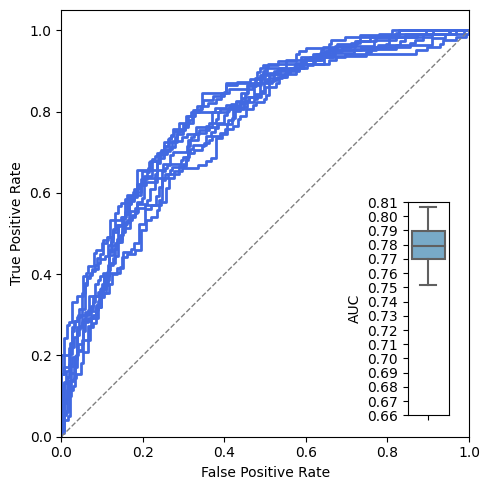

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import auc

fig, axs = plt.subplots(1, 1, figsize=(5, 5))

# ROC Curves
# axs.set_title('ROC Curves for Different Folds')
auc_values = []

# Iterate over the folds
for fold in np.arange(1, 11):
    # Get the FPR and TPR values for the current fold
    fpr_seq = df.loc[df['fold'] == fold, 'FPR'].values
    tpr_seq = df.loc[df['fold'] == fold, 'TPR'].values

    fpr = np.array(fpr_seq[0].tolist())
    tpr = np.array(tpr_seq[0].tolist())

    roc_auc = auc(fpr, tpr)
    auc_values.append(roc_auc)

    axs.plot(fpr, tpr, color='royalblue',lw=2)

    # # Plot ROC curve with a different color for each fold
    # axs.plot(fpr, tpr, lw=2, label='Fold %d' % (fold))

# Plot the random guess line
axs.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set the limits and labels of the ROC plot
axs.set_xlim([0.0, 1.0])
axs.set_ylim([0.0, 1.05])
axs.set_xlabel('False Positive Rate')
axs.set_ylabel('True Positive Rate')

# Create a legend with two columns and smaller font size
# legend = axs.legend(loc='upper left', ncol=2, fontsize='small')
# legend = axs.legend(loc='upper center', bbox_to_anchor=(0.5, 0.3), ncol=3, fontsize='small')

# Calculate the position for the embedded box plot
box_left = 0.85
box_bottom = 0.05
box_width = 0.1
box_height = 0.5

# Create an inset axes within the current axes
ax_box = axs.inset_axes([box_left, box_bottom, box_width, box_height])

# Use seaborn boxplot
sns.boxplot(y=auc_values, ax=ax_box, palette="Blues")

# Set the y-axis limits for the box plot
ax_box.set_ylim([0.75, 0.81])

# Set y-axis ticks for better visualization
ax_box.set_yticks(np.arange(0.66, 0.82, 0.01))
# ax_box.set_xlabel('Folds')

ax_box.set_ylabel('AUC')

# Add a y-axis to the box plot
# ax_box.axhline(y=np.mean(auc_values), color='r', linestyle='--', label='Mean AUC')
# ax_box.legend(loc='best')

plt.tight_layout()
plt.show()

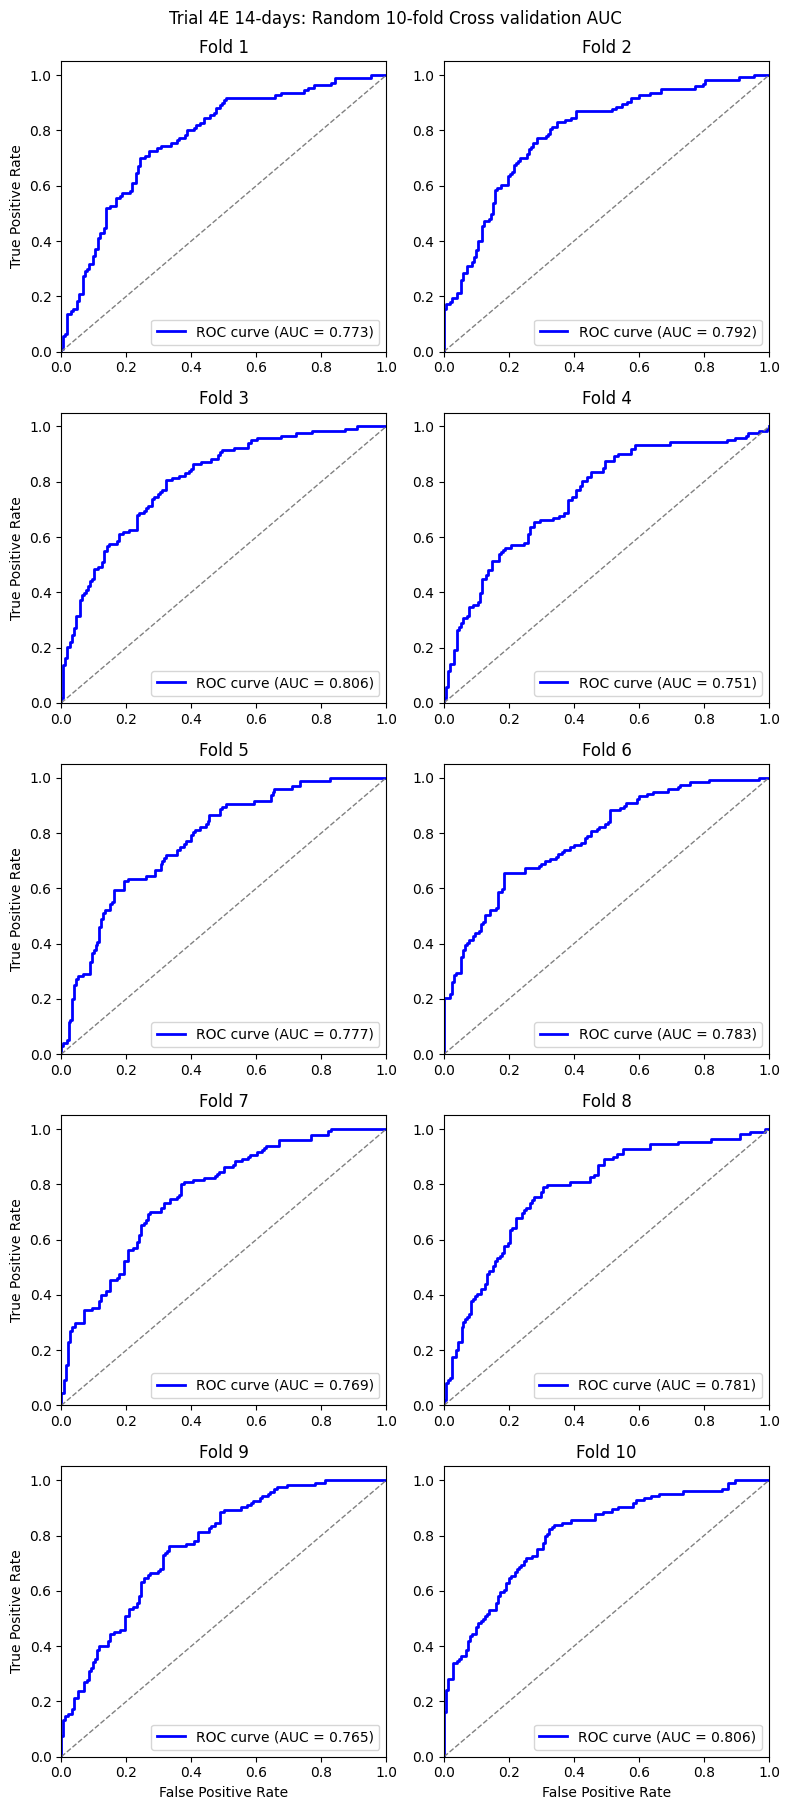

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

n = 0 

np.random.seed(42)

fig, axs = plt.subplots(5, 2, figsize=(8, 19))
fig.suptitle('Trial 4E 14-days: Random 10-fold Cross validation AUC')
# axs = axs.ravel()

###### CHECK THIS LATER ################
kf = KFold(n_splits=k, shuffle=True)
######################

# kf = KFold(n_splits=10)

for train_index, test_index in kf.split(idx_kcv):

    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(landslide_array[test_index], y_preds_list[n])
    # print(thresholds)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    row = n // 2
    col = n % 2
    axs[row, col].plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.3f)' % roc_auc)
    axs[row, col].plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    axs[row, col].set_xlim([0.0, 1.0])
    axs[row, col].set_ylim([0.0, 1.05])
    # axs[row, col].set_xlabel('False Positive Rate', fontsize=14)
    # axs[row, col].set_ylabel('True Positive Rate', fontsize=14)
    axs[row, col].set_title('Fold %d' % (n+1), fontsize=12)
    axs[row, col].legend(loc='lower right')
    
    optimal_threshold = thresholds[np.argmax(tpr - fpr)]
    # print(optimal_threshold)
    n += 1

# Hide x and y axis labels for certain subplots
# if row != 2: 
    # axs[row, col].set_xlabel('')
# else: 
    # axs[row, col].set_xlabel('False Positive Rate', fontsize=10)

    if row == 4: 
        axs[row, col].set_xlabel('False Positive Rate', fontsize=10)

    if col != 0: 
        axs[row, col].set_ylabel('')
    else:
        # axs[row, col].set_xlabel('False Positive Rate', fontsize=10)
        axs[row, col].set_ylabel('True Positive Rate', fontsize=10)


# axs[4, 1].axis('off')
# axs[4, 1].xaxis.set_visible(False)
# axs[4, 1].yaxis.set_visible(False)
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()

# Hyperparameterization

## Hyperband optimization

In [21]:
from optimize_model import * 
import keras_tuner as kt

# params= json.load(open('Exp4E_bay_params.json','r'))
# print(params)

X_train = [env_array[idx_tr],rainfall_array[idx_tr]]
Y_train = landslide_array[idx_tr]

obj = optimize_model(params['modelparam'])
# objfunc = kt.Objective('val_auc', direction='max')
objfunc = kt.Objective('val_auc', direction='max')
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
tuner2 = kt.Hyperband(obj, objective=objfunc, 
                       max_epochs=150, factor=3, 
                      project_name='msc-tuning-hyperband-4e-14days',
                      overwrite=True, seed=10)
tuner2.search(X_train, Y_train, epochs=200, validation_split=0.2, callbacks=[stop_early]) #tf.keras.callbacks.TensorBoard("/tmp/tb_logs")
best_hps = tuner2.get_best_hyperparameters(num_trials=2)[0]

Trial 254 Complete [00h 12m 22s]
val_auc: 0.6960534453392029

Best val_auc So Far: 0.7346550822257996
Total elapsed time: 03h 49m 10s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [22]:
best_hps.values

{'GRU Layer': 48,
 'Env Layer': 16,
 'Combined Layer': 64,
 'Env depth': 5,
 'Comb depth': 4,
 'learning_rate': 1e-06,
 'GRU activation': 'tanh',
 'Env activation': 'tanh',
 'Comb activation': 'tanh',
 'gru dropout ratio': 0.15,
 'env dropout ratio': 0.1,
 'comb dropout ratio': 0.05,
 'batch_size': 14,
 'tuner/epochs': 150,
 'tuner/initial_epoch': 50,
 'tuner/bracket': 4,
 'tuner/round': 4,
 'tuner/trial_id': '0142'}

In [109]:
best_model = tuner2.get_best_models(1)[0]

In [111]:
# display model structure
from keras.utils.vis_utils import plot_model
plot_model(best_model, 'best_model.png', show_shapes=True)

# show model summary
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2240        ['input_1[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 64)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dropout_1[0][0]']              
                                                                                              

## Bayesian optimization

In [20]:
from optimize_model import * 
import keras_tuner as kt

# params= json.load(open('Exp4E_params.json','r'))

X_train = [env_array[idx_tr],rainfall_array[idx_tr]]
Y_train = landslide_array[idx_tr]
objfunc = kt.Objective('val_auc', direction='max')
obj = optimize_model(params['modelparam'])

# note that in older versions, it's obj.build but as of 4/4/23, if build is there, batch size somehow ain't hyperparameterized.
tuner3 = kt.BayesianOptimization(obj, objective=objfunc, 
                      project_name='msc-tuning-4E-14days', max_trials=50, max_retries_per_trial=5,
                      overwrite=True, seed=10)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_auc', patience=10, restore_best_weights=True)
tuner3.search(X_train, Y_train, epochs=200, validation_split=0.2, callbacks=[stop_early])
best_hps3 = tuner3.get_best_hyperparameters(num_trials=2)[0]

Trial 50 Complete [00h 00m 49s]
val_auc: 0.655864953994751

Best val_auc So Far: 0.7642480731010437
Total elapsed time: 05h 08m 41s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [23]:
best_hps3.values


{'GRU Layer': 64,
 'Env Layer': 16,
 'Combined Layer': 16,
 'Env depth': 2,
 'Comb depth': 1,
 'learning_rate': 1e-05,
 'GRU activation': 'relu',
 'Env activation': 'tanh',
 'Comb activation': 'swish',
 'gru dropout ratio': 0.05,
 'env dropout ratio': 0.1,
 'comb dropout ratio': 0.15,
 'batch_size': 21}

In [37]:
best_model = tuner3.get_best_models(1)[0]
from keras.utils.vis_utils import plot_model
plot_model(best_model, 'best_model.png', show_shapes=True)

# show model summary
best_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           1856        ['input_1[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 64)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dropout_1[0][0]']              
                                                                                              

In [ ]:
print("Evaluate model on test data")
results = comp_lsmodel.predict([env_array[idx_ts],rainfall_array[idx_ts]], landslide_array[idx_ts])
print("test loss, test acc:", results)

In [ ]:
bs=90
samples=2448-1958
# how do you get to 15k steps?
# what variables make sense plotting in wandb?
# why is it nor the lr changing during training?

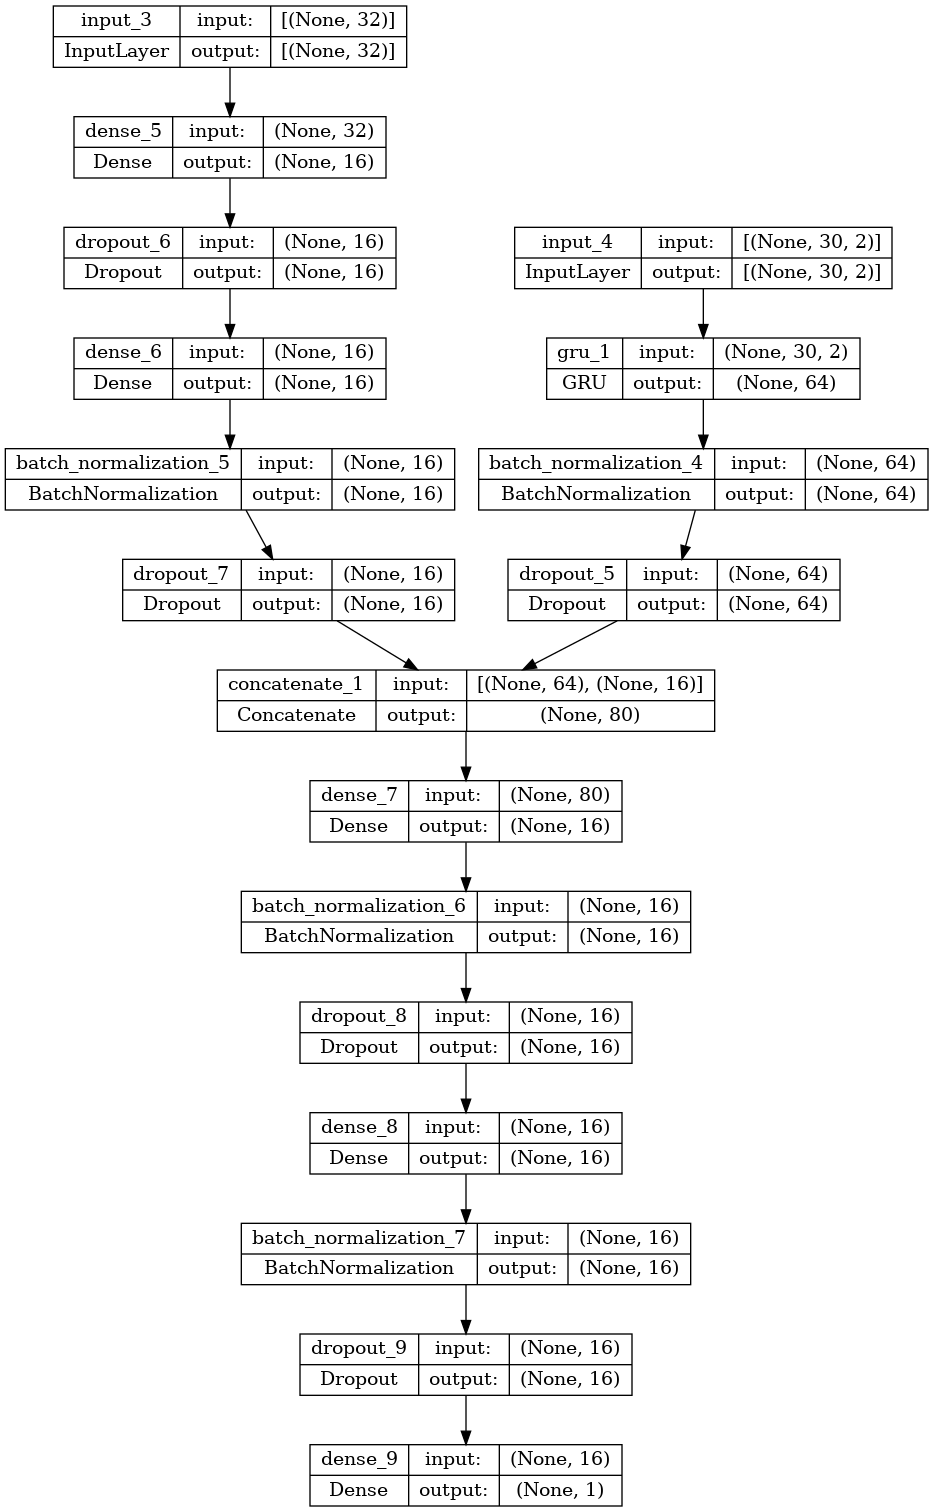

In [23]:
# visualize the model 
from keras.utils.vis_utils import plot_model
plot_model(comp_lsmodel, to_file='model_plot.png', show_shapes=True, show_layer_names=True)